### Apprentissage  ZCR

###### Reconnaissance du genre du locuteur

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import struct 
import os


from sklearn.metrics import confusion_matrix
import seaborn as sn

from tqdm.notebook import tqdm, trange
import time


In [2]:
### Une fonction pour lire les fichiers WAV


    
def lire_son(filename):
    valeurs = [] 
    with open(filename, 'br') as fichier:
         while fichier:
            v = fichier.read(2)
            if not v or len(v)!=2:
                break
            valeurs.append(struct.unpack('h', v)[0])        
    return np.array(valeurs)

In [3]:
### Une fonction pour calculer le taux de passage par zéro (ZCR)
def zcr(fenetre):
    cpt = 0
    old_val = fenetre[0]
    for v in fenetre:
        if v*old_val < 0:
            cpt += 1
        old_val = v
    return cpt

In [4]:
## read labels 
import csv
tsv_file = open("./DATA/files.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
labels ={}
# skip header
next(read_tsv, None)
for row in read_tsv:
    labels[row[1]]=row[6]
s=sum(value == "male" for value in labels.values())
print("M data len:",s)
s=sum(value == "female" for value in labels.values())
print("F data len:",s)

M data len: 14559
F data len: 1782


### Paramétrisation :
 1. calculer pour chaque fichier audio les taux de passage par zéro
 2. sauvgarder la liste des zcrs dans un fichier

In [ ]:
######### calculer les taux de passage par zéro pour chaque fichier ###########

#train data
directory='./DATA/TRAIN/'
fenetre_len=620
files=os.listdir(directory)
train=[]
p_bar = tqdm(range(len(files)))
 
for i in p_bar:
    if not files[i].split(".")[0] in labels :
         continue
    values=lire_son(directory+files[i])
    zcrs=[zcr(values[deb:deb+fenetre_len]) for deb in range(0, len(values), fenetre_len)]
    ### write zcrs in binary file
    np.array(zcrs).tofile('./PARAMS/ZCR/TRAIN/'+files[i].split(".")[0]+'.zcr')
    
    p_bar.set_description(f'Working on "{i}"')

  0%|          | 0/12257 [00:00<?, ?it/s]

### Apprentissage GMM

In [29]:
from sklearn import mixture
### un modéle GMM pour chaque classe
GMM_male=mixture.GaussianMixture(n_components=8,
                             covariance_type='spherical',
                             verbose=2,
                             verbose_interval=1)
GMM_female=mixture.GaussianMixture(n_components=8,
                             covariance_type='spherical',
                             verbose=2,
                             verbose_interval=1)

In [30]:
#### Apprentissage 

directory='./DATA/ZCR/TRAIN/'
files=os.listdir(directory)
p_bar = tqdm(range(len(files))) 
for i in p_bar:
    p_bar.set_description(f'Working on "{i}"')
    label=labels[files[i].split(".")[0]]
    zcrs=np.fromfile(directory+files[i],  dtype=np.int64)
    if(label=="male"):
            GMM_male.fit(np.array(zcrs).reshape(-1,1),1)
    if (label=="female"):
            GMM_female.fit(np.array(zcrs).reshape(-1,1),1)

  0%|          | 0/14206 [00:00<?, ?it/s]

Initialization 0
  Iteration 1	 time lapse 0.01319s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.01623
  Iteration 3	 time lapse 0.00103s	 ll change 0.00482
  Iteration 4	 time lapse 0.00095s	 ll change 0.00276
  Iteration 5	 time lapse 0.00115s	 ll change 0.00233
  Iteration 6	 time lapse 0.00134s	 ll change 0.00257
  Iteration 7	 time lapse 0.00126s	 ll change 0.00336
  Iteration 8	 time lapse 0.00129s	 ll change 0.00463
  Iteration 9	 time lapse 0.00158s	 ll change 0.00576
  Iteration 10	 time lapse 0.00147s	 ll change 0.01004
  Iteration 11	 time lapse 0.00136s	 ll change 0.06455
  Iteration 12	 time lapse 0.00135s	 ll change 0.03343
  Iteration 13	 time lapse 0.00131s	 ll change 0.00027
Initialization converged: True	 time lapse 0.02884s	 ll -4.54387
Initialization 0
  Iteration 1	 time lapse 0.01541s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.02205
  Iteration 3	 time lapse 0.00100s	 ll change 0.00608
  Iteration 4	 time lapse 0.00112s	 ll ch

Initialization 0
  Iteration 1	 time lapse 0.00795s	 ll change inf
  Iteration 2	 time lapse 0.00092s	 ll change 0.01853
  Iteration 3	 time lapse 0.00083s	 ll change 0.00523
  Iteration 4	 time lapse 0.00085s	 ll change 0.00231
  Iteration 5	 time lapse 0.00081s	 ll change 0.00129
  Iteration 6	 time lapse 0.00085s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01227s	 ll -4.29485
Initialization 0
  Iteration 1	 time lapse 0.00978s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll change 0.07279
  Iteration 3	 time lapse 0.00126s	 ll change 0.14777
  Iteration 4	 time lapse 0.00134s	 ll change 0.16462
  Iteration 5	 time lapse 0.00135s	 ll change 0.70333
  Iteration 6	 time lapse 0.00132s	 ll change 1.64080
  Iteration 7	 time lapse 0.00134s	 ll change 0.00031
Initialization converged: True	 time lapse 0.01824s	 ll -0.36917
Initialization 0
  Iteration 1	 time lapse 0.01602s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.02381
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.01441s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.02263
  Iteration 3	 time lapse 0.00108s	 ll change 0.00681
  Iteration 4	 time lapse 0.00110s	 ll change 0.00315
  Iteration 5	 time lapse 0.00106s	 ll change 0.00177
  Iteration 6	 time lapse 0.00125s	 ll change 0.00113
  Iteration 7	 time lapse 0.00111s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02145s	 ll -4.09953
Initialization 0
  Iteration 1	 time lapse 0.01075s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01135
  Iteration 3	 time lapse 0.00096s	 ll change 0.00271
  Iteration 4	 time lapse 0.00120s	 ll change 0.00123
  Iteration 5	 time lapse 0.00147s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01567s	 ll -3.53047
Initialization 0
  Iteration 1	 time lapse 0.01304s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.01311
  Iteration 3	 time lapse 0.00145s	 ll change 0.00375
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01919s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.01557
  Iteration 3	 time lapse 0.00095s	 ll change 0.00384
  Iteration 4	 time lapse 0.00088s	 ll change 0.00193
  Iteration 5	 time lapse 0.00096s	 ll change 0.00155
  Iteration 6	 time lapse 0.00088s	 ll change 0.00128
  Iteration 7	 time lapse 0.00087s	 ll change 0.00065
Initialization converged: True	 time lapse 0.02532s	 ll -3.91349
Initialization 0
  Iteration 1	 time lapse 0.01171s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.01126
  Iteration 3	 time lapse 0.00143s	 ll change 0.00296
  Iteration 4	 time lapse 0.00198s	 ll change 0.00130
  Iteration 5	 time lapse 0.00121s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01798s	 ll -4.94969
Initialization 0
  Iteration 1	 time lapse 0.01423s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02374
  Iteration 3	 time lapse 0.00095s	 ll change 0.00661
  Iteration 4	 time lapse 0.00092s	 ll

  Iteration 10	 time lapse 0.00648s	 ll change 0.00030
Initialization converged: True	 time lapse 0.02399s	 ll -2.34334
Initialization 0
  Iteration 1	 time lapse 0.01579s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.02756
  Iteration 3	 time lapse 0.00178s	 ll change 0.00822
  Iteration 4	 time lapse 0.00173s	 ll change 0.00385
  Iteration 5	 time lapse 0.00163s	 ll change 0.00221
  Iteration 6	 time lapse 0.00123s	 ll change 0.00143
  Iteration 7	 time lapse 0.00107s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02466s	 ll -3.94549
Initialization 0
  Iteration 1	 time lapse 0.00837s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01619
  Iteration 3	 time lapse 0.00090s	 ll change 0.00479
  Iteration 4	 time lapse 0.00093s	 ll change 0.00223
  Iteration 5	 time lapse 0.00089s	 ll change 0.00133
  Iteration 6	 time lapse 0.00087s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01308s	 ll -4.22279
Initialization 0
  Ite

  Iteration 1	 time lapse 0.01121s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.01955
  Iteration 3	 time lapse 0.00096s	 ll change 0.00506
  Iteration 4	 time lapse 0.00099s	 ll change 0.00205
  Iteration 5	 time lapse 0.00095s	 ll change 0.00103
  Iteration 6	 time lapse 0.00108s	 ll change 0.00060
Initialization converged: True	 time lapse 0.01646s	 ll -4.28355
Initialization 0
  Iteration 1	 time lapse 0.01059s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.02427
  Iteration 3	 time lapse 0.00146s	 ll change 0.00715
  Iteration 4	 time lapse 0.00141s	 ll change 0.00328
  Iteration 5	 time lapse 0.00144s	 ll change 0.00186
  Iteration 6	 time lapse 0.00140s	 ll change 0.00119
  Iteration 7	 time lapse 0.00137s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01940s	 ll -4.99716
Initialization 0
  Iteration 1	 time lapse 0.02292s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01451
  Iteration 3	 time lapse 0.00105s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01660s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.11945
  Iteration 3	 time lapse 0.00087s	 ll change 0.10443
  Iteration 4	 time lapse 0.00091s	 ll change 0.05052
  Iteration 5	 time lapse 0.00085s	 ll change 0.23655
  Iteration 6	 time lapse 0.00080s	 ll change 1.80376
  Iteration 7	 time lapse 0.00079s	 ll change 0.00054
Initialization converged: True	 time lapse 0.02207s	 ll -0.91409
Initialization 0
  Iteration 1	 time lapse 0.01395s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01152
  Iteration 3	 time lapse 0.00119s	 ll change 0.00383
  Iteration 4	 time lapse 0.00126s	 ll change 0.00283
  Iteration 5	 time lapse 0.00116s	 ll change 0.00276
  Iteration 6	 time lapse 0.00120s	 ll change 0.00301
  Iteration 7	 time lapse 0.00122s	 ll change 0.00349
  Iteration 8	 time lapse 0.00117s	 ll change 0.00414
  Iteration 9	 time lapse 0.00112s	 ll change 0.00483
  Iteration 10	 time lapse 0.00113s	 ll chang

  Iteration 1	 time lapse 0.01892s	 ll change inf
  Iteration 2	 time lapse 0.00188s	 ll change 0.01717
  Iteration 3	 time lapse 0.00129s	 ll change 0.00437
  Iteration 4	 time lapse 0.00110s	 ll change 0.00181
  Iteration 5	 time lapse 0.00108s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02434s	 ll -4.63609
Initialization 0
  Iteration 1	 time lapse 0.01249s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.02045
  Iteration 3	 time lapse 0.00104s	 ll change 0.01056
  Iteration 4	 time lapse 0.00102s	 ll change 0.01115
  Iteration 5	 time lapse 0.00178s	 ll change 0.01408
  Iteration 6	 time lapse 0.00121s	 ll change 0.01732
  Iteration 7	 time lapse 0.00177s	 ll change 0.02457
  Iteration 8	 time lapse 0.00125s	 ll change 0.03050
  Iteration 9	 time lapse 0.00208s	 ll change 0.02617
  Iteration 10	 time lapse 0.00197s	 ll change 0.01158
  Iteration 11	 time lapse 0.00179s	 ll change 0.03320
  Iteration 12	 time lapse 0.00114s	 ll change 0.26572
  Ite

  Iteration 1	 time lapse 0.01581s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.02085
  Iteration 3	 time lapse 0.00115s	 ll change 0.00638
  Iteration 4	 time lapse 0.00108s	 ll change 0.00283
  Iteration 5	 time lapse 0.00196s	 ll change 0.00153
  Iteration 6	 time lapse 0.00142s	 ll change 0.00096
Initialization converged: True	 time lapse 0.02314s	 ll -3.65596
Initialization 0
  Iteration 1	 time lapse 0.02182s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.01474
  Iteration 3	 time lapse 0.00099s	 ll change 0.00359
  Iteration 4	 time lapse 0.00095s	 ll change 0.00145
  Iteration 5	 time lapse 0.00096s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02599s	 ll -4.54301
Initialization 0
  Iteration 1	 time lapse 0.01412s	 ll change inf
  Iteration 2	 time lapse 0.00189s	 ll change 0.02369
  Iteration 3	 time lapse 0.00167s	 ll change 0.00665
  Iteration 4	 time lapse 0.00217s	 ll change 0.00292
  Iteration 5	 time lapse 0.00230s	 ll

  Iteration 1	 time lapse 0.02097s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01308
  Iteration 3	 time lapse 0.00167s	 ll change 0.00309
  Iteration 4	 time lapse 0.00194s	 ll change 0.00138
  Iteration 5	 time lapse 0.00144s	 ll change 0.00089
Initialization converged: True	 time lapse 0.02740s	 ll -5.27126
Initialization 0
  Iteration 1	 time lapse 0.01371s	 ll change inf
  Iteration 2	 time lapse 0.00191s	 ll change 0.01751
  Iteration 3	 time lapse 0.00186s	 ll change 0.01592
  Iteration 4	 time lapse 0.00246s	 ll change 0.01249
  Iteration 5	 time lapse 0.00361s	 ll change 0.00879
  Iteration 6	 time lapse 0.00159s	 ll change 0.00540
  Iteration 7	 time lapse 0.00180s	 ll change 0.00292
  Iteration 8	 time lapse 0.00143s	 ll change 0.00156
  Iteration 9	 time lapse 0.00184s	 ll change 0.00085
Initialization converged: True	 time lapse 0.03081s	 ll -3.99853
Initialization 0
  Iteration 1	 time lapse 0.01243s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll

Initialization 0
  Iteration 1	 time lapse 0.00895s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.02043
  Iteration 3	 time lapse 0.00143s	 ll change 0.00578
  Iteration 4	 time lapse 0.00108s	 ll change 0.00271
  Iteration 5	 time lapse 0.00097s	 ll change 0.00164
  Iteration 6	 time lapse 0.00093s	 ll change 0.00115
  Iteration 7	 time lapse 0.00098s	 ll change 0.00090
Initialization converged: True	 time lapse 0.01551s	 ll -3.91386
Initialization 0
  Iteration 1	 time lapse 0.01073s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.02413
  Iteration 3	 time lapse 0.00131s	 ll change 0.00671
  Iteration 4	 time lapse 0.00132s	 ll change 0.00299
  Iteration 5	 time lapse 0.00128s	 ll change 0.00166
  Iteration 6	 time lapse 0.00125s	 ll change 0.00104
  Iteration 7	 time lapse 0.00130s	 ll change 0.00072
Initialization converged: True	 time lapse 0.01894s	 ll -4.74988
Initialization 0
  Iteration 1	 time lapse 0.01301s	 ll change inf
  Iteration 2	 time l

  Iteration 10	 time lapse 0.00487s	 ll change 0.00153
  Iteration 11	 time lapse 0.00140s	 ll change 0.00116
  Iteration 12	 time lapse 0.00111s	 ll change 0.00092
Initialization converged: True	 time lapse 0.03715s	 ll -4.90146
Initialization 0
  Iteration 1	 time lapse 0.01063s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.01175
  Iteration 3	 time lapse 0.00134s	 ll change 0.00317
  Iteration 4	 time lapse 0.00129s	 ll change 0.00158
  Iteration 5	 time lapse 0.00119s	 ll change 0.00103
  Iteration 6	 time lapse 0.00126s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01737s	 ll -4.17050
Initialization 0
  Iteration 1	 time lapse 0.01300s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01202
  Iteration 3	 time lapse 0.00131s	 ll change 0.00257
  Iteration 4	 time lapse 0.00104s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01687s	 ll -3.96198
Initialization 0
  Iteration 1	 time lapse 0.01484s	 ll change inf
  Itera

  Iteration 5	 time lapse 0.00232s	 ll change 0.00084
Initialization converged: True	 time lapse 0.02389s	 ll -4.13246
Initialization 0
  Iteration 1	 time lapse 0.01475s	 ll change inf
  Iteration 2	 time lapse 0.00171s	 ll change 0.02966
  Iteration 3	 time lapse 0.00165s	 ll change 0.00869
  Iteration 4	 time lapse 0.00158s	 ll change 0.00396
  Iteration 5	 time lapse 0.00162s	 ll change 0.00220
  Iteration 6	 time lapse 0.00154s	 ll change 0.00137
  Iteration 7	 time lapse 0.00153s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02447s	 ll -3.82809
Initialization 0
  Iteration 1	 time lapse 0.01208s	 ll change inf
  Iteration 2	 time lapse 0.00376s	 ll change 0.02439
  Iteration 3	 time lapse 0.00267s	 ll change 0.00655
  Iteration 4	 time lapse 0.00172s	 ll change 0.00275
  Iteration 5	 time lapse 0.00140s	 ll change 0.00143
  Iteration 6	 time lapse 0.00150s	 ll change 0.00085
Initialization converged: True	 time lapse 0.02325s	 ll -4.37162
Initialization 0
  Iter

  Iteration 1	 time lapse 0.00947s	 ll change inf
  Iteration 2	 time lapse 0.00181s	 ll change 0.12704
  Iteration 3	 time lapse 0.00125s	 ll change 0.11109
  Iteration 4	 time lapse 0.00138s	 ll change 0.15341
  Iteration 5	 time lapse 0.00116s	 ll change 0.14592
  Iteration 6	 time lapse 0.00231s	 ll change 0.83174
  Iteration 7	 time lapse 0.00100s	 ll change 1.09010
  Iteration 8	 time lapse 0.00083s	 ll change 0.00026
Initialization converged: True	 time lapse 0.01928s	 ll -1.30499
Initialization 0
  Iteration 1	 time lapse 0.00897s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.02102
  Iteration 3	 time lapse 0.00093s	 ll change 0.01255
  Iteration 4	 time lapse 0.00207s	 ll change 0.00986
  Iteration 5	 time lapse 0.00137s	 ll change 0.00614
  Iteration 6	 time lapse 0.00222s	 ll change 0.00335
  Iteration 7	 time lapse 0.00102s	 ll change 0.00214
  Iteration 8	 time lapse 0.00086s	 ll change 0.00183
  Iteration 9	 time lapse 0.00083s	 ll change 0.00178
  Iterat

Initialization 0
  Iteration 1	 time lapse 0.01206s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01818
  Iteration 3	 time lapse 0.00124s	 ll change 0.00436
  Iteration 4	 time lapse 0.00108s	 ll change 0.00175
  Iteration 5	 time lapse 0.00105s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01682s	 ll -4.49384
Initialization 0
  Iteration 1	 time lapse 0.00945s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.01465
  Iteration 3	 time lapse 0.00115s	 ll change 0.00452
  Iteration 4	 time lapse 0.00097s	 ll change 0.00305
  Iteration 5	 time lapse 0.00093s	 ll change 0.00308
  Iteration 6	 time lapse 0.00093s	 ll change 0.00324
  Iteration 7	 time lapse 0.00094s	 ll change 0.00230
  Iteration 8	 time lapse 0.00087s	 ll change 0.00104
  Iteration 9	 time lapse 0.00086s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01715s	 ll -3.34190
Initialization 0
  Iteration 1	 time lapse 0.01029s	 ll change inf
  Iteration 2	 time l

Initialization 0
  Iteration 1	 time lapse 0.01740s	 ll change inf
  Iteration 2	 time lapse 0.00195s	 ll change 0.01517
  Iteration 3	 time lapse 0.00326s	 ll change 0.00699
  Iteration 4	 time lapse 0.00243s	 ll change 0.00489
  Iteration 5	 time lapse 0.00176s	 ll change 0.00376
  Iteration 6	 time lapse 0.00162s	 ll change 0.00301
  Iteration 7	 time lapse 0.00166s	 ll change 0.00248
  Iteration 8	 time lapse 0.00157s	 ll change 0.00210
  Iteration 9	 time lapse 0.00168s	 ll change 0.00181
  Iteration 10	 time lapse 0.00161s	 ll change 0.00157
  Iteration 11	 time lapse 0.00154s	 ll change 0.00138
  Iteration 12	 time lapse 0.00174s	 ll change 0.00122
  Iteration 13	 time lapse 0.00161s	 ll change 0.00107
  Iteration 14	 time lapse 0.00161s	 ll change 0.00095
Initialization converged: True	 time lapse 0.04151s	 ll -3.92181
Initialization 0
  Iteration 1	 time lapse 0.00947s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01938
  Iteration 3	 time lapse 0.00098s	 ll c

Initialization 0
  Iteration 1	 time lapse 0.01301s	 ll change inf
  Iteration 2	 time lapse 0.00187s	 ll change 0.02058
  Iteration 3	 time lapse 0.00198s	 ll change 0.00692
  Iteration 4	 time lapse 0.00216s	 ll change 0.00552
  Iteration 5	 time lapse 0.00124s	 ll change 0.00387
  Iteration 6	 time lapse 0.00109s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02143s	 ll -4.35059
Initialization 0
  Iteration 1	 time lapse 0.01291s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.01244
  Iteration 3	 time lapse 0.00108s	 ll change 0.00330
  Iteration 4	 time lapse 0.00103s	 ll change 0.00154
  Iteration 5	 time lapse 0.00127s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01793s	 ll -4.54209
Initialization 0
  Iteration 1	 time lapse 0.01626s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.01743
  Iteration 3	 time lapse 0.00142s	 ll change 0.00451
  Iteration 4	 time lapse 0.00165s	 ll change 0.00194
  Iteration 5	 time l

  Iteration 1	 time lapse 0.01641s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01661
  Iteration 3	 time lapse 0.00102s	 ll change 0.00432
  Iteration 4	 time lapse 0.00097s	 ll change 0.00189
  Iteration 5	 time lapse 0.00099s	 ll change 0.00106
  Iteration 6	 time lapse 0.00103s	 ll change 0.00069
Initialization converged: True	 time lapse 0.02179s	 ll -5.24684
Initialization 0
  Iteration 1	 time lapse 0.01077s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01597
  Iteration 3	 time lapse 0.00109s	 ll change 0.00518
  Iteration 4	 time lapse 0.00154s	 ll change 0.00287
  Iteration 5	 time lapse 0.00114s	 ll change 0.00203
  Iteration 6	 time lapse 0.00107s	 ll change 0.00162
  Iteration 7	 time lapse 0.00106s	 ll change 0.00138
  Iteration 8	 time lapse 0.00155s	 ll change 0.00122
  Iteration 9	 time lapse 0.00165s	 ll change 0.00111
  Iteration 10	 time lapse 0.00124s	 ll change 0.00104
  Iteration 11	 time lapse 0.00112s	 ll change 0.00098
Initia

Initialization 0
  Iteration 1	 time lapse 0.01162s	 ll change inf
  Iteration 2	 time lapse 0.00085s	 ll change 0.01082
  Iteration 3	 time lapse 0.00079s	 ll change 0.00240
  Iteration 4	 time lapse 0.00517s	 ll change 0.00087
Initialization converged: True	 time lapse 0.01855s	 ll -3.34799
Initialization 0
  Iteration 1	 time lapse 0.02053s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01126
  Iteration 3	 time lapse 0.00106s	 ll change 0.00452
  Iteration 4	 time lapse 0.00120s	 ll change 0.00275
  Iteration 5	 time lapse 0.00105s	 ll change 0.00190
  Iteration 6	 time lapse 0.00101s	 ll change 0.00138
  Iteration 7	 time lapse 0.00100s	 ll change 0.00103
  Iteration 8	 time lapse 0.00098s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02806s	 ll -4.48953
Initialization 0
  Iteration 1	 time lapse 0.01134s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.02198
  Iteration 3	 time lapse 0.00136s	 ll change 0.01072
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01250s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.08628
  Iteration 3	 time lapse 0.00117s	 ll change 0.08640
  Iteration 4	 time lapse 0.00110s	 ll change 0.01600
  Iteration 5	 time lapse 0.00177s	 ll change 0.03702
  Iteration 6	 time lapse 0.00133s	 ll change 0.25366
  Iteration 7	 time lapse 0.00127s	 ll change 0.78405
  Iteration 8	 time lapse 0.00128s	 ll change 0.00037
Initialization converged: True	 time lapse 0.02189s	 ll -2.69197
Initialization 0
  Iteration 1	 time lapse 0.01060s	 ll change inf
  Iteration 2	 time lapse 0.00177s	 ll change 0.01845
  Iteration 3	 time lapse 0.00193s	 ll change 0.00492
  Iteration 4	 time lapse 0.00158s	 ll change 0.00206
  Iteration 5	 time lapse 0.00153s	 ll change 0.00107
  Iteration 6	 time lapse 0.00162s	 ll change 0.00065
Initialization converged: True	 time lapse 0.01935s	 ll -3.72611
Initialization 0
  Iteration 1	 time lapse 0.01383s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll

  Iteration 6	 time lapse 0.00212s	 ll change 0.00148
  Iteration 7	 time lapse 0.00452s	 ll change 0.00111
  Iteration 8	 time lapse 0.00132s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02641s	 ll -4.27525
Initialization 0
  Iteration 1	 time lapse 0.01939s	 ll change inf
  Iteration 2	 time lapse 0.00284s	 ll change 0.01574
  Iteration 3	 time lapse 0.00153s	 ll change 0.00379
  Iteration 4	 time lapse 0.00141s	 ll change 0.00150
  Iteration 5	 time lapse 0.00146s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02673s	 ll -4.54031
Initialization 0
  Iteration 1	 time lapse 0.01996s	 ll change inf
  Iteration 2	 time lapse 0.00202s	 ll change 0.01896
  Iteration 3	 time lapse 0.00229s	 ll change 0.00515
  Iteration 4	 time lapse 0.00252s	 ll change 0.00231
  Iteration 5	 time lapse 0.00236s	 ll change 0.00132
  Iteration 6	 time lapse 0.00370s	 ll change 0.00088
Initialization converged: True	 time lapse 0.03327s	 ll -3.60009
Initialization 0
  Iter

  Iteration 6	 time lapse 0.00164s	 ll change 0.00194
  Iteration 7	 time lapse 0.01036s	 ll change 0.00135
  Iteration 8	 time lapse 0.00160s	 ll change 0.00093
Initialization converged: True	 time lapse 0.03925s	 ll -3.80183
Initialization 0
  Iteration 1	 time lapse 0.01642s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.00745
  Iteration 3	 time lapse 0.00129s	 ll change 0.00276
  Iteration 4	 time lapse 0.00171s	 ll change 0.00188
  Iteration 5	 time lapse 0.00156s	 ll change 0.00140
  Iteration 6	 time lapse 0.00207s	 ll change 0.00102
  Iteration 7	 time lapse 0.00233s	 ll change 0.00073
Initialization converged: True	 time lapse 0.02709s	 ll -4.14317
Initialization 0
  Iteration 1	 time lapse 0.02958s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01364
  Iteration 3	 time lapse 0.00105s	 ll change 0.00478
  Iteration 4	 time lapse 0.00124s	 ll change 0.00266
  Iteration 5	 time lapse 0.00141s	 ll change 0.00170
  Iteration 6	 time lapse 0.00121s

  Iteration 1	 time lapse 0.01286s	 ll change inf
  Iteration 2	 time lapse 0.00431s	 ll change 0.02524
  Iteration 3	 time lapse 0.00164s	 ll change 0.00834
  Iteration 4	 time lapse 0.00102s	 ll change 0.00500
  Iteration 5	 time lapse 0.00104s	 ll change 0.00382
  Iteration 6	 time lapse 0.00094s	 ll change 0.00285
  Iteration 7	 time lapse 0.00092s	 ll change 0.00200
  Iteration 8	 time lapse 0.00091s	 ll change 0.00163
  Iteration 9	 time lapse 0.00097s	 ll change 0.00149
  Iteration 10	 time lapse 0.00090s	 ll change 0.00122
  Iteration 11	 time lapse 0.00090s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02650s	 ll -4.14748
Initialization 0
  Iteration 1	 time lapse 0.01934s	 ll change inf
  Iteration 2	 time lapse 0.00143s	 ll change 0.01966
  Iteration 3	 time lapse 0.00143s	 ll change 0.00499
  Iteration 4	 time lapse 0.00395s	 ll change 0.00211
  Iteration 5	 time lapse 0.00254s	 ll change 0.00122
  Iteration 6	 time lapse 0.00200s	 ll change 0.00090
Initia

Initialization 0
  Iteration 1	 time lapse 0.01762s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01292
  Iteration 3	 time lapse 0.00098s	 ll change 0.00336
  Iteration 4	 time lapse 0.00132s	 ll change 0.00154
  Iteration 5	 time lapse 0.00217s	 ll change 0.00105
  Iteration 6	 time lapse 0.00229s	 ll change 0.00102
  Iteration 7	 time lapse 0.00173s	 ll change 0.00142
  Iteration 8	 time lapse 0.00118s	 ll change 0.00335
  Iteration 9	 time lapse 0.00101s	 ll change 0.01541
  Iteration 10	 time lapse 0.00096s	 ll change 0.04639
  Iteration 11	 time lapse 0.00096s	 ll change 0.00016
Initialization converged: True	 time lapse 0.03140s	 ll -4.48425
Initialization 0
  Iteration 1	 time lapse 0.01952s	 ll change inf
  Iteration 2	 time lapse 0.00413s	 ll change 0.00905
  Iteration 3	 time lapse 0.00390s	 ll change 0.00337
  Iteration 4	 time lapse 0.00139s	 ll change 0.00192
  Iteration 5	 time lapse 0.00130s	 ll change 0.00125
  Iteration 6	 time lapse 0.00116s	 ll chan

  Iteration 1	 time lapse 0.02072s	 ll change inf
  Iteration 2	 time lapse 0.00225s	 ll change 0.02079
  Iteration 3	 time lapse 0.00129s	 ll change 0.00563
  Iteration 4	 time lapse 0.00108s	 ll change 0.00237
  Iteration 5	 time lapse 0.00122s	 ll change 0.00124
  Iteration 6	 time lapse 0.00106s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02769s	 ll -5.15143
Initialization 0
  Iteration 1	 time lapse 0.01545s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll change 0.01225
  Iteration 3	 time lapse 0.00122s	 ll change 0.00252
  Iteration 4	 time lapse 0.00225s	 ll change 0.00088
Initialization converged: True	 time lapse 0.02057s	 ll -3.32819
Initialization 0
  Iteration 1	 time lapse 0.01887s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01160
  Iteration 3	 time lapse 0.00103s	 ll change 0.00388
  Iteration 4	 time lapse 0.00098s	 ll change 0.00244
  Iteration 5	 time lapse 0.00096s	 ll change 0.00189
  Iteration 6	 time lapse 0.00098s	 ll

  Iteration 1	 time lapse 0.01330s	 ll change inf
  Iteration 2	 time lapse 0.00362s	 ll change 0.01900
  Iteration 3	 time lapse 0.00296s	 ll change 0.00388
  Iteration 4	 time lapse 0.00152s	 ll change 0.00125
  Iteration 5	 time lapse 0.00123s	 ll change 0.00055
Initialization converged: True	 time lapse 0.02270s	 ll -3.63961
Initialization 0
  Iteration 1	 time lapse 0.01437s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.03812
  Iteration 3	 time lapse 0.00107s	 ll change 0.03394
  Iteration 4	 time lapse 0.00103s	 ll change 0.02517
  Iteration 5	 time lapse 0.00097s	 ll change 0.00757
  Iteration 6	 time lapse 0.00282s	 ll change 0.00283
  Iteration 7	 time lapse 0.00177s	 ll change 0.00146
  Iteration 8	 time lapse 0.00223s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02554s	 ll -3.87082
Initialization 0
  Iteration 1	 time lapse 0.01661s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01235
  Iteration 3	 time lapse 0.00126s	 ll

  Iteration 1	 time lapse 0.02008s	 ll change inf
  Iteration 2	 time lapse 0.00237s	 ll change 0.03032
  Iteration 3	 time lapse 0.00126s	 ll change 0.00985
  Iteration 4	 time lapse 0.00096s	 ll change 0.00497
  Iteration 5	 time lapse 0.00092s	 ll change 0.00310
  Iteration 6	 time lapse 0.00087s	 ll change 0.00220
  Iteration 7	 time lapse 0.00087s	 ll change 0.00168
  Iteration 8	 time lapse 0.00092s	 ll change 0.00136
  Iteration 9	 time lapse 0.00086s	 ll change 0.00114
  Iteration 10	 time lapse 0.00085s	 ll change 0.00097
Initialization converged: True	 time lapse 0.03002s	 ll -4.49532
Initialization 0
  Iteration 1	 time lapse 0.00795s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.02628
  Iteration 3	 time lapse 0.00088s	 ll change 0.00721
  Iteration 4	 time lapse 0.00086s	 ll change 0.00309
  Iteration 5	 time lapse 0.00082s	 ll change 0.00163
  Iteration 6	 time lapse 0.00082s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01240s	 ll -3.68

Initialization 0
  Iteration 1	 time lapse 0.01121s	 ll change inf
  Iteration 2	 time lapse 0.00264s	 ll change 0.00909
  Iteration 3	 time lapse 0.00264s	 ll change 0.00187
  Iteration 4	 time lapse 0.00116s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01772s	 ll -4.04715
Initialization 0
  Iteration 1	 time lapse 0.01253s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01258
  Iteration 3	 time lapse 0.00290s	 ll change 0.00282
  Iteration 4	 time lapse 0.00176s	 ll change 0.00101
  Iteration 5	 time lapse 0.00190s	 ll change 0.00047
Initialization converged: True	 time lapse 0.02068s	 ll -3.65747
Initialization 0
  Iteration 1	 time lapse 0.01881s	 ll change inf
  Iteration 2	 time lapse 0.00279s	 ll change 0.04635
  Iteration 3	 time lapse 0.00159s	 ll change 0.04051
  Iteration 4	 time lapse 0.00147s	 ll change 0.02585
  Iteration 5	 time lapse 0.00252s	 ll change 0.00902
  Iteration 6	 time lapse 0.00176s	 ll change 0.00138
  Iteration 7	 time l

Initialization 0
  Iteration 1	 time lapse 0.01171s	 ll change inf
  Iteration 2	 time lapse 0.00516s	 ll change 0.01823
  Iteration 3	 time lapse 0.00165s	 ll change 0.00630
  Iteration 4	 time lapse 0.00117s	 ll change 0.00294
  Iteration 5	 time lapse 0.00106s	 ll change 0.00144
  Iteration 6	 time lapse 0.00103s	 ll change 0.00089
Initialization converged: True	 time lapse 0.02185s	 ll -4.56856
Initialization 0
  Iteration 1	 time lapse 0.01190s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01564
  Iteration 3	 time lapse 0.00100s	 ll change 0.00565
  Iteration 4	 time lapse 0.00094s	 ll change 0.00355
  Iteration 5	 time lapse 0.00104s	 ll change 0.00279
  Iteration 6	 time lapse 0.00093s	 ll change 0.00246
  Iteration 7	 time lapse 0.00094s	 ll change 0.00232
  Iteration 8	 time lapse 0.00092s	 ll change 0.00227
  Iteration 9	 time lapse 0.00097s	 ll change 0.00226
  Iteration 10	 time lapse 0.00095s	 ll change 0.00226
  Iteration 11	 time lapse 0.00091s	 ll chan

  Iteration 1	 time lapse 0.01148s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.01685
  Iteration 3	 time lapse 0.00100s	 ll change 0.00429
  Iteration 4	 time lapse 0.00098s	 ll change 0.00176
  Iteration 5	 time lapse 0.00100s	 ll change 0.00092
Initialization converged: True	 time lapse 0.01575s	 ll -3.71213
Initialization 0
  Iteration 1	 time lapse 0.01987s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01989
  Iteration 3	 time lapse 0.00118s	 ll change 0.00522
  Iteration 4	 time lapse 0.00099s	 ll change 0.00223
  Iteration 5	 time lapse 0.00071s	 ll change 0.00122
  Iteration 6	 time lapse 0.00068s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02475s	 ll -3.61920
Initialization 0
  Iteration 1	 time lapse 0.01513s	 ll change inf
  Iteration 2	 time lapse 0.00172s	 ll change 0.01983
  Iteration 3	 time lapse 0.00169s	 ll change 0.00916
  Iteration 4	 time lapse 0.00175s	 ll change 0.01032
  Iteration 5	 time lapse 0.00154s	 ll

  Iteration 2	 time lapse 0.00222s	 ll change 0.01180
  Iteration 3	 time lapse 0.00124s	 ll change 0.00446
  Iteration 4	 time lapse 0.00104s	 ll change 0.00254
  Iteration 5	 time lapse 0.00104s	 ll change 0.00171
  Iteration 6	 time lapse 0.00107s	 ll change 0.00126
  Iteration 7	 time lapse 0.00100s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01694s	 ll -4.95537
Initialization 0
  Iteration 1	 time lapse 0.00974s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.02324
  Iteration 3	 time lapse 0.00102s	 ll change 0.00674
  Iteration 4	 time lapse 0.00093s	 ll change 0.00319
  Iteration 5	 time lapse 0.00091s	 ll change 0.00192
  Iteration 6	 time lapse 0.00091s	 ll change 0.00135
  Iteration 7	 time lapse 0.00091s	 ll change 0.00106
  Iteration 8	 time lapse 0.00275s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01834s	 ll -3.82492
Initialization 0
  Iteration 1	 time lapse 0.01269s	 ll change inf
  Iteration 2	 time lapse 0.00120s

Initialization 0
  Iteration 1	 time lapse 0.01810s	 ll change inf
  Iteration 2	 time lapse 0.00169s	 ll change 0.01875
  Iteration 3	 time lapse 0.00168s	 ll change 0.00549
  Iteration 4	 time lapse 0.00135s	 ll change 0.00274
  Iteration 5	 time lapse 0.00186s	 ll change 0.00161
  Iteration 6	 time lapse 0.00151s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02628s	 ll -4.41058
Initialization 0
  Iteration 1	 time lapse 0.01170s	 ll change inf
  Iteration 2	 time lapse 0.00142s	 ll change 0.02493
  Iteration 3	 time lapse 0.00133s	 ll change 0.00717
  Iteration 4	 time lapse 0.00124s	 ll change 0.00331
  Iteration 5	 time lapse 0.00127s	 ll change 0.00190
  Iteration 6	 time lapse 0.00129s	 ll change 0.00124
  Iteration 7	 time lapse 0.00131s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01971s	 ll -4.38446
Initialization 0
  Iteration 1	 time lapse 0.01121s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01740
  Iteration 3	 time l

  Iteration 18	 time lapse 0.00524s	 ll change 0.00127
  Iteration 19	 time lapse 0.00125s	 ll change 0.00115
  Iteration 20	 time lapse 0.00101s	 ll change 0.00107
  Iteration 21	 time lapse 0.00099s	 ll change 0.00101
  Iteration 22	 time lapse 0.00103s	 ll change 0.00097
Initialization converged: True	 time lapse 0.04440s	 ll -4.67895
Initialization 0
  Iteration 1	 time lapse 0.00951s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.14641
  Iteration 3	 time lapse 0.00150s	 ll change 0.20175
  Iteration 4	 time lapse 0.00157s	 ll change 0.13984
  Iteration 5	 time lapse 0.00105s	 ll change 0.09388
  Iteration 6	 time lapse 0.00090s	 ll change 0.52607
  Iteration 7	 time lapse 0.00087s	 ll change 1.40582
  Iteration 8	 time lapse 0.00086s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01745s	 ll -0.99689
Initialization 0
  Iteration 1	 time lapse 0.00785s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01540
  Iteration 3	 time lapse 0.0

  Iteration 5	 time lapse 0.00190s	 ll change 0.00293
  Iteration 6	 time lapse 0.00122s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01578s	 ll -3.70900
Initialization 0
  Iteration 1	 time lapse 0.00908s	 ll change inf
  Iteration 2	 time lapse 0.00142s	 ll change 0.01961
  Iteration 3	 time lapse 0.00126s	 ll change 0.00692
  Iteration 4	 time lapse 0.00168s	 ll change 0.00442
  Iteration 5	 time lapse 0.00201s	 ll change 0.00343
  Iteration 6	 time lapse 0.00158s	 ll change 0.00276
  Iteration 7	 time lapse 0.00167s	 ll change 0.00218
  Iteration 8	 time lapse 0.00189s	 ll change 0.00170
  Iteration 9	 time lapse 0.00135s	 ll change 0.00132
  Iteration 10	 time lapse 0.00098s	 ll change 0.00104
  Iteration 11	 time lapse 0.00341s	 ll change 0.00084
Initialization converged: True	 time lapse 0.02721s	 ll -4.25436
Initialization 0
  Iteration 1	 time lapse 0.01037s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01737
  Iteration 3	 time lapse 0.0014

  Iteration 4	 time lapse 0.00149s	 ll change 2.22782
  Iteration 5	 time lapse 0.00353s	 ll change 0.00242
  Iteration 6	 time lapse 0.00218s	 ll change 0.00162
  Iteration 7	 time lapse 0.00149s	 ll change 0.00135
  Iteration 8	 time lapse 0.00152s	 ll change 0.00165
  Iteration 9	 time lapse 0.00231s	 ll change 0.00201
  Iteration 10	 time lapse 0.00099s	 ll change 0.00178
  Iteration 11	 time lapse 0.00100s	 ll change 0.00125
  Iteration 12	 time lapse 0.00091s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02802s	 ll 0.31428
Initialization 0
  Iteration 1	 time lapse 0.01643s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.01537
  Iteration 3	 time lapse 0.00140s	 ll change 0.00342
  Iteration 4	 time lapse 0.00132s	 ll change 0.00125
  Iteration 5	 time lapse 0.00128s	 ll change 0.00058
Initialization converged: True	 time lapse 0.02199s	 ll -4.03226
Initialization 0
  Iteration 1	 time lapse 0.02147s	 ll change inf
  Iteration 2	 time lapse 0.0029

  Iteration 1	 time lapse 0.01552s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.01189
  Iteration 3	 time lapse 0.00143s	 ll change 0.00346
  Iteration 4	 time lapse 0.00166s	 ll change 0.00198
  Iteration 5	 time lapse 0.00137s	 ll change 0.00165
  Iteration 6	 time lapse 0.00115s	 ll change 0.00174
  Iteration 7	 time lapse 0.00113s	 ll change 0.00173
  Iteration 8	 time lapse 0.00108s	 ll change 0.00101
  Iteration 9	 time lapse 0.00113s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02593s	 ll -3.98344
Initialization 0
  Iteration 1	 time lapse 0.01093s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.01130
  Iteration 3	 time lapse 0.00105s	 ll change 0.00278
  Iteration 4	 time lapse 0.00101s	 ll change 0.00123
  Iteration 5	 time lapse 0.00104s	 ll change 0.00071
Initialization converged: True	 time lapse 0.01531s	 ll -4.46722
Initialization 0
  Iteration 1	 time lapse 0.01000s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll

  Iteration 1	 time lapse 0.01501s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02225
  Iteration 3	 time lapse 0.00103s	 ll change 0.00908
  Iteration 4	 time lapse 0.00094s	 ll change 0.00625
  Iteration 5	 time lapse 0.00092s	 ll change 0.00508
  Iteration 6	 time lapse 0.00104s	 ll change 0.00423
  Iteration 7	 time lapse 0.00173s	 ll change 0.00343
  Iteration 8	 time lapse 0.00297s	 ll change 0.00272
  Iteration 9	 time lapse 0.00235s	 ll change 0.00215
  Iteration 10	 time lapse 0.00132s	 ll change 0.00174
  Iteration 11	 time lapse 0.00164s	 ll change 0.00144
  Iteration 12	 time lapse 0.00092s	 ll change 0.00121
  Iteration 13	 time lapse 0.00088s	 ll change 0.00103
  Iteration 14	 time lapse 0.00091s	 ll change 0.00089
Initialization converged: True	 time lapse 0.03295s	 ll -4.58221
Initialization 0
  Iteration 1	 time lapse 0.01035s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01339
  Iteration 3	 time lapse 0.00093s	 ll change 0.00505
  I

Initialization 0
  Iteration 1	 time lapse 0.01210s	 ll change inf
  Iteration 2	 time lapse 0.00170s	 ll change 0.01618
  Iteration 3	 time lapse 0.00138s	 ll change 0.00395
  Iteration 4	 time lapse 0.00128s	 ll change 0.00173
  Iteration 5	 time lapse 0.00130s	 ll change 0.00110
  Iteration 6	 time lapse 0.00120s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01904s	 ll -3.37810
Initialization 0
  Iteration 1	 time lapse 0.01199s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.02266
  Iteration 3	 time lapse 0.00112s	 ll change 0.01377
  Iteration 4	 time lapse 0.00119s	 ll change 0.01093
  Iteration 5	 time lapse 0.00114s	 ll change 0.00791
  Iteration 6	 time lapse 0.00113s	 ll change 0.00543
  Iteration 7	 time lapse 0.00107s	 ll change 0.00421
  Iteration 8	 time lapse 0.00143s	 ll change 0.00386
  Iteration 9	 time lapse 0.00149s	 ll change 0.00407
  Iteration 10	 time lapse 0.00104s	 ll change 0.00456
  Iteration 11	 time lapse 0.00161s	 ll chan

Initialization 0
  Iteration 1	 time lapse 0.01256s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01550
  Iteration 3	 time lapse 0.00088s	 ll change 0.00368
  Iteration 4	 time lapse 0.00093s	 ll change 0.00139
  Iteration 5	 time lapse 0.00152s	 ll change 0.00067
Initialization converged: True	 time lapse 0.01728s	 ll -3.83038
Initialization 0
  Iteration 1	 time lapse 0.00814s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.01395
  Iteration 3	 time lapse 0.00080s	 ll change 0.00344
  Iteration 4	 time lapse 0.00078s	 ll change 0.00134
  Iteration 5	 time lapse 0.00081s	 ll change 0.00067
Initialization converged: True	 time lapse 0.01156s	 ll -4.26857
Initialization 0
  Iteration 1	 time lapse 0.00954s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.02380
  Iteration 3	 time lapse 0.00096s	 ll change 0.00649
  Iteration 4	 time lapse 0.00099s	 ll change 0.00285
  Iteration 5	 time lapse 0.00093s	 ll change 0.00160
  Iteration 6	 time l

  Iteration 1	 time lapse 0.07470s	 ll change inf
  Iteration 2	 time lapse 0.00228s	 ll change 0.09907
  Iteration 3	 time lapse 0.00561s	 ll change 0.13568
  Iteration 4	 time lapse 0.00364s	 ll change 0.31129
  Iteration 5	 time lapse 0.00192s	 ll change 1.47587
  Iteration 6	 time lapse 0.00144s	 ll change 0.00100
  Iteration 7	 time lapse 0.00125s	 ll change 0.00058
Initialization converged: True	 time lapse 0.09110s	 ll -1.44266
Initialization 0
  Iteration 1	 time lapse 0.01487s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01983
  Iteration 3	 time lapse 0.00112s	 ll change 0.00569
  Iteration 4	 time lapse 0.00093s	 ll change 0.00254
  Iteration 5	 time lapse 0.00089s	 ll change 0.00140
  Iteration 6	 time lapse 0.00095s	 ll change 0.00088
Initialization converged: True	 time lapse 0.02059s	 ll -4.40813
Initialization 0
  Iteration 1	 time lapse 0.09809s	 ll change inf
  Iteration 2	 time lapse 0.00360s	 ll change 0.01690
  Iteration 3	 time lapse 0.00589s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01200s	 ll change inf
  Iteration 2	 time lapse 0.00157s	 ll change 0.01115
  Iteration 3	 time lapse 0.00129s	 ll change 0.00591
  Iteration 4	 time lapse 0.00174s	 ll change 0.00447
  Iteration 5	 time lapse 0.00212s	 ll change 0.00373
  Iteration 6	 time lapse 0.00159s	 ll change 0.00331
  Iteration 7	 time lapse 0.00128s	 ll change 0.00300
  Iteration 8	 time lapse 0.00116s	 ll change 0.00265
  Iteration 9	 time lapse 0.00077s	 ll change 0.00220
  Iteration 10	 time lapse 0.00078s	 ll change 0.00170
  Iteration 11	 time lapse 0.00075s	 ll change 0.00126
  Iteration 12	 time lapse 0.00071s	 ll change 0.00096
Initialization converged: True	 time lapse 0.02581s	 ll -3.51062
Initialization 0
  Iteration 1	 time lapse 0.01555s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.08905
  Iteration 3	 time lapse 0.00141s	 ll change 0.07236
  Iteration 4	 time lapse 0.00138s	 ll change 0.02512
  Iteration 5	 time lapse 0.00189s	 ll cha

  Iteration 1	 time lapse 0.02063s	 ll change inf
  Iteration 2	 time lapse 0.00212s	 ll change 0.01975
  Iteration 3	 time lapse 0.00175s	 ll change 0.00583
  Iteration 4	 time lapse 0.00170s	 ll change 0.00286
  Iteration 5	 time lapse 0.00280s	 ll change 0.00177
  Iteration 6	 time lapse 0.00312s	 ll change 0.00124
  Iteration 7	 time lapse 0.00191s	 ll change 0.00094
Initialization converged: True	 time lapse 0.03413s	 ll -4.46161
Initialization 0
  Iteration 1	 time lapse 0.01016s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.02363
  Iteration 3	 time lapse 0.00111s	 ll change 0.00632
  Iteration 4	 time lapse 0.00107s	 ll change 0.00271
  Iteration 5	 time lapse 0.00104s	 ll change 0.00143
  Iteration 6	 time lapse 0.00102s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01568s	 ll -4.63957
Initialization 0
  Iteration 1	 time lapse 0.01110s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.01574
  Iteration 3	 time lapse 0.00121s	 ll

  Iteration 5	 time lapse 0.00180s	 ll change 0.00168
  Iteration 6	 time lapse 0.00104s	 ll change 0.00106
  Iteration 7	 time lapse 0.00126s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01713s	 ll -3.43246
Initialization 0
  Iteration 1	 time lapse 0.01537s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.02559
  Iteration 3	 time lapse 0.00146s	 ll change 0.00766
  Iteration 4	 time lapse 0.00184s	 ll change 0.00356
  Iteration 5	 time lapse 0.00182s	 ll change 0.00202
  Iteration 6	 time lapse 0.00138s	 ll change 0.00129
  Iteration 7	 time lapse 0.00162s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02503s	 ll -3.66752
Initialization 0
  Iteration 1	 time lapse 0.01157s	 ll change inf
  Iteration 2	 time lapse 0.00228s	 ll change 0.09271
  Iteration 3	 time lapse 0.00148s	 ll change 0.23258
  Iteration 4	 time lapse 0.00141s	 ll change 0.68225
  Iteration 5	 time lapse 0.00145s	 ll change 1.03099
  Iteration 6	 time lapse 0.00138s

  Iteration 4	 time lapse 0.00204s	 ll change 0.02495
  Iteration 5	 time lapse 0.00114s	 ll change 0.06829
  Iteration 6	 time lapse 0.00213s	 ll change 0.11070
  Iteration 7	 time lapse 0.00163s	 ll change 0.32412
  Iteration 8	 time lapse 0.00104s	 ll change 1.12334
  Iteration 9	 time lapse 0.00091s	 ll change 0.00053
Initialization converged: True	 time lapse 0.01974s	 ll -1.64840
Initialization 0
  Iteration 1	 time lapse 0.01806s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.01929
  Iteration 3	 time lapse 0.00129s	 ll change 0.00718
  Iteration 4	 time lapse 0.00109s	 ll change 0.00531
  Iteration 5	 time lapse 0.00090s	 ll change 0.00507
  Iteration 6	 time lapse 0.00164s	 ll change 0.00536
  Iteration 7	 time lapse 0.00100s	 ll change 0.00601
  Iteration 8	 time lapse 0.00228s	 ll change 0.00697
  Iteration 9	 time lapse 0.00259s	 ll change 0.00803
  Iteration 10	 time lapse 0.00144s	 ll change 0.00851
  Iteration 11	 time lapse 0.00154s	 ll change 0.00754
  

Initialization 0
  Iteration 1	 time lapse 0.01065s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01714
  Iteration 3	 time lapse 0.00101s	 ll change 0.00488
  Iteration 4	 time lapse 0.00116s	 ll change 0.00237
  Iteration 5	 time lapse 0.00125s	 ll change 0.00152
  Iteration 6	 time lapse 0.00105s	 ll change 0.00116
  Iteration 7	 time lapse 0.00121s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01759s	 ll -4.43480
Initialization 0
  Iteration 1	 time lapse 0.01177s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.02649
  Iteration 3	 time lapse 0.00130s	 ll change 0.00663
  Iteration 4	 time lapse 0.00161s	 ll change 0.00264
  Iteration 5	 time lapse 0.00117s	 ll change 0.00139
  Iteration 6	 time lapse 0.00117s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01846s	 ll -4.50589
Initialization 0
  Iteration 1	 time lapse 0.01043s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 2.01903
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.00950s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.02376
  Iteration 3	 time lapse 0.00085s	 ll change 0.00639
  Iteration 4	 time lapse 0.00082s	 ll change 0.00270
  Iteration 5	 time lapse 0.00083s	 ll change 0.00141
  Iteration 6	 time lapse 0.00080s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01389s	 ll -4.54616
Initialization 0
  Iteration 1	 time lapse 0.01200s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01524
  Iteration 3	 time lapse 0.00101s	 ll change 0.00393
  Iteration 4	 time lapse 0.00100s	 ll change 0.00174
  Iteration 5	 time lapse 0.00246s	 ll change 0.00102
  Iteration 6	 time lapse 0.00140s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01933s	 ll -4.29182
Initialization 0
  Iteration 1	 time lapse 0.01024s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.02721
  Iteration 3	 time lapse 0.00086s	 ll change 0.00788
  Iteration 4	 time l

  Iteration 1	 time lapse 0.00915s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.01238
  Iteration 3	 time lapse 0.00091s	 ll change 0.00348
  Iteration 4	 time lapse 0.00092s	 ll change 0.00149
  Iteration 5	 time lapse 0.00086s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01313s	 ll -2.55381
Initialization 0
  Iteration 1	 time lapse 0.01190s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.01893
  Iteration 3	 time lapse 0.00161s	 ll change 0.00507
  Iteration 4	 time lapse 0.00123s	 ll change 0.00215
  Iteration 5	 time lapse 0.00115s	 ll change 0.00113
  Iteration 6	 time lapse 0.00109s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01884s	 ll -5.23538
Initialization 0
  Iteration 1	 time lapse 0.00890s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01061
  Iteration 3	 time lapse 0.00101s	 ll change 0.00231
  Iteration 4	 time lapse 0.00099s	 ll change 0.00085
Initialization converged: True	 time l

  Iteration 4	 time lapse 0.00197s	 ll change 0.00389
  Iteration 5	 time lapse 0.00179s	 ll change 0.00220
  Iteration 6	 time lapse 0.00137s	 ll change 0.00141
  Iteration 7	 time lapse 0.00124s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01906s	 ll -4.21823
Initialization 0
  Iteration 1	 time lapse 0.01110s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.02593
  Iteration 3	 time lapse 0.00141s	 ll change 0.01239
  Iteration 4	 time lapse 0.00183s	 ll change 0.00755
  Iteration 5	 time lapse 0.00393s	 ll change 0.00547
  Iteration 6	 time lapse 0.00113s	 ll change 0.00400
  Iteration 7	 time lapse 0.00111s	 ll change 0.00286
  Iteration 8	 time lapse 0.00112s	 ll change 0.00202
  Iteration 9	 time lapse 0.00112s	 ll change 0.00143
  Iteration 10	 time lapse 0.00101s	 ll change 0.00102
  Iteration 11	 time lapse 0.00109s	 ll change 0.00074
Initialization converged: True	 time lapse 0.02646s	 ll -4.10508
Initialization 0
  Iteration 1	 time lapse 0.

  Iteration 1	 time lapse 0.01448s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01049
  Iteration 3	 time lapse 0.00111s	 ll change 0.00289
  Iteration 4	 time lapse 0.00105s	 ll change 0.00125
  Iteration 5	 time lapse 0.00134s	 ll change 0.00067
Initialization converged: True	 time lapse 0.01921s	 ll -5.40788
Initialization 0
  Iteration 1	 time lapse 0.01308s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01680
  Iteration 3	 time lapse 0.00090s	 ll change 0.00516
  Iteration 4	 time lapse 0.00108s	 ll change 0.00254
  Iteration 5	 time lapse 0.00109s	 ll change 0.00156
  Iteration 6	 time lapse 0.00178s	 ll change 0.00108
  Iteration 7	 time lapse 0.00137s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02046s	 ll -4.62313
Initialization 0
  Iteration 1	 time lapse 0.01474s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.69830
  Iteration 3	 time lapse 0.00095s	 ll change 0.79465
  Iteration 4	 time lapse 0.00131s	 ll

Initialization 0
  Iteration 1	 time lapse 0.02134s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01882
  Iteration 3	 time lapse 0.00146s	 ll change 0.00510
  Iteration 4	 time lapse 0.00301s	 ll change 0.00220
  Iteration 5	 time lapse 0.00771s	 ll change 0.00122
  Iteration 6	 time lapse 0.00110s	 ll change 0.00080
Initialization converged: True	 time lapse 0.03615s	 ll -3.67804
Initialization 0
  Iteration 1	 time lapse 0.03148s	 ll change inf
  Iteration 2	 time lapse 0.00223s	 ll change 0.01405
  Iteration 3	 time lapse 0.00393s	 ll change 0.00327
  Iteration 4	 time lapse 0.00227s	 ll change 0.00134
  Iteration 5	 time lapse 0.00216s	 ll change 0.00078
Initialization converged: True	 time lapse 0.04248s	 ll -3.41948
Initialization 0
  Iteration 1	 time lapse 0.01874s	 ll change inf
  Iteration 2	 time lapse 0.00222s	 ll change 0.01943
  Iteration 3	 time lapse 0.01361s	 ll change 0.00564
  Iteration 4	 time lapse 0.00167s	 ll change 0.00274
  Iteration 5	 time l

  Iteration 1	 time lapse 0.01573s	 ll change inf
  Iteration 2	 time lapse 0.00178s	 ll change 0.01370
  Iteration 3	 time lapse 0.00135s	 ll change 0.00493
  Iteration 4	 time lapse 0.00211s	 ll change 0.00344
  Iteration 5	 time lapse 0.00119s	 ll change 0.00323
  Iteration 6	 time lapse 0.00105s	 ll change 0.00385
  Iteration 7	 time lapse 0.00105s	 ll change 0.00752
  Iteration 8	 time lapse 0.00106s	 ll change 0.00968
  Iteration 9	 time lapse 0.00142s	 ll change 0.00027
Initialization converged: True	 time lapse 0.02684s	 ll -4.16157
Initialization 0
  Iteration 1	 time lapse 0.01164s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.02296
  Iteration 3	 time lapse 0.00489s	 ll change 0.00707
  Iteration 4	 time lapse 0.00117s	 ll change 0.00339
  Iteration 5	 time lapse 0.00195s	 ll change 0.00204
  Iteration 6	 time lapse 0.00158s	 ll change 0.00144
  Iteration 7	 time lapse 0.00120s	 ll change 0.00113
  Iteration 8	 time lapse 0.00121s	 ll change 0.00094
Initiali

  Iteration 1	 time lapse 0.01409s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.01027
  Iteration 3	 time lapse 0.00129s	 ll change 0.00270
  Iteration 4	 time lapse 0.00130s	 ll change 0.00132
  Iteration 5	 time lapse 0.00135s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01993s	 ll -4.05315
Initialization 0
  Iteration 1	 time lapse 0.01011s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.02751
  Iteration 3	 time lapse 0.00124s	 ll change 0.00816
  Iteration 4	 time lapse 0.00116s	 ll change 0.00370
  Iteration 5	 time lapse 0.00111s	 ll change 0.00205
  Iteration 6	 time lapse 0.00119s	 ll change 0.00127
  Iteration 7	 time lapse 0.00113s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01731s	 ll -3.32623
Initialization 0
  Iteration 1	 time lapse 0.01347s	 ll change inf
  Iteration 2	 time lapse 0.00205s	 ll change 0.01900
  Iteration 3	 time lapse 0.00233s	 ll change 0.00493
  Iteration 4	 time lapse 0.00143s	 ll

  Iteration 2	 time lapse 0.00358s	 ll change 0.01628
  Iteration 3	 time lapse 0.00231s	 ll change 0.00442
  Iteration 4	 time lapse 0.00132s	 ll change 0.00199
  Iteration 5	 time lapse 0.00110s	 ll change 0.00116
  Iteration 6	 time lapse 0.00170s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02024s	 ll -4.48455
Initialization 0
  Iteration 1	 time lapse 0.01008s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll change 0.02096
  Iteration 3	 time lapse 0.00091s	 ll change 0.00548
  Iteration 4	 time lapse 0.00087s	 ll change 0.00229
  Iteration 5	 time lapse 0.00086s	 ll change 0.00123
  Iteration 6	 time lapse 0.00085s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01461s	 ll -4.13161
Initialization 0
  Iteration 1	 time lapse 0.00844s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01599
  Iteration 3	 time lapse 0.00090s	 ll change 0.00487
  Iteration 4	 time lapse 0.00096s	 ll change 0.00272
  Iteration 5	 time lapse 0.00087s

Initialization 0
  Iteration 1	 time lapse 0.01740s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.00256
  Iteration 3	 time lapse 0.00132s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02038s	 ll -3.60425
Initialization 0
  Iteration 1	 time lapse 0.01661s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.02280
  Iteration 3	 time lapse 0.00150s	 ll change 0.00610
  Iteration 4	 time lapse 0.00145s	 ll change 0.00261
  Iteration 5	 time lapse 0.00136s	 ll change 0.00138
  Iteration 6	 time lapse 0.00131s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02386s	 ll -4.49411
Initialization 0
  Iteration 1	 time lapse 0.01054s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.02315
  Iteration 3	 time lapse 0.00116s	 ll change 0.00623
  Iteration 4	 time lapse 0.00116s	 ll change 0.00291
  Iteration 5	 time lapse 0.00111s	 ll change 0.00185
  Iteration 6	 time lapse 0.00111s	 ll change 0.00141
  Iteration 7	 time l

Initialization 0
  Iteration 1	 time lapse 0.01098s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01814
  Iteration 3	 time lapse 0.00088s	 ll change 0.00838
  Iteration 4	 time lapse 0.00082s	 ll change 0.00332
  Iteration 5	 time lapse 0.00081s	 ll change 0.00125
  Iteration 6	 time lapse 0.00097s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01557s	 ll -4.27588
Initialization 0
  Iteration 1	 time lapse 0.00968s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.02524
  Iteration 3	 time lapse 0.00149s	 ll change 0.00748
  Iteration 4	 time lapse 0.00436s	 ll change 0.00358
  Iteration 5	 time lapse 0.00203s	 ll change 0.00216
  Iteration 6	 time lapse 0.00139s	 ll change 0.00150
  Iteration 7	 time lapse 0.00159s	 ll change 0.00113
  Iteration 8	 time lapse 0.00154s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02374s	 ll -4.11345
Initialization 0
  Iteration 1	 time lapse 0.02488s	 ll change inf
  Iteration 2	 time l

  Iteration 6	 time lapse 0.00185s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01432s	 ll -2.19780
Initialization 0
  Iteration 1	 time lapse 0.00889s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.02504
  Iteration 3	 time lapse 0.00101s	 ll change 0.00993
  Iteration 4	 time lapse 0.00092s	 ll change 0.00764
  Iteration 5	 time lapse 0.00090s	 ll change 0.00646
  Iteration 6	 time lapse 0.00090s	 ll change 0.00288
  Iteration 7	 time lapse 0.00091s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01484s	 ll -4.32030
Initialization 0
  Iteration 1	 time lapse 0.00871s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01637
  Iteration 3	 time lapse 0.00103s	 ll change 0.00413
  Iteration 4	 time lapse 0.00099s	 ll change 0.00171
  Iteration 5	 time lapse 0.00099s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01309s	 ll -4.79676
Initialization 0
  Iteration 1	 time lapse 0.01348s	 ll change inf
  Iteratio

  Iteration 3	 time lapse 0.00226s	 ll change 0.05525
  Iteration 4	 time lapse 0.00156s	 ll change 0.05860
  Iteration 5	 time lapse 0.00140s	 ll change 0.05530
  Iteration 6	 time lapse 0.00128s	 ll change 0.40459
  Iteration 7	 time lapse 0.00124s	 ll change 0.79812
  Iteration 8	 time lapse 0.00126s	 ll change 0.00036
Initialization converged: True	 time lapse 0.02340s	 ll -2.01572
Initialization 0
  Iteration 1	 time lapse 0.01233s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.01985
  Iteration 3	 time lapse 0.00107s	 ll change 0.00747
  Iteration 4	 time lapse 0.00097s	 ll change 0.00554
  Iteration 5	 time lapse 0.00101s	 ll change 0.00370
  Iteration 6	 time lapse 0.00105s	 ll change 0.00125
  Iteration 7	 time lapse 0.00101s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01873s	 ll -4.38458
Initialization 0
  Iteration 1	 time lapse 0.01197s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01664
  Iteration 3	 time lapse 0.00110s

  Iteration 1	 time lapse 0.01256s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.13074
  Iteration 3	 time lapse 0.00110s	 ll change 0.21983
  Iteration 4	 time lapse 0.00097s	 ll change 0.27295
  Iteration 5	 time lapse 0.00095s	 ll change 0.94372
  Iteration 6	 time lapse 0.00097s	 ll change 0.45680
  Iteration 7	 time lapse 0.00099s	 ll change 0.00023
Initialization converged: True	 time lapse 0.01890s	 ll -2.22694
Initialization 0
  Iteration 1	 time lapse 0.00899s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01089
  Iteration 3	 time lapse 0.00096s	 ll change 0.00247
  Iteration 4	 time lapse 0.00091s	 ll change 0.00113
  Iteration 5	 time lapse 0.00095s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01297s	 ll -3.63454
Initialization 0
  Iteration 1	 time lapse 0.00902s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.01701
  Iteration 3	 time lapse 0.00109s	 ll change 0.00575
  Iteration 4	 time lapse 0.00106s	 ll

  Iteration 1	 time lapse 0.01079s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.12086
  Iteration 3	 time lapse 0.00143s	 ll change 0.03288
  Iteration 4	 time lapse 0.00144s	 ll change 0.19741
  Iteration 5	 time lapse 0.00138s	 ll change 0.53903
  Iteration 6	 time lapse 0.00137s	 ll change 0.00060
Initialization converged: True	 time lapse 0.01817s	 ll -2.70288
Initialization 0
  Iteration 1	 time lapse 0.01075s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01547
  Iteration 3	 time lapse 0.00100s	 ll change 0.00447
  Iteration 4	 time lapse 0.00102s	 ll change 0.00264
  Iteration 5	 time lapse 0.00099s	 ll change 0.00209
  Iteration 6	 time lapse 0.00096s	 ll change 0.00184
  Iteration 7	 time lapse 0.00096s	 ll change 0.00172
  Iteration 8	 time lapse 0.00099s	 ll change 0.00165
  Iteration 9	 time lapse 0.00096s	 ll change 0.00162
  Iteration 10	 time lapse 0.00095s	 ll change 0.00162
  Iteration 11	 time lapse 0.00094s	 ll change 0.00165
  Iter

  Iteration 1	 time lapse 0.00808s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01195
  Iteration 3	 time lapse 0.00094s	 ll change 0.00424
  Iteration 4	 time lapse 0.00092s	 ll change 0.00192
  Iteration 5	 time lapse 0.00096s	 ll change 0.00080
Initialization converged: True	 time lapse 0.01199s	 ll -4.08675
Initialization 0
  Iteration 1	 time lapse 0.00905s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.05829
  Iteration 3	 time lapse 0.00116s	 ll change 0.07142
  Iteration 4	 time lapse 0.00108s	 ll change 0.08563
  Iteration 5	 time lapse 0.00106s	 ll change 0.13202
  Iteration 6	 time lapse 0.00106s	 ll change 0.82620
  Iteration 7	 time lapse 0.00110s	 ll change 0.10656
  Iteration 8	 time lapse 0.00105s	 ll change 0.00031
Initialization converged: True	 time lapse 0.01679s	 ll -2.72532
Initialization 0
  Iteration 1	 time lapse 0.00826s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01631
  Iteration 3	 time lapse 0.00093s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01296s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.10361
  Iteration 3	 time lapse 0.00116s	 ll change 0.06098
  Iteration 4	 time lapse 0.00104s	 ll change 0.08153
  Iteration 5	 time lapse 0.00098s	 ll change 0.30164
  Iteration 6	 time lapse 0.00100s	 ll change 0.48140
  Iteration 7	 time lapse 0.00101s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01948s	 ll -3.56237
Initialization 0
  Iteration 1	 time lapse 0.00868s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.02148
  Iteration 3	 time lapse 0.00084s	 ll change 0.00559
  Iteration 4	 time lapse 0.00082s	 ll change 0.00233
  Iteration 5	 time lapse 0.00080s	 ll change 0.00121
  Iteration 6	 time lapse 0.00089s	 ll change 0.00072
Initialization converged: True	 time lapse 0.01311s	 ll -4.05023
Initialization 0
  Iteration 1	 time lapse 0.00843s	 ll change inf
  Iteration 2	 time lapse 0.00094s	 ll change 0.02875
  Iteration 3	 time l

  Iteration 1	 time lapse 0.01483s	 ll change inf
  Iteration 2	 time lapse 0.00174s	 ll change 0.48367
  Iteration 3	 time lapse 0.00156s	 ll change 0.39035
  Iteration 4	 time lapse 0.00147s	 ll change 2.02370
  Iteration 5	 time lapse 0.00141s	 ll change 0.00070
Initialization converged: True	 time lapse 0.02109s	 ll -0.89627
Initialization 0
  Iteration 1	 time lapse 0.01058s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.07293
  Iteration 3	 time lapse 0.00107s	 ll change 0.06530
  Iteration 4	 time lapse 0.00102s	 ll change 0.05595
  Iteration 5	 time lapse 0.00104s	 ll change 0.39151
  Iteration 6	 time lapse 0.00106s	 ll change 0.41581
  Iteration 7	 time lapse 0.00100s	 ll change 0.00104
  Iteration 8	 time lapse 0.00098s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01813s	 ll -2.92944
Initialization 0
  Iteration 1	 time lapse 0.00764s	 ll change inf
  Iteration 2	 time lapse 0.00097s	 ll change 0.02412
  Iteration 3	 time lapse 0.00090s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01202s	 ll change inf
  Iteration 2	 time lapse 0.00142s	 ll change 0.00837
  Iteration 3	 time lapse 0.00134s	 ll change 0.00211
  Iteration 4	 time lapse 0.00136s	 ll change 0.00090
Initialization converged: True	 time lapse 0.01621s	 ll -4.94808
Initialization 0
  Iteration 1	 time lapse 0.00990s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01416
  Iteration 3	 time lapse 0.00105s	 ll change 0.00513
  Iteration 4	 time lapse 0.00098s	 ll change 0.00272
  Iteration 5	 time lapse 0.00097s	 ll change 0.00177
  Iteration 6	 time lapse 0.00104s	 ll change 0.00135
  Iteration 7	 time lapse 0.00091s	 ll change 0.00116
  Iteration 8	 time lapse 0.00099s	 ll change 0.00108
  Iteration 9	 time lapse 0.00093s	 ll change 0.00107
  Iteration 10	 time lapse 0.00089s	 ll change 0.00111
  Iteration 11	 time lapse 0.00088s	 ll change 0.00119
  Iteration 12	 time lapse 0.00093s	 ll change 0.00131
  Iteration 13	 time lapse 0.00092s	 ll ch

Initialization 0
  Iteration 1	 time lapse 0.00987s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01890
  Iteration 3	 time lapse 0.00092s	 ll change 0.01158
  Iteration 4	 time lapse 0.00096s	 ll change 0.01080
  Iteration 5	 time lapse 0.00090s	 ll change 0.00955
  Iteration 6	 time lapse 0.00089s	 ll change 0.00742
  Iteration 7	 time lapse 0.00088s	 ll change 0.00544
  Iteration 8	 time lapse 0.00092s	 ll change 0.00419
  Iteration 9	 time lapse 0.00089s	 ll change 0.00359
  Iteration 10	 time lapse 0.00088s	 ll change 0.00345
  Iteration 11	 time lapse 0.00087s	 ll change 0.00379
  Iteration 12	 time lapse 0.00088s	 ll change 0.00485
  Iteration 13	 time lapse 0.00098s	 ll change 0.00705
  Iteration 14	 time lapse 0.00089s	 ll change 0.01129
  Iteration 15	 time lapse 0.00088s	 ll change 0.01958
  Iteration 16	 time lapse 0.00087s	 ll change 0.04946
  Iteration 17	 time lapse 0.00092s	 ll change 0.30163
  Iteration 18	 time lapse 0.00088s	 ll change 0.44915
  Iter

  Iteration 1	 time lapse 0.01078s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.01365
  Iteration 3	 time lapse 0.00089s	 ll change 0.00344
  Iteration 4	 time lapse 0.00088s	 ll change 0.00158
  Iteration 5	 time lapse 0.00086s	 ll change 0.00101
  Iteration 6	 time lapse 0.00092s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01563s	 ll -4.19154
Initialization 0
  Iteration 1	 time lapse 0.00746s	 ll change inf
  Iteration 2	 time lapse 0.00092s	 ll change 0.01808
  Iteration 3	 time lapse 0.00080s	 ll change 0.00544
  Iteration 4	 time lapse 0.00083s	 ll change 0.00301
  Iteration 5	 time lapse 0.00082s	 ll change 0.00219
  Iteration 6	 time lapse 0.00077s	 ll change 0.00179
  Iteration 7	 time lapse 0.00077s	 ll change 0.00153
  Iteration 8	 time lapse 0.00077s	 ll change 0.00134
  Iteration 9	 time lapse 0.00080s	 ll change 0.00119
  Iteration 10	 time lapse 0.00077s	 ll change 0.00107
  Iteration 11	 time lapse 0.00077s	 ll change 0.00097
Initia

  Iteration 11	 time lapse 0.00200s	 ll change 0.00145
  Iteration 12	 time lapse 0.00117s	 ll change 0.00177
  Iteration 13	 time lapse 0.00110s	 ll change 0.00227
  Iteration 14	 time lapse 0.00108s	 ll change 0.00307
  Iteration 15	 time lapse 0.00101s	 ll change 0.00441
  Iteration 16	 time lapse 0.00102s	 ll change 0.00669
  Iteration 17	 time lapse 0.00336s	 ll change 0.01029
  Iteration 18	 time lapse 0.00117s	 ll change 0.01394
  Iteration 19	 time lapse 0.00105s	 ll change 0.01272
  Iteration 20	 time lapse 0.00103s	 ll change 0.00693
  Iteration 21	 time lapse 0.00102s	 ll change 0.00327
  Iteration 22	 time lapse 0.00106s	 ll change 0.00210
  Iteration 23	 time lapse 0.00101s	 ll change 0.00179
  Iteration 24	 time lapse 0.00100s	 ll change 0.00178
  Iteration 25	 time lapse 0.00100s	 ll change 0.00180
  Iteration 26	 time lapse 0.00105s	 ll change 0.00148
  Iteration 27	 time lapse 0.00101s	 ll change 0.00082
Initialization converged: True	 time lapse 0.03991s	 ll -4.10907


  Iteration 1	 time lapse 0.00989s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.02037
  Iteration 3	 time lapse 0.00097s	 ll change 0.01031
  Iteration 4	 time lapse 0.00091s	 ll change 0.00539
  Iteration 5	 time lapse 0.00094s	 ll change 0.00282
  Iteration 6	 time lapse 0.00090s	 ll change 0.00250
  Iteration 7	 time lapse 0.00088s	 ll change 0.00231
  Iteration 8	 time lapse 0.00087s	 ll change 0.00213
  Iteration 9	 time lapse 0.00092s	 ll change 0.00193
  Iteration 10	 time lapse 0.00088s	 ll change 0.00170
  Iteration 11	 time lapse 0.00087s	 ll change 0.00147
  Iteration 12	 time lapse 0.00087s	 ll change 0.00126
  Iteration 13	 time lapse 0.00087s	 ll change 0.00109
  Iteration 14	 time lapse 0.00090s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02186s	 ll -4.20720
Initialization 0
  Iteration 1	 time lapse 0.00839s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.01396
  Iteration 3	 time lapse 0.00088s	 ll change 0.00337
  I

Initialization 0
  Iteration 1	 time lapse 0.00853s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.01946
  Iteration 3	 time lapse 0.00091s	 ll change 0.00589
  Iteration 4	 time lapse 0.00084s	 ll change 0.00319
  Iteration 5	 time lapse 0.00079s	 ll change 0.00230
  Iteration 6	 time lapse 0.00079s	 ll change 0.00196
  Iteration 7	 time lapse 0.00078s	 ll change 0.00185
  Iteration 8	 time lapse 0.00090s	 ll change 0.00182
  Iteration 9	 time lapse 0.00079s	 ll change 0.00178
  Iteration 10	 time lapse 0.00084s	 ll change 0.00166
  Iteration 11	 time lapse 0.00082s	 ll change 0.00141
  Iteration 12	 time lapse 0.00086s	 ll change 0.00111
  Iteration 13	 time lapse 0.00086s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01874s	 ll -4.55178
Initialization 0
  Iteration 1	 time lapse 0.00717s	 ll change inf
  Iteration 2	 time lapse 0.00093s	 ll change 0.02356
  Iteration 3	 time lapse 0.00080s	 ll change 0.00597
  Iteration 4	 time lapse 0.00088s	 ll ch

Initialization 0
  Iteration 1	 time lapse 0.01153s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01543
  Iteration 3	 time lapse 0.00084s	 ll change 0.00620
  Iteration 4	 time lapse 0.00077s	 ll change 0.00448
  Iteration 5	 time lapse 0.00075s	 ll change 0.00393
  Iteration 6	 time lapse 0.00078s	 ll change 0.00363
  Iteration 7	 time lapse 0.00080s	 ll change 0.00336
  Iteration 8	 time lapse 0.00076s	 ll change 0.00314
  Iteration 9	 time lapse 0.00074s	 ll change 0.00303
  Iteration 10	 time lapse 0.00074s	 ll change 0.00300
  Iteration 11	 time lapse 0.00074s	 ll change 0.00297
  Iteration 12	 time lapse 0.00075s	 ll change 0.00293
  Iteration 13	 time lapse 0.00082s	 ll change 0.00289
  Iteration 14	 time lapse 0.00074s	 ll change 0.00286
  Iteration 15	 time lapse 0.00073s	 ll change 0.00289
  Iteration 16	 time lapse 0.00073s	 ll change 0.00302
  Iteration 17	 time lapse 0.00087s	 ll change 0.00327
  Iteration 18	 time lapse 0.00084s	 ll change 0.00369
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01496s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.02194
  Iteration 3	 time lapse 0.00102s	 ll change 0.00680
  Iteration 4	 time lapse 0.00093s	 ll change 0.00361
  Iteration 5	 time lapse 0.00087s	 ll change 0.00253
  Iteration 6	 time lapse 0.00092s	 ll change 0.00211
  Iteration 7	 time lapse 0.00086s	 ll change 0.00197
  Iteration 8	 time lapse 0.00085s	 ll change 0.00200
  Iteration 9	 time lapse 0.00085s	 ll change 0.00219
  Iteration 10	 time lapse 0.00090s	 ll change 0.00254
  Iteration 11	 time lapse 0.00094s	 ll change 0.00307
  Iteration 12	 time lapse 0.00092s	 ll change 0.00382
  Iteration 13	 time lapse 0.00091s	 ll change 0.00495
  Iteration 14	 time lapse 0.00090s	 ll change 0.00716
  Iteration 15	 time lapse 0.00095s	 ll change 0.01118
  Iteration 16	 time lapse 0.00091s	 ll change 0.01342
  Iteration 17	 time lapse 0.00091s	 ll change 0.01279
  Iteration 18	 time lapse 0.00090s	 ll change 0.01100
  Iter

  Iteration 1	 time lapse 0.01280s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01481
  Iteration 3	 time lapse 0.00116s	 ll change 0.00481
  Iteration 4	 time lapse 0.00111s	 ll change 0.00239
  Iteration 5	 time lapse 0.00110s	 ll change 0.00142
  Iteration 6	 time lapse 0.00108s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01865s	 ll -4.24960
Initialization 0
  Iteration 1	 time lapse 0.00814s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01191
  Iteration 3	 time lapse 0.00092s	 ll change 0.00276
  Iteration 4	 time lapse 0.00089s	 ll change 0.00109
  Iteration 5	 time lapse 0.00091s	 ll change 0.00058
Initialization converged: True	 time lapse 0.01197s	 ll -4.54556
Initialization 0
  Iteration 1	 time lapse 0.00881s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.02656
  Iteration 3	 time lapse 0.00088s	 ll change 0.00787
  Iteration 4	 time lapse 0.00085s	 ll change 0.00371
  Iteration 5	 time lapse 0.00084s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01346s	 ll change inf
  Iteration 2	 time lapse 0.00178s	 ll change 0.01917
  Iteration 3	 time lapse 0.00148s	 ll change 0.01056
  Iteration 4	 time lapse 0.00150s	 ll change 0.00968
  Iteration 5	 time lapse 0.00143s	 ll change 0.00994
  Iteration 6	 time lapse 0.00146s	 ll change 0.01017
  Iteration 7	 time lapse 0.00141s	 ll change 0.01027
  Iteration 8	 time lapse 0.00149s	 ll change 0.00990
  Iteration 9	 time lapse 0.00144s	 ll change 0.00786
  Iteration 10	 time lapse 0.00143s	 ll change 0.00455
  Iteration 11	 time lapse 0.00150s	 ll change 0.00232
  Iteration 12	 time lapse 0.00137s	 ll change 0.00132
  Iteration 13	 time lapse 0.00128s	 ll change 0.00085
Initialization converged: True	 time lapse 0.03111s	 ll -4.49100
Initialization 0
  Iteration 1	 time lapse 0.01062s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.15045
  Iteration 3	 time lapse 0.00122s	 ll change 0.11289
  Iteration 4	 time lapse 0.00122s	 ll ch

  Iteration 1	 time lapse 0.01363s	 ll change inf
  Iteration 2	 time lapse 0.00190s	 ll change 0.02681
  Iteration 3	 time lapse 0.00159s	 ll change 0.00858
  Iteration 4	 time lapse 0.00153s	 ll change 0.00422
  Iteration 5	 time lapse 0.00152s	 ll change 0.00252
  Iteration 6	 time lapse 0.00162s	 ll change 0.00169
  Iteration 7	 time lapse 0.00145s	 ll change 0.00120
  Iteration 8	 time lapse 0.00146s	 ll change 0.00088
Initialization converged: True	 time lapse 0.02477s	 ll -4.39286
Initialization 0
  Iteration 1	 time lapse 0.01420s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.01974
  Iteration 3	 time lapse 0.00151s	 ll change 0.00522
  Iteration 4	 time lapse 0.00144s	 ll change 0.00218
  Iteration 5	 time lapse 0.00149s	 ll change 0.00113
  Iteration 6	 time lapse 0.00144s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02181s	 ll -4.74817
Initialization 0
  Iteration 1	 time lapse 0.00830s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll

  Iteration 2	 time lapse 0.00212s	 ll change 0.01577
  Iteration 3	 time lapse 0.00114s	 ll change 0.00426
  Iteration 4	 time lapse 0.00101s	 ll change 0.00179
  Iteration 5	 time lapse 0.00105s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01631s	 ll -4.30024
Initialization 0
  Iteration 1	 time lapse 0.00793s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01291
  Iteration 3	 time lapse 0.00088s	 ll change 0.00347
  Iteration 4	 time lapse 0.00097s	 ll change 0.00183
  Iteration 5	 time lapse 0.00085s	 ll change 0.00138
  Iteration 6	 time lapse 0.00085s	 ll change 0.00124
  Iteration 7	 time lapse 0.00095s	 ll change 0.00122
  Iteration 8	 time lapse 0.00085s	 ll change 0.00124
  Iteration 9	 time lapse 0.00084s	 ll change 0.00130
  Iteration 10	 time lapse 0.00083s	 ll change 0.00137
  Iteration 11	 time lapse 0.00087s	 ll change 0.00145
  Iteration 12	 time lapse 0.00093s	 ll change 0.00153
  Iteration 13	 time lapse 0.00083s	 ll change 0.00158


  Iteration 1	 time lapse 0.00981s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01799
  Iteration 3	 time lapse 0.00100s	 ll change 0.00512
  Iteration 4	 time lapse 0.00097s	 ll change 0.00260
  Iteration 5	 time lapse 0.00103s	 ll change 0.00178
  Iteration 6	 time lapse 0.00096s	 ll change 0.00145
  Iteration 7	 time lapse 0.00096s	 ll change 0.00129
  Iteration 8	 time lapse 0.00095s	 ll change 0.00121
  Iteration 9	 time lapse 0.00102s	 ll change 0.00115
  Iteration 10	 time lapse 0.00107s	 ll change 0.00111
  Iteration 11	 time lapse 0.00108s	 ll change 0.00106
  Iteration 12	 time lapse 0.00100s	 ll change 0.00100
  Iteration 13	 time lapse 0.00101s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02225s	 ll -4.61133
Initialization 0
  Iteration 1	 time lapse 0.01048s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01483
  Iteration 3	 time lapse 0.00127s	 ll change 0.00351
  Iteration 4	 time lapse 0.00119s	 ll change 0.00134
  It

  Iteration 1	 time lapse 0.01313s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.01594
  Iteration 3	 time lapse 0.00118s	 ll change 0.00420
  Iteration 4	 time lapse 0.00161s	 ll change 0.00185
  Iteration 5	 time lapse 0.00113s	 ll change 0.00105
  Iteration 6	 time lapse 0.00133s	 ll change 0.00068
Initialization converged: True	 time lapse 0.01983s	 ll -5.17026
Initialization 0
  Iteration 1	 time lapse 0.01142s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01359
  Iteration 3	 time lapse 0.00121s	 ll change 0.00345
  Iteration 4	 time lapse 0.00115s	 ll change 0.00161
  Iteration 5	 time lapse 0.00117s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01641s	 ll -4.41093
Initialization 0
  Iteration 1	 time lapse 0.01334s	 ll change inf
  Iteration 2	 time lapse 0.00163s	 ll change 0.00899
  Iteration 3	 time lapse 0.00164s	 ll change 0.00281
  Iteration 4	 time lapse 0.00133s	 ll change 0.00188
  Iteration 5	 time lapse 0.00559s	 ll

  Iteration 1	 time lapse 0.01109s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.00532
  Iteration 3	 time lapse 0.00104s	 ll change 0.00113
  Iteration 4	 time lapse 0.00100s	 ll change 0.00050
Initialization converged: True	 time lapse 0.01456s	 ll -3.95145
Initialization 0
  Iteration 1	 time lapse 0.00867s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.02683
  Iteration 3	 time lapse 0.00091s	 ll change 0.00853
  Iteration 4	 time lapse 0.00088s	 ll change 0.00408
  Iteration 5	 time lapse 0.00088s	 ll change 0.00235
  Iteration 6	 time lapse 0.00092s	 ll change 0.00152
  Iteration 7	 time lapse 0.00097s	 ll change 0.00106
  Iteration 8	 time lapse 0.00090s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01525s	 ll -4.06526
Initialization 0
  Iteration 1	 time lapse 0.01266s	 ll change inf
  Iteration 2	 time lapse 0.00267s	 ll change 0.01593
  Iteration 3	 time lapse 0.00158s	 ll change 0.00423
  Iteration 4	 time lapse 0.00109s	 ll

  Iteration 4	 time lapse 0.00220s	 ll change 0.00732
  Iteration 5	 time lapse 0.00172s	 ll change 0.00462
  Iteration 6	 time lapse 0.00151s	 ll change 0.00291
  Iteration 7	 time lapse 0.00542s	 ll change 0.00187
  Iteration 8	 time lapse 0.00161s	 ll change 0.00127
  Iteration 9	 time lapse 0.00156s	 ll change 0.00092
Initialization converged: True	 time lapse 0.03110s	 ll -4.96484
Initialization 0
  Iteration 1	 time lapse 0.01438s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01627
  Iteration 3	 time lapse 0.00097s	 ll change 0.00445
  Iteration 4	 time lapse 0.00090s	 ll change 0.00201
  Iteration 5	 time lapse 0.00087s	 ll change 0.00111
  Iteration 6	 time lapse 0.00087s	 ll change 0.00065
Initialization converged: True	 time lapse 0.01921s	 ll -4.14326
Initialization 0
  Iteration 1	 time lapse 0.01577s	 ll change inf
  Iteration 2	 time lapse 0.00173s	 ll change 0.01994
  Iteration 3	 time lapse 0.00112s	 ll change 0.00584
  Iteration 4	 time lapse 0.00105s

Initialization 0
  Iteration 1	 time lapse 0.00866s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.02946
  Iteration 3	 time lapse 0.00084s	 ll change 0.00861
  Iteration 4	 time lapse 0.00085s	 ll change 0.00386
  Iteration 5	 time lapse 0.00112s	 ll change 0.00212
  Iteration 6	 time lapse 0.00119s	 ll change 0.00132
  Iteration 7	 time lapse 0.00117s	 ll change 0.00090
Initialization converged: True	 time lapse 0.01494s	 ll -3.97573
Initialization 0
  Iteration 1	 time lapse 0.01358s	 ll change inf
  Iteration 2	 time lapse 0.00181s	 ll change 0.00543
  Iteration 3	 time lapse 0.00115s	 ll change 0.00162
  Iteration 4	 time lapse 0.00090s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01752s	 ll -3.65434
Initialization 0
  Iteration 1	 time lapse 0.01924s	 ll change inf
  Iteration 2	 time lapse 0.00270s	 ll change 0.02007
  Iteration 3	 time lapse 0.00122s	 ll change 0.00588
  Iteration 4	 time lapse 0.00352s	 ll change 0.00269
  Iteration 5	 time l

  Iteration 1	 time lapse 0.01603s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01391
  Iteration 3	 time lapse 0.00111s	 ll change 0.00397
  Iteration 4	 time lapse 0.00103s	 ll change 0.00198
  Iteration 5	 time lapse 0.00103s	 ll change 0.00128
  Iteration 6	 time lapse 0.00106s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02167s	 ll -3.81789
Initialization 0
  Iteration 1	 time lapse 0.01378s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.14917
  Iteration 3	 time lapse 0.00113s	 ll change 0.13969
  Iteration 4	 time lapse 0.00103s	 ll change 0.71118
  Iteration 5	 time lapse 0.00125s	 ll change 0.58307
  Iteration 6	 time lapse 0.00243s	 ll change 0.00260
  Iteration 7	 time lapse 0.00138s	 ll change 0.00240
  Iteration 8	 time lapse 0.00185s	 ll change 0.00218
  Iteration 9	 time lapse 0.00114s	 ll change 0.00200
  Iteration 10	 time lapse 0.00111s	 ll change 0.00185
  Iteration 11	 time lapse 0.00099s	 ll change 0.00170
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01561s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.01639
  Iteration 3	 time lapse 0.00116s	 ll change 0.00431
  Iteration 4	 time lapse 0.00099s	 ll change 0.00174
  Iteration 5	 time lapse 0.00097s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02006s	 ll -4.50179
Initialization 0
  Iteration 1	 time lapse 0.01188s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.01481
  Iteration 3	 time lapse 0.00115s	 ll change 0.00381
  Iteration 4	 time lapse 0.00108s	 ll change 0.00163
  Iteration 5	 time lapse 0.00114s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01654s	 ll -4.75023
Initialization 0
  Iteration 1	 time lapse 0.01184s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.01915
  Iteration 3	 time lapse 0.00097s	 ll change 0.00541
  Iteration 4	 time lapse 0.00123s	 ll change 0.00244
  Iteration 5	 time lapse 0.00132s	 ll change 0.00137
  Iteration 6	 time l

  Iteration 1	 time lapse 0.03327s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.02090
  Iteration 3	 time lapse 0.00113s	 ll change 0.00607
  Iteration 4	 time lapse 0.00108s	 ll change 0.00282
  Iteration 5	 time lapse 0.00108s	 ll change 0.00165
  Iteration 6	 time lapse 0.00112s	 ll change 0.00109
  Iteration 7	 time lapse 0.00108s	 ll change 0.00078
Initialization converged: True	 time lapse 0.04027s	 ll -5.01199
Initialization 0
  Iteration 1	 time lapse 0.00791s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01918
  Iteration 3	 time lapse 0.00086s	 ll change 0.00491
  Iteration 4	 time lapse 0.00092s	 ll change 0.00231
  Iteration 5	 time lapse 0.00086s	 ll change 0.00157
  Iteration 6	 time lapse 0.00085s	 ll change 0.00137
  Iteration 7	 time lapse 0.00085s	 ll change 0.00136
  Iteration 8	 time lapse 0.00085s	 ll change 0.00146
  Iteration 9	 time lapse 0.00089s	 ll change 0.00162
  Iteration 10	 time lapse 0.00085s	 ll change 0.00181
  Itera

  Iteration 1	 time lapse 0.01475s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.22001
  Iteration 3	 time lapse 0.00153s	 ll change 0.14373
  Iteration 4	 time lapse 0.00147s	 ll change 0.59078
  Iteration 5	 time lapse 0.00144s	 ll change 1.11368
  Iteration 6	 time lapse 0.00141s	 ll change 0.00021
Initialization converged: True	 time lapse 0.02217s	 ll -1.64720
Initialization 0
  Iteration 1	 time lapse 0.00760s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.41117
  Iteration 3	 time lapse 0.00093s	 ll change 0.84195
  Iteration 4	 time lapse 0.00083s	 ll change 2.13047
  Iteration 5	 time lapse 0.00085s	 ll change 0.00023
Initialization converged: True	 time lapse 0.01126s	 ll -0.09809
Initialization 0
  Iteration 1	 time lapse 0.01597s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.01712
  Iteration 3	 time lapse 0.00151s	 ll change 0.00307
  Iteration 4	 time lapse 0.00143s	 ll change 0.00122
  Iteration 5	 time lapse 0.00146s	 ll

  Iteration 2	 time lapse 0.00177s	 ll change 0.01704
  Iteration 3	 time lapse 0.00142s	 ll change 0.00507
  Iteration 4	 time lapse 0.00117s	 ll change 0.00243
  Iteration 5	 time lapse 0.00117s	 ll change 0.00144
  Iteration 6	 time lapse 0.00105s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01765s	 ll -3.56689
Initialization 0
  Iteration 1	 time lapse 0.01129s	 ll change inf
  Iteration 2	 time lapse 0.00174s	 ll change 0.01767
  Iteration 3	 time lapse 0.00155s	 ll change 0.00489
  Iteration 4	 time lapse 0.00150s	 ll change 0.00230
  Iteration 5	 time lapse 0.00154s	 ll change 0.00140
  Iteration 6	 time lapse 0.00156s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01930s	 ll -4.03474
Initialization 0
  Iteration 1	 time lapse 0.01375s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.01900
  Iteration 3	 time lapse 0.00132s	 ll change 0.00687
  Iteration 4	 time lapse 0.00178s	 ll change 0.00436
  Iteration 5	 time lapse 0.00176s

  Iteration 4	 time lapse 0.00575s	 ll change 0.00249
  Iteration 5	 time lapse 0.00388s	 ll change 0.00177
  Iteration 6	 time lapse 0.00141s	 ll change 0.00136
  Iteration 7	 time lapse 0.00128s	 ll change 0.00110
  Iteration 8	 time lapse 0.00123s	 ll change 0.00091
Initialization converged: True	 time lapse 0.03054s	 ll -4.86223
Initialization 0
  Iteration 1	 time lapse 0.00935s	 ll change inf
  Iteration 2	 time lapse 0.00304s	 ll change 0.02109
  Iteration 3	 time lapse 0.00124s	 ll change 0.00684
  Iteration 4	 time lapse 0.00189s	 ll change 0.00385
  Iteration 5	 time lapse 0.00116s	 ll change 0.00287
  Iteration 6	 time lapse 0.00113s	 ll change 0.00247
  Iteration 7	 time lapse 0.00115s	 ll change 0.00228
  Iteration 8	 time lapse 0.00115s	 ll change 0.00222
  Iteration 9	 time lapse 0.00113s	 ll change 0.00228
  Iteration 10	 time lapse 0.00112s	 ll change 0.00252
  Iteration 11	 time lapse 0.00116s	 ll change 0.00308
  Iteration 12	 time lapse 0.00112s	 ll change 0.00404
 

Initialization 0
  Iteration 1	 time lapse 0.01698s	 ll change inf
  Iteration 2	 time lapse 0.00776s	 ll change 0.00740
  Iteration 3	 time lapse 0.00102s	 ll change 0.00188
  Iteration 4	 time lapse 0.00147s	 ll change 0.00110
  Iteration 5	 time lapse 0.00122s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02879s	 ll -3.45545
Initialization 0
  Iteration 1	 time lapse 0.01176s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.01539
  Iteration 3	 time lapse 0.00186s	 ll change 0.00397
  Iteration 4	 time lapse 0.00179s	 ll change 0.00171
  Iteration 5	 time lapse 0.00173s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01901s	 ll -4.36529
Initialization 0
  Iteration 1	 time lapse 0.01808s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.15944
  Iteration 3	 time lapse 0.00139s	 ll change 0.61799
  Iteration 4	 time lapse 0.00274s	 ll change 0.79030
  Iteration 5	 time lapse 0.00175s	 ll change 0.00093
Initialization conver

  Iteration 1	 time lapse 0.01808s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.02604
  Iteration 3	 time lapse 0.00123s	 ll change 0.00751
  Iteration 4	 time lapse 0.00198s	 ll change 0.00338
  Iteration 5	 time lapse 0.00147s	 ll change 0.00192
  Iteration 6	 time lapse 0.00132s	 ll change 0.00129
  Iteration 7	 time lapse 0.00141s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02700s	 ll -4.27551
Initialization 0
  Iteration 1	 time lapse 0.01519s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.01353
  Iteration 3	 time lapse 0.00152s	 ll change 0.00411
  Iteration 4	 time lapse 0.00149s	 ll change 0.00218
  Iteration 5	 time lapse 0.00144s	 ll change 0.00147
  Iteration 6	 time lapse 0.00168s	 ll change 0.00112
  Iteration 7	 time lapse 0.00169s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02475s	 ll -4.83102
Initialization 0
  Iteration 1	 time lapse 0.02010s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll

  Iteration 1	 time lapse 0.01555s	 ll change inf
  Iteration 2	 time lapse 0.00591s	 ll change 0.02100
  Iteration 3	 time lapse 0.00169s	 ll change 0.00626
  Iteration 4	 time lapse 0.00146s	 ll change 0.00231
  Iteration 5	 time lapse 0.00108s	 ll change 0.00104
  Iteration 6	 time lapse 0.00118s	 ll change 0.00061
Initialization converged: True	 time lapse 0.02693s	 ll -3.82731
Initialization 0
  Iteration 1	 time lapse 0.01261s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.01630
  Iteration 3	 time lapse 0.00113s	 ll change 0.00572
  Iteration 4	 time lapse 0.00112s	 ll change 0.00416
  Iteration 5	 time lapse 0.00109s	 ll change 0.00392
  Iteration 6	 time lapse 0.00110s	 ll change 0.00400
  Iteration 7	 time lapse 0.00113s	 ll change 0.00407
  Iteration 8	 time lapse 0.00100s	 ll change 0.00388
  Iteration 9	 time lapse 0.00091s	 ll change 0.00328
  Iteration 10	 time lapse 0.00133s	 ll change 0.00248
  Iteration 11	 time lapse 0.00100s	 ll change 0.00176
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01307s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.02320
  Iteration 3	 time lapse 0.00087s	 ll change 0.00595
  Iteration 4	 time lapse 0.00088s	 ll change 0.00244
  Iteration 5	 time lapse 0.00085s	 ll change 0.00125
  Iteration 6	 time lapse 0.00111s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01793s	 ll -3.36420
Initialization 0
  Iteration 1	 time lapse 0.01406s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01902
  Iteration 3	 time lapse 0.00288s	 ll change 0.00609
  Iteration 4	 time lapse 0.00181s	 ll change 0.00331
  Iteration 5	 time lapse 0.00146s	 ll change 0.00227
  Iteration 6	 time lapse 0.00103s	 ll change 0.00172
  Iteration 7	 time lapse 0.00103s	 ll change 0.00138
  Iteration 8	 time lapse 0.00106s	 ll change 0.00114
  Iteration 9	 time lapse 0.00101s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02562s	 ll -4.47239
Initialization 0
  Iteration 1	 ti

  Iteration 1	 time lapse 0.01259s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.02007
  Iteration 3	 time lapse 0.00115s	 ll change 0.00609
  Iteration 4	 time lapse 0.00105s	 ll change 0.00286
  Iteration 5	 time lapse 0.00102s	 ll change 0.00136
  Iteration 6	 time lapse 0.00102s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01831s	 ll -4.12478
Initialization 0
  Iteration 1	 time lapse 0.01170s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.01586
  Iteration 3	 time lapse 0.00160s	 ll change 0.00432
  Iteration 4	 time lapse 0.00145s	 ll change 0.00195
  Iteration 5	 time lapse 0.00126s	 ll change 0.00115
  Iteration 6	 time lapse 0.00141s	 ll change 0.00080
Initialization converged: True	 time lapse 0.01909s	 ll -4.71447
Initialization 0
  Iteration 1	 time lapse 0.01583s	 ll change inf
  Iteration 2	 time lapse 0.00147s	 ll change 0.01539
  Iteration 3	 time lapse 0.00142s	 ll change 0.00427
  Iteration 4	 time lapse 0.00127s	 ll

  Iteration 3	 time lapse 0.00239s	 ll change 0.00482
  Iteration 4	 time lapse 0.00171s	 ll change 0.00236
  Iteration 5	 time lapse 0.00139s	 ll change 0.00157
  Iteration 6	 time lapse 0.00104s	 ll change 0.00126
  Iteration 7	 time lapse 0.00104s	 ll change 0.00113
  Iteration 8	 time lapse 0.00146s	 ll change 0.00109
  Iteration 9	 time lapse 0.00123s	 ll change 0.00111
  Iteration 10	 time lapse 0.00119s	 ll change 0.00117
  Iteration 11	 time lapse 0.00117s	 ll change 0.00127
  Iteration 12	 time lapse 0.00107s	 ll change 0.00141
  Iteration 13	 time lapse 0.00104s	 ll change 0.00159
  Iteration 14	 time lapse 0.00103s	 ll change 0.00178
  Iteration 15	 time lapse 0.00111s	 ll change 0.00197
  Iteration 16	 time lapse 0.00104s	 ll change 0.00216
  Iteration 17	 time lapse 0.00102s	 ll change 0.00244
  Iteration 18	 time lapse 0.00102s	 ll change 0.00287
  Iteration 19	 time lapse 0.00105s	 ll change 0.00354
  Iteration 20	 time lapse 0.00103s	 ll change 0.00454
  Iteration 21	 t

  Iteration 1	 time lapse 0.01808s	 ll change inf
  Iteration 2	 time lapse 0.00202s	 ll change 0.02051
  Iteration 3	 time lapse 0.00165s	 ll change 0.01237
  Iteration 4	 time lapse 0.00138s	 ll change 0.00887
  Iteration 5	 time lapse 0.00145s	 ll change 0.00631
  Iteration 6	 time lapse 0.00148s	 ll change 0.00460
  Iteration 7	 time lapse 0.00181s	 ll change 0.00349
  Iteration 8	 time lapse 0.00126s	 ll change 0.00276
  Iteration 9	 time lapse 0.00091s	 ll change 0.00229
  Iteration 10	 time lapse 0.00090s	 ll change 0.00199
  Iteration 11	 time lapse 0.00090s	 ll change 0.00182
  Iteration 12	 time lapse 0.00093s	 ll change 0.00175
  Iteration 13	 time lapse 0.00090s	 ll change 0.00176
  Iteration 14	 time lapse 0.00089s	 ll change 0.00182
  Iteration 15	 time lapse 0.00089s	 ll change 0.00190
  Iteration 16	 time lapse 0.00272s	 ll change 0.00193
  Iteration 17	 time lapse 0.00226s	 ll change 0.00182
  Iteration 18	 time lapse 0.00162s	 ll change 0.00155
  Iteration 19	 time la

Initialization 0
  Iteration 1	 time lapse 0.00960s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.02207
  Iteration 3	 time lapse 0.00129s	 ll change 0.00575
  Iteration 4	 time lapse 0.00109s	 ll change 0.00235
  Iteration 5	 time lapse 0.00114s	 ll change 0.00120
  Iteration 6	 time lapse 0.00101s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01557s	 ll -3.82817
Initialization 0
  Iteration 1	 time lapse 0.01684s	 ll change inf
  Iteration 2	 time lapse 0.00200s	 ll change 0.01706
  Iteration 3	 time lapse 0.00176s	 ll change 0.00444
  Iteration 4	 time lapse 0.00177s	 ll change 0.00198
  Iteration 5	 time lapse 0.00185s	 ll change 0.00117
  Iteration 6	 time lapse 0.00191s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02656s	 ll -3.86188
Initialization 0
  Iteration 1	 time lapse 0.01410s	 ll change inf
  Iteration 2	 time lapse 0.00175s	 ll change 0.02090
  Iteration 3	 time lapse 0.00147s	 ll change 0.01374
  Iteration 4	 time l

Initialization 0
  Iteration 1	 time lapse 0.00989s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.02121
  Iteration 3	 time lapse 0.00156s	 ll change 0.00497
  Iteration 4	 time lapse 0.00113s	 ll change 0.00205
  Iteration 5	 time lapse 0.00109s	 ll change 0.00112
  Iteration 6	 time lapse 0.00118s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01655s	 ll -4.06022
Initialization 0
  Iteration 1	 time lapse 0.01303s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.01883
  Iteration 3	 time lapse 0.00117s	 ll change 0.00547
  Iteration 4	 time lapse 0.00127s	 ll change 0.00245
  Iteration 5	 time lapse 0.00322s	 ll change 0.00134
  Iteration 6	 time lapse 0.00230s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02250s	 ll -2.78469
Initialization 0
  Iteration 1	 time lapse 0.01591s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.02477
  Iteration 3	 time lapse 0.00171s	 ll change 0.00769
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01557s	 ll change inf
  Iteration 2	 time lapse 0.00196s	 ll change 0.01742
  Iteration 3	 time lapse 0.00274s	 ll change 0.00471
  Iteration 4	 time lapse 0.00131s	 ll change 0.00216
  Iteration 5	 time lapse 0.00108s	 ll change 0.00132
  Iteration 6	 time lapse 0.00101s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02372s	 ll -4.17230
Initialization 0
  Iteration 1	 time lapse 0.00866s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02899
  Iteration 3	 time lapse 0.00128s	 ll change 0.00825
  Iteration 4	 time lapse 0.00089s	 ll change 0.00369
  Iteration 5	 time lapse 0.00088s	 ll change 0.00204
  Iteration 6	 time lapse 0.00091s	 ll change 0.00129
  Iteration 7	 time lapse 0.00086s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01476s	 ll -4.02098
Initialization 0
  Iteration 1	 time lapse 0.01224s	 ll change inf
  Iteration 2	 time lapse 0.00171s	 ll change 0.01197
  Iteration 3	 time lapse 0.00131s	 ll

  Iteration 5	 time lapse 0.00504s	 ll change 0.00374
  Iteration 6	 time lapse 0.00173s	 ll change 0.00483
  Iteration 7	 time lapse 0.00161s	 ll change 0.00380
  Iteration 8	 time lapse 0.00109s	 ll change 0.00234
  Iteration 9	 time lapse 0.00096s	 ll change 0.00249
  Iteration 10	 time lapse 0.00094s	 ll change 0.00286
  Iteration 11	 time lapse 0.00097s	 ll change 0.00355
  Iteration 12	 time lapse 0.00095s	 ll change 0.00465
  Iteration 13	 time lapse 0.00093s	 ll change 0.00592
  Iteration 14	 time lapse 0.00111s	 ll change 0.00601
  Iteration 15	 time lapse 0.00139s	 ll change 0.00434
  Iteration 16	 time lapse 0.00100s	 ll change 0.00304
  Iteration 17	 time lapse 0.00084s	 ll change 0.00287
  Iteration 18	 time lapse 0.00134s	 ll change 0.00403
  Iteration 19	 time lapse 0.00112s	 ll change 0.00949
  Iteration 20	 time lapse 0.00100s	 ll change 0.04123
  Iteration 21	 time lapse 0.00099s	 ll change 0.25036
  Iteration 22	 time lapse 0.00098s	 ll change 0.85286
  Iteration 23	

  Iteration 9	 time lapse 0.00158s	 ll change 0.00137
  Iteration 10	 time lapse 0.00377s	 ll change 0.00129
  Iteration 11	 time lapse 0.00165s	 ll change 0.00120
  Iteration 12	 time lapse 0.00143s	 ll change 0.00110
  Iteration 13	 time lapse 0.00142s	 ll change 0.00102
  Iteration 14	 time lapse 0.00096s	 ll change 0.00096
Initialization converged: True	 time lapse 0.03028s	 ll -3.97157
Initialization 0
  Iteration 1	 time lapse 0.01178s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.02115
  Iteration 3	 time lapse 0.00096s	 ll change 0.00615
  Iteration 4	 time lapse 0.00083s	 ll change 0.00291
  Iteration 5	 time lapse 0.00078s	 ll change 0.00177
  Iteration 6	 time lapse 0.00077s	 ll change 0.00127
  Iteration 7	 time lapse 0.00093s	 ll change 0.00101
  Iteration 8	 time lapse 0.00126s	 ll change 0.00087
Initialization converged: True	 time lapse 0.01842s	 ll -4.60693
Initialization 0
  Iteration 1	 time lapse 0.00887s	 ll change inf
  Iteration 2	 time lapse 0.0

Initialization 0
  Iteration 1	 time lapse 0.01996s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.00744
  Iteration 3	 time lapse 0.00088s	 ll change 0.00176
  Iteration 4	 time lapse 0.00081s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02278s	 ll -4.83874
Initialization 0
  Iteration 1	 time lapse 0.00988s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01417
  Iteration 3	 time lapse 0.00103s	 ll change 0.00344
  Iteration 4	 time lapse 0.00134s	 ll change 0.00154
  Iteration 5	 time lapse 0.00130s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01480s	 ll -4.24004
Initialization 0
  Iteration 1	 time lapse 0.01273s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.02663
  Iteration 3	 time lapse 0.00111s	 ll change 0.00762
  Iteration 4	 time lapse 0.00106s	 ll change 0.00342
  Iteration 5	 time lapse 0.00103s	 ll change 0.00188
  Iteration 6	 time lapse 0.00104s	 ll change 0.00117
  Iteration 7	 time l

  Iteration 1	 time lapse 0.01618s	 ll change inf
  Iteration 2	 time lapse 0.00248s	 ll change 0.01388
  Iteration 3	 time lapse 0.00108s	 ll change 0.00565
  Iteration 4	 time lapse 0.00105s	 ll change 0.00331
  Iteration 5	 time lapse 0.00102s	 ll change 0.00221
  Iteration 6	 time lapse 0.00100s	 ll change 0.00156
  Iteration 7	 time lapse 0.00100s	 ll change 0.00114
  Iteration 8	 time lapse 0.00103s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02489s	 ll -4.89443
Initialization 0
  Iteration 1	 time lapse 0.00861s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.01816
  Iteration 3	 time lapse 0.00115s	 ll change 0.00452
  Iteration 4	 time lapse 0.00110s	 ll change 0.00187
  Iteration 5	 time lapse 0.00112s	 ll change 0.00101
  Iteration 6	 time lapse 0.00114s	 ll change 0.00065
Initialization converged: True	 time lapse 0.01441s	 ll -4.06849
Initialization 0
  Iteration 1	 time lapse 0.02162s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll

  Iteration 1	 time lapse 0.01812s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.01548
  Iteration 3	 time lapse 0.00115s	 ll change 0.00468
  Iteration 4	 time lapse 0.00124s	 ll change 0.00244
  Iteration 5	 time lapse 0.00115s	 ll change 0.00168
  Iteration 6	 time lapse 0.00113s	 ll change 0.00135
  Iteration 7	 time lapse 0.00146s	 ll change 0.00121
  Iteration 8	 time lapse 0.00116s	 ll change 0.00117
  Iteration 9	 time lapse 0.00114s	 ll change 0.00118
  Iteration 10	 time lapse 0.00113s	 ll change 0.00122
  Iteration 11	 time lapse 0.00118s	 ll change 0.00129
  Iteration 12	 time lapse 0.00236s	 ll change 0.00138
  Iteration 13	 time lapse 0.00424s	 ll change 0.00147
  Iteration 14	 time lapse 0.00154s	 ll change 0.00156
  Iteration 15	 time lapse 0.00118s	 ll change 0.00164
  Iteration 16	 time lapse 0.00114s	 ll change 0.00170
  Iteration 17	 time lapse 0.00119s	 ll change 0.00173
  Iteration 18	 time lapse 0.00115s	 ll change 0.00172
  Iteration 19	 time la

  Iteration 1	 time lapse 0.01307s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.15012
  Iteration 3	 time lapse 0.00134s	 ll change 0.10204
  Iteration 4	 time lapse 0.00131s	 ll change 0.09971
  Iteration 5	 time lapse 0.00206s	 ll change 0.64622
  Iteration 6	 time lapse 0.00113s	 ll change 1.71194
  Iteration 7	 time lapse 0.00177s	 ll change 0.00065
Initialization converged: True	 time lapse 0.02239s	 ll -0.36768
Initialization 0
  Iteration 1	 time lapse 0.01117s	 ll change inf
  Iteration 2	 time lapse 0.00151s	 ll change 0.01972
  Iteration 3	 time lapse 0.00133s	 ll change 0.00529
  Iteration 4	 time lapse 0.00138s	 ll change 0.00221
  Iteration 5	 time lapse 0.00134s	 ll change 0.00114
  Iteration 6	 time lapse 0.00131s	 ll change 0.00067
Initialization converged: True	 time lapse 0.01812s	 ll -4.74866
Initialization 0
  Iteration 1	 time lapse 0.01582s	 ll change inf
  Iteration 2	 time lapse 0.00231s	 ll change 0.10953
  Iteration 3	 time lapse 0.00160s	 ll

  Iteration 2	 time lapse 0.00328s	 ll change 0.02071
  Iteration 3	 time lapse 0.00135s	 ll change 0.00652
  Iteration 4	 time lapse 0.00113s	 ll change 0.00345
  Iteration 5	 time lapse 0.00107s	 ll change 0.00243
  Iteration 6	 time lapse 0.00108s	 ll change 0.00209
  Iteration 7	 time lapse 0.00226s	 ll change 0.00207
  Iteration 8	 time lapse 0.00140s	 ll change 0.00223
  Iteration 9	 time lapse 0.00146s	 ll change 0.00237
  Iteration 10	 time lapse 0.00137s	 ll change 0.00221
  Iteration 11	 time lapse 0.00143s	 ll change 0.00157
  Iteration 12	 time lapse 0.00126s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02781s	 ll -4.40064
Initialization 0
  Iteration 1	 time lapse 0.00870s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01653
  Iteration 3	 time lapse 0.00093s	 ll change 0.00408
  Iteration 4	 time lapse 0.00093s	 ll change 0.00163
  Iteration 5	 time lapse 0.00318s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01489s	 ll

  Iteration 1	 time lapse 0.01687s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.03043
  Iteration 3	 time lapse 0.00160s	 ll change 0.04429
  Iteration 4	 time lapse 0.00292s	 ll change 0.02801
  Iteration 5	 time lapse 0.00209s	 ll change 0.01336
  Iteration 6	 time lapse 0.00136s	 ll change 0.04684
  Iteration 7	 time lapse 0.00130s	 ll change 0.28898
  Iteration 8	 time lapse 0.00130s	 ll change 0.95034
  Iteration 9	 time lapse 0.00129s	 ll change 0.00030
Initialization converged: True	 time lapse 0.03062s	 ll -1.94325
Initialization 0
  Iteration 1	 time lapse 0.01749s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01201
  Iteration 3	 time lapse 0.00116s	 ll change 0.00399
  Iteration 4	 time lapse 0.00127s	 ll change 0.00255
  Iteration 5	 time lapse 0.00128s	 ll change 0.00153
  Iteration 6	 time lapse 0.00120s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02390s	 ll -4.80370
Initialization 0
  Iteration 1	 time lapse 0.01692s

  Iteration 1	 time lapse 0.01421s	 ll change inf
  Iteration 2	 time lapse 0.00142s	 ll change 0.01285
  Iteration 3	 time lapse 0.00127s	 ll change 0.00301
  Iteration 4	 time lapse 0.00130s	 ll change 0.00118
  Iteration 5	 time lapse 0.00126s	 ll change 0.00064
Initialization converged: True	 time lapse 0.01952s	 ll -4.23698
Initialization 0
  Iteration 1	 time lapse 0.01034s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.01260
  Iteration 3	 time lapse 0.00122s	 ll change 0.00293
  Iteration 4	 time lapse 0.00217s	 ll change 0.00118
  Iteration 5	 time lapse 0.00123s	 ll change 0.00067
Initialization converged: True	 time lapse 0.01667s	 ll -3.92843
Initialization 0
  Iteration 1	 time lapse 0.01618s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.01987
  Iteration 3	 time lapse 0.00153s	 ll change 0.00608
  Iteration 4	 time lapse 0.00153s	 ll change 0.00280
  Iteration 5	 time lapse 0.00188s	 ll change 0.00155
  Iteration 6	 time lapse 0.00166s	 ll

  Iteration 1	 time lapse 0.01820s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.01622
  Iteration 3	 time lapse 0.00097s	 ll change 0.00436
  Iteration 4	 time lapse 0.00094s	 ll change 0.00192
  Iteration 5	 time lapse 0.00099s	 ll change 0.00109
  Iteration 6	 time lapse 0.00092s	 ll change 0.00073
Initialization converged: True	 time lapse 0.02340s	 ll -4.46031
Initialization 0
  Iteration 1	 time lapse 0.01508s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.02663
  Iteration 3	 time lapse 0.00119s	 ll change 0.01061
  Iteration 4	 time lapse 0.00099s	 ll change 0.00514
  Iteration 5	 time lapse 0.00164s	 ll change 0.00236
  Iteration 6	 time lapse 0.00133s	 ll change 0.00146
  Iteration 7	 time lapse 0.00186s	 ll change 0.00103
  Iteration 8	 time lapse 0.00140s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02470s	 ll -4.50921
Initialization 0
  Iteration 1	 time lapse 0.01984s	 ll change inf
  Iteration 2	 time lapse 0.00206s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01563s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.01709
  Iteration 3	 time lapse 0.00359s	 ll change 0.00428
  Iteration 4	 time lapse 0.00325s	 ll change 0.00187
  Iteration 5	 time lapse 0.00159s	 ll change 0.00113
  Iteration 6	 time lapse 0.00134s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02702s	 ll -3.63843
Initialization 0
  Iteration 1	 time lapse 0.01508s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.02096
  Iteration 3	 time lapse 0.00143s	 ll change 0.00569
  Iteration 4	 time lapse 0.00150s	 ll change 0.00240
  Iteration 5	 time lapse 0.00139s	 ll change 0.00127
  Iteration 6	 time lapse 0.00144s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02276s	 ll -4.18359
Initialization 0
  Iteration 1	 time lapse 0.01250s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01513
  Iteration 3	 time lapse 0.00125s	 ll change 0.00359
  Iteration 4	 time l

Initialization 0
  Iteration 1	 time lapse 0.01371s	 ll change inf
  Iteration 2	 time lapse 0.00196s	 ll change 0.01331
  Iteration 3	 time lapse 0.00283s	 ll change 0.00342
  Iteration 4	 time lapse 0.00202s	 ll change 0.00184
  Iteration 5	 time lapse 0.00106s	 ll change 0.00146
  Iteration 6	 time lapse 0.00098s	 ll change 0.00138
  Iteration 7	 time lapse 0.00105s	 ll change 0.00139
  Iteration 8	 time lapse 0.00100s	 ll change 0.00143
  Iteration 9	 time lapse 0.00098s	 ll change 0.00150
  Iteration 10	 time lapse 0.00097s	 ll change 0.00158
  Iteration 11	 time lapse 0.00102s	 ll change 0.00166
  Iteration 12	 time lapse 0.00104s	 ll change 0.00175
  Iteration 13	 time lapse 0.00109s	 ll change 0.00183
  Iteration 14	 time lapse 0.00114s	 ll change 0.00188
  Iteration 15	 time lapse 0.00161s	 ll change 0.00187
  Iteration 16	 time lapse 0.00121s	 ll change 0.00177
  Iteration 17	 time lapse 0.00114s	 ll change 0.00158
  Iteration 18	 time lapse 0.00120s	 ll change 0.00133
  Iter

  Iteration 3	 time lapse 0.00165s	 ll change 0.00768
  Iteration 4	 time lapse 0.00289s	 ll change 0.00446
  Iteration 5	 time lapse 0.00126s	 ll change 0.00296
  Iteration 6	 time lapse 0.00155s	 ll change 0.00217
  Iteration 7	 time lapse 0.00121s	 ll change 0.00171
  Iteration 8	 time lapse 0.00298s	 ll change 0.00145
  Iteration 9	 time lapse 0.00148s	 ll change 0.00133
  Iteration 10	 time lapse 0.00183s	 ll change 0.00131
  Iteration 11	 time lapse 0.00134s	 ll change 0.00139
  Iteration 12	 time lapse 0.00110s	 ll change 0.00155
  Iteration 13	 time lapse 0.00102s	 ll change 0.00179
  Iteration 14	 time lapse 0.00111s	 ll change 0.00204
  Iteration 15	 time lapse 0.00101s	 ll change 0.00221
  Iteration 16	 time lapse 0.00102s	 ll change 0.00211
  Iteration 17	 time lapse 0.00105s	 ll change 0.00171
  Iteration 18	 time lapse 0.00104s	 ll change 0.00119
  Iteration 19	 time lapse 0.00102s	 ll change 0.00079
Initialization converged: True	 time lapse 0.04020s	 ll -4.33231
Initial

  Iteration 1	 time lapse 0.01525s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01706
  Iteration 3	 time lapse 0.00118s	 ll change 0.00459
  Iteration 4	 time lapse 0.00137s	 ll change 0.00197
  Iteration 5	 time lapse 0.00114s	 ll change 0.00107
  Iteration 6	 time lapse 0.00103s	 ll change 0.00069
Initialization converged: True	 time lapse 0.02149s	 ll -4.41835
Initialization 0
  Iteration 1	 time lapse 0.02382s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.00995
  Iteration 3	 time lapse 0.00135s	 ll change 0.00304
  Iteration 4	 time lapse 0.00142s	 ll change 0.00170
  Iteration 5	 time lapse 0.00134s	 ll change 0.00120
  Iteration 6	 time lapse 0.00134s	 ll change 0.00094
Initialization converged: True	 time lapse 0.03088s	 ll -4.22899
Initialization 0
  Iteration 1	 time lapse 0.01169s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll change 0.01644
  Iteration 3	 time lapse 0.00155s	 ll change 0.00612
  Iteration 4	 time lapse 0.00167s	 ll

  Iteration 1	 time lapse 0.01744s	 ll change inf
  Iteration 2	 time lapse 0.00203s	 ll change 0.03201
  Iteration 3	 time lapse 0.00220s	 ll change 0.02450
  Iteration 4	 time lapse 0.00164s	 ll change 0.02987
  Iteration 5	 time lapse 0.00201s	 ll change 0.03260
  Iteration 6	 time lapse 0.00163s	 ll change 0.04419
  Iteration 7	 time lapse 0.00129s	 ll change 0.02044
  Iteration 8	 time lapse 0.00134s	 ll change 0.07032
  Iteration 9	 time lapse 0.00134s	 ll change 0.64155
  Iteration 10	 time lapse 0.00134s	 ll change 0.15224
  Iteration 11	 time lapse 0.00139s	 ll change 0.00023
Initialization converged: True	 time lapse 0.03371s	 ll -2.66487
Initialization 0
  Iteration 1	 time lapse 0.01234s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.02551
  Iteration 3	 time lapse 0.00143s	 ll change 0.00803
  Iteration 4	 time lapse 0.00143s	 ll change 0.00383
  Iteration 5	 time lapse 0.00142s	 ll change 0.00221
  Iteration 6	 time lapse 0.00141s	 ll change 0.00143
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01692s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.20431
  Iteration 3	 time lapse 0.00106s	 ll change 0.13203
  Iteration 4	 time lapse 0.00104s	 ll change 0.63469
  Iteration 5	 time lapse 0.00104s	 ll change 0.62573
  Iteration 6	 time lapse 0.00108s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02247s	 ll -1.92833
Initialization 0
  Iteration 1	 time lapse 0.01041s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.01134
  Iteration 3	 time lapse 0.00157s	 ll change 0.00352
  Iteration 4	 time lapse 0.00144s	 ll change 0.00195
  Iteration 5	 time lapse 0.00146s	 ll change 0.00127
  Iteration 6	 time lapse 0.00143s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01795s	 ll -3.20237
Initialization 0
  Iteration 1	 time lapse 0.01185s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01521
  Iteration 3	 time lapse 0.00116s	 ll change 0.00447
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01576s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.02340
  Iteration 3	 time lapse 0.00117s	 ll change 0.03063
  Iteration 4	 time lapse 0.00220s	 ll change 0.05822
  Iteration 5	 time lapse 0.00150s	 ll change 0.02615
  Iteration 6	 time lapse 0.00208s	 ll change 0.05644
  Iteration 7	 time lapse 0.00142s	 ll change 0.34458
  Iteration 8	 time lapse 0.00116s	 ll change 1.01781
  Iteration 9	 time lapse 0.00115s	 ll change 0.00036
Initialization converged: True	 time lapse 0.02796s	 ll -1.66791
Initialization 0
  Iteration 1	 time lapse 0.01045s	 ll change inf
  Iteration 2	 time lapse 0.00226s	 ll change 0.02249
  Iteration 3	 time lapse 0.00114s	 ll change 0.00823
  Iteration 4	 time lapse 0.00098s	 ll change 0.00302
  Iteration 5	 time lapse 0.00094s	 ll change 0.00180
  Iteration 6	 time lapse 0.00094s	 ll change 0.00260
  Iteration 7	 time lapse 0.00097s	 ll change 0.00524
  Iteration 8	 time lapse 0.00094s	 ll change 0.00709
  Iterat

Initialization 0
  Iteration 1	 time lapse 0.02039s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.03563
  Iteration 3	 time lapse 0.00086s	 ll change 0.02047
  Iteration 4	 time lapse 0.00089s	 ll change 0.02466
  Iteration 5	 time lapse 0.00086s	 ll change 0.04193
  Iteration 6	 time lapse 0.00087s	 ll change 0.01643
  Iteration 7	 time lapse 0.00087s	 ll change 0.03755
  Iteration 8	 time lapse 0.00092s	 ll change 0.23410
  Iteration 9	 time lapse 0.00089s	 ll change 0.78062
  Iteration 10	 time lapse 0.00086s	 ll change 0.00014
Initialization converged: True	 time lapse 0.02847s	 ll -2.58553
Initialization 0
  Iteration 1	 time lapse 0.01280s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.02008
  Iteration 3	 time lapse 0.00263s	 ll change 0.00549
  Iteration 4	 time lapse 0.00167s	 ll change 0.00237
  Iteration 5	 time lapse 0.00168s	 ll change 0.00127
  Iteration 6	 time lapse 0.00177s	 ll change 0.00078
Initialization converged: True	 time lapse 0

  Iteration 8	 time lapse 0.00207s	 ll change 0.00193
  Iteration 9	 time lapse 0.00106s	 ll change 0.00281
  Iteration 10	 time lapse 0.00092s	 ll change 0.00366
  Iteration 11	 time lapse 0.00090s	 ll change 0.00202
  Iteration 12	 time lapse 0.00134s	 ll change 0.00066
Initialization converged: True	 time lapse 0.02499s	 ll -4.45738
Initialization 0
  Iteration 1	 time lapse 0.00976s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01901
  Iteration 3	 time lapse 0.00129s	 ll change 0.00494
  Iteration 4	 time lapse 0.00105s	 ll change 0.00207
  Iteration 5	 time lapse 0.00114s	 ll change 0.00109
  Iteration 6	 time lapse 0.00132s	 ll change 0.00065
Initialization converged: True	 time lapse 0.01583s	 ll -4.88833
Initialization 0
  Iteration 1	 time lapse 0.01339s	 ll change inf
  Iteration 2	 time lapse 0.00196s	 ll change 0.16671
  Iteration 3	 time lapse 0.00187s	 ll change 0.09358
  Iteration 4	 time lapse 0.00176s	 ll change 0.54597
  Iteration 5	 time lapse 0.001

  Iteration 3	 time lapse 0.00222s	 ll change 0.00299
  Iteration 4	 time lapse 0.00096s	 ll change 0.00110
  Iteration 5	 time lapse 0.00083s	 ll change 0.00051
Initialization converged: True	 time lapse 0.01648s	 ll -4.26845
Initialization 0
  Iteration 1	 time lapse 0.01321s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02980
  Iteration 3	 time lapse 0.00107s	 ll change 0.01045
  Iteration 4	 time lapse 0.00095s	 ll change 0.00407
  Iteration 5	 time lapse 0.00105s	 ll change 0.00210
  Iteration 6	 time lapse 0.00133s	 ll change 0.00124
  Iteration 7	 time lapse 0.00129s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02023s	 ll -4.72252
Initialization 0
  Iteration 1	 time lapse 0.01164s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.02463
  Iteration 3	 time lapse 0.00166s	 ll change 0.00807
  Iteration 4	 time lapse 0.00165s	 ll change 0.00402
  Iteration 5	 time lapse 0.00164s	 ll change 0.00249
  Iteration 6	 time lapse 0.00157s

Initialization 0
  Iteration 1	 time lapse 0.01437s	 ll change inf
  Iteration 2	 time lapse 0.00178s	 ll change 0.02109
  Iteration 3	 time lapse 0.00160s	 ll change 0.01002
  Iteration 4	 time lapse 0.00180s	 ll change 0.00773
  Iteration 5	 time lapse 0.00186s	 ll change 0.00633
  Iteration 6	 time lapse 0.00193s	 ll change 0.00412
  Iteration 7	 time lapse 0.00191s	 ll change 0.00217
  Iteration 8	 time lapse 0.00189s	 ll change 0.00110
  Iteration 9	 time lapse 0.00188s	 ll change 0.00058
Initialization converged: True	 time lapse 0.02943s	 ll -4.74077
Initialization 0
  Iteration 1	 time lapse 0.00995s	 ll change inf
  Iteration 2	 time lapse 0.00322s	 ll change 0.01605
  Iteration 3	 time lapse 0.00163s	 ll change 0.00407
  Iteration 4	 time lapse 0.00248s	 ll change 0.00162
  Iteration 5	 time lapse 0.00130s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01869s	 ll -4.47764
Initialization 0
  Iteration 1	 time lapse 0.01436s	 ll change inf
  Iteration 2	 time l

  Iteration 20	 time lapse 0.00509s	 ll change 0.00700
  Iteration 21	 time lapse 0.00130s	 ll change 0.01108
  Iteration 22	 time lapse 0.00220s	 ll change 0.01524
  Iteration 23	 time lapse 0.00400s	 ll change 0.01230
  Iteration 24	 time lapse 0.00139s	 ll change 0.00619
  Iteration 25	 time lapse 0.00124s	 ll change 0.00112
  Iteration 26	 time lapse 0.00102s	 ll change 0.00032
Initialization converged: True	 time lapse 0.05545s	 ll -4.23335
Initialization 0
  Iteration 1	 time lapse 0.01633s	 ll change inf
  Iteration 2	 time lapse 0.00192s	 ll change 0.01565
  Iteration 3	 time lapse 0.00194s	 ll change 0.00468
  Iteration 4	 time lapse 0.00175s	 ll change 0.00234
  Iteration 5	 time lapse 0.00166s	 ll change 0.00143
  Iteration 6	 time lapse 0.00200s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02596s	 ll -3.81141
Initialization 0
  Iteration 1	 time lapse 0.01453s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01185
  Iteration 3	 time lapse 0

  Iteration 11	 time lapse 0.00219s	 ll change 0.00118
  Iteration 12	 time lapse 0.00165s	 ll change 0.00114
  Iteration 13	 time lapse 0.00141s	 ll change 0.00106
  Iteration 14	 time lapse 0.00124s	 ll change 0.00094
Initialization converged: True	 time lapse 0.03680s	 ll -1.84463
Initialization 0
  Iteration 1	 time lapse 0.01247s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.02131
  Iteration 3	 time lapse 0.00147s	 ll change 0.00598
  Iteration 4	 time lapse 0.00138s	 ll change 0.00255
  Iteration 5	 time lapse 0.00208s	 ll change 0.00134
  Iteration 6	 time lapse 0.00138s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02047s	 ll -4.50253
Initialization 0
  Iteration 1	 time lapse 0.01016s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.02481
  Iteration 3	 time lapse 0.00106s	 ll change 0.00702
  Iteration 4	 time lapse 0.00110s	 ll change 0.00307
  Iteration 5	 time lapse 0.00104s	 ll change 0.00164
  Iteration 6	 time lapse 0.00

  Iteration 4	 time lapse 0.00219s	 ll change 0.00160
  Iteration 5	 time lapse 0.00170s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01546s	 ll -3.77717
Initialization 0
  Iteration 1	 time lapse 0.01268s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01312
  Iteration 3	 time lapse 0.00105s	 ll change 0.00506
  Iteration 4	 time lapse 0.00115s	 ll change 0.00416
  Iteration 5	 time lapse 0.00204s	 ll change 0.00404
  Iteration 6	 time lapse 0.00182s	 ll change 0.00340
  Iteration 7	 time lapse 0.00109s	 ll change 0.00325
  Iteration 8	 time lapse 0.00086s	 ll change 0.00454
  Iteration 9	 time lapse 0.00091s	 ll change 0.00569
  Iteration 10	 time lapse 0.00084s	 ll change 0.00196
  Iteration 11	 time lapse 0.00083s	 ll change 0.00117
  Iteration 12	 time lapse 0.00083s	 ll change 0.00109
  Iteration 13	 time lapse 0.00332s	 ll change 0.00105
  Iteration 14	 time lapse 0.00274s	 ll change 0.00101
  Iteration 15	 time lapse 0.00101s	 ll change 0.0010

  Iteration 1	 time lapse 0.01894s	 ll change inf
  Iteration 2	 time lapse 0.00169s	 ll change 0.01262
  Iteration 3	 time lapse 0.00258s	 ll change 0.00283
  Iteration 4	 time lapse 0.00195s	 ll change 0.00104
  Iteration 5	 time lapse 0.00199s	 ll change 0.00050
Initialization converged: True	 time lapse 0.02730s	 ll -4.00275
Initialization 0
  Iteration 1	 time lapse 0.00807s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 2.60489
  Iteration 3	 time lapse 0.00103s	 ll change 0.00515
  Iteration 4	 time lapse 0.00098s	 ll change 0.00419
  Iteration 5	 time lapse 0.00094s	 ll change 0.00218
  Iteration 6	 time lapse 0.00095s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01313s	 ll 0.42626
Initialization 0
  Iteration 1	 time lapse 0.01103s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.03899
  Iteration 3	 time lapse 0.00123s	 ll change 0.03951
  Iteration 4	 time lapse 0.00125s	 ll change 0.02827
  Iteration 5	 time lapse 0.00406s	 ll 

  Iteration 1	 time lapse 0.00996s	 ll change inf
  Iteration 2	 time lapse 0.00290s	 ll change 1.03723
  Iteration 3	 time lapse 0.00237s	 ll change 2.11744
  Iteration 4	 time lapse 0.00171s	 ll change 0.00379
  Iteration 5	 time lapse 0.00180s	 ll change 0.00432
  Iteration 6	 time lapse 0.00121s	 ll change 0.00483
  Iteration 7	 time lapse 0.00097s	 ll change 0.00783
  Iteration 8	 time lapse 0.00091s	 ll change 0.00104
  Iteration 9	 time lapse 0.00092s	 ll change 0.00042
Initialization converged: True	 time lapse 0.02283s	 ll -0.41160
Initialization 0
  Iteration 1	 time lapse 0.01358s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.01772
  Iteration 3	 time lapse 0.00171s	 ll change 0.00549
  Iteration 4	 time lapse 0.00203s	 ll change 0.00311
  Iteration 5	 time lapse 0.00144s	 ll change 0.00242
  Iteration 6	 time lapse 0.00121s	 ll change 0.00223
  Iteration 7	 time lapse 0.00225s	 ll change 0.00212
  Iteration 8	 time lapse 0.00185s	 ll change 0.00197
  Iterat

Initialization 0
  Iteration 1	 time lapse 0.01155s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.01025
  Iteration 3	 time lapse 0.00147s	 ll change 0.00334
  Iteration 4	 time lapse 0.00137s	 ll change 0.00203
  Iteration 5	 time lapse 0.00135s	 ll change 0.00145
  Iteration 6	 time lapse 0.00141s	 ll change 0.00106
  Iteration 7	 time lapse 0.00132s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02000s	 ll -4.62508
Initialization 0
  Iteration 1	 time lapse 0.01479s	 ll change inf
  Iteration 2	 time lapse 0.00181s	 ll change 0.01318
  Iteration 3	 time lapse 0.00171s	 ll change 0.00497
  Iteration 4	 time lapse 0.00173s	 ll change 0.00357
  Iteration 5	 time lapse 0.00167s	 ll change 0.00308
  Iteration 6	 time lapse 0.00177s	 ll change 0.00280
  Iteration 7	 time lapse 0.00327s	 ll change 0.00259
  Iteration 8	 time lapse 0.00232s	 ll change 0.00243
  Iteration 9	 time lapse 0.00174s	 ll change 0.00229
  Iteration 10	 time lapse 0.00186s	 ll chang

  Iteration 18	 time lapse 0.00486s	 ll change 0.00100
Initialization converged: True	 time lapse 0.03842s	 ll -4.43123
Initialization 0
  Iteration 1	 time lapse 0.01159s	 ll change inf
  Iteration 2	 time lapse 0.00179s	 ll change 0.01218
  Iteration 3	 time lapse 0.00137s	 ll change 0.00276
  Iteration 4	 time lapse 0.00135s	 ll change 0.00135
  Iteration 5	 time lapse 0.00159s	 ll change 0.00114
  Iteration 6	 time lapse 0.00197s	 ll change 0.00124
  Iteration 7	 time lapse 0.00114s	 ll change 0.00107
  Iteration 8	 time lapse 0.00112s	 ll change 0.00053
Initialization converged: True	 time lapse 0.02199s	 ll -4.02384
Initialization 0
  Iteration 1	 time lapse 0.01343s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.01062
  Iteration 3	 time lapse 0.00220s	 ll change 0.00245
  Iteration 4	 time lapse 0.00152s	 ll change 0.00107
  Iteration 5	 time lapse 0.00142s	 ll change 0.00065
Initialization converged: True	 time lapse 0.02030s	 ll -3.69954
Initialization 0
  Ite

  Iteration 1	 time lapse 0.01509s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.02249
  Iteration 3	 time lapse 0.00150s	 ll change 0.00667
  Iteration 4	 time lapse 0.00145s	 ll change 0.00302
  Iteration 5	 time lapse 0.00296s	 ll change 0.00167
  Iteration 6	 time lapse 0.00178s	 ll change 0.00104
  Iteration 7	 time lapse 0.00191s	 ll change 0.00072
Initialization converged: True	 time lapse 0.02643s	 ll -4.50620
Initialization 0
  Iteration 1	 time lapse 0.01127s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.04162
  Iteration 3	 time lapse 0.00086s	 ll change 0.02512
  Iteration 4	 time lapse 0.00085s	 ll change 0.05023
  Iteration 5	 time lapse 0.00085s	 ll change 0.06545
  Iteration 6	 time lapse 0.00090s	 ll change 0.12938
  Iteration 7	 time lapse 0.00267s	 ll change 1.04103
  Iteration 8	 time lapse 0.00175s	 ll change 0.00306
  Iteration 9	 time lapse 0.00117s	 ll change 0.00013
Initialization converged: True	 time lapse 0.02144s	 ll -2.225

  Iteration 2	 time lapse 0.00312s	 ll change 0.06179
  Iteration 3	 time lapse 0.00173s	 ll change 0.03118
  Iteration 4	 time lapse 0.00192s	 ll change 0.04278
  Iteration 5	 time lapse 0.00194s	 ll change 0.05689
  Iteration 6	 time lapse 0.00178s	 ll change 0.04125
  Iteration 7	 time lapse 0.00180s	 ll change 0.21592
  Iteration 8	 time lapse 0.00167s	 ll change 1.16805
  Iteration 9	 time lapse 0.00234s	 ll change 0.00014
Initialization converged: True	 time lapse 0.03068s	 ll -1.88199
Initialization 0
  Iteration 1	 time lapse 0.01014s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.02077
  Iteration 3	 time lapse 0.00136s	 ll change 0.00815
  Iteration 4	 time lapse 0.00119s	 ll change 0.00514
  Iteration 5	 time lapse 0.00120s	 ll change 0.00387
  Iteration 6	 time lapse 0.00124s	 ll change 0.00320
  Iteration 7	 time lapse 0.00119s	 ll change 0.00281
  Iteration 8	 time lapse 0.00123s	 ll change 0.00259
  Iteration 9	 time lapse 0.00126s	 ll change 0.00248
  It

Initialization 0
  Iteration 1	 time lapse 0.01504s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.00779
  Iteration 3	 time lapse 0.00124s	 ll change 0.00300
  Iteration 4	 time lapse 0.00128s	 ll change 0.00204
  Iteration 5	 time lapse 0.00120s	 ll change 0.00171
  Iteration 6	 time lapse 0.00158s	 ll change 0.00163
  Iteration 7	 time lapse 0.00145s	 ll change 0.00161
  Iteration 8	 time lapse 0.00139s	 ll change 0.00138
  Iteration 9	 time lapse 0.00133s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02602s	 ll -4.26805
Initialization 0
  Iteration 1	 time lapse 0.01415s	 ll change inf
  Iteration 2	 time lapse 0.00212s	 ll change 0.01776
  Iteration 3	 time lapse 0.00172s	 ll change 0.00599
  Iteration 4	 time lapse 0.00146s	 ll change 0.00345
  Iteration 5	 time lapse 0.00151s	 ll change 0.00252
  Iteration 6	 time lapse 0.00144s	 ll change 0.00211
  Iteration 7	 time lapse 0.00143s	 ll change 0.00196
  Iteration 8	 time lapse 0.00303s	 ll change

Initialization 0
  Iteration 1	 time lapse 0.00979s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01732
  Iteration 3	 time lapse 0.00086s	 ll change 0.00645
  Iteration 4	 time lapse 0.00107s	 ll change 0.00394
  Iteration 5	 time lapse 0.00110s	 ll change 0.00279
  Iteration 6	 time lapse 0.00133s	 ll change 0.00203
  Iteration 7	 time lapse 0.00108s	 ll change 0.00147
  Iteration 8	 time lapse 0.00095s	 ll change 0.00105
  Iteration 9	 time lapse 0.00091s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01817s	 ll -4.65222
Initialization 0
  Iteration 1	 time lapse 0.01221s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01398
  Iteration 3	 time lapse 0.00110s	 ll change 0.00553
  Iteration 4	 time lapse 0.00109s	 ll change 0.00413
  Iteration 5	 time lapse 0.00114s	 ll change 0.00378
  Iteration 6	 time lapse 0.00105s	 ll change 0.00336
  Iteration 7	 time lapse 0.00093s	 ll change 0.00262
  Iteration 8	 time lapse 0.00092s	 ll change

Initialization 0
  Iteration 1	 time lapse 0.00899s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.01312
  Iteration 3	 time lapse 0.00168s	 ll change 0.00302
  Iteration 4	 time lapse 0.00166s	 ll change 0.00125
  Iteration 5	 time lapse 0.00125s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01512s	 ll -3.86352
Initialization 0
  Iteration 1	 time lapse 0.01137s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.01641
  Iteration 3	 time lapse 0.00127s	 ll change 0.00599
  Iteration 4	 time lapse 0.00124s	 ll change 0.00497
  Iteration 5	 time lapse 0.00117s	 ll change 0.00545
  Iteration 6	 time lapse 0.00118s	 ll change 0.00282
  Iteration 7	 time lapse 0.00121s	 ll change 0.00054
Initialization converged: True	 time lapse 0.01888s	 ll -4.50851
Initialization 0
  Iteration 1	 time lapse 0.01499s	 ll change inf
  Iteration 2	 time lapse 0.00200s	 ll change 0.02129
  Iteration 3	 time lapse 0.00326s	 ll change 0.00568
  Iteration 4	 time l

Initialization 0
  Iteration 1	 time lapse 0.01318s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01281
  Iteration 3	 time lapse 0.00087s	 ll change 0.00377
  Iteration 4	 time lapse 0.00092s	 ll change 0.00208
  Iteration 5	 time lapse 0.00107s	 ll change 0.00143
  Iteration 6	 time lapse 0.00284s	 ll change 0.00107
  Iteration 7	 time lapse 0.00199s	 ll change 0.00084
Initialization converged: True	 time lapse 0.02249s	 ll -4.42171
Initialization 0
  Iteration 1	 time lapse 0.01441s	 ll change inf
  Iteration 2	 time lapse 0.00186s	 ll change 0.01791
  Iteration 3	 time lapse 0.00173s	 ll change 0.00596
  Iteration 4	 time lapse 0.00183s	 ll change 0.00322
  Iteration 5	 time lapse 0.00180s	 ll change 0.00210
  Iteration 6	 time lapse 0.00184s	 ll change 0.00151
  Iteration 7	 time lapse 0.00188s	 ll change 0.00114
  Iteration 8	 time lapse 0.00180s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02733s	 ll -4.92853
Initialization 0
  Iteration 1	 ti

  Iteration 7	 time lapse 0.00448s	 ll change 0.00231
  Iteration 8	 time lapse 0.00291s	 ll change 0.00205
  Iteration 9	 time lapse 0.00194s	 ll change 0.00186
  Iteration 10	 time lapse 0.00214s	 ll change 0.00179
  Iteration 11	 time lapse 0.00135s	 ll change 0.00186
  Iteration 12	 time lapse 0.00127s	 ll change 0.00199
  Iteration 13	 time lapse 0.00123s	 ll change 0.00193
  Iteration 14	 time lapse 0.00135s	 ll change 0.00151
  Iteration 15	 time lapse 0.00123s	 ll change 0.00090
Initialization converged: True	 time lapse 0.03711s	 ll -5.22373
Initialization 0
  Iteration 1	 time lapse 0.01133s	 ll change inf
  Iteration 2	 time lapse 0.00183s	 ll change 0.02686
  Iteration 3	 time lapse 0.00214s	 ll change 0.00864
  Iteration 4	 time lapse 0.00201s	 ll change 0.00432
  Iteration 5	 time lapse 0.00113s	 ll change 0.00256
  Iteration 6	 time lapse 0.00089s	 ll change 0.00165
  Iteration 7	 time lapse 0.00085s	 ll change 0.00115
  Iteration 8	 time lapse 0.00088s	 ll change 0.0008

  Iteration 7	 time lapse 0.00508s	 ll change 0.00683
  Iteration 8	 time lapse 0.00337s	 ll change 0.00352
  Iteration 9	 time lapse 0.00159s	 ll change 0.00451
  Iteration 10	 time lapse 0.00225s	 ll change 0.01651
  Iteration 11	 time lapse 0.00176s	 ll change 0.12195
  Iteration 12	 time lapse 0.00170s	 ll change 0.08291
  Iteration 13	 time lapse 0.00160s	 ll change 0.00066
Initialization converged: True	 time lapse 0.04173s	 ll -4.12976
Initialization 0
  Iteration 1	 time lapse 0.01297s	 ll change inf
  Iteration 2	 time lapse 0.00206s	 ll change 0.01756
  Iteration 3	 time lapse 0.00164s	 ll change 0.00457
  Iteration 4	 time lapse 0.00124s	 ll change 0.00206
  Iteration 5	 time lapse 0.00120s	 ll change 0.00123
  Iteration 6	 time lapse 0.00133s	 ll change 0.00088
Initialization converged: True	 time lapse 0.02056s	 ll -4.18644
Initialization 0
  Iteration 1	 time lapse 0.01455s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.17881
  Iteration 3	 time lapse 0.00

Initialization 0
  Iteration 1	 time lapse 0.01292s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.09103
  Iteration 3	 time lapse 0.00106s	 ll change 0.12088
  Iteration 4	 time lapse 0.00108s	 ll change 0.09486
  Iteration 5	 time lapse 0.00103s	 ll change 0.18017
  Iteration 6	 time lapse 0.00102s	 ll change 1.43165
  Iteration 7	 time lapse 0.00101s	 ll change 0.00171
  Iteration 8	 time lapse 0.00105s	 ll change 0.00014
Initialization converged: True	 time lapse 0.02046s	 ll -1.72025
Initialization 0
  Iteration 1	 time lapse 0.01335s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.07082
  Iteration 3	 time lapse 0.00092s	 ll change 0.08105
  Iteration 4	 time lapse 0.00091s	 ll change 0.13433
  Iteration 5	 time lapse 0.00088s	 ll change 0.18859
  Iteration 6	 time lapse 0.00086s	 ll change 1.19936
  Iteration 7	 time lapse 0.00104s	 ll change 0.44311
  Iteration 8	 time lapse 0.00093s	 ll change 0.00035
Initialization converged: True	 time lapse 0.

  Iteration 1	 time lapse 0.01395s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.01738
  Iteration 3	 time lapse 0.00157s	 ll change 0.00497
  Iteration 4	 time lapse 0.00157s	 ll change 0.00264
  Iteration 5	 time lapse 0.00150s	 ll change 0.00105
  Iteration 6	 time lapse 0.00147s	 ll change 0.00032
Initialization converged: True	 time lapse 0.02196s	 ll -3.96387
Initialization 0
  Iteration 1	 time lapse 0.01185s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.02160
  Iteration 3	 time lapse 0.00122s	 ll change 0.00588
  Iteration 4	 time lapse 0.00116s	 ll change 0.00254
  Iteration 5	 time lapse 0.00115s	 ll change 0.00136
  Iteration 6	 time lapse 0.00131s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01808s	 ll -4.15549
Initialization 0
  Iteration 1	 time lapse 0.01377s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.01699
  Iteration 3	 time lapse 0.00200s	 ll change 0.00437
  Iteration 4	 time lapse 0.00177s	 ll

  Iteration 24	 time lapse 0.00611s	 ll change 0.00003
Initialization converged: True	 time lapse 0.07029s	 ll -3.53857
Initialization 0
  Iteration 1	 time lapse 0.01309s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.05496
  Iteration 3	 time lapse 0.00181s	 ll change 0.06019
  Iteration 4	 time lapse 0.00174s	 ll change 0.06940
  Iteration 5	 time lapse 0.00176s	 ll change 0.25189
  Iteration 6	 time lapse 0.00159s	 ll change 0.59500
  Iteration 7	 time lapse 0.00180s	 ll change 0.00030
Initialization converged: True	 time lapse 0.02374s	 ll -2.56744
Initialization 0
  Iteration 1	 time lapse 0.01546s	 ll change inf
  Iteration 2	 time lapse 0.00186s	 ll change 0.02381
  Iteration 3	 time lapse 0.00209s	 ll change 0.00675
  Iteration 4	 time lapse 0.00322s	 ll change 0.00302
  Iteration 5	 time lapse 0.00214s	 ll change 0.00169
  Iteration 6	 time lapse 0.00176s	 ll change 0.00108
  Iteration 7	 time lapse 0.00148s	 ll change 0.00076
Initialization converged: True	 t

  Iteration 1	 time lapse 0.01955s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.02123
  Iteration 3	 time lapse 0.00088s	 ll change 0.00593
  Iteration 4	 time lapse 0.00081s	 ll change 0.00254
  Iteration 5	 time lapse 0.00079s	 ll change 0.00137
  Iteration 6	 time lapse 0.00079s	 ll change 0.00088
Initialization converged: True	 time lapse 0.02427s	 ll -4.42482
Initialization 0
  Iteration 1	 time lapse 0.01091s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01768
  Iteration 3	 time lapse 0.00085s	 ll change 0.00455
  Iteration 4	 time lapse 0.00094s	 ll change 0.00219
  Iteration 5	 time lapse 0.00086s	 ll change 0.00155
  Iteration 6	 time lapse 0.00086s	 ll change 0.00143
  Iteration 7	 time lapse 0.00084s	 ll change 0.00174
  Iteration 8	 time lapse 0.00091s	 ll change 0.00214
  Iteration 9	 time lapse 0.00085s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01808s	 ll -4.41375
Initialization 0
  Iteration 1	 time lapse 0.01109s

  Iteration 9	 time lapse 0.00401s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02107s	 ll -0.34181
Initialization 0
  Iteration 1	 time lapse 0.01003s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01489
  Iteration 3	 time lapse 0.00102s	 ll change 0.00344
  Iteration 4	 time lapse 0.00107s	 ll change 0.00128
  Iteration 5	 time lapse 0.00094s	 ll change 0.00061
Initialization converged: True	 time lapse 0.01443s	 ll -3.71766
Initialization 0
  Iteration 1	 time lapse 0.00800s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01083
  Iteration 3	 time lapse 0.00095s	 ll change 0.00251
  Iteration 4	 time lapse 0.00155s	 ll change 0.00101
  Iteration 5	 time lapse 0.00098s	 ll change 0.00055
Initialization converged: True	 time lapse 0.01262s	 ll -4.38552
Initialization 0
  Iteration 1	 time lapse 0.01190s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.02182
  Iteration 3	 time lapse 0.00220s	 ll change 0.00726
  Iteratio

Initialization 0
  Iteration 1	 time lapse 0.01331s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.01888
  Iteration 3	 time lapse 0.00115s	 ll change 0.00633
  Iteration 4	 time lapse 0.00109s	 ll change 0.00943
  Iteration 5	 time lapse 0.00102s	 ll change 0.04833
  Iteration 6	 time lapse 0.00112s	 ll change 0.09971
  Iteration 7	 time lapse 0.00141s	 ll change 0.00035
Initialization converged: True	 time lapse 0.02044s	 ll -3.19586
Initialization 0
  Iteration 1	 time lapse 0.01640s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.01405
  Iteration 3	 time lapse 0.00148s	 ll change 0.00626
  Iteration 4	 time lapse 0.00146s	 ll change 0.00425
  Iteration 5	 time lapse 0.00149s	 ll change 0.00316
  Iteration 6	 time lapse 0.00147s	 ll change 0.00242
  Iteration 7	 time lapse 0.00146s	 ll change 0.00189
  Iteration 8	 time lapse 0.00148s	 ll change 0.00150
  Iteration 9	 time lapse 0.00201s	 ll change 0.00122
  Iteration 10	 time lapse 0.00186s	 ll chang

  Iteration 6	 time lapse 0.00212s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01900s	 ll -4.21132
Initialization 0
  Iteration 1	 time lapse 0.01276s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01668
  Iteration 3	 time lapse 0.00090s	 ll change 0.00447
  Iteration 4	 time lapse 0.00096s	 ll change 0.00194
  Iteration 5	 time lapse 0.00099s	 ll change 0.00117
  Iteration 6	 time lapse 0.00081s	 ll change 0.00092
Initialization converged: True	 time lapse 0.01764s	 ll -3.82184
Initialization 0
  Iteration 1	 time lapse 0.00895s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.03278
  Iteration 3	 time lapse 0.00151s	 ll change 0.01043
  Iteration 4	 time lapse 0.00112s	 ll change 0.00494
  Iteration 5	 time lapse 0.00164s	 ll change 0.00283
  Iteration 6	 time lapse 0.00257s	 ll change 0.00183
  Iteration 7	 time lapse 0.00148s	 ll change 0.00130
  Iteration 8	 time lapse 0.00110s	 ll change 0.00101
  Iteration 9	 time lapse 0.00095s

  Iteration 14	 time lapse 0.00280s	 ll change 0.00194
  Iteration 15	 time lapse 0.00240s	 ll change 0.00280
  Iteration 16	 time lapse 0.00240s	 ll change 0.00420
  Iteration 17	 time lapse 0.00116s	 ll change 0.00384
  Iteration 18	 time lapse 0.00095s	 ll change 0.00379
  Iteration 19	 time lapse 0.00085s	 ll change 0.00612
  Iteration 20	 time lapse 0.00086s	 ll change 0.00777
  Iteration 21	 time lapse 0.00084s	 ll change 0.00198
  Iteration 22	 time lapse 0.00079s	 ll change 0.00191
  Iteration 23	 time lapse 0.00080s	 ll change 0.00213
  Iteration 24	 time lapse 0.00079s	 ll change 0.00241
  Iteration 25	 time lapse 0.00080s	 ll change 0.00249
  Iteration 26	 time lapse 0.00082s	 ll change 0.00176
  Iteration 27	 time lapse 0.00079s	 ll change 0.00074
Initialization converged: True	 time lapse 0.03856s	 ll -4.25528
Initialization 0
  Iteration 1	 time lapse 0.01186s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.00958
  Iteration 3	 time lapse 0.00123s	 ll chang

  Iteration 1	 time lapse 0.01477s	 ll change inf
  Iteration 2	 time lapse 0.00218s	 ll change 0.02946
  Iteration 3	 time lapse 0.00163s	 ll change 0.00868
  Iteration 4	 time lapse 0.00132s	 ll change 0.00397
  Iteration 5	 time lapse 0.00113s	 ll change 0.00225
  Iteration 6	 time lapse 0.00102s	 ll change 0.00146
  Iteration 7	 time lapse 0.00095s	 ll change 0.00104
  Iteration 8	 time lapse 0.00100s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02407s	 ll -3.62046
Initialization 0
  Iteration 1	 time lapse 0.01739s	 ll change inf
  Iteration 2	 time lapse 0.00172s	 ll change 0.01982
  Iteration 3	 time lapse 0.00158s	 ll change 0.00514
  Iteration 4	 time lapse 0.00149s	 ll change 0.00214
  Iteration 5	 time lapse 0.00146s	 ll change 0.00113
  Iteration 6	 time lapse 0.00158s	 ll change 0.00070
Initialization converged: True	 time lapse 0.02534s	 ll -4.77936
Initialization 0
  Iteration 1	 time lapse 0.01192s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01436s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.01900
  Iteration 3	 time lapse 0.00265s	 ll change 0.00500
  Iteration 4	 time lapse 0.00158s	 ll change 0.00227
  Iteration 5	 time lapse 0.00160s	 ll change 0.00141
  Iteration 6	 time lapse 0.00169s	 ll change 0.00108
  Iteration 7	 time lapse 0.00159s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02496s	 ll -4.52875
Initialization 0
  Iteration 1	 time lapse 0.01453s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.02062
  Iteration 3	 time lapse 0.00134s	 ll change 0.00661
  Iteration 4	 time lapse 0.00131s	 ll change 0.00335
  Iteration 5	 time lapse 0.00132s	 ll change 0.00213
  Iteration 6	 time lapse 0.00130s	 ll change 0.00159
  Iteration 7	 time lapse 0.00129s	 ll change 0.00133
  Iteration 8	 time lapse 0.00133s	 ll change 0.00118
  Iteration 9	 time lapse 0.00137s	 ll change 0.00109
  Iteration 10	 time lapse 0.00135s	 ll chang

  Iteration 1	 time lapse 0.02031s	 ll change inf
  Iteration 2	 time lapse 0.00189s	 ll change 0.01126
  Iteration 3	 time lapse 0.00182s	 ll change 0.00286
  Iteration 4	 time lapse 0.00162s	 ll change 0.00130
  Iteration 5	 time lapse 0.00159s	 ll change 0.00081
Initialization converged: True	 time lapse 0.02735s	 ll -4.69417
Initialization 0
  Iteration 1	 time lapse 0.02176s	 ll change inf
  Iteration 2	 time lapse 0.00223s	 ll change 0.01622
  Iteration 3	 time lapse 0.00152s	 ll change 0.00386
  Iteration 4	 time lapse 0.00154s	 ll change 0.00146
  Iteration 5	 time lapse 0.00151s	 ll change 0.00071
Initialization converged: True	 time lapse 0.02867s	 ll -4.08062
Initialization 0
  Iteration 1	 time lapse 0.01649s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.02296
  Iteration 3	 time lapse 0.00210s	 ll change 0.00669
  Iteration 4	 time lapse 0.00195s	 ll change 0.00330
  Iteration 5	 time lapse 0.00151s	 ll change 0.00207
  Iteration 6	 time lapse 0.00146s	 ll

  Iteration 1	 time lapse 0.01381s	 ll change inf
  Iteration 2	 time lapse 0.00189s	 ll change 0.01958
  Iteration 3	 time lapse 0.00174s	 ll change 0.00714
  Iteration 4	 time lapse 0.00144s	 ll change 0.00424
  Iteration 5	 time lapse 0.00152s	 ll change 0.00313
  Iteration 6	 time lapse 0.00145s	 ll change 0.00260
  Iteration 7	 time lapse 0.00142s	 ll change 0.00230
  Iteration 8	 time lapse 0.00147s	 ll change 0.00210
  Iteration 9	 time lapse 0.00143s	 ll change 0.00192
  Iteration 10	 time lapse 0.00144s	 ll change 0.00174
  Iteration 11	 time lapse 0.00154s	 ll change 0.00153
  Iteration 12	 time lapse 0.00183s	 ll change 0.00129
  Iteration 13	 time lapse 0.00180s	 ll change 0.00104
  Iteration 14	 time lapse 0.00176s	 ll change 0.00080
Initialization converged: True	 time lapse 0.03467s	 ll -4.69124
Initialization 0
  Iteration 1	 time lapse 0.01050s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.02699
  Iteration 3	 time lapse 0.00368s	 ll change 0.00767
  I

Initialization 0
  Iteration 1	 time lapse 0.01256s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.05558
  Iteration 3	 time lapse 0.00094s	 ll change 0.02999
  Iteration 4	 time lapse 0.00286s	 ll change 0.07281
  Iteration 5	 time lapse 0.00094s	 ll change 0.08587
  Iteration 6	 time lapse 0.00188s	 ll change 0.12064
  Iteration 7	 time lapse 0.00117s	 ll change 0.87363
  Iteration 8	 time lapse 0.00105s	 ll change 1.12043
  Iteration 9	 time lapse 0.00104s	 ll change 0.00466
  Iteration 10	 time lapse 0.00102s	 ll change 0.00197
  Iteration 11	 time lapse 0.00108s	 ll change 0.00017
Initialization converged: True	 time lapse 0.02577s	 ll -0.54242
Initialization 0
  Iteration 1	 time lapse 0.01073s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01451
  Iteration 3	 time lapse 0.00126s	 ll change 0.00298
  Iteration 4	 time lapse 0.00109s	 ll change 0.00101
  Iteration 5	 time lapse 0.00127s	 ll change 0.00045
Initialization converged: True	 time lapse 

Initialization 0
  Iteration 1	 time lapse 0.00964s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01177
  Iteration 3	 time lapse 0.00084s	 ll change 0.00377
  Iteration 4	 time lapse 0.00080s	 ll change 0.00174
  Iteration 5	 time lapse 0.00079s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01317s	 ll -2.48670
Initialization 0
  Iteration 1	 time lapse 0.01279s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.02755
  Iteration 3	 time lapse 0.00090s	 ll change 0.00824
  Iteration 4	 time lapse 0.00088s	 ll change 0.00398
  Iteration 5	 time lapse 0.00087s	 ll change 0.00241
  Iteration 6	 time lapse 0.00092s	 ll change 0.00165
  Iteration 7	 time lapse 0.00085s	 ll change 0.00118
  Iteration 8	 time lapse 0.00085s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01924s	 ll -4.07501
Initialization 0
  Iteration 1	 time lapse 0.01861s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02376
  Iteration 3	 time l

  Iteration 1	 time lapse 0.02095s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.01659
  Iteration 3	 time lapse 0.00130s	 ll change 0.00417
  Iteration 4	 time lapse 0.00134s	 ll change 0.00171
  Iteration 5	 time lapse 0.00136s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02651s	 ll -4.26597
Initialization 0
  Iteration 1	 time lapse 0.01130s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01565
  Iteration 3	 time lapse 0.00176s	 ll change 0.00370
  Iteration 4	 time lapse 0.00139s	 ll change 0.00144
  Iteration 5	 time lapse 0.00135s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01725s	 ll -4.00174
Initialization 0
  Iteration 1	 time lapse 0.01711s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.09608
  Iteration 3	 time lapse 0.00155s	 ll change 0.16160
  Iteration 4	 time lapse 0.00149s	 ll change 0.39100
  Iteration 5	 time lapse 0.00293s	 ll change 1.04751
  Iteration 6	 time lapse 0.00392s	 ll

  Iteration 1	 time lapse 0.00943s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01709
  Iteration 3	 time lapse 0.00115s	 ll change 0.00459
  Iteration 4	 time lapse 0.00111s	 ll change 0.00202
  Iteration 5	 time lapse 0.00112s	 ll change 0.00114
  Iteration 6	 time lapse 0.00112s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01536s	 ll -4.31039
Initialization 0
  Iteration 1	 time lapse 0.01726s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01288
  Iteration 3	 time lapse 0.00090s	 ll change 0.00497
  Iteration 4	 time lapse 0.00088s	 ll change 0.00341
  Iteration 5	 time lapse 0.00090s	 ll change 0.00249
  Iteration 6	 time lapse 0.00086s	 ll change 0.00176
  Iteration 7	 time lapse 0.00085s	 ll change 0.00123
  Iteration 8	 time lapse 0.00087s	 ll change 0.00088
Initialization converged: True	 time lapse 0.02362s	 ll -4.32621
Initialization 0
  Iteration 1	 time lapse 0.01735s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll

Initialization 0
  Iteration 1	 time lapse 0.02571s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.01582
  Iteration 3	 time lapse 0.00175s	 ll change 0.00397
  Iteration 4	 time lapse 0.00162s	 ll change 0.00162
  Iteration 5	 time lapse 0.00178s	 ll change 0.00085
Initialization converged: True	 time lapse 0.03264s	 ll -3.85555
Initialization 0
  Iteration 1	 time lapse 0.01641s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01955
  Iteration 3	 time lapse 0.00341s	 ll change 0.00588
  Iteration 4	 time lapse 0.00151s	 ll change 0.00263
  Iteration 5	 time lapse 0.00128s	 ll change 0.00122
  Iteration 6	 time lapse 0.00101s	 ll change 0.00057
Initialization converged: True	 time lapse 0.02484s	 ll -4.56166
Initialization 0
  Iteration 1	 time lapse 0.01250s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.00647
  Iteration 3	 time lapse 0.00201s	 ll change 0.00316
  Iteration 4	 time lapse 0.00210s	 ll change 0.00203
  Iteration 5	 time l

  Iteration 5	 time lapse 0.00257s	 ll change 0.00123
  Iteration 6	 time lapse 0.00524s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02560s	 ll -4.35028
Initialization 0
  Iteration 1	 time lapse 0.01520s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.01479
  Iteration 3	 time lapse 0.00146s	 ll change 0.00356
  Iteration 4	 time lapse 0.00144s	 ll change 0.00135
  Iteration 5	 time lapse 0.00142s	 ll change 0.00064
Initialization converged: True	 time lapse 0.02114s	 ll -4.65348
Initialization 0
  Iteration 1	 time lapse 0.01174s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.02616
  Iteration 3	 time lapse 0.00144s	 ll change 0.00765
  Iteration 4	 time lapse 0.00135s	 ll change 0.00344
  Iteration 5	 time lapse 0.00129s	 ll change 0.00189
  Iteration 6	 time lapse 0.00138s	 ll change 0.00117
  Iteration 7	 time lapse 0.00131s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02004s	 ll -4.94069
Initialization 0
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01538s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.01503
  Iteration 3	 time lapse 0.00135s	 ll change 0.00597
  Iteration 4	 time lapse 0.00115s	 ll change 0.00449
  Iteration 5	 time lapse 0.00113s	 ll change 0.00408
  Iteration 6	 time lapse 0.00119s	 ll change 0.00391
  Iteration 7	 time lapse 0.00127s	 ll change 0.00377
  Iteration 8	 time lapse 0.00107s	 ll change 0.00353
  Iteration 9	 time lapse 0.00149s	 ll change 0.00308
  Iteration 10	 time lapse 0.00231s	 ll change 0.00243
  Iteration 11	 time lapse 0.00129s	 ll change 0.00178
  Iteration 12	 time lapse 0.00124s	 ll change 0.00130
  Iteration 13	 time lapse 0.00099s	 ll change 0.00096
Initialization converged: True	 time lapse 0.03158s	 ll -4.59148
Initialization 0
  Iteration 1	 time lapse 0.01157s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01434
  Iteration 3	 time lapse 0.00100s	 ll change 0.00336
  Iteration 4	 time lapse 0.00098s	 ll ch

Initialization 0
  Iteration 1	 time lapse 0.01029s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.01452
  Iteration 3	 time lapse 0.00123s	 ll change 0.00403
  Iteration 4	 time lapse 0.00111s	 ll change 0.00199
  Iteration 5	 time lapse 0.00112s	 ll change 0.00130
  Iteration 6	 time lapse 0.00110s	 ll change 0.00104
  Iteration 7	 time lapse 0.00119s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01771s	 ll -4.93506
Initialization 0
  Iteration 1	 time lapse 0.01218s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.00836
  Iteration 3	 time lapse 0.00099s	 ll change 0.00300
  Iteration 4	 time lapse 0.00096s	 ll change 0.00170
  Iteration 5	 time lapse 0.00110s	 ll change 0.00115
  Iteration 6	 time lapse 0.00258s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01938s	 ll -4.41526
Initialization 0
  Iteration 1	 time lapse 0.00930s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.02986
  Iteration 3	 time l

  Iteration 1	 time lapse 0.01432s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.01509
  Iteration 3	 time lapse 0.00274s	 ll change 0.00580
  Iteration 4	 time lapse 0.00185s	 ll change 0.00360
  Iteration 5	 time lapse 0.00235s	 ll change 0.00267
  Iteration 6	 time lapse 0.00305s	 ll change 0.00216
  Iteration 7	 time lapse 0.00235s	 ll change 0.00185
  Iteration 8	 time lapse 0.00149s	 ll change 0.00163
  Iteration 9	 time lapse 0.00145s	 ll change 0.00145
  Iteration 10	 time lapse 0.00143s	 ll change 0.00127
  Iteration 11	 time lapse 0.00148s	 ll change 0.00110
  Iteration 12	 time lapse 0.00143s	 ll change 0.00092
Initialization converged: True	 time lapse 0.03565s	 ll -4.71734
Initialization 0
  Iteration 1	 time lapse 0.01585s	 ll change inf
  Iteration 2	 time lapse 0.00197s	 ll change 0.01504
  Iteration 3	 time lapse 0.00185s	 ll change 0.00397
  Iteration 4	 time lapse 0.00192s	 ll change 0.00171
  Iteration 5	 time lapse 0.00184s	 ll change 0.00093
Initi

  Iteration 1	 time lapse 0.01431s	 ll change inf
  Iteration 2	 time lapse 0.00178s	 ll change 0.01426
  Iteration 3	 time lapse 0.00140s	 ll change 0.00390
  Iteration 4	 time lapse 0.00138s	 ll change 0.00115
  Iteration 5	 time lapse 0.00180s	 ll change 0.00066
Initialization converged: True	 time lapse 0.02081s	 ll -4.06442
Initialization 0
  Iteration 1	 time lapse 0.01576s	 ll change inf
  Iteration 2	 time lapse 0.00177s	 ll change 0.01551
  Iteration 3	 time lapse 0.00164s	 ll change 0.00377
  Iteration 4	 time lapse 0.00185s	 ll change 0.00148
  Iteration 5	 time lapse 0.00189s	 ll change 0.00075
Initialization converged: True	 time lapse 0.02303s	 ll -4.49467
Initialization 0
  Iteration 1	 time lapse 0.01538s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.01959
  Iteration 3	 time lapse 0.00147s	 ll change 0.00955
  Iteration 4	 time lapse 0.00284s	 ll change 0.00853
  Iteration 5	 time lapse 0.00161s	 ll change 0.00987
  Iteration 6	 time lapse 0.00229s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01650s	 ll change inf
  Iteration 2	 time lapse 0.00171s	 ll change 0.01249
  Iteration 3	 time lapse 0.00160s	 ll change 0.00350
  Iteration 4	 time lapse 0.00305s	 ll change 0.00177
  Iteration 5	 time lapse 0.00207s	 ll change 0.00114
  Iteration 6	 time lapse 0.00173s	 ll change 0.00082
Initialization converged: True	 time lapse 0.02676s	 ll -4.24622
Initialization 0
  Iteration 1	 time lapse 0.01774s	 ll change inf
  Iteration 2	 time lapse 0.00178s	 ll change 0.02137
  Iteration 3	 time lapse 0.00158s	 ll change 0.00583
  Iteration 4	 time lapse 0.00155s	 ll change 0.00260
  Iteration 5	 time lapse 0.00166s	 ll change 0.00145
  Iteration 6	 time lapse 0.00156s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02601s	 ll -4.21839
Initialization 0
  Iteration 1	 time lapse 0.01190s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.02102
  Iteration 3	 time lapse 0.00100s	 ll change 0.00618
  Iteration 4	 time l

Initialization 0
  Iteration 1	 time lapse 0.02371s	 ll change inf
  Iteration 2	 time lapse 0.00185s	 ll change 0.02465
  Iteration 3	 time lapse 0.00161s	 ll change 0.00715
  Iteration 4	 time lapse 0.00193s	 ll change 0.00316
  Iteration 5	 time lapse 0.00162s	 ll change 0.00170
  Iteration 6	 time lapse 0.00162s	 ll change 0.00103
  Iteration 7	 time lapse 0.00160s	 ll change 0.00068
Initialization converged: True	 time lapse 0.03408s	 ll -3.84057
Initialization 0
  Iteration 1	 time lapse 0.01516s	 ll change inf
  Iteration 2	 time lapse 0.00171s	 ll change 0.00848
  Iteration 3	 time lapse 0.00174s	 ll change 0.00225
  Iteration 4	 time lapse 0.00167s	 ll change 0.00127
  Iteration 5	 time lapse 0.00176s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02218s	 ll -3.89220
Initialization 0
  Iteration 1	 time lapse 0.01990s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.01892
  Iteration 3	 time lapse 0.00150s	 ll change 0.00588
  Iteration 4	 time l

Initialization 0
  Iteration 1	 time lapse 0.01208s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.02042
  Iteration 3	 time lapse 0.00161s	 ll change 0.00681
  Iteration 4	 time lapse 0.00232s	 ll change 0.00348
  Iteration 5	 time lapse 0.00330s	 ll change 0.00215
  Iteration 6	 time lapse 0.00195s	 ll change 0.00149
  Iteration 7	 time lapse 0.00147s	 ll change 0.00110
  Iteration 8	 time lapse 0.00138s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02585s	 ll -4.99944
Initialization 0
  Iteration 1	 time lapse 0.01594s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.14530
  Iteration 3	 time lapse 0.00160s	 ll change 0.52027
  Iteration 4	 time lapse 0.00188s	 ll change 1.10492
  Iteration 5	 time lapse 0.00156s	 ll change 0.00156
  Iteration 6	 time lapse 0.00147s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02409s	 ll -1.25833
Initialization 0
  Iteration 1	 time lapse 0.01628s	 ll change inf
  Iteration 2	 time l

Initialization 0
  Iteration 1	 time lapse 0.01361s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.07585
  Iteration 3	 time lapse 0.00148s	 ll change 0.01615
  Iteration 4	 time lapse 0.00142s	 ll change 0.00909
  Iteration 5	 time lapse 0.00140s	 ll change 0.03579
  Iteration 6	 time lapse 0.00142s	 ll change 0.24837
  Iteration 7	 time lapse 0.00137s	 ll change 1.56944
  Iteration 8	 time lapse 0.00136s	 ll change 0.00084
Initialization converged: True	 time lapse 0.02378s	 ll -0.99588
Initialization 0
  Iteration 1	 time lapse 0.02298s	 ll change inf
  Iteration 2	 time lapse 0.00186s	 ll change 0.01718
  Iteration 3	 time lapse 0.00165s	 ll change 0.00702
  Iteration 4	 time lapse 0.00172s	 ll change 0.00385
  Iteration 5	 time lapse 0.00158s	 ll change 0.00229
  Iteration 6	 time lapse 0.00143s	 ll change 0.00139
  Iteration 7	 time lapse 0.00161s	 ll change 0.00085
Initialization converged: True	 time lapse 0.03293s	 ll -4.92123
Initialization 0
  Iteration 1	 ti

  Iteration 16	 time lapse 0.00219s	 ll change 0.00147
  Iteration 17	 time lapse 0.00180s	 ll change 0.00120
  Iteration 18	 time lapse 0.00160s	 ll change 0.00097
Initialization converged: True	 time lapse 0.03567s	 ll -3.64757
Initialization 0
  Iteration 1	 time lapse 0.01093s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01685
  Iteration 3	 time lapse 0.00124s	 ll change 0.00476
  Iteration 4	 time lapse 0.00126s	 ll change 0.00225
  Iteration 5	 time lapse 0.00129s	 ll change 0.00137
  Iteration 6	 time lapse 0.00119s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01743s	 ll -4.33053
Initialization 0
  Iteration 1	 time lapse 0.01793s	 ll change inf
  Iteration 2	 time lapse 0.00181s	 ll change 0.02810
  Iteration 3	 time lapse 0.00162s	 ll change 0.00801
  Iteration 4	 time lapse 0.00194s	 ll change 0.00368
  Iteration 5	 time lapse 0.00162s	 ll change 0.00208
  Iteration 6	 time lapse 0.00241s	 ll change 0.00133
  Iteration 7	 time lapse 0.001

  Iteration 1	 time lapse 0.01315s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.02038
  Iteration 3	 time lapse 0.00235s	 ll change 0.00567
  Iteration 4	 time lapse 0.00175s	 ll change 0.00281
  Iteration 5	 time lapse 0.00183s	 ll change 0.00165
  Iteration 6	 time lapse 0.00222s	 ll change 0.00105
  Iteration 7	 time lapse 0.00210s	 ll change 0.00070
Initialization converged: True	 time lapse 0.02513s	 ll -4.27525
Initialization 0
  Iteration 1	 time lapse 0.01097s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll change 0.01576
  Iteration 3	 time lapse 0.00086s	 ll change 0.00408
  Iteration 4	 time lapse 0.00085s	 ll change 0.00184
  Iteration 5	 time lapse 0.00124s	 ll change 0.00109
  Iteration 6	 time lapse 0.00090s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01585s	 ll -4.01283
Initialization 0
  Iteration 1	 time lapse 0.01499s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.02552
  Iteration 3	 time lapse 0.00148s	 ll

  Iteration 8	 time lapse 0.00222s	 ll change 0.00674
  Iteration 9	 time lapse 0.00159s	 ll change 0.00809
  Iteration 10	 time lapse 0.00142s	 ll change 0.00924
  Iteration 11	 time lapse 0.00355s	 ll change 0.00958
  Iteration 12	 time lapse 0.00263s	 ll change 0.00868
  Iteration 13	 time lapse 0.00175s	 ll change 0.00676
  Iteration 14	 time lapse 0.00166s	 ll change 0.00463
  Iteration 15	 time lapse 0.00160s	 ll change 0.00291
  Iteration 16	 time lapse 0.00164s	 ll change 0.00180
  Iteration 17	 time lapse 0.00158s	 ll change 0.00117
  Iteration 18	 time lapse 0.00168s	 ll change 0.00084
Initialization converged: True	 time lapse 0.04400s	 ll -4.13903
Initialization 0
  Iteration 1	 time lapse 0.01582s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll change 0.02809
  Iteration 3	 time lapse 0.00138s	 ll change 0.00766
  Iteration 4	 time lapse 0.00146s	 ll change 0.00323
  Iteration 5	 time lapse 0.00137s	 ll change 0.00169
  Iteration 6	 time lapse 0.00169s	 ll change 0.0

Initialization 0
  Iteration 1	 time lapse 0.01460s	 ll change inf
  Iteration 2	 time lapse 0.00179s	 ll change 0.01158
  Iteration 3	 time lapse 0.00132s	 ll change 0.00302
  Iteration 4	 time lapse 0.00128s	 ll change 0.00142
  Iteration 5	 time lapse 0.00134s	 ll change 0.00088
Initialization converged: True	 time lapse 0.02045s	 ll -4.22613
Initialization 0
  Iteration 1	 time lapse 0.01288s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.04289
  Iteration 3	 time lapse 0.00108s	 ll change 0.03491
  Iteration 4	 time lapse 0.00107s	 ll change 0.05988
  Iteration 5	 time lapse 0.00111s	 ll change 0.10684
  Iteration 6	 time lapse 0.00122s	 ll change 0.26659
  Iteration 7	 time lapse 0.00119s	 ll change 0.97810
  Iteration 8	 time lapse 0.00107s	 ll change 0.00020
Initialization converged: True	 time lapse 0.02102s	 ll -2.07368
Initialization 0
  Iteration 1	 time lapse 0.01020s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01199
  Iteration 3	 time l

  Iteration 1	 time lapse 0.01758s	 ll change inf
  Iteration 2	 time lapse 0.00188s	 ll change 0.02123
  Iteration 3	 time lapse 0.00149s	 ll change 0.00569
  Iteration 4	 time lapse 0.00158s	 ll change 0.00222
  Iteration 5	 time lapse 0.00153s	 ll change 0.00115
  Iteration 6	 time lapse 0.00165s	 ll change 0.00074
Initialization converged: True	 time lapse 0.02632s	 ll -4.37604
Initialization 0
  Iteration 1	 time lapse 0.01309s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01585
  Iteration 3	 time lapse 0.00091s	 ll change 0.00382
  Iteration 4	 time lapse 0.00088s	 ll change 0.00181
  Iteration 5	 time lapse 0.00086s	 ll change 0.00126
  Iteration 6	 time lapse 0.00086s	 ll change 0.00107
  Iteration 7	 time lapse 0.00134s	 ll change 0.00101
  Iteration 8	 time lapse 0.00099s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02012s	 ll -4.50157
Initialization 0
  Iteration 1	 time lapse 0.01415s	 ll change inf
  Iteration 2	 time lapse 0.00210s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01582s	 ll change inf
  Iteration 2	 time lapse 0.00577s	 ll change 0.02247
  Iteration 3	 time lapse 0.00164s	 ll change 0.01224
  Iteration 4	 time lapse 0.00165s	 ll change 0.01191
  Iteration 5	 time lapse 0.00162s	 ll change 0.01354
  Iteration 6	 time lapse 0.00160s	 ll change 0.01584
  Iteration 7	 time lapse 0.00157s	 ll change 0.01979
  Iteration 8	 time lapse 0.00156s	 ll change 0.02939
  Iteration 9	 time lapse 0.00162s	 ll change 0.03799
  Iteration 10	 time lapse 0.00155s	 ll change 0.03184
  Iteration 11	 time lapse 0.00154s	 ll change 0.02647
  Iteration 12	 time lapse 0.00137s	 ll change 0.00896
  Iteration 13	 time lapse 0.00147s	 ll change 0.01196
  Iteration 14	 time lapse 0.00168s	 ll change 0.05403
  Iteration 15	 time lapse 0.00685s	 ll change 0.40824
  Iteration 16	 time lapse 0.00164s	 ll change 0.45263
  Iteration 17	 time lapse 0.00148s	 ll change 0.00053
Initialization converged: True	 time lapse 0.05055s	 ll -3.28

  Iteration 1	 time lapse 0.01959s	 ll change inf
  Iteration 2	 time lapse 0.00201s	 ll change 0.05087
  Iteration 3	 time lapse 0.00181s	 ll change 0.04241
  Iteration 4	 time lapse 0.00195s	 ll change 0.03837
  Iteration 5	 time lapse 0.00182s	 ll change 0.04040
  Iteration 6	 time lapse 0.00179s	 ll change 0.09559
  Iteration 7	 time lapse 0.00187s	 ll change 0.11499
  Iteration 8	 time lapse 0.00159s	 ll change 0.95598
  Iteration 9	 time lapse 0.00149s	 ll change 0.18688
  Iteration 10	 time lapse 0.00112s	 ll change 0.00022
Initialization converged: True	 time lapse 0.03509s	 ll -2.16960
Initialization 0
  Iteration 1	 time lapse 0.01732s	 ll change inf
  Iteration 2	 time lapse 0.00230s	 ll change 0.02400
  Iteration 3	 time lapse 0.00172s	 ll change 0.00683
  Iteration 4	 time lapse 0.00163s	 ll change 0.00304
  Iteration 5	 time lapse 0.00162s	 ll change 0.00168
  Iteration 6	 time lapse 0.00168s	 ll change 0.00105
  Iteration 7	 time lapse 0.00158s	 ll change 0.00072
Initial

  Iteration 3	 time lapse 0.00399s	 ll change 0.09647
  Iteration 4	 time lapse 0.00368s	 ll change 0.31092
  Iteration 5	 time lapse 0.00107s	 ll change 1.19344
  Iteration 6	 time lapse 0.00089s	 ll change 0.59175
  Iteration 7	 time lapse 0.00084s	 ll change 0.00053
Initialization converged: True	 time lapse 0.02679s	 ll -0.85917
Initialization 0
  Iteration 1	 time lapse 0.01319s	 ll change inf
  Iteration 2	 time lapse 0.00172s	 ll change 0.01870
  Iteration 3	 time lapse 0.00150s	 ll change 0.00496
  Iteration 4	 time lapse 0.00160s	 ll change 0.00219
  Iteration 5	 time lapse 0.00153s	 ll change 0.00128
  Iteration 6	 time lapse 0.00152s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02119s	 ll -3.96531
Initialization 0
  Iteration 1	 time lapse 0.02313s	 ll change inf
  Iteration 2	 time lapse 0.00178s	 ll change 0.01312
  Iteration 3	 time lapse 0.00176s	 ll change 0.00757
  Iteration 4	 time lapse 0.00163s	 ll change 0.00569
  Iteration 5	 time lapse 0.00269s

Initialization 0
  Iteration 1	 time lapse 0.01421s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02420
  Iteration 3	 time lapse 0.00097s	 ll change 0.01423
  Iteration 4	 time lapse 0.00091s	 ll change 0.00814
  Iteration 5	 time lapse 0.00089s	 ll change 0.00426
  Iteration 6	 time lapse 0.00086s	 ll change 0.00255
  Iteration 7	 time lapse 0.00084s	 ll change 0.00169
  Iteration 8	 time lapse 0.00085s	 ll change 0.00118
  Iteration 9	 time lapse 0.00083s	 ll change 0.00085
Initialization converged: True	 time lapse 0.02162s	 ll -4.64148
Initialization 0
  Iteration 1	 time lapse 0.01219s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.01601
  Iteration 3	 time lapse 0.00148s	 ll change 0.00397
  Iteration 4	 time lapse 0.00149s	 ll change 0.00187
  Iteration 5	 time lapse 0.00153s	 ll change 0.00126
  Iteration 6	 time lapse 0.00145s	 ll change 0.00100
Initialization converged: True	 time lapse 0.01984s	 ll -3.50324
Initialization 0
  Iteration 1	 ti

  Iteration 3	 time lapse 0.00273s	 ll change 0.00346
  Iteration 4	 time lapse 0.00107s	 ll change 0.00159
  Iteration 5	 time lapse 0.00114s	 ll change 0.00104
  Iteration 6	 time lapse 0.00104s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01957s	 ll -3.95579
Initialization 0
  Iteration 1	 time lapse 0.02073s	 ll change inf
  Iteration 2	 time lapse 0.00255s	 ll change 0.02157
  Iteration 3	 time lapse 0.00139s	 ll change 0.00592
  Iteration 4	 time lapse 0.00118s	 ll change 0.00253
  Iteration 5	 time lapse 0.00122s	 ll change 0.00133
  Iteration 6	 time lapse 0.00115s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02829s	 ll -3.96950
Initialization 0
  Iteration 1	 time lapse 0.02261s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.01291
  Iteration 3	 time lapse 0.00133s	 ll change 0.00340
  Iteration 4	 time lapse 0.00190s	 ll change 0.00156
  Iteration 5	 time lapse 0.00145s	 ll change 0.00098
Initialization converged: True	 ti

Initialization 0
  Iteration 1	 time lapse 0.01698s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.00884
  Iteration 3	 time lapse 0.00369s	 ll change 0.00221
  Iteration 4	 time lapse 0.00265s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02470s	 ll -4.21278
Initialization 0
  Iteration 1	 time lapse 0.01858s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.27180
  Iteration 3	 time lapse 0.00092s	 ll change 0.34656
  Iteration 4	 time lapse 0.00087s	 ll change 1.47339
  Iteration 5	 time lapse 0.00089s	 ll change 0.83208
  Iteration 6	 time lapse 0.00085s	 ll change 0.00024
Initialization converged: True	 time lapse 0.02358s	 ll -0.31173
Initialization 0
  Iteration 1	 time lapse 0.00940s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.16053
  Iteration 3	 time lapse 0.00085s	 ll change 0.52181
  Iteration 4	 time lapse 0.00096s	 ll change 1.78491
  Iteration 5	 time lapse 0.00091s	 ll change 0.00085
Initialization conver

Initialization 0
  Iteration 1	 time lapse 0.01934s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.01025
  Iteration 3	 time lapse 0.00150s	 ll change 0.00269
  Iteration 4	 time lapse 0.00148s	 ll change 0.00124
  Iteration 5	 time lapse 0.00154s	 ll change 0.00073
Initialization converged: True	 time lapse 0.02562s	 ll -4.87677
Initialization 0
  Iteration 1	 time lapse 0.01388s	 ll change inf
  Iteration 2	 time lapse 0.00215s	 ll change 0.02572
  Iteration 3	 time lapse 0.00219s	 ll change 0.00706
  Iteration 4	 time lapse 0.00179s	 ll change 0.00317
  Iteration 5	 time lapse 0.00365s	 ll change 0.00193
  Iteration 6	 time lapse 0.00238s	 ll change 0.00145
  Iteration 7	 time lapse 0.00183s	 ll change 0.00125
  Iteration 8	 time lapse 0.00166s	 ll change 0.00117
  Iteration 9	 time lapse 0.00157s	 ll change 0.00116
  Iteration 10	 time lapse 0.00227s	 ll change 0.00117
  Iteration 11	 time lapse 0.00172s	 ll change 0.00121
  Iteration 12	 time lapse 0.00328s	 ll cha

Initialization 0
  Iteration 1	 time lapse 0.01026s	 ll change inf
  Iteration 2	 time lapse 0.00191s	 ll change 0.01932
  Iteration 3	 time lapse 0.00166s	 ll change 0.00525
  Iteration 4	 time lapse 0.00362s	 ll change 0.00238
  Iteration 5	 time lapse 0.00239s	 ll change 0.00144
  Iteration 6	 time lapse 0.00112s	 ll change 0.00101
  Iteration 7	 time lapse 0.00096s	 ll change 0.00068
Initialization converged: True	 time lapse 0.02200s	 ll -4.01052
Initialization 0
  Iteration 1	 time lapse 0.01448s	 ll change inf
  Iteration 2	 time lapse 0.00147s	 ll change 0.01852
  Iteration 3	 time lapse 0.00232s	 ll change 0.00534
  Iteration 4	 time lapse 0.00185s	 ll change 0.00289
  Iteration 5	 time lapse 0.00194s	 ll change 0.00219
  Iteration 6	 time lapse 0.00128s	 ll change 0.00198
  Iteration 7	 time lapse 0.00125s	 ll change 0.00183
  Iteration 8	 time lapse 0.00126s	 ll change 0.00158
  Iteration 9	 time lapse 0.00115s	 ll change 0.00146
  Iteration 10	 time lapse 0.00110s	 ll chang

  Iteration 1	 time lapse 0.01438s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.00732
  Iteration 3	 time lapse 0.00617s	 ll change 0.00201
  Iteration 4	 time lapse 0.00147s	 ll change 0.00113
  Iteration 5	 time lapse 0.00106s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02452s	 ll -4.42967
Initialization 0
  Iteration 1	 time lapse 0.00835s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01399
  Iteration 3	 time lapse 0.00092s	 ll change 0.00361
  Iteration 4	 time lapse 0.00681s	 ll change 0.00153
  Iteration 5	 time lapse 0.00197s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01986s	 ll -4.68218
Initialization 0
  Iteration 1	 time lapse 0.01725s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.02127
  Iteration 3	 time lapse 0.00122s	 ll change 0.00593
  Iteration 4	 time lapse 0.00113s	 ll change 0.00270
  Iteration 5	 time lapse 0.00110s	 ll change 0.00156
  Iteration 6	 time lapse 0.00239s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01342s	 ll change inf
  Iteration 2	 time lapse 0.00314s	 ll change 0.01631
  Iteration 3	 time lapse 0.00157s	 ll change 0.00399
  Iteration 4	 time lapse 0.00259s	 ll change 0.00157
  Iteration 5	 time lapse 0.00172s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02259s	 ll -4.30688
Initialization 0
  Iteration 1	 time lapse 0.01241s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01821
  Iteration 3	 time lapse 0.00105s	 ll change 0.00509
  Iteration 4	 time lapse 0.00208s	 ll change 0.00222
  Iteration 5	 time lapse 0.00131s	 ll change 0.00121
  Iteration 6	 time lapse 0.00122s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01928s	 ll -3.88826
Initialization 0
  Iteration 1	 time lapse 0.02533s	 ll change inf
  Iteration 2	 time lapse 0.00187s	 ll change 0.01691
  Iteration 3	 time lapse 0.00191s	 ll change 0.00420
  Iteration 4	 time lapse 0.00180s	 ll change 0.00166
  Iteration 5	 time l

  Iteration 2	 time lapse 0.00191s	 ll change 0.01910
  Iteration 3	 time lapse 0.00144s	 ll change 0.00563
  Iteration 4	 time lapse 0.00138s	 ll change 0.00250
  Iteration 5	 time lapse 0.00129s	 ll change 0.00132
  Iteration 6	 time lapse 0.00131s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02154s	 ll -4.85016
Initialization 0
  Iteration 1	 time lapse 0.01112s	 ll change inf
  Iteration 2	 time lapse 0.00209s	 ll change 0.02022
  Iteration 3	 time lapse 0.00328s	 ll change 0.01067
  Iteration 4	 time lapse 0.00223s	 ll change 0.00352
  Iteration 5	 time lapse 0.00161s	 ll change 0.00305
  Iteration 6	 time lapse 0.00152s	 ll change 0.00361
  Iteration 7	 time lapse 0.00141s	 ll change 0.00187
  Iteration 8	 time lapse 0.00162s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02498s	 ll -3.74365
Initialization 0
  Iteration 1	 time lapse 0.01341s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01242
  Iteration 3	 time lapse 0.00098s

  Iteration 2	 time lapse 0.00268s	 ll change 0.01521
  Iteration 3	 time lapse 0.00342s	 ll change 0.00379
  Iteration 4	 time lapse 0.00162s	 ll change 0.00163
  Iteration 5	 time lapse 0.00154s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02803s	 ll -3.60825
Initialization 0
  Iteration 1	 time lapse 0.01568s	 ll change inf
  Iteration 2	 time lapse 0.00230s	 ll change 0.66455
  Iteration 3	 time lapse 0.00156s	 ll change 0.91670
  Iteration 4	 time lapse 0.00145s	 ll change 1.86923
  Iteration 5	 time lapse 0.00140s	 ll change 0.00053
Initialization converged: True	 time lapse 0.02251s	 ll 0.12066
Initialization 0
  Iteration 1	 time lapse 0.02338s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.04564
  Iteration 3	 time lapse 0.00116s	 ll change 0.01322
  Iteration 4	 time lapse 0.00112s	 ll change 0.00478
  Iteration 5	 time lapse 0.00328s	 ll change 0.00290
  Iteration 6	 time lapse 0.00161s	 ll change 0.00202
  Iteration 7	 time lapse 0.00212s	

  Iteration 1	 time lapse 0.01313s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.02008
  Iteration 3	 time lapse 0.00113s	 ll change 0.00517
  Iteration 4	 time lapse 0.00086s	 ll change 0.00225
  Iteration 5	 time lapse 0.00409s	 ll change 0.00128
  Iteration 6	 time lapse 0.00221s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02282s	 ll -3.58968
Initialization 0
  Iteration 1	 time lapse 0.01239s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.02670
  Iteration 3	 time lapse 0.00102s	 ll change 0.00524
  Iteration 4	 time lapse 0.00100s	 ll change 0.00273
  Iteration 5	 time lapse 0.00102s	 ll change 0.00177
  Iteration 6	 time lapse 0.00105s	 ll change 0.00127
  Iteration 7	 time lapse 0.00105s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01884s	 ll -2.71569
Initialization 0
  Iteration 1	 time lapse 0.01667s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.01812
  Iteration 3	 time lapse 0.00114s	 ll

  Iteration 1	 time lapse 0.02322s	 ll change inf
  Iteration 2	 time lapse 0.00320s	 ll change 0.01097
  Iteration 3	 time lapse 0.00180s	 ll change 0.00339
  Iteration 4	 time lapse 0.00165s	 ll change 0.00204
  Iteration 5	 time lapse 0.00168s	 ll change 0.00162
  Iteration 6	 time lapse 0.00158s	 ll change 0.00140
  Iteration 7	 time lapse 0.00159s	 ll change 0.00126
  Iteration 8	 time lapse 0.00184s	 ll change 0.00113
  Iteration 9	 time lapse 0.00185s	 ll change 0.00102
  Iteration 10	 time lapse 0.00181s	 ll change 0.00092
Initialization converged: True	 time lapse 0.04034s	 ll -4.81487
Initialization 0
  Iteration 1	 time lapse 0.01198s	 ll change inf
  Iteration 2	 time lapse 0.00162s	 ll change 0.03123
  Iteration 3	 time lapse 0.00145s	 ll change 0.00942
  Iteration 4	 time lapse 0.00154s	 ll change 0.00278
  Iteration 5	 time lapse 0.00150s	 ll change 0.00145
  Iteration 6	 time lapse 0.00147s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01969s	 ll -4.19

  Iteration 1	 time lapse 0.01768s	 ll change inf
  Iteration 2	 time lapse 0.00224s	 ll change 0.01777
  Iteration 3	 time lapse 0.00185s	 ll change 0.00505
  Iteration 4	 time lapse 0.00127s	 ll change 0.00241
  Iteration 5	 time lapse 0.00179s	 ll change 0.00148
  Iteration 6	 time lapse 0.00161s	 ll change 0.00105
  Iteration 7	 time lapse 0.00133s	 ll change 0.00081
Initialization converged: True	 time lapse 0.02791s	 ll -3.99817
Initialization 0
  Iteration 1	 time lapse 0.01288s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02007
  Iteration 3	 time lapse 0.00090s	 ll change 0.01115
  Iteration 4	 time lapse 0.00089s	 ll change 0.00796
  Iteration 5	 time lapse 0.00091s	 ll change 0.00497
  Iteration 6	 time lapse 0.00100s	 ll change 0.00292
  Iteration 7	 time lapse 0.00099s	 ll change 0.00177
  Iteration 8	 time lapse 0.00099s	 ll change 0.00110
  Iteration 9	 time lapse 0.00104s	 ll change 0.00070
Initialization converged: True	 time lapse 0.02080s	 ll -5.003

  Iteration 1	 time lapse 0.01764s	 ll change inf
  Iteration 2	 time lapse 0.00205s	 ll change 0.21315
  Iteration 3	 time lapse 0.00167s	 ll change 0.15636
  Iteration 4	 time lapse 0.00225s	 ll change 1.16972
  Iteration 5	 time lapse 0.00175s	 ll change 0.00561
  Iteration 6	 time lapse 0.00138s	 ll change 0.00105
  Iteration 7	 time lapse 0.00117s	 ll change 0.00089
Initialization converged: True	 time lapse 0.02812s	 ll -2.05707
Initialization 0
  Iteration 1	 time lapse 0.00942s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02846
  Iteration 3	 time lapse 0.00097s	 ll change 0.00737
  Iteration 4	 time lapse 0.00100s	 ll change 0.00317
  Iteration 5	 time lapse 0.00094s	 ll change 0.00183
  Iteration 6	 time lapse 0.00095s	 ll change 0.00130
  Iteration 7	 time lapse 0.00092s	 ll change 0.00108
  Iteration 8	 time lapse 0.00101s	 ll change 0.00101
  Iteration 9	 time lapse 0.00091s	 ll change 0.00102
  Iteration 10	 time lapse 0.00092s	 ll change 0.00108
  Itera

  Iteration 1	 time lapse 0.01678s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01977
  Iteration 3	 time lapse 0.00182s	 ll change 0.00504
  Iteration 4	 time lapse 0.00141s	 ll change 0.00199
  Iteration 5	 time lapse 0.00155s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02284s	 ll -4.45739
Initialization 0
  Iteration 1	 time lapse 0.01110s	 ll change inf
  Iteration 2	 time lapse 0.00225s	 ll change 0.01896
  Iteration 3	 time lapse 0.00380s	 ll change 0.00491
  Iteration 4	 time lapse 0.00174s	 ll change 0.00198
  Iteration 5	 time lapse 0.00125s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02036s	 ll -3.60588
Initialization 0
  Iteration 1	 time lapse 0.01421s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll change 0.01265
  Iteration 3	 time lapse 0.00136s	 ll change 0.00319
  Iteration 4	 time lapse 0.00135s	 ll change 0.00143
  Iteration 5	 time lapse 0.00127s	 ll change 0.00084
Initialization converged: True	 time l

  Iteration 1	 time lapse 0.01366s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.02360
  Iteration 3	 time lapse 0.00121s	 ll change 0.00696
  Iteration 4	 time lapse 0.00122s	 ll change 0.00331
  Iteration 5	 time lapse 0.00119s	 ll change 0.00200
  Iteration 6	 time lapse 0.00119s	 ll change 0.00140
  Iteration 7	 time lapse 0.00120s	 ll change 0.00110
  Iteration 8	 time lapse 0.00125s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02244s	 ll -4.28568
Initialization 0
  Iteration 1	 time lapse 0.01161s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.01201
  Iteration 3	 time lapse 0.00155s	 ll change 0.00267
  Iteration 4	 time lapse 0.00149s	 ll change 0.00100
Initialization converged: True	 time lapse 0.01641s	 ll -4.29302
Initialization 0
  Iteration 1	 time lapse 0.01405s	 ll change inf
  Iteration 2	 time lapse 0.00211s	 ll change 0.00822
  Iteration 3	 time lapse 0.00190s	 ll change 0.00261
  Iteration 4	 time lapse 0.00209s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01780s	 ll change inf
  Iteration 2	 time lapse 0.00306s	 ll change 0.01620
  Iteration 3	 time lapse 0.00237s	 ll change 0.00479
  Iteration 4	 time lapse 0.00164s	 ll change 0.00248
  Iteration 5	 time lapse 0.00167s	 ll change 0.00167
  Iteration 6	 time lapse 0.00162s	 ll change 0.00129
  Iteration 7	 time lapse 0.00161s	 ll change 0.00107
  Iteration 8	 time lapse 0.00164s	 ll change 0.00093
Initialization converged: True	 time lapse 0.03178s	 ll -4.84390
Initialization 0
  Iteration 1	 time lapse 0.01442s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.01876
  Iteration 3	 time lapse 0.00163s	 ll change 0.00484
  Iteration 4	 time lapse 0.00159s	 ll change 0.00202
  Iteration 5	 time lapse 0.00163s	 ll change 0.00107
  Iteration 6	 time lapse 0.00154s	 ll change 0.00066
Initialization converged: True	 time lapse 0.02285s	 ll -4.97813
Initialization 0
  Iteration 1	 time lapse 0.00990s	 ll change inf
  Iteration 2	 time l

  Iteration 3	 time lapse 0.00292s	 ll change 0.00376
  Iteration 4	 time lapse 0.00216s	 ll change 0.00174
  Iteration 5	 time lapse 0.00163s	 ll change 0.00115
  Iteration 6	 time lapse 0.00160s	 ll change 0.00096
Initialization converged: True	 time lapse 0.02220s	 ll -4.44045
Initialization 0
  Iteration 1	 time lapse 0.01211s	 ll change inf
  Iteration 2	 time lapse 0.00162s	 ll change 0.01489
  Iteration 3	 time lapse 0.00163s	 ll change 0.00490
  Iteration 4	 time lapse 0.00157s	 ll change 0.00244
  Iteration 5	 time lapse 0.00151s	 ll change 0.00147
  Iteration 6	 time lapse 0.00158s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02012s	 ll -4.60600
Initialization 0
  Iteration 1	 time lapse 0.02078s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.05379
  Iteration 3	 time lapse 0.00185s	 ll change 0.08316
  Iteration 4	 time lapse 0.00165s	 ll change 0.10863
  Iteration 5	 time lapse 0.00158s	 ll change 0.22773
  Iteration 6	 time lapse 0.00167s

  Iteration 1	 time lapse 0.01350s	 ll change inf
  Iteration 2	 time lapse 0.00143s	 ll change 0.01520
  Iteration 3	 time lapse 0.00118s	 ll change 0.00374
  Iteration 4	 time lapse 0.00290s	 ll change 0.00181
  Iteration 5	 time lapse 0.00145s	 ll change 0.00125
  Iteration 6	 time lapse 0.00139s	 ll change 0.00102
  Iteration 7	 time lapse 0.00165s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02366s	 ll -3.15219
Initialization 0
  Iteration 1	 time lapse 0.00976s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.01050
  Iteration 3	 time lapse 0.00116s	 ll change 0.00280
  Iteration 4	 time lapse 0.00106s	 ll change 0.00155
  Iteration 5	 time lapse 0.00104s	 ll change 0.00119
  Iteration 6	 time lapse 0.00114s	 ll change 0.00108
  Iteration 7	 time lapse 0.00105s	 ll change 0.00107
  Iteration 8	 time lapse 0.00105s	 ll change 0.00111
  Iteration 9	 time lapse 0.00131s	 ll change 0.00119
  Iteration 10	 time lapse 0.00101s	 ll change 0.00129
  Itera

Initialization 0
  Iteration 1	 time lapse 0.01267s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.00906
  Iteration 3	 time lapse 0.00144s	 ll change 0.00171
  Iteration 4	 time lapse 0.00105s	 ll change 0.00051
Initialization converged: True	 time lapse 0.01688s	 ll -4.52835
Initialization 0
  Iteration 1	 time lapse 0.01993s	 ll change inf
  Iteration 2	 time lapse 0.00215s	 ll change 0.02181
  Iteration 3	 time lapse 0.00145s	 ll change 0.00554
  Iteration 4	 time lapse 0.00145s	 ll change 0.00210
  Iteration 5	 time lapse 0.00142s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02649s	 ll -4.12046
Initialization 0
  Iteration 1	 time lapse 0.01429s	 ll change inf
  Iteration 2	 time lapse 0.00202s	 ll change 0.01387
  Iteration 3	 time lapse 0.00182s	 ll change 0.00351
  Iteration 4	 time lapse 0.00211s	 ll change 0.00160
  Iteration 5	 time lapse 0.00198s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02263s	 ll -3.23171
Initializa

Initialization 0
  Iteration 1	 time lapse 0.01601s	 ll change inf
  Iteration 2	 time lapse 0.00170s	 ll change 0.02243
  Iteration 3	 time lapse 0.00167s	 ll change 0.00626
  Iteration 4	 time lapse 0.00170s	 ll change 0.00280
  Iteration 5	 time lapse 0.00163s	 ll change 0.00157
  Iteration 6	 time lapse 0.00184s	 ll change 0.00100
  Iteration 7	 time lapse 0.00154s	 ll change 0.00070
Initialization converged: True	 time lapse 0.02619s	 ll -4.24097
Initialization 0
  Iteration 1	 time lapse 0.01376s	 ll change inf
  Iteration 2	 time lapse 0.00143s	 ll change 0.01016
  Iteration 3	 time lapse 0.00133s	 ll change 0.00299
  Iteration 4	 time lapse 0.00138s	 ll change 0.00174
  Iteration 5	 time lapse 0.00135s	 ll change 0.00136
  Iteration 6	 time lapse 0.00130s	 ll change 0.00124
  Iteration 7	 time lapse 0.00124s	 ll change 0.00122
  Iteration 8	 time lapse 0.00129s	 ll change 0.00127
  Iteration 9	 time lapse 0.00187s	 ll change 0.00138
  Iteration 10	 time lapse 0.00153s	 ll chang

Initialization 0
  Iteration 1	 time lapse 0.02306s	 ll change inf
  Iteration 2	 time lapse 0.00214s	 ll change 0.02657
  Iteration 3	 time lapse 0.00190s	 ll change 0.00785
  Iteration 4	 time lapse 0.00180s	 ll change 0.00344
  Iteration 5	 time lapse 0.00189s	 ll change 0.00188
  Iteration 6	 time lapse 0.00182s	 ll change 0.00119
  Iteration 7	 time lapse 0.00194s	 ll change 0.00079
Initialization converged: True	 time lapse 0.03470s	 ll -4.46417
Initialization 0
  Iteration 1	 time lapse 0.02038s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.01544
  Iteration 3	 time lapse 0.00141s	 ll change 0.00328
  Iteration 4	 time lapse 0.00133s	 ll change 0.00118
  Iteration 5	 time lapse 0.00138s	 ll change 0.00057
Initialization converged: True	 time lapse 0.02615s	 ll -3.61628
Initialization 0
  Iteration 1	 time lapse 0.01698s	 ll change inf
  Iteration 2	 time lapse 0.00157s	 ll change 0.00991
  Iteration 3	 time lapse 0.00215s	 ll change 0.00299
  Iteration 4	 time l

  Iteration 7	 time lapse 0.00221s	 ll change 0.00109
  Iteration 8	 time lapse 0.00145s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02401s	 ll -4.33469
Initialization 0
  Iteration 1	 time lapse 0.00812s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.02388
  Iteration 3	 time lapse 0.00116s	 ll change 0.00780
  Iteration 4	 time lapse 0.00113s	 ll change 0.00357
  Iteration 5	 time lapse 0.00141s	 ll change 0.00190
  Iteration 6	 time lapse 0.00215s	 ll change 0.00116
  Iteration 7	 time lapse 0.00098s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01646s	 ll -3.67785
Initialization 0
  Iteration 1	 time lapse 0.01739s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01335
  Iteration 3	 time lapse 0.00100s	 ll change 0.00512
  Iteration 4	 time lapse 0.00095s	 ll change 0.00335
  Iteration 5	 time lapse 0.00084s	 ll change 0.00267
  Iteration 6	 time lapse 0.00135s	 ll change 0.00233
  Iteration 7	 time lapse 0.00134s

  Iteration 9	 time lapse 0.00204s	 ll change 0.00120
  Iteration 10	 time lapse 0.00085s	 ll change 0.00109
  Iteration 11	 time lapse 0.00090s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02529s	 ll -1.66474
Initialization 0
  Iteration 1	 time lapse 0.01354s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.01442
  Iteration 3	 time lapse 0.00136s	 ll change 0.00303
  Iteration 4	 time lapse 0.00139s	 ll change 0.00109
  Iteration 5	 time lapse 0.00127s	 ll change 0.00054
Initialization converged: True	 time lapse 0.01911s	 ll -3.79017
Initialization 0
  Iteration 1	 time lapse 0.01928s	 ll change inf
  Iteration 2	 time lapse 0.00193s	 ll change 0.02373
  Iteration 3	 time lapse 0.00186s	 ll change 0.00718
  Iteration 4	 time lapse 0.00188s	 ll change 0.00336
  Iteration 5	 time lapse 0.00185s	 ll change 0.00192
  Iteration 6	 time lapse 0.00176s	 ll change 0.00123
  Iteration 7	 time lapse 0.00184s	 ll change 0.00086
Initialization converged: True	 

  Iteration 9	 time lapse 0.00193s	 ll change 0.00114
  Iteration 10	 time lapse 0.00203s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02264s	 ll -3.05747
Initialization 0
  Iteration 1	 time lapse 0.01650s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.02206
  Iteration 3	 time lapse 0.00107s	 ll change 0.00865
  Iteration 4	 time lapse 0.00131s	 ll change 0.00506
  Iteration 5	 time lapse 0.00113s	 ll change 0.00323
  Iteration 6	 time lapse 0.00149s	 ll change 0.00212
  Iteration 7	 time lapse 0.00111s	 ll change 0.00150
  Iteration 8	 time lapse 0.00136s	 ll change 0.00122
  Iteration 9	 time lapse 0.00177s	 ll change 0.00120
  Iteration 10	 time lapse 0.00206s	 ll change 0.00149
  Iteration 11	 time lapse 0.00173s	 ll change 0.00178
  Iteration 12	 time lapse 0.00156s	 ll change 0.00096
Initialization converged: True	 time lapse 0.03242s	 ll -4.14296
Initialization 0
  Iteration 1	 time lapse 0.01376s	 ll change inf
  Iteration 2	 time lapse 0.00

  Iteration 5	 time lapse 0.00246s	 ll change 0.00146
  Iteration 6	 time lapse 0.00218s	 ll change 0.00087
Initialization converged: True	 time lapse 0.01997s	 ll -4.32177
Initialization 0
  Iteration 1	 time lapse 0.01323s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.02172
  Iteration 3	 time lapse 0.00155s	 ll change 0.00582
  Iteration 4	 time lapse 0.00154s	 ll change 0.00258
  Iteration 5	 time lapse 0.00161s	 ll change 0.00150
  Iteration 6	 time lapse 0.00150s	 ll change 0.00104
  Iteration 7	 time lapse 0.00147s	 ll change 0.00081
Initialization converged: True	 time lapse 0.02269s	 ll -3.84952
Initialization 0
  Iteration 1	 time lapse 0.01840s	 ll change inf
  Iteration 2	 time lapse 0.00193s	 ll change 0.01437
  Iteration 3	 time lapse 0.00184s	 ll change 0.04872
  Iteration 4	 time lapse 0.00183s	 ll change 0.39867
  Iteration 5	 time lapse 0.00179s	 ll change 0.02576
  Iteration 6	 time lapse 0.00209s	 ll change 0.00072
Initialization converged: True	 ti

  Iteration 13	 time lapse 0.00319s	 ll change 0.00276
  Iteration 14	 time lapse 0.00785s	 ll change 0.00335
  Iteration 15	 time lapse 0.00159s	 ll change 0.00444
  Iteration 16	 time lapse 0.00135s	 ll change 0.00672
  Iteration 17	 time lapse 0.00137s	 ll change 0.01206
  Iteration 18	 time lapse 0.00132s	 ll change 0.02425
  Iteration 19	 time lapse 0.00130s	 ll change 0.03846
  Iteration 20	 time lapse 0.00133s	 ll change 0.03629
  Iteration 21	 time lapse 0.00129s	 ll change 0.02371
  Iteration 22	 time lapse 0.00130s	 ll change 0.01638
  Iteration 23	 time lapse 0.00137s	 ll change 0.06907
  Iteration 24	 time lapse 0.00262s	 ll change 0.58500
  Iteration 25	 time lapse 0.00150s	 ll change 0.23169
  Iteration 26	 time lapse 0.00133s	 ll change 0.00016
Initialization converged: True	 time lapse 0.06565s	 ll -3.19278
Initialization 0
  Iteration 1	 time lapse 0.01406s	 ll change inf
  Iteration 2	 time lapse 0.00151s	 ll change 0.01860
  Iteration 3	 time lapse 0.00148s	 ll chang

  Iteration 1	 time lapse 0.01666s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.02684
  Iteration 3	 time lapse 0.00168s	 ll change 0.00750
  Iteration 4	 time lapse 0.00339s	 ll change 0.00349
  Iteration 5	 time lapse 0.00449s	 ll change 0.00219
  Iteration 6	 time lapse 0.00283s	 ll change 0.00166
  Iteration 7	 time lapse 0.00119s	 ll change 0.00142
  Iteration 8	 time lapse 0.00103s	 ll change 0.00126
  Iteration 9	 time lapse 0.00103s	 ll change 0.00112
  Iteration 10	 time lapse 0.00110s	 ll change 0.00097
Initialization converged: True	 time lapse 0.03512s	 ll -4.25985
Initialization 0
  Iteration 1	 time lapse 0.01264s	 ll change inf
  Iteration 2	 time lapse 0.00174s	 ll change 0.01530
  Iteration 3	 time lapse 0.00110s	 ll change 0.00485
  Iteration 4	 time lapse 0.00102s	 ll change 0.00280
  Iteration 5	 time lapse 0.00103s	 ll change 0.00198
  Iteration 6	 time lapse 0.00095s	 ll change 0.00151
  Iteration 7	 time lapse 0.00092s	 ll change 0.00123
  Itera

  Iteration 1	 time lapse 0.02245s	 ll change inf
  Iteration 2	 time lapse 0.00595s	 ll change 0.01088
  Iteration 3	 time lapse 0.00154s	 ll change 0.00321
  Iteration 4	 time lapse 0.00165s	 ll change 0.00189
  Iteration 5	 time lapse 0.00152s	 ll change 0.00136
  Iteration 6	 time lapse 0.00153s	 ll change 0.00107
  Iteration 7	 time lapse 0.00155s	 ll change 0.00088
Initialization converged: True	 time lapse 0.03631s	 ll -4.74389
Initialization 0
  Iteration 1	 time lapse 0.01580s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.01854
  Iteration 3	 time lapse 0.00141s	 ll change 0.00472
  Iteration 4	 time lapse 0.00156s	 ll change 0.00191
  Iteration 5	 time lapse 0.00140s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02173s	 ll -4.18431
Initialization 0
  Iteration 1	 time lapse 0.01450s	 ll change inf
  Iteration 2	 time lapse 0.00142s	 ll change 0.01358
  Iteration 3	 time lapse 0.00147s	 ll change 0.00485
  Iteration 4	 time lapse 0.00155s	 ll

  Iteration 1	 time lapse 0.01571s	 ll change inf
  Iteration 2	 time lapse 0.00350s	 ll change 0.08525
  Iteration 3	 time lapse 0.00135s	 ll change 0.04357
  Iteration 4	 time lapse 0.00259s	 ll change 0.01260
  Iteration 5	 time lapse 0.00160s	 ll change 0.06918
  Iteration 6	 time lapse 0.00166s	 ll change 0.69636
  Iteration 7	 time lapse 0.00167s	 ll change 0.15646
  Iteration 8	 time lapse 0.00184s	 ll change 0.00060
Initialization converged: True	 time lapse 0.03002s	 ll -2.62868
Initialization 0
  Iteration 1	 time lapse 0.01313s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.44184
  Iteration 3	 time lapse 0.00102s	 ll change 2.19516
  Iteration 4	 time lapse 0.00097s	 ll change 0.01713
  Iteration 5	 time lapse 0.00666s	 ll change 0.00134
  Iteration 6	 time lapse 0.00168s	 ll change 0.00117
  Iteration 7	 time lapse 0.00135s	 ll change 0.00111
  Iteration 8	 time lapse 0.00132s	 ll change 0.00108
  Iteration 9	 time lapse 0.00139s	 ll change 0.00102
  Iterat

  Iteration 4	 time lapse 0.00285s	 ll change 0.00173
  Iteration 5	 time lapse 0.00169s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02453s	 ll -3.48218
Initialization 0
  Iteration 1	 time lapse 0.01632s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01774
  Iteration 3	 time lapse 0.00136s	 ll change 0.00541
  Iteration 4	 time lapse 0.00131s	 ll change 0.00253
  Iteration 5	 time lapse 0.00127s	 ll change 0.00143
  Iteration 6	 time lapse 0.00131s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02315s	 ll -3.32041
Initialization 0
  Iteration 1	 time lapse 0.01491s	 ll change inf
  Iteration 2	 time lapse 0.00089s	 ll change 0.02096
  Iteration 3	 time lapse 0.00088s	 ll change 0.00646
  Iteration 4	 time lapse 0.00139s	 ll change 0.00308
  Iteration 5	 time lapse 0.00124s	 ll change 0.00179
  Iteration 6	 time lapse 0.00208s	 ll change 0.00118
  Iteration 7	 time lapse 0.00248s	 ll change 0.00084
Initialization converged: True	 ti

Initialization 0
  Iteration 1	 time lapse 0.01377s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01567
  Iteration 3	 time lapse 0.00101s	 ll change 0.00403
  Iteration 4	 time lapse 0.00100s	 ll change 0.00177
  Iteration 5	 time lapse 0.00101s	 ll change 0.00104
  Iteration 6	 time lapse 0.00104s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01913s	 ll -3.97520
Initialization 0
  Iteration 1	 time lapse 0.00831s	 ll change inf
  Iteration 2	 time lapse 0.00147s	 ll change 1.12317
  Iteration 3	 time lapse 0.00140s	 ll change 3.19623
  Iteration 4	 time lapse 0.00201s	 ll change 0.00017
Initialization converged: True	 time lapse 0.01338s	 ll 1.64917
Initialization 0
  Iteration 1	 time lapse 0.01137s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01297
  Iteration 3	 time lapse 0.00137s	 ll change 0.00448
  Iteration 4	 time lapse 0.00127s	 ll change 0.00313
  Iteration 5	 time lapse 0.00124s	 ll change 0.00279
  Iteration 6	 time la

  Iteration 8	 time lapse 0.00201s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01976s	 ll -3.55128
Initialization 0
  Iteration 1	 time lapse 0.00846s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.11699
  Iteration 3	 time lapse 0.00104s	 ll change 0.10457
  Iteration 4	 time lapse 0.00139s	 ll change 0.41236
  Iteration 5	 time lapse 0.00136s	 ll change 1.28645
  Iteration 6	 time lapse 0.00138s	 ll change 0.00033
Initialization converged: True	 time lapse 0.01493s	 ll -1.45415
Initialization 0
  Iteration 1	 time lapse 0.01084s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.11622
  Iteration 3	 time lapse 0.00101s	 ll change 0.02748
  Iteration 4	 time lapse 0.00101s	 ll change 0.01231
  Iteration 5	 time lapse 0.00107s	 ll change 0.00420
  Iteration 6	 time lapse 0.00105s	 ll change 0.00139
  Iteration 7	 time lapse 0.00099s	 ll change 0.00102
  Iteration 8	 time lapse 0.00095s	 ll change 0.00090
Initialization converged: True	 ti

  Iteration 1	 time lapse 0.02349s	 ll change inf
  Iteration 2	 time lapse 0.00270s	 ll change 0.01422
  Iteration 3	 time lapse 0.00162s	 ll change 0.00333
  Iteration 4	 time lapse 0.00152s	 ll change 0.00137
  Iteration 5	 time lapse 0.00149s	 ll change 0.00077
Initialization converged: True	 time lapse 0.03125s	 ll -3.58961
Initialization 0
  Iteration 1	 time lapse 0.01410s	 ll change inf
  Iteration 2	 time lapse 0.00309s	 ll change 0.01711
  Iteration 3	 time lapse 0.00223s	 ll change 0.00432
  Iteration 4	 time lapse 0.00280s	 ll change 0.00176
  Iteration 5	 time lapse 0.00181s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02414s	 ll -4.39857
Initialization 0
  Iteration 1	 time lapse 0.01265s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.02234
  Iteration 3	 time lapse 0.00139s	 ll change 0.00588
  Iteration 4	 time lapse 0.00292s	 ll change 0.00251
  Iteration 5	 time lapse 0.00183s	 ll change 0.00135
  Iteration 6	 time lapse 0.00163s	 ll

  Iteration 1	 time lapse 0.01642s	 ll change inf
  Iteration 2	 time lapse 0.00163s	 ll change 0.01574
  Iteration 3	 time lapse 0.00151s	 ll change 0.00372
  Iteration 4	 time lapse 0.00143s	 ll change 0.00143
  Iteration 5	 time lapse 0.00141s	 ll change 0.00072
Initialization converged: True	 time lapse 0.02253s	 ll -3.59027
Initialization 0
  Iteration 1	 time lapse 0.01312s	 ll change inf
  Iteration 2	 time lapse 0.00189s	 ll change 0.02473
  Iteration 3	 time lapse 0.00364s	 ll change 0.00745
  Iteration 4	 time lapse 0.00228s	 ll change 0.00337
  Iteration 5	 time lapse 0.00184s	 ll change 0.00184
  Iteration 6	 time lapse 0.00217s	 ll change 0.00113
  Iteration 7	 time lapse 0.00224s	 ll change 0.00075
Initialization converged: True	 time lapse 0.02741s	 ll -4.23460
Initialization 0
  Iteration 1	 time lapse 0.01296s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.11549
  Iteration 3	 time lapse 0.00162s	 ll change 0.15527
  Iteration 4	 time lapse 0.00251s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01059s	 ll change inf
  Iteration 2	 time lapse 0.00454s	 ll change 0.01046
  Iteration 3	 time lapse 0.00145s	 ll change 0.00335
  Iteration 4	 time lapse 0.00142s	 ll change 0.00213
  Iteration 5	 time lapse 0.00136s	 ll change 0.00163
  Iteration 6	 time lapse 0.00133s	 ll change 0.00130
  Iteration 7	 time lapse 0.00142s	 ll change 0.00106
  Iteration 8	 time lapse 0.00135s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02360s	 ll -4.42747
Initialization 0
  Iteration 1	 time lapse 0.01083s	 ll change inf
  Iteration 2	 time lapse 0.00582s	 ll change 0.01496
  Iteration 3	 time lapse 0.00187s	 ll change 0.00432
  Iteration 4	 time lapse 0.00144s	 ll change 0.00208
  Iteration 5	 time lapse 0.00146s	 ll change 0.00126
  Iteration 6	 time lapse 0.00151s	 ll change 0.00085
Initialization converged: True	 time lapse 0.02302s	 ll -5.32838
Initialization 0
  Iteration 1	 time lapse 0.01512s	 ll change inf
  Iteration 2	 time l

  Iteration 3	 time lapse 0.00158s	 ll change 0.00637
  Iteration 4	 time lapse 0.00315s	 ll change 0.00268
  Iteration 5	 time lapse 0.00188s	 ll change 0.00137
  Iteration 6	 time lapse 0.00540s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02668s	 ll -4.03251
Initialization 0
  Iteration 1	 time lapse 0.01332s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.02661
  Iteration 3	 time lapse 0.00154s	 ll change 0.00810
  Iteration 4	 time lapse 0.00156s	 ll change 0.00373
  Iteration 5	 time lapse 0.00127s	 ll change 0.00212
  Iteration 6	 time lapse 0.00121s	 ll change 0.00137
  Iteration 7	 time lapse 0.00120s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02178s	 ll -4.05170
Initialization 0
  Iteration 1	 time lapse 0.00916s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.02018
  Iteration 3	 time lapse 0.00113s	 ll change 0.00557
  Iteration 4	 time lapse 0.00108s	 ll change 0.00239
  Iteration 5	 time lapse 0.00106s

  Iteration 1	 time lapse 0.02281s	 ll change inf
  Iteration 2	 time lapse 0.00181s	 ll change 0.01870
  Iteration 3	 time lapse 0.00156s	 ll change 0.00497
  Iteration 4	 time lapse 0.00170s	 ll change 0.00206
  Iteration 5	 time lapse 0.00164s	 ll change 0.00105
  Iteration 6	 time lapse 0.00162s	 ll change 0.00061
Initialization converged: True	 time lapse 0.03127s	 ll -4.46653
Initialization 0
  Iteration 1	 time lapse 0.01530s	 ll change inf
  Iteration 2	 time lapse 0.00182s	 ll change 0.01374
  Iteration 3	 time lapse 0.00170s	 ll change 0.00352
  Iteration 4	 time lapse 0.00171s	 ll change 0.00173
  Iteration 5	 time lapse 0.00165s	 ll change 0.00116
  Iteration 6	 time lapse 0.00164s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02396s	 ll -3.99653
Initialization 0
  Iteration 1	 time lapse 0.01825s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.01518
  Iteration 3	 time lapse 0.00188s	 ll change 0.00409
  Iteration 4	 time lapse 0.00158s	 ll

  Iteration 1	 time lapse 0.01400s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.01512
  Iteration 3	 time lapse 0.00253s	 ll change 0.00423
  Iteration 4	 time lapse 0.00143s	 ll change 0.00172
  Iteration 5	 time lapse 0.00134s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02101s	 ll -3.80982
Initialization 0
  Iteration 1	 time lapse 0.01807s	 ll change inf
  Iteration 2	 time lapse 0.00183s	 ll change 0.01635
  Iteration 3	 time lapse 0.00336s	 ll change 0.00890
  Iteration 4	 time lapse 0.00188s	 ll change 0.00718
  Iteration 5	 time lapse 0.00171s	 ll change 0.00662
  Iteration 6	 time lapse 0.00174s	 ll change 0.00645
  Iteration 7	 time lapse 0.00164s	 ll change 0.00635
  Iteration 8	 time lapse 0.00203s	 ll change 0.00608
  Iteration 9	 time lapse 0.00217s	 ll change 0.00554
  Iteration 10	 time lapse 0.00249s	 ll change 0.00475
  Iteration 11	 time lapse 0.00208s	 ll change 0.00386
  Iteration 12	 time lapse 0.00173s	 ll change 0.00303
  Ite

  Iteration 1	 time lapse 0.01481s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.02179
  Iteration 3	 time lapse 0.00144s	 ll change 0.00701
  Iteration 4	 time lapse 0.00385s	 ll change 0.00310
  Iteration 5	 time lapse 0.00120s	 ll change 0.00162
  Iteration 6	 time lapse 0.00101s	 ll change 0.00111
  Iteration 7	 time lapse 0.00100s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02468s	 ll -4.03154
Initialization 0
  Iteration 1	 time lapse 0.01431s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.01706
  Iteration 3	 time lapse 0.00123s	 ll change 0.00417
  Iteration 4	 time lapse 0.00177s	 ll change 0.00162
  Iteration 5	 time lapse 0.00129s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02002s	 ll -5.16313
Initialization 0
  Iteration 1	 time lapse 0.01927s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.02217
  Iteration 3	 time lapse 0.00106s	 ll change 0.00613
  Iteration 4	 time lapse 0.00098s	 ll

  Iteration 3	 time lapse 0.00580s	 ll change 0.01654
  Iteration 4	 time lapse 0.00458s	 ll change 0.02240
  Iteration 5	 time lapse 0.00282s	 ll change 0.02764
  Iteration 6	 time lapse 0.00213s	 ll change 0.02393
  Iteration 7	 time lapse 0.00201s	 ll change 0.01750
  Iteration 8	 time lapse 0.00144s	 ll change 0.02015
  Iteration 9	 time lapse 0.00147s	 ll change 0.02013
  Iteration 10	 time lapse 0.00133s	 ll change 0.00830
  Iteration 11	 time lapse 0.00136s	 ll change 0.02269
  Iteration 12	 time lapse 0.00178s	 ll change 0.13488
  Iteration 13	 time lapse 0.00139s	 ll change 0.58169
  Iteration 14	 time lapse 0.00132s	 ll change 0.00005
Initialization converged: True	 time lapse 0.04773s	 ll -3.03906
Initialization 0
  Iteration 1	 time lapse 0.01426s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01410
  Iteration 3	 time lapse 0.00119s	 ll change 0.00718
  Iteration 4	 time lapse 0.00120s	 ll change 0.00593
  Iteration 5	 time lapse 0.00113s	 ll change 0.00277

  Iteration 1	 time lapse 0.01886s	 ll change inf
  Iteration 2	 time lapse 0.00175s	 ll change 0.01143
  Iteration 3	 time lapse 0.00149s	 ll change 0.00267
  Iteration 4	 time lapse 0.00241s	 ll change 0.00103
  Iteration 5	 time lapse 0.00249s	 ll change 0.00053
Initialization converged: True	 time lapse 0.02769s	 ll -4.10325
Initialization 0
  Iteration 1	 time lapse 0.02063s	 ll change inf
  Iteration 2	 time lapse 0.00185s	 ll change 0.01842
  Iteration 3	 time lapse 0.00142s	 ll change 0.00489
  Iteration 4	 time lapse 0.00540s	 ll change 0.00207
  Iteration 5	 time lapse 0.00135s	 ll change 0.00109
  Iteration 6	 time lapse 0.00133s	 ll change 0.00065
Initialization converged: True	 time lapse 0.03211s	 ll -4.42110
Initialization 0
  Iteration 1	 time lapse 0.01942s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.20151
  Iteration 3	 time lapse 0.00138s	 ll change 0.16988
  Iteration 4	 time lapse 0.00124s	 ll change 1.00181
  Iteration 5	 time lapse 0.00121s	 ll

  Iteration 1	 time lapse 0.01531s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01296
  Iteration 3	 time lapse 0.00101s	 ll change 0.00295
  Iteration 4	 time lapse 0.00090s	 ll change 0.00112
  Iteration 5	 time lapse 0.00097s	 ll change 0.00056
Initialization converged: True	 time lapse 0.01960s	 ll -3.84929
Initialization 0
  Iteration 1	 time lapse 0.01349s	 ll change inf
  Iteration 2	 time lapse 0.00353s	 ll change 0.01779
  Iteration 3	 time lapse 0.00267s	 ll change 0.00511
  Iteration 4	 time lapse 0.00147s	 ll change 0.00305
  Iteration 5	 time lapse 0.00148s	 ll change 0.00239
  Iteration 6	 time lapse 0.00141s	 ll change 0.00205
  Iteration 7	 time lapse 0.00137s	 ll change 0.00184
  Iteration 8	 time lapse 0.00142s	 ll change 0.00171
  Iteration 9	 time lapse 0.00139s	 ll change 0.00160
  Iteration 10	 time lapse 0.00137s	 ll change 0.00150
  Iteration 11	 time lapse 0.00143s	 ll change 0.00139
  Iteration 12	 time lapse 0.00147s	 ll change 0.00129
  Ite

  Iteration 6	 time lapse 0.00691s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02823s	 ll -4.62199
Initialization 0
  Iteration 1	 time lapse 0.01282s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01535
  Iteration 3	 time lapse 0.00100s	 ll change 0.00658
  Iteration 4	 time lapse 0.00103s	 ll change 0.00342
  Iteration 5	 time lapse 0.00098s	 ll change 0.00187
  Iteration 6	 time lapse 0.00098s	 ll change 0.00106
  Iteration 7	 time lapse 0.00098s	 ll change 0.00062
Initialization converged: True	 time lapse 0.01897s	 ll -4.91338
Initialization 0
  Iteration 1	 time lapse 0.01392s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01411
  Iteration 3	 time lapse 0.00119s	 ll change 0.00455
  Iteration 4	 time lapse 0.00103s	 ll change 0.00280
  Iteration 5	 time lapse 0.00101s	 ll change 0.00228
  Iteration 6	 time lapse 0.00125s	 ll change 0.00212
  Iteration 7	 time lapse 0.00132s	 ll change 0.00208
  Iteration 8	 time lapse 0.00390s

  Iteration 1	 time lapse 0.01990s	 ll change inf
  Iteration 2	 time lapse 0.00182s	 ll change 0.07973
  Iteration 3	 time lapse 0.00162s	 ll change 0.15096
  Iteration 4	 time lapse 0.00166s	 ll change 0.48074
  Iteration 5	 time lapse 0.00176s	 ll change 0.58622
  Iteration 6	 time lapse 0.00170s	 ll change 1.53866
  Iteration 7	 time lapse 0.00160s	 ll change 0.00022
Initialization converged: True	 time lapse 0.03020s	 ll -1.26773
Initialization 0
  Iteration 1	 time lapse 0.01261s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01725
  Iteration 3	 time lapse 0.00133s	 ll change 0.00433
  Iteration 4	 time lapse 0.00127s	 ll change 0.00186
  Iteration 5	 time lapse 0.00091s	 ll change 0.00106
  Iteration 6	 time lapse 0.00085s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01849s	 ll -5.24330
Initialization 0
  Iteration 1	 time lapse 0.01430s	 ll change inf
  Iteration 2	 time lapse 0.00179s	 ll change 0.02607
  Iteration 3	 time lapse 0.00179s	 ll

  Iteration 1	 time lapse 0.00979s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.01340
  Iteration 3	 time lapse 0.00139s	 ll change 0.00665
  Iteration 4	 time lapse 0.00139s	 ll change 0.00447
  Iteration 5	 time lapse 0.00142s	 ll change 0.00351
  Iteration 6	 time lapse 0.00137s	 ll change 0.00300
  Iteration 7	 time lapse 0.00146s	 ll change 0.00239
  Iteration 8	 time lapse 0.00150s	 ll change 0.00150
  Iteration 9	 time lapse 0.00140s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02110s	 ll -4.35205
Initialization 0
  Iteration 1	 time lapse 0.01271s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.02372
  Iteration 3	 time lapse 0.00188s	 ll change 0.00660
  Iteration 4	 time lapse 0.00291s	 ll change 0.00296
  Iteration 5	 time lapse 0.00199s	 ll change 0.00169
  Iteration 6	 time lapse 0.00114s	 ll change 0.00116
  Iteration 7	 time lapse 0.00098s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02317s	 ll -3.652

Initialization 0
  Iteration 1	 time lapse 0.01725s	 ll change inf
  Iteration 2	 time lapse 0.00243s	 ll change 0.01525
  Iteration 3	 time lapse 0.00129s	 ll change 0.00398
  Iteration 4	 time lapse 0.00129s	 ll change 0.00169
  Iteration 5	 time lapse 0.00120s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02358s	 ll -4.43888
Initialization 0
  Iteration 1	 time lapse 0.01197s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.02049
  Iteration 3	 time lapse 0.00122s	 ll change 0.00580
  Iteration 4	 time lapse 0.00105s	 ll change 0.00267
  Iteration 5	 time lapse 0.00103s	 ll change 0.00156
  Iteration 6	 time lapse 0.00094s	 ll change 0.00106
  Iteration 7	 time lapse 0.00174s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01977s	 ll -4.12004
Initialization 0
  Iteration 1	 time lapse 0.01187s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.02091
  Iteration 3	 time lapse 0.00257s	 ll change 0.00818
  Iteration 4	 time l

  Iteration 1	 time lapse 0.02801s	 ll change inf
  Iteration 2	 time lapse 0.00194s	 ll change 0.02108
  Iteration 3	 time lapse 0.00161s	 ll change 0.00635
  Iteration 4	 time lapse 0.00156s	 ll change 0.00291
  Iteration 5	 time lapse 0.00167s	 ll change 0.00164
  Iteration 6	 time lapse 0.00148s	 ll change 0.00105
  Iteration 7	 time lapse 0.00154s	 ll change 0.00075
Initialization converged: True	 time lapse 0.03794s	 ll -4.14390
Initialization 0
  Iteration 1	 time lapse 0.01830s	 ll change inf
  Iteration 2	 time lapse 0.00163s	 ll change 0.02384
  Iteration 3	 time lapse 0.00153s	 ll change 0.00806
  Iteration 4	 time lapse 0.00385s	 ll change 0.00563
  Iteration 5	 time lapse 0.00120s	 ll change 0.00535
  Iteration 6	 time lapse 0.00171s	 ll change 0.00223
  Iteration 7	 time lapse 0.00090s	 ll change 0.00104
  Iteration 8	 time lapse 0.00084s	 ll change 0.00077
Initialization converged: True	 time lapse 0.03002s	 ll -4.29094
Initialization 0
  Iteration 1	 time lapse 0.02174s

  Iteration 2	 time lapse 0.00164s	 ll change 0.02478
  Iteration 3	 time lapse 0.00267s	 ll change 0.00694
  Iteration 4	 time lapse 0.00124s	 ll change 0.00304
  Iteration 5	 time lapse 0.00118s	 ll change 0.00165
  Iteration 6	 time lapse 0.00111s	 ll change 0.00101
  Iteration 7	 time lapse 0.00105s	 ll change 0.00068
Initialization converged: True	 time lapse 0.02113s	 ll -4.42002
Initialization 0
  Iteration 1	 time lapse 0.01419s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.10399
  Iteration 3	 time lapse 0.00160s	 ll change 0.16489
  Iteration 4	 time lapse 0.00158s	 ll change 0.12065
  Iteration 5	 time lapse 0.00137s	 ll change 0.49043
  Iteration 6	 time lapse 0.00160s	 ll change 0.94672
  Iteration 7	 time lapse 0.00173s	 ll change 0.00026
Initialization converged: True	 time lapse 0.02408s	 ll -1.99773
Initialization 0
  Iteration 1	 time lapse 0.01345s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.01696
  Iteration 3	 time lapse 0.00167s

Initialization 0
  Iteration 1	 time lapse 0.01680s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.08482
  Iteration 3	 time lapse 0.00141s	 ll change 0.04456
  Iteration 4	 time lapse 0.00137s	 ll change 0.16206
  Iteration 5	 time lapse 0.00129s	 ll change 1.12098
  Iteration 6	 time lapse 0.00139s	 ll change 0.00064
Initialization converged: True	 time lapse 0.02376s	 ll -2.23351
Initialization 0
  Iteration 1	 time lapse 0.01354s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.02113
  Iteration 3	 time lapse 0.00138s	 ll change 0.00609
  Iteration 4	 time lapse 0.00138s	 ll change 0.00293
  Iteration 5	 time lapse 0.00153s	 ll change 0.00185
  Iteration 6	 time lapse 0.00169s	 ll change 0.00143
  Iteration 7	 time lapse 0.00159s	 ll change 0.00128
  Iteration 8	 time lapse 0.00167s	 ll change 0.00127
  Iteration 9	 time lapse 0.00157s	 ll change 0.00119
  Iteration 10	 time lapse 0.00157s	 ll change 0.00090
Initialization converged: True	 time lapse 0

Initialization 0
  Iteration 1	 time lapse 0.01599s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.00966
  Iteration 3	 time lapse 0.00135s	 ll change 0.00520
  Iteration 4	 time lapse 0.00143s	 ll change 0.00267
  Iteration 5	 time lapse 0.00129s	 ll change 0.00226
  Iteration 6	 time lapse 0.00126s	 ll change 0.00154
  Iteration 7	 time lapse 0.00182s	 ll change 0.00037
Initialization converged: True	 time lapse 0.02527s	 ll -4.61166
Initialization 0
  Iteration 1	 time lapse 0.01299s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.02563
  Iteration 3	 time lapse 0.00144s	 ll change 0.02966
  Iteration 4	 time lapse 0.00147s	 ll change 0.05851
  Iteration 5	 time lapse 0.00144s	 ll change 0.12152
  Iteration 6	 time lapse 0.00142s	 ll change 0.53921
  Iteration 7	 time lapse 0.00148s	 ll change 0.75237
  Iteration 8	 time lapse 0.00144s	 ll change 0.00030
Initialization converged: True	 time lapse 0.02339s	 ll -2.56423
Initialization 0
  Iteration 1	 ti

  Iteration 1	 time lapse 0.01331s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.01694
  Iteration 3	 time lapse 0.00131s	 ll change 0.00470
  Iteration 4	 time lapse 0.00127s	 ll change 0.00205
  Iteration 5	 time lapse 0.00124s	 ll change 0.00107
  Iteration 6	 time lapse 0.00131s	 ll change 0.00063
Initialization converged: True	 time lapse 0.02014s	 ll -4.26809
Initialization 0
  Iteration 1	 time lapse 0.01458s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01265
  Iteration 3	 time lapse 0.00102s	 ll change 0.00447
  Iteration 4	 time lapse 0.00159s	 ll change 0.00286
  Iteration 5	 time lapse 0.00107s	 ll change 0.00217
  Iteration 6	 time lapse 0.00101s	 ll change 0.00176
  Iteration 7	 time lapse 0.00106s	 ll change 0.00147
  Iteration 8	 time lapse 0.00100s	 ll change 0.00126
  Iteration 9	 time lapse 0.00101s	 ll change 0.00110
  Iteration 10	 time lapse 0.00099s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02458s	 ll -3.78

Initialization 0
  Iteration 1	 time lapse 0.01694s	 ll change inf
  Iteration 2	 time lapse 0.00261s	 ll change 0.01982
  Iteration 3	 time lapse 0.00147s	 ll change 0.00641
  Iteration 4	 time lapse 0.00147s	 ll change 0.00362
  Iteration 5	 time lapse 0.00137s	 ll change 0.00255
  Iteration 6	 time lapse 0.00137s	 ll change 0.00194
  Iteration 7	 time lapse 0.00140s	 ll change 0.00148
  Iteration 8	 time lapse 0.00135s	 ll change 0.00113
  Iteration 9	 time lapse 0.00133s	 ll change 0.00085
Initialization converged: True	 time lapse 0.02946s	 ll -4.54529
Initialization 0
  Iteration 1	 time lapse 0.01588s	 ll change inf
  Iteration 2	 time lapse 0.00169s	 ll change 0.01828
  Iteration 3	 time lapse 0.00148s	 ll change 0.00968
  Iteration 4	 time lapse 0.00145s	 ll change 0.00912
  Iteration 5	 time lapse 0.00152s	 ll change 0.00926
  Iteration 6	 time lapse 0.00147s	 ll change 0.00820
  Iteration 7	 time lapse 0.00155s	 ll change 0.00522
  Iteration 8	 time lapse 0.00310s	 ll change

  Iteration 4	 time lapse 0.00145s	 ll change 0.00411
  Iteration 5	 time lapse 0.00792s	 ll change 0.00202
  Iteration 6	 time lapse 0.00214s	 ll change 0.00118
  Iteration 7	 time lapse 0.00195s	 ll change 0.00080
Initialization converged: True	 time lapse 0.03174s	 ll -4.20730
Initialization 0
  Iteration 1	 time lapse 0.01262s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.02154
  Iteration 3	 time lapse 0.00132s	 ll change 0.00559
  Iteration 4	 time lapse 0.00132s	 ll change 0.00227
  Iteration 5	 time lapse 0.00135s	 ll change 0.00114
  Iteration 6	 time lapse 0.00132s	 ll change 0.00066
Initialization converged: True	 time lapse 0.01951s	 ll -4.50894
Initialization 0
  Iteration 1	 time lapse 0.02037s	 ll change inf
  Iteration 2	 time lapse 0.00199s	 ll change 0.01901
  Iteration 3	 time lapse 0.00397s	 ll change 0.00489
  Iteration 4	 time lapse 0.00283s	 ll change 0.00189
  Iteration 5	 time lapse 0.00186s	 ll change 0.00088
Initialization converged: True	 ti

  Iteration 1	 time lapse 0.01097s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.03334
  Iteration 3	 time lapse 0.00098s	 ll change 0.01188
  Iteration 4	 time lapse 0.00095s	 ll change 0.00544
  Iteration 5	 time lapse 0.00100s	 ll change 0.00262
  Iteration 6	 time lapse 0.00108s	 ll change 0.00150
  Iteration 7	 time lapse 0.00101s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01728s	 ll -3.56790
Initialization 0
  Iteration 1	 time lapse 0.02052s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01731
  Iteration 3	 time lapse 0.00099s	 ll change 0.00466
  Iteration 4	 time lapse 0.00100s	 ll change 0.00208
  Iteration 5	 time lapse 0.00095s	 ll change 0.00124
  Iteration 6	 time lapse 0.00094s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02559s	 ll -4.27386
Initialization 0
  Iteration 1	 time lapse 0.01113s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.25644
  Iteration 3	 time lapse 0.00106s	 ll

  Iteration 4	 time lapse 0.00214s	 ll change 0.00607
  Iteration 5	 time lapse 0.00149s	 ll change 0.00381
  Iteration 6	 time lapse 0.00100s	 ll change 0.00261
  Iteration 7	 time lapse 0.00097s	 ll change 0.00187
  Iteration 8	 time lapse 0.00110s	 ll change 0.00136
  Iteration 9	 time lapse 0.00100s	 ll change 0.00100
  Iteration 10	 time lapse 0.00099s	 ll change 0.00074
Initialization converged: True	 time lapse 0.02371s	 ll -3.41206
Initialization 0
  Iteration 1	 time lapse 0.01049s	 ll change inf
  Iteration 2	 time lapse 0.00308s	 ll change 0.01727
  Iteration 3	 time lapse 0.00257s	 ll change 0.00662
  Iteration 4	 time lapse 0.00108s	 ll change 0.00214
  Iteration 5	 time lapse 0.00099s	 ll change 0.00108
  Iteration 6	 time lapse 0.00098s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01926s	 ll -4.14848
Initialization 0
  Iteration 1	 time lapse 0.01248s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.15793
  Iteration 3	 time lapse 0.00127

Initialization 0
  Iteration 1	 time lapse 0.00812s	 ll change inf
  Iteration 2	 time lapse 0.00095s	 ll change 0.21649
  Iteration 3	 time lapse 0.00092s	 ll change 0.34664
  Iteration 4	 time lapse 0.00280s	 ll change 1.00375
  Iteration 5	 time lapse 0.00121s	 ll change 0.00070
Initialization converged: True	 time lapse 0.01413s	 ll -1.90630
Initialization 0
  Iteration 1	 time lapse 0.01152s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.14010
  Iteration 3	 time lapse 0.00126s	 ll change 0.12469
  Iteration 4	 time lapse 0.00112s	 ll change 0.66407
  Iteration 5	 time lapse 0.00112s	 ll change 0.71035
  Iteration 6	 time lapse 0.00107s	 ll change 0.00054
Initialization converged: True	 time lapse 0.01745s	 ll -1.50856
Initialization 0
  Iteration 1	 time lapse 0.01502s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01829
  Iteration 3	 time lapse 0.00133s	 ll change 0.01061
  Iteration 4	 time lapse 0.00126s	 ll change 0.00791
  Iteration 5	 time l

  Iteration 5	 time lapse 0.00171s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02125s	 ll -3.17312
Initialization 0
  Iteration 1	 time lapse 0.01422s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.01675
  Iteration 3	 time lapse 0.00149s	 ll change 0.00441
  Iteration 4	 time lapse 0.00139s	 ll change 0.00190
  Iteration 5	 time lapse 0.00132s	 ll change 0.00102
  Iteration 6	 time lapse 0.00179s	 ll change 0.00061
Initialization converged: True	 time lapse 0.02222s	 ll -4.24257
Initialization 0
  Iteration 1	 time lapse 0.01449s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01640
  Iteration 3	 time lapse 0.00123s	 ll change 0.00403
  Iteration 4	 time lapse 0.00121s	 ll change 0.00161
  Iteration 5	 time lapse 0.00128s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01974s	 ll -4.71300
Initialization 0
  Iteration 1	 time lapse 0.01366s	 ll change inf
  Iteration 2	 time lapse 0.00171s	 ll change 0.03295
  Iteratio

  Iteration 3	 time lapse 0.00253s	 ll change 0.00267
  Iteration 4	 time lapse 0.00179s	 ll change 0.00134
  Iteration 5	 time lapse 0.00177s	 ll change 0.00085
Initialization converged: True	 time lapse 0.02174s	 ll -3.48367
Initialization 0
  Iteration 1	 time lapse 0.00960s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.01783
  Iteration 3	 time lapse 0.00132s	 ll change 0.00546
  Iteration 4	 time lapse 0.00165s	 ll change 0.00298
  Iteration 5	 time lapse 0.00158s	 ll change 0.00222
  Iteration 6	 time lapse 0.00328s	 ll change 0.00197
  Iteration 7	 time lapse 0.00096s	 ll change 0.00192
  Iteration 8	 time lapse 0.00089s	 ll change 0.00196
  Iteration 9	 time lapse 0.00083s	 ll change 0.00196
  Iteration 10	 time lapse 0.00082s	 ll change 0.00171
  Iteration 11	 time lapse 0.00082s	 ll change 0.00127
  Iteration 12	 time lapse 0.00081s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02403s	 ll -3.23277
Initialization 0
  Iteration 1	 time lapse 0

  Iteration 1	 time lapse 0.01942s	 ll change inf
  Iteration 2	 time lapse 0.00223s	 ll change 0.02066
  Iteration 3	 time lapse 0.00140s	 ll change 0.00555
  Iteration 4	 time lapse 0.00123s	 ll change 0.00238
  Iteration 5	 time lapse 0.00114s	 ll change 0.00127
  Iteration 6	 time lapse 0.00111s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02661s	 ll -3.69181
Initialization 0
  Iteration 1	 time lapse 0.01173s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.02420
  Iteration 3	 time lapse 0.00183s	 ll change 0.00711
  Iteration 4	 time lapse 0.00131s	 ll change 0.00306
  Iteration 5	 time lapse 0.00130s	 ll change 0.00158
  Iteration 6	 time lapse 0.00118s	 ll change 0.00091
Initialization converged: True	 time lapse 0.01869s	 ll -4.26050
Initialization 0
  Iteration 1	 time lapse 0.01427s	 ll change inf
  Iteration 2	 time lapse 0.00172s	 ll change 0.01097
  Iteration 3	 time lapse 0.00162s	 ll change 0.00340
  Iteration 4	 time lapse 0.00315s	 ll

  Iteration 1	 time lapse 0.02206s	 ll change inf
  Iteration 2	 time lapse 0.00151s	 ll change 0.02320
  Iteration 3	 time lapse 0.00123s	 ll change 0.01670
  Iteration 4	 time lapse 0.00136s	 ll change 0.01315
  Iteration 5	 time lapse 0.00126s	 ll change 0.00791
  Iteration 6	 time lapse 0.00122s	 ll change 0.00398
  Iteration 7	 time lapse 0.00121s	 ll change 0.00219
  Iteration 8	 time lapse 0.00132s	 ll change 0.00137
  Iteration 9	 time lapse 0.00123s	 ll change 0.00091
Initialization converged: True	 time lapse 0.03254s	 ll -4.95861
Initialization 0
  Iteration 1	 time lapse 0.01459s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01372
  Iteration 3	 time lapse 0.00107s	 ll change 0.00382
  Iteration 4	 time lapse 0.00111s	 ll change 0.00197
  Iteration 5	 time lapse 0.00105s	 ll change 0.00138
  Iteration 6	 time lapse 0.00108s	 ll change 0.00113
  Iteration 7	 time lapse 0.00108s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02123s	 ll -4.216

  Iteration 6	 time lapse 0.00289s	 ll change 0.00123
  Iteration 7	 time lapse 0.00194s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02264s	 ll -3.46082
Initialization 0
  Iteration 1	 time lapse 0.00835s	 ll change inf
  Iteration 2	 time lapse 0.00183s	 ll change 0.02350
  Iteration 3	 time lapse 0.00119s	 ll change 0.00662
  Iteration 4	 time lapse 0.00122s	 ll change 0.00307
  Iteration 5	 time lapse 0.00114s	 ll change 0.00182
  Iteration 6	 time lapse 0.00110s	 ll change 0.00121
  Iteration 7	 time lapse 0.00109s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01602s	 ll -3.96854
Initialization 0
  Iteration 1	 time lapse 0.01789s	 ll change inf
  Iteration 2	 time lapse 0.00182s	 ll change 0.01819
  Iteration 3	 time lapse 0.00181s	 ll change 0.00478
  Iteration 4	 time lapse 0.00181s	 ll change 0.00201
  Iteration 5	 time lapse 0.00184s	 ll change 0.00107
  Iteration 6	 time lapse 0.00473s	 ll change 0.00067
Initialization converged: True	 ti

  Iteration 9	 time lapse 0.00255s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02814s	 ll -4.62001
Initialization 0
  Iteration 1	 time lapse 0.01122s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.02746
  Iteration 3	 time lapse 0.00147s	 ll change 0.00492
  Iteration 4	 time lapse 0.00138s	 ll change 0.00193
  Iteration 5	 time lapse 0.00124s	 ll change 0.00100
  Iteration 6	 time lapse 0.00103s	 ll change 0.00059
Initialization converged: True	 time lapse 0.01793s	 ll -3.86826
Initialization 0
  Iteration 1	 time lapse 0.01890s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.02427
  Iteration 3	 time lapse 0.00148s	 ll change 0.00669
  Iteration 4	 time lapse 0.00137s	 ll change 0.00294
  Iteration 5	 time lapse 0.00137s	 ll change 0.00159
  Iteration 6	 time lapse 0.00135s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02633s	 ll -4.04560
Initialization 0
  Iteration 1	 time lapse 0.01608s	 ll change inf
  Iteratio

  Iteration 3	 time lapse 0.00152s	 ll change 0.09399
  Iteration 4	 time lapse 0.00286s	 ll change 0.07865
  Iteration 5	 time lapse 0.00156s	 ll change 0.63468
  Iteration 6	 time lapse 0.00159s	 ll change 0.90121
  Iteration 7	 time lapse 0.00234s	 ll change 0.00033
Initialization converged: True	 time lapse 0.02862s	 ll -1.38594
Initialization 0
  Iteration 1	 time lapse 0.01547s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.01280
  Iteration 3	 time lapse 0.00168s	 ll change 0.00332
  Iteration 4	 time lapse 0.00159s	 ll change 0.00147
  Iteration 5	 time lapse 0.00154s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02237s	 ll -4.51450
Initialization 0
  Iteration 1	 time lapse 0.01523s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.01252
  Iteration 3	 time lapse 0.00144s	 ll change 0.00494
  Iteration 4	 time lapse 0.00140s	 ll change 0.00389
  Iteration 5	 time lapse 0.00137s	 ll change 0.00360
  Iteration 6	 time lapse 0.00133s

Initialization 0
  Iteration 1	 time lapse 0.01123s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.01452
  Iteration 3	 time lapse 0.00121s	 ll change 0.01282
  Iteration 4	 time lapse 0.00119s	 ll change 0.05914
  Iteration 5	 time lapse 0.00118s	 ll change 0.11975
  Iteration 6	 time lapse 0.00108s	 ll change 0.00026
Initialization converged: True	 time lapse 0.01750s	 ll -3.50452
Initialization 0
  Iteration 1	 time lapse 0.00812s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01398
  Iteration 3	 time lapse 0.00106s	 ll change 0.00434
  Iteration 4	 time lapse 0.00106s	 ll change 0.00232
  Iteration 5	 time lapse 0.00114s	 ll change 0.00156
  Iteration 6	 time lapse 0.00110s	 ll change 0.00117
  Iteration 7	 time lapse 0.00107s	 ll change 0.00092
Initialization converged: True	 time lapse 0.01482s	 ll -4.69668
Initialization 0
  Iteration 1	 time lapse 0.01378s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.00815
  Iteration 3	 time l

  Iteration 1	 time lapse 0.02052s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.02152
  Iteration 3	 time lapse 0.00148s	 ll change 0.00785
  Iteration 4	 time lapse 0.00142s	 ll change 0.00432
  Iteration 5	 time lapse 0.00142s	 ll change 0.00290
  Iteration 6	 time lapse 0.00153s	 ll change 0.00222
  Iteration 7	 time lapse 0.00140s	 ll change 0.00186
  Iteration 8	 time lapse 0.00339s	 ll change 0.00163
  Iteration 9	 time lapse 0.00144s	 ll change 0.00148
  Iteration 10	 time lapse 0.00170s	 ll change 0.00136
  Iteration 11	 time lapse 0.00116s	 ll change 0.00127
  Iteration 12	 time lapse 0.00178s	 ll change 0.00120
  Iteration 13	 time lapse 0.00139s	 ll change 0.00113
  Iteration 14	 time lapse 0.00111s	 ll change 0.00108
  Iteration 15	 time lapse 0.00105s	 ll change 0.00102
  Iteration 16	 time lapse 0.00112s	 ll change 0.00097
Initialization converged: True	 time lapse 0.04396s	 ll -4.68934
Initialization 0
  Iteration 1	 time lapse 0.01783s	 ll change inf
 

  Iteration 11	 time lapse 0.00296s	 ll change 0.00095
Initialization converged: True	 time lapse 0.03525s	 ll -4.26891
Initialization 0
  Iteration 1	 time lapse 0.01590s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.01649
  Iteration 3	 time lapse 0.00135s	 ll change 0.00444
  Iteration 4	 time lapse 0.00130s	 ll change 0.00215
  Iteration 5	 time lapse 0.00160s	 ll change 0.00142
  Iteration 6	 time lapse 0.00142s	 ll change 0.00111
  Iteration 7	 time lapse 0.00136s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02457s	 ll -3.13159
Initialization 0
  Iteration 1	 time lapse 0.01054s	 ll change inf
  Iteration 2	 time lapse 0.00424s	 ll change 0.01083
  Iteration 3	 time lapse 0.00279s	 ll change 0.00214
  Iteration 4	 time lapse 0.00129s	 ll change 0.00068
Initialization converged: True	 time lapse 0.01900s	 ll -4.10330
Initialization 0
  Iteration 1	 time lapse 0.01212s	 ll change inf
  Iteration 2	 time lapse 0.00215s	 ll change 0.01566
  Iterati

  Iteration 1	 time lapse 0.02017s	 ll change inf
  Iteration 2	 time lapse 0.00200s	 ll change 0.01850
  Iteration 3	 time lapse 0.00160s	 ll change 0.00509
  Iteration 4	 time lapse 0.00163s	 ll change 0.00227
  Iteration 5	 time lapse 0.00154s	 ll change 0.00128
  Iteration 6	 time lapse 0.00158s	 ll change 0.00082
Initialization converged: True	 time lapse 0.02872s	 ll -4.86359
Initialization 0
  Iteration 1	 time lapse 0.01584s	 ll change inf
  Iteration 2	 time lapse 0.00225s	 ll change 0.01591
  Iteration 3	 time lapse 0.00222s	 ll change 0.00427
  Iteration 4	 time lapse 0.00137s	 ll change 0.00219
  Iteration 5	 time lapse 0.00135s	 ll change 0.00155
  Iteration 6	 time lapse 0.00130s	 ll change 0.00127
  Iteration 7	 time lapse 0.00133s	 ll change 0.00112
  Iteration 8	 time lapse 0.00153s	 ll change 0.00101
  Iteration 9	 time lapse 0.00148s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02908s	 ll -3.72499
Initialization 0
  Iteration 1	 time lapse 0.01325s

  Iteration 1	 time lapse 0.01389s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll change 0.06744
  Iteration 3	 time lapse 0.00129s	 ll change 0.08211
  Iteration 4	 time lapse 0.00127s	 ll change 0.06044
  Iteration 5	 time lapse 0.00133s	 ll change 0.26958
  Iteration 6	 time lapse 0.00127s	 ll change 1.21406
  Iteration 7	 time lapse 0.00126s	 ll change 0.00066
Initialization converged: True	 time lapse 0.02193s	 ll -1.81253
Initialization 0
  Iteration 1	 time lapse 0.01217s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01832
  Iteration 3	 time lapse 0.00089s	 ll change 0.00517
  Iteration 4	 time lapse 0.00091s	 ll change 0.00234
  Iteration 5	 time lapse 0.00246s	 ll change 0.00136
  Iteration 6	 time lapse 0.00145s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01903s	 ll -3.84818
Initialization 0
  Iteration 1	 time lapse 0.01072s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01880
  Iteration 3	 time lapse 0.00119s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01311s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.01230
  Iteration 3	 time lapse 0.00120s	 ll change 0.00417
  Iteration 4	 time lapse 0.00122s	 ll change 0.00213
  Iteration 5	 time lapse 0.00134s	 ll change 0.00128
  Iteration 6	 time lapse 0.00157s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01988s	 ll -5.04976
Initialization 0
  Iteration 1	 time lapse 0.01161s	 ll change inf
  Iteration 2	 time lapse 0.00380s	 ll change 0.00695
  Iteration 3	 time lapse 0.00235s	 ll change 0.00672
  Iteration 4	 time lapse 0.00153s	 ll change 0.01458
  Iteration 5	 time lapse 0.00114s	 ll change 0.03379
  Iteration 6	 time lapse 0.00096s	 ll change 0.07977
  Iteration 7	 time lapse 0.00333s	 ll change 0.16672
  Iteration 8	 time lapse 0.00276s	 ll change 0.13704
  Iteration 9	 time lapse 0.00094s	 ll change 0.70590
  Iteration 10	 time lapse 0.00092s	 ll change 0.94184
  Iteration 11	 time lapse 0.00091s	 ll chan

Initialization 0
  Iteration 1	 time lapse 0.01212s	 ll change inf
  Iteration 2	 time lapse 0.00169s	 ll change 0.02933
  Iteration 3	 time lapse 0.00156s	 ll change 0.01051
  Iteration 4	 time lapse 0.00156s	 ll change 0.00558
  Iteration 5	 time lapse 0.00174s	 ll change 0.00364
  Iteration 6	 time lapse 0.00182s	 ll change 0.00327
  Iteration 7	 time lapse 0.00176s	 ll change 0.00187
  Iteration 8	 time lapse 0.00175s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02414s	 ll -4.42025
Initialization 0
  Iteration 1	 time lapse 0.01809s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.01929
  Iteration 3	 time lapse 0.00169s	 ll change 0.00560
  Iteration 4	 time lapse 0.00165s	 ll change 0.00292
  Iteration 5	 time lapse 0.00164s	 ll change 0.00203
  Iteration 6	 time lapse 0.00173s	 ll change 0.00164
  Iteration 7	 time lapse 0.00175s	 ll change 0.00144
  Iteration 8	 time lapse 0.00170s	 ll change 0.00132
  Iteration 9	 time lapse 0.00165s	 ll change

  Iteration 7	 time lapse 0.00293s	 ll change 0.00119
  Iteration 8	 time lapse 0.00241s	 ll change 0.00074
Initialization converged: True	 time lapse 0.02473s	 ll 0.67800
Initialization 0
  Iteration 1	 time lapse 0.01656s	 ll change inf
  Iteration 2	 time lapse 0.00191s	 ll change 0.01861
  Iteration 3	 time lapse 0.00187s	 ll change 0.00597
  Iteration 4	 time lapse 0.00204s	 ll change 0.00337
  Iteration 5	 time lapse 0.00191s	 ll change 0.00246
  Iteration 6	 time lapse 0.00181s	 ll change 0.00202
  Iteration 7	 time lapse 0.00182s	 ll change 0.00172
  Iteration 8	 time lapse 0.00180s	 ll change 0.00147
  Iteration 9	 time lapse 0.00198s	 ll change 0.00124
  Iteration 10	 time lapse 0.00186s	 ll change 0.00103
  Iteration 11	 time lapse 0.00184s	 ll change 0.00083
Initialization converged: True	 time lapse 0.03574s	 ll -4.83848
Initialization 0
  Iteration 1	 time lapse 0.01302s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.09171
  Iteration 3	 time lapse 0.00333

  Iteration 27	 time lapse 0.00173s	 ll change 0.01370
  Iteration 28	 time lapse 0.01054s	 ll change 0.04308
  Iteration 29	 time lapse 0.00186s	 ll change 0.13156
  Iteration 30	 time lapse 0.00165s	 ll change 0.68466
  Iteration 31	 time lapse 0.00151s	 ll change 0.11569
  Iteration 32	 time lapse 0.00146s	 ll change 0.00029
Initialization converged: True	 time lapse 0.08209s	 ll -2.96458
Initialization 0
  Iteration 1	 time lapse 0.00975s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01789
  Iteration 3	 time lapse 0.00125s	 ll change 0.00462
  Iteration 4	 time lapse 0.00130s	 ll change 0.00202
  Iteration 5	 time lapse 0.00127s	 ll change 0.00115
  Iteration 6	 time lapse 0.00124s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01650s	 ll -4.39843
Initialization 0
  Iteration 1	 time lapse 0.01373s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01417
  Iteration 3	 time lapse 0.00126s	 ll change 0.00462
  Iteration 4	 time lapse 0.

  Iteration 2	 time lapse 0.00167s	 ll change 0.02117
  Iteration 3	 time lapse 0.00273s	 ll change 0.00687
  Iteration 4	 time lapse 0.00183s	 ll change 0.00354
  Iteration 5	 time lapse 0.00187s	 ll change 0.00195
  Iteration 6	 time lapse 0.00189s	 ll change 0.00110
  Iteration 7	 time lapse 0.00160s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02262s	 ll -4.25768
Initialization 0
  Iteration 1	 time lapse 0.01852s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01931
  Iteration 3	 time lapse 0.00120s	 ll change 0.00537
  Iteration 4	 time lapse 0.00118s	 ll change 0.00269
  Iteration 5	 time lapse 0.00128s	 ll change 0.00184
  Iteration 6	 time lapse 0.00120s	 ll change 0.00152
  Iteration 7	 time lapse 0.00117s	 ll change 0.00142
  Iteration 8	 time lapse 0.00118s	 ll change 0.00143
  Iteration 9	 time lapse 0.00167s	 ll change 0.00153
  Iteration 10	 time lapse 0.00149s	 ll change 0.00170
  Iteration 11	 time lapse 0.00145s	 ll change 0.00192
  

  Iteration 4	 time lapse 0.00153s	 ll change 0.00112
  Iteration 5	 time lapse 0.00277s	 ll change 0.00061
Initialization converged: True	 time lapse 0.02506s	 ll -4.84350
Initialization 0
  Iteration 1	 time lapse 0.01882s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.01861
  Iteration 3	 time lapse 0.00138s	 ll change 0.00529
  Iteration 4	 time lapse 0.00164s	 ll change 0.00339
  Iteration 5	 time lapse 0.00142s	 ll change 0.00331
  Iteration 6	 time lapse 0.00289s	 ll change 0.00310
  Iteration 7	 time lapse 0.00165s	 ll change 0.00233
  Iteration 8	 time lapse 0.00138s	 ll change 0.00255
  Iteration 9	 time lapse 0.00120s	 ll change 0.00376
  Iteration 10	 time lapse 0.00121s	 ll change 0.00202
  Iteration 11	 time lapse 0.00120s	 ll change 0.00206
  Iteration 12	 time lapse 0.00111s	 ll change 0.00339
  Iteration 13	 time lapse 0.00113s	 ll change 0.00215
  Iteration 14	 time lapse 0.00109s	 ll change 0.00286
  Iteration 15	 time lapse 0.00114s	 ll change 0.0138

Initialization 0
  Iteration 1	 time lapse 0.01272s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01436
  Iteration 3	 time lapse 0.00129s	 ll change 0.00787
  Iteration 4	 time lapse 0.00260s	 ll change 0.00550
  Iteration 5	 time lapse 0.00147s	 ll change 0.00386
  Iteration 6	 time lapse 0.00134s	 ll change 0.00267
  Iteration 7	 time lapse 0.00118s	 ll change 0.00182
  Iteration 8	 time lapse 0.00106s	 ll change 0.00121
  Iteration 9	 time lapse 0.00111s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02399s	 ll -4.01570
Initialization 0
  Iteration 1	 time lapse 0.01049s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01818
  Iteration 3	 time lapse 0.00129s	 ll change 0.04764
  Iteration 4	 time lapse 0.00120s	 ll change 0.19731
  Iteration 5	 time lapse 0.00117s	 ll change 0.38450
  Iteration 6	 time lapse 0.00104s	 ll change 1.41674
  Iteration 7	 time lapse 0.00097s	 ll change 0.00042
Initialization converged: True	 time lapse 0.

  Iteration 6	 time lapse 0.00810s	 ll change 0.00184
  Iteration 7	 time lapse 0.00160s	 ll change 0.00142
  Iteration 8	 time lapse 0.00131s	 ll change 0.00113
  Iteration 9	 time lapse 0.00129s	 ll change 0.00091
Initialization converged: True	 time lapse 0.03072s	 ll -3.69446
Initialization 0
  Iteration 1	 time lapse 0.01152s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.01497
  Iteration 3	 time lapse 0.00122s	 ll change 0.00454
  Iteration 4	 time lapse 0.00141s	 ll change 0.00252
  Iteration 5	 time lapse 0.00122s	 ll change 0.00179
  Iteration 6	 time lapse 0.00123s	 ll change 0.00144
  Iteration 7	 time lapse 0.00134s	 ll change 0.00128
  Iteration 8	 time lapse 0.00125s	 ll change 0.00123
  Iteration 9	 time lapse 0.00119s	 ll change 0.00128
  Iteration 10	 time lapse 0.00114s	 ll change 0.00144
  Iteration 11	 time lapse 0.00114s	 ll change 0.00177
  Iteration 12	 time lapse 0.00095s	 ll change 0.00234
  Iteration 13	 time lapse 0.00097s	 ll change 0.00327


  Iteration 1	 time lapse 0.02130s	 ll change inf
  Iteration 2	 time lapse 0.00210s	 ll change 0.01684
  Iteration 3	 time lapse 0.00186s	 ll change 0.00450
  Iteration 4	 time lapse 0.00183s	 ll change 0.00219
  Iteration 5	 time lapse 0.00183s	 ll change 0.00129
  Iteration 6	 time lapse 0.00182s	 ll change 0.00073
Initialization converged: True	 time lapse 0.03113s	 ll -4.00037
Initialization 0
  Iteration 1	 time lapse 0.01388s	 ll change inf
  Iteration 2	 time lapse 0.00157s	 ll change 0.08665
  Iteration 3	 time lapse 0.00149s	 ll change 0.07931
  Iteration 4	 time lapse 0.00142s	 ll change 0.09000
  Iteration 5	 time lapse 0.00138s	 ll change 0.10668
  Iteration 6	 time lapse 0.00143s	 ll change 0.07172
  Iteration 7	 time lapse 0.00140s	 ll change 0.25395
  Iteration 8	 time lapse 0.00140s	 ll change 1.23700
  Iteration 9	 time lapse 0.00142s	 ll change 0.00034
Initialization converged: True	 time lapse 0.02548s	 ll -1.86159
Initialization 0
  Iteration 1	 time lapse 0.01300s

  Iteration 1	 time lapse 0.01451s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.01430
  Iteration 3	 time lapse 0.00137s	 ll change 0.00654
  Iteration 4	 time lapse 0.00130s	 ll change 0.00743
  Iteration 5	 time lapse 0.00130s	 ll change 0.00358
  Iteration 6	 time lapse 0.00133s	 ll change 0.00053
Initialization converged: True	 time lapse 0.02147s	 ll -4.72387
Initialization 0
  Iteration 1	 time lapse 0.01371s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.01198
  Iteration 3	 time lapse 0.00146s	 ll change 0.00237
  Iteration 4	 time lapse 0.00147s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01832s	 ll -3.43297
Initialization 0
  Iteration 1	 time lapse 0.01268s	 ll change inf
  Iteration 2	 time lapse 0.00151s	 ll change 0.28992
  Iteration 3	 time lapse 0.00143s	 ll change 0.90936
  Iteration 4	 time lapse 0.00136s	 ll change 0.67333
  Iteration 5	 time lapse 0.00134s	 ll change 0.00105
  Iteration 6	 time lapse 0.00138s	 ll

  Iteration 7	 time lapse 0.01112s	 ll change 0.00050
Initialization converged: True	 time lapse 0.03575s	 ll -0.74058
Initialization 0
  Iteration 1	 time lapse 0.01450s	 ll change inf
  Iteration 2	 time lapse 0.00208s	 ll change 0.02271
  Iteration 3	 time lapse 0.00161s	 ll change 0.00693
  Iteration 4	 time lapse 0.00161s	 ll change 0.00336
  Iteration 5	 time lapse 0.00218s	 ll change 0.00205
  Iteration 6	 time lapse 0.00159s	 ll change 0.00145
  Iteration 7	 time lapse 0.00177s	 ll change 0.00114
  Iteration 8	 time lapse 0.00153s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02739s	 ll -3.77559
Initialization 0
  Iteration 1	 time lapse 0.01762s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.01173
  Iteration 3	 time lapse 0.00100s	 ll change 0.00274
  Iteration 4	 time lapse 0.00096s	 ll change 0.00111
  Iteration 5	 time lapse 0.00088s	 ll change 0.00059
Initialization converged: True	 time lapse 0.02200s	 ll -3.86215
Initialization 0
  Iter

  Iteration 1	 time lapse 0.00906s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.02008
  Iteration 3	 time lapse 0.00089s	 ll change 0.00516
  Iteration 4	 time lapse 0.00104s	 ll change 0.00215
  Iteration 5	 time lapse 0.00399s	 ll change 0.00116
  Iteration 6	 time lapse 0.00171s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01824s	 ll -4.13303
Initialization 0
  Iteration 1	 time lapse 0.01227s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.01369
  Iteration 3	 time lapse 0.00145s	 ll change 0.00345
  Iteration 4	 time lapse 0.00235s	 ll change 0.00156
  Iteration 5	 time lapse 0.00121s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01893s	 ll -3.60600
Initialization 0
  Iteration 1	 time lapse 0.02186s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.02892
  Iteration 3	 time lapse 0.00393s	 ll change 0.00902
  Iteration 4	 time lapse 0.00394s	 ll change 0.00438
  Iteration 5	 time lapse 0.00185s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01577s	 ll change inf
  Iteration 2	 time lapse 0.00174s	 ll change 0.01716
  Iteration 3	 time lapse 0.00166s	 ll change 0.00421
  Iteration 4	 time lapse 0.00163s	 ll change 0.00165
  Iteration 5	 time lapse 0.00396s	 ll change 0.00081
Initialization converged: True	 time lapse 0.02491s	 ll -4.42266
Initialization 0
  Iteration 1	 time lapse 0.01471s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01379
  Iteration 3	 time lapse 0.00113s	 ll change 0.00524
  Iteration 4	 time lapse 0.00106s	 ll change 0.00346
  Iteration 5	 time lapse 0.00106s	 ll change 0.00279
  Iteration 6	 time lapse 0.00113s	 ll change 0.00243
  Iteration 7	 time lapse 0.00107s	 ll change 0.00221
  Iteration 8	 time lapse 0.00107s	 ll change 0.00207
  Iteration 9	 time lapse 0.00113s	 ll change 0.00203
  Iteration 10	 time lapse 0.00156s	 ll change 0.00209
  Iteration 11	 time lapse 0.00131s	 ll change 0.00231
  Iteration 12	 time lapse 0.00132s	 ll cha

  Iteration 5	 time lapse 0.00147s	 ll change 0.63723
  Iteration 6	 time lapse 0.00671s	 ll change 2.20365
  Iteration 7	 time lapse 0.00155s	 ll change 0.00072
Initialization converged: True	 time lapse 0.02973s	 ll 0.50617
Initialization 0
  Iteration 1	 time lapse 0.01054s	 ll change inf
  Iteration 2	 time lapse 0.00376s	 ll change 0.02557
  Iteration 3	 time lapse 0.00242s	 ll change 0.00732
  Iteration 4	 time lapse 0.00144s	 ll change 0.00321
  Iteration 5	 time lapse 0.00155s	 ll change 0.00172
  Iteration 6	 time lapse 0.00144s	 ll change 0.00104
  Iteration 7	 time lapse 0.00148s	 ll change 0.00069
Initialization converged: True	 time lapse 0.02277s	 ll -4.04109
Initialization 0
  Iteration 1	 time lapse 0.01602s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.02303
  Iteration 3	 time lapse 0.00160s	 ll change 0.01432
  Iteration 4	 time lapse 0.00152s	 ll change 0.00945
  Iteration 5	 time lapse 0.00330s	 ll change 0.00578
  Iteration 6	 time lapse 0.00364s	

Initialization 0
  Iteration 1	 time lapse 0.01514s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.01661
  Iteration 3	 time lapse 0.00366s	 ll change 0.00372
  Iteration 4	 time lapse 0.00406s	 ll change 0.00136
  Iteration 5	 time lapse 0.00252s	 ll change 0.00063
Initialization converged: True	 time lapse 0.02718s	 ll -4.67087
Initialization 0
  Iteration 1	 time lapse 0.01832s	 ll change inf
  Iteration 2	 time lapse 0.00204s	 ll change 0.01403
  Iteration 3	 time lapse 0.00158s	 ll change 0.00377
  Iteration 4	 time lapse 0.00166s	 ll change 0.00196
  Iteration 5	 time lapse 0.00172s	 ll change 0.00141
  Iteration 6	 time lapse 0.00176s	 ll change 0.00116
  Iteration 7	 time lapse 0.00180s	 ll change 0.00102
  Iteration 8	 time lapse 0.00201s	 ll change 0.00090
Initialization converged: True	 time lapse 0.03130s	 ll -4.32676
Initialization 0
  Iteration 1	 time lapse 0.01070s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.01253
  Iteration 3	 time l

  Iteration 1	 time lapse 0.01764s	 ll change inf
  Iteration 2	 time lapse 0.00169s	 ll change 0.01069
  Iteration 3	 time lapse 0.00182s	 ll change 0.00285
  Iteration 4	 time lapse 0.00170s	 ll change 0.00130
  Iteration 5	 time lapse 0.00143s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02445s	 ll -3.50624
Initialization 0
  Iteration 1	 time lapse 0.01224s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.02650
  Iteration 3	 time lapse 0.00109s	 ll change 0.00803
  Iteration 4	 time lapse 0.00101s	 ll change 0.00358
  Iteration 5	 time lapse 0.00099s	 ll change 0.00192
  Iteration 6	 time lapse 0.00099s	 ll change 0.00116
  Iteration 7	 time lapse 0.00104s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01863s	 ll -3.72250
Initialization 0
  Iteration 1	 time lapse 0.01161s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01606
  Iteration 3	 time lapse 0.00093s	 ll change 0.00569
  Iteration 4	 time lapse 0.00084s	 ll

  Iteration 6	 time lapse 0.00213s	 ll change 0.00184
  Iteration 7	 time lapse 0.00557s	 ll change 0.00164
  Iteration 8	 time lapse 0.00115s	 ll change 0.00157
  Iteration 9	 time lapse 0.00128s	 ll change 0.00169
  Iteration 10	 time lapse 0.00116s	 ll change 0.00205
  Iteration 11	 time lapse 0.00254s	 ll change 0.00279
  Iteration 12	 time lapse 0.00099s	 ll change 0.00391
  Iteration 13	 time lapse 0.00092s	 ll change 0.00432
  Iteration 14	 time lapse 0.00091s	 ll change 0.00239
  Iteration 15	 time lapse 0.00096s	 ll change 0.00077
Initialization converged: True	 time lapse 0.03622s	 ll -4.83660
Initialization 0
  Iteration 1	 time lapse 0.01825s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01318
  Iteration 3	 time lapse 0.00099s	 ll change 0.00336
  Iteration 4	 time lapse 0.00093s	 ll change 0.00118
  Iteration 5	 time lapse 0.00099s	 ll change 0.00068
Initialization converged: True	 time lapse 0.02229s	 ll -3.52620
Initialization 0
  Iteration 1	 time laps

  Iteration 1	 time lapse 0.01726s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01923
  Iteration 3	 time lapse 0.00137s	 ll change 0.00769
  Iteration 4	 time lapse 0.00115s	 ll change 0.00570
  Iteration 5	 time lapse 0.00196s	 ll change 0.00520
  Iteration 6	 time lapse 0.00134s	 ll change 0.00481
  Iteration 7	 time lapse 0.00119s	 ll change 0.00419
  Iteration 8	 time lapse 0.00117s	 ll change 0.00337
  Iteration 9	 time lapse 0.00115s	 ll change 0.00256
  Iteration 10	 time lapse 0.00128s	 ll change 0.00198
  Iteration 11	 time lapse 0.00117s	 ll change 0.00164
  Iteration 12	 time lapse 0.00114s	 ll change 0.00145
  Iteration 13	 time lapse 0.00121s	 ll change 0.00132
  Iteration 14	 time lapse 0.00117s	 ll change 0.00121
  Iteration 15	 time lapse 0.00131s	 ll change 0.00110
  Iteration 16	 time lapse 0.00128s	 ll change 0.00098
Initialization converged: True	 time lapse 0.03648s	 ll -4.40215
Initialization 0
  Iteration 1	 time lapse 0.01776s	 ll change inf
 

  Iteration 1	 time lapse 0.01953s	 ll change inf
  Iteration 2	 time lapse 0.00208s	 ll change 0.09856
  Iteration 3	 time lapse 0.00167s	 ll change 0.16451
  Iteration 4	 time lapse 0.00163s	 ll change 0.37608
  Iteration 5	 time lapse 0.00157s	 ll change 0.78001
  Iteration 6	 time lapse 0.00160s	 ll change 2.73932
  Iteration 7	 time lapse 0.00154s	 ll change 0.00108
  Iteration 8	 time lapse 0.00249s	 ll change 0.00062
Initialization converged: True	 time lapse 0.03279s	 ll 0.38540
Initialization 0
  Iteration 1	 time lapse 0.01912s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.02060
  Iteration 3	 time lapse 0.00150s	 ll change 0.00601
  Iteration 4	 time lapse 0.00136s	 ll change 0.00275
  Iteration 5	 time lapse 0.00136s	 ll change 0.00154
  Iteration 6	 time lapse 0.00140s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02666s	 ll -4.54579
Initialization 0
  Iteration 1	 time lapse 0.01361s	 ll change inf
  Iteration 2	 time lapse 0.00227s	 ll 

  Iteration 10	 time lapse 0.00126s	 ll change 0.00108
  Iteration 11	 time lapse 0.00351s	 ll change 0.00109
  Iteration 12	 time lapse 0.00246s	 ll change 0.00114
  Iteration 13	 time lapse 0.00617s	 ll change 0.00123
  Iteration 14	 time lapse 0.00183s	 ll change 0.00135
  Iteration 15	 time lapse 0.00122s	 ll change 0.00153
  Iteration 16	 time lapse 0.00134s	 ll change 0.00177
  Iteration 17	 time lapse 0.00112s	 ll change 0.00206
  Iteration 18	 time lapse 0.00111s	 ll change 0.00238
  Iteration 19	 time lapse 0.00118s	 ll change 0.00259
  Iteration 20	 time lapse 0.00111s	 ll change 0.00247
  Iteration 21	 time lapse 0.00109s	 ll change 0.00195
  Iteration 22	 time lapse 0.00155s	 ll change 0.00134
  Iteration 23	 time lapse 0.00124s	 ll change 0.00091
Initialization converged: True	 time lapse 0.04887s	 ll -3.57998
Initialization 0
  Iteration 1	 time lapse 0.01343s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02097
  Iteration 3	 time lapse 0.00101s	 ll chang

  Iteration 2	 time lapse 0.00192s	 ll change 0.01711
  Iteration 3	 time lapse 0.00141s	 ll change 0.00552
  Iteration 4	 time lapse 0.00120s	 ll change 0.00496
  Iteration 5	 time lapse 0.00228s	 ll change 0.00926
  Iteration 6	 time lapse 0.00158s	 ll change 0.00980
  Iteration 7	 time lapse 0.00158s	 ll change 0.00052
Initialization converged: True	 time lapse 0.03240s	 ll -4.84347
Initialization 0
  Iteration 1	 time lapse 0.01089s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01571
  Iteration 3	 time lapse 0.00089s	 ll change 0.00725
  Iteration 4	 time lapse 0.00092s	 ll change 0.00484
  Iteration 5	 time lapse 0.00089s	 ll change 0.00340
  Iteration 6	 time lapse 0.00088s	 ll change 0.00242
  Iteration 7	 time lapse 0.00089s	 ll change 0.00175
  Iteration 8	 time lapse 0.00092s	 ll change 0.00130
  Iteration 9	 time lapse 0.00088s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01825s	 ll -4.85267
Initialization 0
  Iteration 1	 time lapse 0.01

  Iteration 3	 time lapse 0.00273s	 ll change 0.00390
  Iteration 4	 time lapse 0.00178s	 ll change 0.00141
  Iteration 5	 time lapse 0.00168s	 ll change 0.00063
Initialization converged: True	 time lapse 0.02471s	 ll -4.68512
Initialization 0
  Iteration 1	 time lapse 0.01401s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.01975
  Iteration 3	 time lapse 0.00107s	 ll change 0.00846
  Iteration 4	 time lapse 0.00110s	 ll change 0.00542
  Iteration 5	 time lapse 0.00107s	 ll change 0.00412
  Iteration 6	 time lapse 0.00107s	 ll change 0.00340
  Iteration 7	 time lapse 0.00105s	 ll change 0.00291
  Iteration 8	 time lapse 0.00110s	 ll change 0.00249
  Iteration 9	 time lapse 0.00109s	 ll change 0.00211
  Iteration 10	 time lapse 0.00309s	 ll change 0.00173
  Iteration 11	 time lapse 0.00226s	 ll change 0.00137
  Iteration 12	 time lapse 0.00161s	 ll change 0.00104
  Iteration 13	 time lapse 0.00126s	 ll change 0.00077
Initialization converged: True	 time lapse 0.03107s	 l

Initialization 0
  Iteration 1	 time lapse 0.01750s	 ll change inf
  Iteration 2	 time lapse 0.00189s	 ll change 0.01288
  Iteration 3	 time lapse 0.00192s	 ll change 0.00287
  Iteration 4	 time lapse 0.00176s	 ll change 0.00111
  Iteration 5	 time lapse 0.00170s	 ll change 0.00058
Initialization converged: True	 time lapse 0.02491s	 ll -4.11497
Initialization 0
  Iteration 1	 time lapse 0.00893s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.57901
  Iteration 3	 time lapse 0.00259s	 ll change 0.90793
  Iteration 4	 time lapse 0.00152s	 ll change 3.54217
  Iteration 5	 time lapse 0.00205s	 ll change 0.00009
Initialization converged: True	 time lapse 0.01619s	 ll 3.55233
Initialization 0
  Iteration 1	 time lapse 0.01227s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll change 0.01979
  Iteration 3	 time lapse 0.00133s	 ll change 0.01184
  Iteration 4	 time lapse 0.00134s	 ll change 0.01154
  Iteration 5	 time lapse 0.00128s	 ll change 0.01478
  Iteration 6	 time la

Initialization 0
  Iteration 1	 time lapse 0.01532s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.01761
  Iteration 3	 time lapse 0.00149s	 ll change 0.00560
  Iteration 4	 time lapse 0.00153s	 ll change 0.00331
  Iteration 5	 time lapse 0.00152s	 ll change 0.00321
  Iteration 6	 time lapse 0.00139s	 ll change 0.00440
  Iteration 7	 time lapse 0.00134s	 ll change 0.00262
  Iteration 8	 time lapse 0.00146s	 ll change 0.00028
Initialization converged: True	 time lapse 0.02575s	 ll -4.26125
Initialization 0
  Iteration 1	 time lapse 0.00915s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.01611
  Iteration 3	 time lapse 0.00102s	 ll change 0.01033
  Iteration 4	 time lapse 0.00096s	 ll change 0.00704
  Iteration 5	 time lapse 0.00101s	 ll change 0.00462
  Iteration 6	 time lapse 0.00149s	 ll change 0.00293
  Iteration 7	 time lapse 0.00110s	 ll change 0.00180
  Iteration 8	 time lapse 0.00110s	 ll change 0.00109
  Iteration 9	 time lapse 0.00117s	 ll change

Initialization 0
  Iteration 1	 time lapse 0.01185s	 ll change inf
  Iteration 2	 time lapse 0.00177s	 ll change 0.01439
  Iteration 3	 time lapse 0.00166s	 ll change 0.00383
  Iteration 4	 time lapse 0.00190s	 ll change 0.00173
  Iteration 5	 time lapse 0.00209s	 ll change 0.00105
  Iteration 6	 time lapse 0.00171s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02112s	 ll -4.23733
Initialization 0
  Iteration 1	 time lapse 0.01210s	 ll change inf
  Iteration 2	 time lapse 0.00464s	 ll change 0.02887
  Iteration 3	 time lapse 0.00135s	 ll change 0.00953
  Iteration 4	 time lapse 0.00114s	 ll change 0.00497
  Iteration 5	 time lapse 0.00118s	 ll change 0.00327
  Iteration 6	 time lapse 0.00119s	 ll change 0.00240
  Iteration 7	 time lapse 0.00122s	 ll change 0.00181
  Iteration 8	 time lapse 0.00121s	 ll change 0.00143
  Iteration 9	 time lapse 0.00120s	 ll change 0.00105
  Iteration 10	 time lapse 0.00120s	 ll change 0.00069
Initialization converged: True	 time lapse 0

Initialization 0
  Iteration 1	 time lapse 0.01356s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.01965
  Iteration 3	 time lapse 0.00107s	 ll change 0.00547
  Iteration 4	 time lapse 0.00105s	 ll change 0.00241
  Iteration 5	 time lapse 0.00105s	 ll change 0.00133
  Iteration 6	 time lapse 0.00114s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01922s	 ll -3.84428
Initialization 0
  Iteration 1	 time lapse 0.01754s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01981
  Iteration 3	 time lapse 0.00101s	 ll change 0.00507
  Iteration 4	 time lapse 0.00098s	 ll change 0.00215
  Iteration 5	 time lapse 0.00095s	 ll change 0.00116
  Iteration 6	 time lapse 0.00131s	 ll change 0.00073
Initialization converged: True	 time lapse 0.02304s	 ll -3.81571
Initialization 0
  Iteration 1	 time lapse 0.01263s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.01655
  Iteration 3	 time lapse 0.00165s	 ll change 0.00458
  Iteration 4	 time l

Initialization converged: True	 time lapse 0.03068s	 ll -4.43103
Initialization 0
  Iteration 1	 time lapse 0.01208s	 ll change inf
  Iteration 2	 time lapse 0.00221s	 ll change 0.01253
  Iteration 3	 time lapse 0.00149s	 ll change 0.00637
  Iteration 4	 time lapse 0.00139s	 ll change 0.00459
  Iteration 5	 time lapse 0.00132s	 ll change 0.00346
  Iteration 6	 time lapse 0.00135s	 ll change 0.00257
  Iteration 7	 time lapse 0.00159s	 ll change 0.00188
  Iteration 8	 time lapse 0.00157s	 ll change 0.00138
  Iteration 9	 time lapse 0.00166s	 ll change 0.00104
  Iteration 10	 time lapse 0.00156s	 ll change 0.00082
Initialization converged: True	 time lapse 0.02634s	 ll -4.61521
Initialization 0
  Iteration 1	 time lapse 0.01175s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.02457
  Iteration 3	 time lapse 0.00118s	 ll change 0.00767
  Iteration 4	 time lapse 0.00143s	 ll change 0.00365
  Iteration 5	 time lapse 0.00256s	 ll change 0.00203
  Iteration 6	 time lapse 0.00155

Initialization 0
  Iteration 1	 time lapse 0.02385s	 ll change inf
  Iteration 2	 time lapse 0.00198s	 ll change 0.02496
  Iteration 3	 time lapse 0.00191s	 ll change 0.01575
  Iteration 4	 time lapse 0.00192s	 ll change 0.01507
  Iteration 5	 time lapse 0.00158s	 ll change 0.03271
  Iteration 6	 time lapse 0.00128s	 ll change 0.05740
  Iteration 7	 time lapse 0.00117s	 ll change 0.23989
  Iteration 8	 time lapse 0.00555s	 ll change 0.27213
  Iteration 9	 time lapse 0.00128s	 ll change 0.00035
Initialization converged: True	 time lapse 0.04064s	 ll -3.23227
Initialization 0
  Iteration 1	 time lapse 0.00974s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.02137
  Iteration 3	 time lapse 0.00104s	 ll change 0.00569
  Iteration 4	 time lapse 0.00102s	 ll change 0.00267
  Iteration 5	 time lapse 0.00103s	 ll change 0.00170
  Iteration 6	 time lapse 0.00107s	 ll change 0.00130
  Iteration 7	 time lapse 0.00105s	 ll change 0.00112
  Iteration 8	 time lapse 0.00109s	 ll change

  Iteration 1	 time lapse 0.01987s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.01125
  Iteration 3	 time lapse 0.00156s	 ll change 0.00660
  Iteration 4	 time lapse 0.00148s	 ll change 0.00573
  Iteration 5	 time lapse 0.00142s	 ll change 0.00583
  Iteration 6	 time lapse 0.00164s	 ll change 0.00553
  Iteration 7	 time lapse 0.00157s	 ll change 0.00352
  Iteration 8	 time lapse 0.00143s	 ll change 0.00289
  Iteration 9	 time lapse 0.00139s	 ll change 0.00236
  Iteration 10	 time lapse 0.00582s	 ll change 0.00186
  Iteration 11	 time lapse 0.00156s	 ll change 0.00142
  Iteration 12	 time lapse 0.00155s	 ll change 0.00106
  Iteration 13	 time lapse 0.00144s	 ll change 0.00079
Initialization converged: True	 time lapse 0.04256s	 ll -3.80184
Initialization 0
  Iteration 1	 time lapse 0.01985s	 ll change inf
  Iteration 2	 time lapse 0.00172s	 ll change 0.01266
  Iteration 3	 time lapse 0.00160s	 ll change 0.00360
  Iteration 4	 time lapse 0.00154s	 ll change 0.00173
  It

Initialization 0
  Iteration 1	 time lapse 0.01505s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.02796
  Iteration 3	 time lapse 0.00132s	 ll change 0.00821
  Iteration 4	 time lapse 0.00128s	 ll change 0.00377
  Iteration 5	 time lapse 0.00127s	 ll change 0.00213
  Iteration 6	 time lapse 0.00133s	 ll change 0.00137
  Iteration 7	 time lapse 0.00137s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02319s	 ll -4.89596
Initialization 0
  Iteration 1	 time lapse 0.01485s	 ll change inf
  Iteration 2	 time lapse 0.00195s	 ll change 0.25423
  Iteration 3	 time lapse 0.00181s	 ll change 0.46761
  Iteration 4	 time lapse 0.00177s	 ll change 0.73042
  Iteration 5	 time lapse 0.00164s	 ll change 2.28892
  Iteration 6	 time lapse 0.00176s	 ll change 0.00017
Initialization converged: True	 time lapse 0.02390s	 ll 0.20769
Initialization 0
  Iteration 1	 time lapse 0.01563s	 ll change inf
  Iteration 2	 time lapse 0.00202s	 ll change 0.02649
  Iteration 3	 time la

Initialization 0
  Iteration 1	 time lapse 0.01000s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.02774
  Iteration 3	 time lapse 0.00098s	 ll change 0.03066
  Iteration 4	 time lapse 0.00092s	 ll change 0.05534
  Iteration 5	 time lapse 0.00630s	 ll change 0.08820
  Iteration 6	 time lapse 0.00151s	 ll change 0.07226
  Iteration 7	 time lapse 0.00199s	 ll change 0.19276
  Iteration 8	 time lapse 0.00129s	 ll change 0.93594
  Iteration 9	 time lapse 0.00116s	 ll change 0.00246
  Iteration 10	 time lapse 0.00113s	 ll change 0.00012
Initialization converged: True	 time lapse 0.02674s	 ll -2.45509
Initialization 0
  Iteration 1	 time lapse 0.01151s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.14476
  Iteration 3	 time lapse 0.00177s	 ll change 0.06907
  Iteration 4	 time lapse 0.00162s	 ll change 0.30882
  Iteration 5	 time lapse 0.00165s	 ll change 1.44576
  Iteration 6	 time lapse 0.00161s	 ll change 0.00185
  Iteration 7	 time lapse 0.00165s	 ll chang

Initialization 0
  Iteration 1	 time lapse 0.01478s	 ll change inf
  Iteration 2	 time lapse 0.00467s	 ll change 0.01316
  Iteration 3	 time lapse 0.00160s	 ll change 0.00502
  Iteration 4	 time lapse 0.00145s	 ll change 0.00353
  Iteration 5	 time lapse 0.00144s	 ll change 0.00276
  Iteration 6	 time lapse 0.00150s	 ll change 0.00228
  Iteration 7	 time lapse 0.00165s	 ll change 0.00210
  Iteration 8	 time lapse 0.00167s	 ll change 0.00206
  Iteration 9	 time lapse 0.00217s	 ll change 0.00209
  Iteration 10	 time lapse 0.00169s	 ll change 0.00216
  Iteration 11	 time lapse 0.00173s	 ll change 0.00229
  Iteration 12	 time lapse 0.00164s	 ll change 0.00248
  Iteration 13	 time lapse 0.00171s	 ll change 0.00278
  Iteration 14	 time lapse 0.00170s	 ll change 0.00322
  Iteration 15	 time lapse 0.00170s	 ll change 0.00388
  Iteration 16	 time lapse 0.00177s	 ll change 0.00486
  Iteration 17	 time lapse 0.00167s	 ll change 0.00617
  Iteration 18	 time lapse 0.00177s	 ll change 0.00789
  Iter

  Iteration 3	 time lapse 0.00304s	 ll change 0.47385
  Iteration 4	 time lapse 0.00181s	 ll change 1.48483
  Iteration 5	 time lapse 0.00175s	 ll change 0.00056
Initialization converged: True	 time lapse 0.02425s	 ll -1.78830
Initialization 0
  Iteration 1	 time lapse 0.01296s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01160
  Iteration 3	 time lapse 0.00096s	 ll change 0.00276
  Iteration 4	 time lapse 0.00109s	 ll change 0.00123
  Iteration 5	 time lapse 0.00103s	 ll change 0.00080
Initialization converged: True	 time lapse 0.01719s	 ll -3.93974
Initialization 0
  Iteration 1	 time lapse 0.01768s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01766
  Iteration 3	 time lapse 0.00107s	 ll change 0.00439
  Iteration 4	 time lapse 0.00100s	 ll change 0.00179
  Iteration 5	 time lapse 0.00099s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02196s	 ll -5.28891
Initialization 0
  Iteration 1	 time lapse 0.01263s	 ll change inf
  Iteratio

Initialization 0
  Iteration 1	 time lapse 0.01586s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.00777
  Iteration 3	 time lapse 0.00130s	 ll change 0.00161
  Iteration 4	 time lapse 0.00527s	 ll change 0.00063
Initialization converged: True	 time lapse 0.02403s	 ll -4.81994
Initialization 0
  Iteration 1	 time lapse 0.01066s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01428
  Iteration 3	 time lapse 0.00117s	 ll change 0.00370
  Iteration 4	 time lapse 0.00111s	 ll change 0.00176
  Iteration 5	 time lapse 0.00115s	 ll change 0.00114
  Iteration 6	 time lapse 0.00135s	 ll change 0.00087
Initialization converged: True	 time lapse 0.01680s	 ll -4.29738
Initialization 0
  Iteration 1	 time lapse 0.01013s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.01327
  Iteration 3	 time lapse 0.00134s	 ll change 0.00378
  Iteration 4	 time lapse 0.00123s	 ll change 0.00326
  Iteration 5	 time lapse 0.00118s	 ll change 0.00391
  Iteration 6	 time l

  Iteration 1	 time lapse 0.01874s	 ll change inf
  Iteration 2	 time lapse 0.00195s	 ll change 0.87760
  Iteration 3	 time lapse 0.00186s	 ll change 2.80994
  Iteration 4	 time lapse 0.00181s	 ll change 0.26617
  Iteration 5	 time lapse 0.00162s	 ll change 0.00120
  Iteration 6	 time lapse 0.00154s	 ll change 0.00109
  Iteration 7	 time lapse 0.00162s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02966s	 ll 0.99410
Initialization 0
  Iteration 1	 time lapse 0.01563s	 ll change inf
  Iteration 2	 time lapse 0.00181s	 ll change 0.00889
  Iteration 3	 time lapse 0.00174s	 ll change 0.00187
  Iteration 4	 time lapse 0.00162s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02127s	 ll -4.18070
Initialization 0
  Iteration 1	 time lapse 0.01554s	 ll change inf
  Iteration 2	 time lapse 0.00187s	 ll change 0.02592
  Iteration 3	 time lapse 0.00180s	 ll change 0.00823
  Iteration 4	 time lapse 0.00171s	 ll change 0.00418
  Iteration 5	 time lapse 0.00162s	 ll 

Initialization 0
  Iteration 1	 time lapse 0.00881s	 ll change inf
  Iteration 2	 time lapse 0.00257s	 ll change 0.01813
  Iteration 3	 time lapse 0.00182s	 ll change 0.00436
  Iteration 4	 time lapse 0.00164s	 ll change 0.00190
  Iteration 5	 time lapse 0.00107s	 ll change 0.00117
  Iteration 6	 time lapse 0.00092s	 ll change 0.00087
Initialization converged: True	 time lapse 0.01697s	 ll -4.29002
Initialization 0
  Iteration 1	 time lapse 0.01174s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.02379
  Iteration 3	 time lapse 0.00124s	 ll change 0.00713
  Iteration 4	 time lapse 0.00122s	 ll change 0.00349
  Iteration 5	 time lapse 0.00116s	 ll change 0.00220
  Iteration 6	 time lapse 0.00250s	 ll change 0.00164
  Iteration 7	 time lapse 0.00185s	 ll change 0.00137
  Iteration 8	 time lapse 0.00140s	 ll change 0.00118
  Iteration 9	 time lapse 0.00131s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02384s	 ll -4.27011
Initialization 0
  Iteration 1	 ti

  Iteration 1	 time lapse 0.01441s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.06497
  Iteration 3	 time lapse 0.00090s	 ll change 0.05720
  Iteration 4	 time lapse 0.00094s	 ll change 0.08506
  Iteration 5	 time lapse 0.00090s	 ll change 0.57965
  Iteration 6	 time lapse 0.00089s	 ll change 0.04981
  Iteration 7	 time lapse 0.00127s	 ll change 0.00185
  Iteration 8	 time lapse 0.00296s	 ll change 0.00124
  Iteration 9	 time lapse 0.00213s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02583s	 ll -3.09203
Initialization 0
  Iteration 1	 time lapse 0.01188s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.01387
  Iteration 3	 time lapse 0.00140s	 ll change 0.00361
  Iteration 4	 time lapse 0.00152s	 ll change 0.00159
  Iteration 5	 time lapse 0.00136s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01783s	 ll -3.65010
Initialization 0
  Iteration 1	 time lapse 0.02112s	 ll change inf
  Iteration 2	 time lapse 0.00191s	 ll

  Iteration 10	 time lapse 0.00129s	 ll change 0.34630
  Iteration 11	 time lapse 0.00270s	 ll change 0.00009
Initialization converged: True	 time lapse 0.03396s	 ll -1.65387
Initialization 0
  Iteration 1	 time lapse 0.01166s	 ll change inf
  Iteration 2	 time lapse 0.00199s	 ll change 0.01992
  Iteration 3	 time lapse 0.00185s	 ll change 0.00522
  Iteration 4	 time lapse 0.00155s	 ll change 0.00232
  Iteration 5	 time lapse 0.00159s	 ll change 0.00135
  Iteration 6	 time lapse 0.00118s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01989s	 ll -3.99138
Initialization 0
  Iteration 1	 time lapse 0.01192s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.02162
  Iteration 3	 time lapse 0.00133s	 ll change 0.00546
  Iteration 4	 time lapse 0.00132s	 ll change 0.00245
  Iteration 5	 time lapse 0.00134s	 ll change 0.00154
  Iteration 6	 time lapse 0.00131s	 ll change 0.00121
  Iteration 7	 time lapse 0.00132s	 ll change 0.00108
  Iteration 8	 time lapse 0.0013

  Iteration 1	 time lapse 0.01649s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.77635
  Iteration 3	 time lapse 0.00090s	 ll change 2.27832
  Iteration 4	 time lapse 0.00289s	 ll change 0.13792
  Iteration 5	 time lapse 0.00365s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02524s	 ll 0.16829
Initialization 0
  Iteration 1	 time lapse 0.01769s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01786
  Iteration 3	 time lapse 0.00127s	 ll change 0.00648
  Iteration 4	 time lapse 0.00131s	 ll change 0.00385
  Iteration 5	 time lapse 0.00277s	 ll change 0.00305
  Iteration 6	 time lapse 0.00155s	 ll change 0.00254
  Iteration 7	 time lapse 0.00129s	 ll change 0.00154
  Iteration 8	 time lapse 0.00135s	 ll change 0.00125
  Iteration 9	 time lapse 0.00134s	 ll change 0.00159
  Iteration 10	 time lapse 0.00133s	 ll change 0.00203
  Iteration 11	 time lapse 0.00131s	 ll change 0.00075
Initialization converged: True	 time lapse 0.03260s	 ll -4.52

  Iteration 1	 time lapse 0.02028s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01074
  Iteration 3	 time lapse 0.00099s	 ll change 0.00246
  Iteration 4	 time lapse 0.00097s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02339s	 ll -4.76125
Initialization 0
  Iteration 1	 time lapse 0.01379s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.01891
  Iteration 3	 time lapse 0.00168s	 ll change 0.00547
  Iteration 4	 time lapse 0.00373s	 ll change 0.00252
  Iteration 5	 time lapse 0.00153s	 ll change 0.00144
  Iteration 6	 time lapse 0.00127s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02361s	 ll -5.31002
Initialization 0
  Iteration 1	 time lapse 0.01541s	 ll change inf
  Iteration 2	 time lapse 0.00291s	 ll change 0.01750
  Iteration 3	 time lapse 0.00178s	 ll change 0.00465
  Iteration 4	 time lapse 0.00164s	 ll change 0.00213
  Iteration 5	 time lapse 0.00170s	 ll change 0.00150
  Iteration 6	 time lapse 0.00154s	 ll

  Iteration 5	 time lapse 0.00403s	 ll change 0.00165
  Iteration 6	 time lapse 0.00577s	 ll change 0.00108
  Iteration 7	 time lapse 0.00117s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02992s	 ll -4.40309
Initialization 0
  Iteration 1	 time lapse 0.01441s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01475
  Iteration 3	 time lapse 0.00111s	 ll change 0.00407
  Iteration 4	 time lapse 0.00108s	 ll change 0.00205
  Iteration 5	 time lapse 0.00107s	 ll change 0.00138
  Iteration 6	 time lapse 0.00106s	 ll change 0.00108
  Iteration 7	 time lapse 0.00112s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02119s	 ll -3.84676
Initialization 0
  Iteration 1	 time lapse 0.01532s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.01424
  Iteration 3	 time lapse 0.00386s	 ll change 0.00319
  Iteration 4	 time lapse 0.00388s	 ll change 0.00127
  Iteration 5	 time lapse 0.00256s	 ll change 0.00068
Initialization converged: True	 ti

Initialization 0
  Iteration 1	 time lapse 0.01380s	 ll change inf
  Iteration 2	 time lapse 0.00178s	 ll change 0.02773
  Iteration 3	 time lapse 0.00158s	 ll change 0.00839
  Iteration 4	 time lapse 0.00165s	 ll change 0.00410
  Iteration 5	 time lapse 0.00153s	 ll change 0.00246
  Iteration 6	 time lapse 0.00210s	 ll change 0.00167
  Iteration 7	 time lapse 0.00150s	 ll change 0.00125
  Iteration 8	 time lapse 0.00147s	 ll change 0.00104
  Iteration 9	 time lapse 0.00231s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02784s	 ll -3.93247
Initialization 0
  Iteration 1	 time lapse 0.01242s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.01451
  Iteration 3	 time lapse 0.00161s	 ll change 0.00410
  Iteration 4	 time lapse 0.00157s	 ll change 0.00197
  Iteration 5	 time lapse 0.00156s	 ll change 0.00125
  Iteration 6	 time lapse 0.00156s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02072s	 ll -4.48736
Initialization 0
  Iteration 1	 ti

Initialization 0
  Iteration 1	 time lapse 0.01610s	 ll change inf
  Iteration 2	 time lapse 0.00179s	 ll change 0.01380
  Iteration 3	 time lapse 0.00198s	 ll change 0.00342
  Iteration 4	 time lapse 0.00234s	 ll change 0.00149
  Iteration 5	 time lapse 0.00216s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02452s	 ll -4.50116
Initialization 0
  Iteration 1	 time lapse 0.01965s	 ll change inf
  Iteration 2	 time lapse 0.00172s	 ll change 0.01375
  Iteration 3	 time lapse 0.00458s	 ll change 0.00515
  Iteration 4	 time lapse 0.00265s	 ll change 0.00331
  Iteration 5	 time lapse 0.00170s	 ll change 0.00247
  Iteration 6	 time lapse 0.00152s	 ll change 0.00192
  Iteration 7	 time lapse 0.00145s	 ll change 0.00151
  Iteration 8	 time lapse 0.00142s	 ll change 0.00119
  Iteration 9	 time lapse 0.00382s	 ll change 0.00093
Initialization converged: True	 time lapse 0.03974s	 ll -4.33357
Initialization 0
  Iteration 1	 time lapse 0.01082s	 ll change inf
  Iteration 2	 time l

Initialization 0
  Iteration 1	 time lapse 0.01565s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.03184
  Iteration 3	 time lapse 0.00127s	 ll change 0.01563
  Iteration 4	 time lapse 0.00092s	 ll change 0.00786
  Iteration 5	 time lapse 0.00087s	 ll change 0.00504
  Iteration 6	 time lapse 0.00094s	 ll change 0.00377
  Iteration 7	 time lapse 0.00323s	 ll change 0.00322
  Iteration 8	 time lapse 0.00237s	 ll change 0.00310
  Iteration 9	 time lapse 0.00105s	 ll change 0.00259
  Iteration 10	 time lapse 0.00089s	 ll change 0.00140
  Iteration 11	 time lapse 0.00084s	 ll change 0.00081
Initialization converged: True	 time lapse 0.02978s	 ll -5.01205
Initialization 0
  Iteration 1	 time lapse 0.01117s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01160
  Iteration 3	 time lapse 0.00121s	 ll change 0.00363
  Iteration 4	 time lapse 0.00103s	 ll change 0.00194
  Iteration 5	 time lapse 0.00099s	 ll change 0.00110
  Iteration 6	 time lapse 0.00110s	 ll chan

Initialization 0
  Iteration 1	 time lapse 0.02185s	 ll change inf
  Iteration 2	 time lapse 0.00175s	 ll change 0.05267
  Iteration 3	 time lapse 0.00162s	 ll change 0.06237
  Iteration 4	 time lapse 0.00160s	 ll change 0.12380
  Iteration 5	 time lapse 0.00173s	 ll change 0.25200
  Iteration 6	 time lapse 0.00165s	 ll change 0.83223
  Iteration 7	 time lapse 0.00222s	 ll change 0.00080
Initialization converged: True	 time lapse 0.03257s	 ll -2.55017
Initialization 0
  Iteration 1	 time lapse 0.01690s	 ll change inf
  Iteration 2	 time lapse 0.00147s	 ll change 0.03487
  Iteration 3	 time lapse 0.00132s	 ll change 0.04050
  Iteration 4	 time lapse 0.00127s	 ll change 0.05166
  Iteration 5	 time lapse 0.00129s	 ll change 0.06582
  Iteration 6	 time lapse 0.00126s	 ll change 0.14004
  Iteration 7	 time lapse 0.00125s	 ll change 0.16779
  Iteration 8	 time lapse 0.00125s	 ll change 1.21807
  Iteration 9	 time lapse 0.00123s	 ll change 0.50975
  Iteration 10	 time lapse 0.00146s	 ll chang

  Iteration 12	 time lapse 0.00256s	 ll change 0.00202
  Iteration 13	 time lapse 0.00539s	 ll change 0.00138
  Iteration 14	 time lapse 0.00354s	 ll change 0.00091
Initialization converged: True	 time lapse 0.04465s	 ll -4.58664
Initialization 0
  Iteration 1	 time lapse 0.01018s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01245
  Iteration 3	 time lapse 0.00086s	 ll change 0.00284
  Iteration 4	 time lapse 0.00101s	 ll change 0.00104
  Iteration 5	 time lapse 0.00386s	 ll change 0.00049
Initialization converged: True	 time lapse 0.01801s	 ll -3.33608
Initialization 0
  Iteration 1	 time lapse 0.01545s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.01723
  Iteration 3	 time lapse 0.00168s	 ll change 0.00525
  Iteration 4	 time lapse 0.00161s	 ll change 0.00333
  Iteration 5	 time lapse 0.00159s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02221s	 ll -3.89336
Initialization 0
  Iteration 1	 time lapse 0.01423s	 ll change inf
  Itera

Initialization 0
  Iteration 1	 time lapse 0.01912s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01770
  Iteration 3	 time lapse 0.00134s	 ll change 0.00801
  Iteration 4	 time lapse 0.00128s	 ll change 0.00625
  Iteration 5	 time lapse 0.00128s	 ll change 0.00599
  Iteration 6	 time lapse 0.00108s	 ll change 0.00630
  Iteration 7	 time lapse 0.00082s	 ll change 0.00689
  Iteration 8	 time lapse 0.00079s	 ll change 0.00747
  Iteration 9	 time lapse 0.00261s	 ll change 0.00756
  Iteration 10	 time lapse 0.00103s	 ll change 0.00665
  Iteration 11	 time lapse 0.00124s	 ll change 0.00508
  Iteration 12	 time lapse 0.00212s	 ll change 0.00376
  Iteration 13	 time lapse 0.00098s	 ll change 0.00290
  Iteration 14	 time lapse 0.00099s	 ll change 0.00234
  Iteration 15	 time lapse 0.00107s	 ll change 0.00197
  Iteration 16	 time lapse 0.00101s	 ll change 0.00175
  Iteration 17	 time lapse 0.00104s	 ll change 0.00164
  Iteration 18	 time lapse 0.00099s	 ll change 0.00163
  Iter

  Iteration 1	 time lapse 0.01382s	 ll change inf
  Iteration 2	 time lapse 0.00163s	 ll change 0.01733
  Iteration 3	 time lapse 0.00143s	 ll change 0.00486
  Iteration 4	 time lapse 0.00148s	 ll change 0.00227
  Iteration 5	 time lapse 0.00143s	 ll change 0.00134
  Iteration 6	 time lapse 0.00137s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02125s	 ll -3.79597
Initialization 0
  Iteration 1	 time lapse 0.01407s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.01207
  Iteration 3	 time lapse 0.00122s	 ll change 0.00279
  Iteration 4	 time lapse 0.00127s	 ll change 0.00106
  Iteration 5	 time lapse 0.00116s	 ll change 0.00052
Initialization converged: True	 time lapse 0.01918s	 ll -4.33132
Initialization 0
  Iteration 1	 time lapse 0.01301s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.01287
  Iteration 3	 time lapse 0.00147s	 ll change 0.00300
  Iteration 4	 time lapse 0.00126s	 ll change 0.00109
  Iteration 5	 time lapse 0.00140s	 ll

  Iteration 7	 time lapse 0.00136s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02238s	 ll -4.17398
Initialization 0
  Iteration 1	 time lapse 0.02188s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01486
  Iteration 3	 time lapse 0.00089s	 ll change 0.00357
  Iteration 4	 time lapse 0.00104s	 ll change 0.00150
  Iteration 5	 time lapse 0.00146s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02664s	 ll -3.99558
Initialization 0
  Iteration 1	 time lapse 0.01738s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01999
  Iteration 3	 time lapse 0.00132s	 ll change 0.00784
  Iteration 4	 time lapse 0.00146s	 ll change 0.00523
  Iteration 5	 time lapse 0.00142s	 ll change 0.00404
  Iteration 6	 time lapse 0.00143s	 ll change 0.00303
  Iteration 7	 time lapse 0.00150s	 ll change 0.00222
  Iteration 8	 time lapse 0.00144s	 ll change 0.00173
  Iteration 9	 time lapse 0.00141s	 ll change 0.00147
  Iteration 10	 time lapse 0.00148

Initialization 0
  Iteration 1	 time lapse 0.01402s	 ll change inf
  Iteration 2	 time lapse 0.00183s	 ll change 0.02250
  Iteration 3	 time lapse 0.00135s	 ll change 0.00639
  Iteration 4	 time lapse 0.00132s	 ll change 0.00288
  Iteration 5	 time lapse 0.00135s	 ll change 0.00164
  Iteration 6	 time lapse 0.00124s	 ll change 0.00107
  Iteration 7	 time lapse 0.00123s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02263s	 ll -4.57705
Initialization 0
  Iteration 1	 time lapse 0.01241s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.01426
  Iteration 3	 time lapse 0.00158s	 ll change 0.00327
  Iteration 4	 time lapse 0.00144s	 ll change 0.00126
  Iteration 5	 time lapse 0.00144s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01846s	 ll -4.31060
Initialization 0
  Iteration 1	 time lapse 0.01447s	 ll change inf
  Iteration 2	 time lapse 0.00220s	 ll change 0.01672
  Iteration 3	 time lapse 0.00139s	 ll change 0.00455
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01801s	 ll change inf
  Iteration 2	 time lapse 0.00191s	 ll change 0.01927
  Iteration 3	 time lapse 0.00179s	 ll change 0.00741
  Iteration 4	 time lapse 0.00174s	 ll change 0.00393
  Iteration 5	 time lapse 0.00166s	 ll change 0.00234
  Iteration 6	 time lapse 0.00169s	 ll change 0.00150
  Iteration 7	 time lapse 0.00170s	 ll change 0.00102
  Iteration 8	 time lapse 0.00157s	 ll change 0.00073
Initialization converged: True	 time lapse 0.03021s	 ll -4.52354
Initialization 0
  Iteration 1	 time lapse 0.01124s	 ll change inf
  Iteration 2	 time lapse 0.00247s	 ll change 0.01747
  Iteration 3	 time lapse 0.00151s	 ll change 0.00453
  Iteration 4	 time lapse 0.00127s	 ll change 0.00191
  Iteration 5	 time lapse 0.00126s	 ll change 0.00106
  Iteration 6	 time lapse 0.00122s	 ll change 0.00071
Initialization converged: True	 time lapse 0.01923s	 ll -4.39073
Initialization 0
  Iteration 1	 time lapse 0.01535s	 ll change inf
  Iteration 2	 time lapse 0.00196s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01020s	 ll change inf
  Iteration 2	 time lapse 0.00422s	 ll change 0.02462
  Iteration 3	 time lapse 0.00235s	 ll change 0.01062
  Iteration 4	 time lapse 0.00129s	 ll change 0.00822
  Iteration 5	 time lapse 0.00128s	 ll change 0.00766
  Iteration 6	 time lapse 0.00124s	 ll change 0.00712
  Iteration 7	 time lapse 0.00123s	 ll change 0.00586
  Iteration 8	 time lapse 0.00126s	 ll change 0.00395
  Iteration 9	 time lapse 0.00122s	 ll change 0.00226
  Iteration 10	 time lapse 0.00123s	 ll change 0.00132
  Iteration 11	 time lapse 0.00147s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02741s	 ll -3.81692
Initialization 0
  Iteration 1	 time lapse 0.01289s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.06650
  Iteration 3	 time lapse 0.00091s	 ll change 0.10717
  Iteration 4	 time lapse 0.00091s	 ll change 0.07550
  Iteration 5	 time lapse 0.00090s	 ll change 0.24965
  Iteration 6	 time lapse 0.00095s	 ll chan

Initialization 0
  Iteration 1	 time lapse 0.02169s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.03537
  Iteration 3	 time lapse 0.00103s	 ll change 0.01236
  Iteration 4	 time lapse 0.00107s	 ll change 0.00530
  Iteration 5	 time lapse 0.00103s	 ll change 0.00331
  Iteration 6	 time lapse 0.00100s	 ll change 0.00249
  Iteration 7	 time lapse 0.00100s	 ll change 0.00201
  Iteration 8	 time lapse 0.00105s	 ll change 0.00165
  Iteration 9	 time lapse 0.00091s	 ll change 0.00136
  Iteration 10	 time lapse 0.00775s	 ll change 0.00110
  Iteration 11	 time lapse 0.00115s	 ll change 0.00087
Initialization converged: True	 time lapse 0.03907s	 ll -3.49387
Initialization 0
  Iteration 1	 time lapse 0.01692s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01842
  Iteration 3	 time lapse 0.00104s	 ll change 0.00473
  Iteration 4	 time lapse 0.00103s	 ll change 0.00207
  Iteration 5	 time lapse 0.00103s	 ll change 0.00118
  Iteration 6	 time lapse 0.00109s	 ll chan

Initialization 0
  Iteration 1	 time lapse 0.01246s	 ll change inf
  Iteration 2	 time lapse 0.00195s	 ll change 0.02092
  Iteration 3	 time lapse 0.00181s	 ll change 0.00608
  Iteration 4	 time lapse 0.00183s	 ll change 0.00287
  Iteration 5	 time lapse 0.00179s	 ll change 0.00173
  Iteration 6	 time lapse 0.00170s	 ll change 0.00122
  Iteration 7	 time lapse 0.00175s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02343s	 ll -4.46869
Initialization 0
  Iteration 1	 time lapse 0.01935s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.01486
  Iteration 3	 time lapse 0.00160s	 ll change 0.01071
  Iteration 4	 time lapse 0.00150s	 ll change 0.00941
  Iteration 5	 time lapse 0.00177s	 ll change 0.00805
  Iteration 6	 time lapse 0.00164s	 ll change 0.00636
  Iteration 7	 time lapse 0.00159s	 ll change 0.00469
  Iteration 8	 time lapse 0.00174s	 ll change 0.00337
  Iteration 9	 time lapse 0.00167s	 ll change 0.00243
  Iteration 10	 time lapse 0.00187s	 ll chang

  Iteration 7	 time lapse 0.00276s	 ll change 1.23461
  Iteration 8	 time lapse 0.00108s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02768s	 ll -1.82119
Initialization 0
  Iteration 1	 time lapse 0.01331s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.01120
  Iteration 3	 time lapse 0.00105s	 ll change 0.00458
  Iteration 4	 time lapse 0.00108s	 ll change 0.00421
  Iteration 5	 time lapse 0.00102s	 ll change 0.00481
  Iteration 6	 time lapse 0.00103s	 ll change 0.00524
  Iteration 7	 time lapse 0.00103s	 ll change 0.00486
  Iteration 8	 time lapse 0.00102s	 ll change 0.00472
  Iteration 9	 time lapse 0.00101s	 ll change 0.00517
  Iteration 10	 time lapse 0.00103s	 ll change 0.00599
  Iteration 11	 time lapse 0.00127s	 ll change 0.00725
  Iteration 12	 time lapse 0.00124s	 ll change 0.00908
  Iteration 13	 time lapse 0.00116s	 ll change 0.01071
  Iteration 14	 time lapse 0.00127s	 ll change 0.00966
  Iteration 15	 time lapse 0.00122s	 ll change 0.0059

Initialization 0
  Iteration 1	 time lapse 0.01956s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.02226
  Iteration 3	 time lapse 0.00430s	 ll change 0.00726
  Iteration 4	 time lapse 0.00171s	 ll change 0.00391
  Iteration 5	 time lapse 0.00121s	 ll change 0.00277
  Iteration 6	 time lapse 0.00113s	 ll change 0.00225
  Iteration 7	 time lapse 0.00122s	 ll change 0.00196
  Iteration 8	 time lapse 0.00114s	 ll change 0.00178
  Iteration 9	 time lapse 0.00111s	 ll change 0.00165
  Iteration 10	 time lapse 0.00261s	 ll change 0.00156
  Iteration 11	 time lapse 0.00208s	 ll change 0.00150
  Iteration 12	 time lapse 0.00239s	 ll change 0.00147
  Iteration 13	 time lapse 0.00112s	 ll change 0.00147
  Iteration 14	 time lapse 0.00119s	 ll change 0.00150
  Iteration 15	 time lapse 0.00113s	 ll change 0.00157
  Iteration 16	 time lapse 0.00107s	 ll change 0.00167
  Iteration 17	 time lapse 0.00108s	 ll change 0.00181
  Iteration 18	 time lapse 0.00118s	 ll change 0.00197
  Iter

  Iteration 1	 time lapse 0.01552s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.00436
  Iteration 3	 time lapse 0.00132s	 ll change 0.00137
  Iteration 4	 time lapse 0.00136s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01992s	 ll -4.35289
Initialization 0
  Iteration 1	 time lapse 0.01547s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.03475
  Iteration 3	 time lapse 0.00143s	 ll change 0.02411
  Iteration 4	 time lapse 0.00144s	 ll change 0.02082
  Iteration 5	 time lapse 0.00146s	 ll change 0.01899
  Iteration 6	 time lapse 0.00143s	 ll change 0.02150
  Iteration 7	 time lapse 0.00145s	 ll change 0.03119
  Iteration 8	 time lapse 0.00321s	 ll change 0.02835
  Iteration 9	 time lapse 0.00237s	 ll change 0.01654
  Iteration 10	 time lapse 0.00262s	 ll change 0.04157
  Iteration 11	 time lapse 0.00171s	 ll change 0.22788
  Iteration 12	 time lapse 0.00172s	 ll change 0.88044
  Iteration 13	 time lapse 0.00168s	 ll change 0.00046
Init

  Iteration 1	 time lapse 0.02387s	 ll change inf
  Iteration 2	 time lapse 0.00222s	 ll change 0.05469
  Iteration 3	 time lapse 0.00139s	 ll change 0.03986
  Iteration 4	 time lapse 0.00107s	 ll change 0.01223
  Iteration 5	 time lapse 0.00104s	 ll change 0.04435
  Iteration 6	 time lapse 0.00098s	 ll change 0.31807
  Iteration 7	 time lapse 0.00096s	 ll change 0.64616
  Iteration 8	 time lapse 0.00096s	 ll change 0.00073
Initialization converged: True	 time lapse 0.03255s	 ll -2.49303
Initialization 0
  Iteration 1	 time lapse 0.00852s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01962
  Iteration 3	 time lapse 0.00096s	 ll change 0.00545
  Iteration 4	 time lapse 0.00105s	 ll change 0.00239
  Iteration 5	 time lapse 0.00140s	 ll change 0.00131
  Iteration 6	 time lapse 0.00105s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01411s	 ll -4.39208
Initialization 0
  Iteration 1	 time lapse 0.01201s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll

  Iteration 1	 time lapse 0.01473s	 ll change inf
  Iteration 2	 time lapse 0.00175s	 ll change 0.01197
  Iteration 3	 time lapse 0.00137s	 ll change 0.00519
  Iteration 4	 time lapse 0.00165s	 ll change 0.00435
  Iteration 5	 time lapse 0.00148s	 ll change 0.00500
  Iteration 6	 time lapse 0.00125s	 ll change 0.00674
  Iteration 7	 time lapse 0.00153s	 ll change 0.00855
  Iteration 8	 time lapse 0.00144s	 ll change 0.00740
  Iteration 9	 time lapse 0.00149s	 ll change 0.00437
  Iteration 10	 time lapse 0.00142s	 ll change 0.00290
  Iteration 11	 time lapse 0.00135s	 ll change 0.00220
  Iteration 12	 time lapse 0.00127s	 ll change 0.00171
  Iteration 13	 time lapse 0.00112s	 ll change 0.00135
  Iteration 14	 time lapse 0.00108s	 ll change 0.00110
  Iteration 15	 time lapse 0.00095s	 ll change 0.00092
Initialization converged: True	 time lapse 0.03394s	 ll -4.74563
Initialization 0
  Iteration 1	 time lapse 0.01705s	 ll change inf
  Iteration 2	 time lapse 0.00228s	 ll change 0.01374
  

  Iteration 1	 time lapse 0.01708s	 ll change inf
  Iteration 2	 time lapse 0.00196s	 ll change 0.01304
  Iteration 3	 time lapse 0.00130s	 ll change 0.00379
  Iteration 4	 time lapse 0.00129s	 ll change 0.00206
  Iteration 5	 time lapse 0.00136s	 ll change 0.00145
  Iteration 6	 time lapse 0.00132s	 ll change 0.00115
  Iteration 7	 time lapse 0.00124s	 ll change 0.00096
Initialization converged: True	 time lapse 0.02588s	 ll -4.73595
Initialization 0
  Iteration 1	 time lapse 0.00951s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.02028
  Iteration 3	 time lapse 0.00186s	 ll change 0.00490
  Iteration 4	 time lapse 0.00213s	 ll change 0.00217
  Iteration 5	 time lapse 0.00134s	 ll change 0.00132
  Iteration 6	 time lapse 0.00203s	 ll change 0.00100
Initialization converged: True	 time lapse 0.01807s	 ll -5.00411
Initialization 0
  Iteration 1	 time lapse 0.01076s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01609
  Iteration 3	 time lapse 0.00121s	 ll

  Iteration 9	 time lapse 0.00272s	 ll change 0.00100
  Iteration 10	 time lapse 0.00138s	 ll change 0.00095
Initialization converged: True	 time lapse 0.03022s	 ll -4.70704
Initialization 0
  Iteration 1	 time lapse 0.01375s	 ll change inf
  Iteration 2	 time lapse 0.00524s	 ll change 0.02084
  Iteration 3	 time lapse 0.00136s	 ll change 0.00620
  Iteration 4	 time lapse 0.00117s	 ll change 0.00278
  Iteration 5	 time lapse 0.00117s	 ll change 0.00150
  Iteration 6	 time lapse 0.00120s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02397s	 ll -3.31479
Initialization 0
  Iteration 1	 time lapse 0.01406s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.02805
  Iteration 3	 time lapse 0.00113s	 ll change 0.01017
  Iteration 4	 time lapse 0.00122s	 ll change 0.00533
  Iteration 5	 time lapse 0.00120s	 ll change 0.00343
  Iteration 6	 time lapse 0.00116s	 ll change 0.00267
  Iteration 7	 time lapse 0.00127s	 ll change 0.00154
  Iteration 8	 time lapse 0.00486

  Iteration 1	 time lapse 0.01530s	 ll change inf
  Iteration 2	 time lapse 0.00092s	 ll change 0.01334
  Iteration 3	 time lapse 0.00083s	 ll change 0.00384
  Iteration 4	 time lapse 0.00191s	 ll change 0.00212
  Iteration 5	 time lapse 0.00123s	 ll change 0.00162
  Iteration 6	 time lapse 0.00133s	 ll change 0.00142
  Iteration 7	 time lapse 0.00096s	 ll change 0.00129
  Iteration 8	 time lapse 0.00086s	 ll change 0.00113
  Iteration 9	 time lapse 0.00088s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02432s	 ll -3.77722
Initialization 0
  Iteration 1	 time lapse 0.01590s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.01711
  Iteration 3	 time lapse 0.00130s	 ll change 0.00541
  Iteration 4	 time lapse 0.00136s	 ll change 0.00283
  Iteration 5	 time lapse 0.00130s	 ll change 0.00194
  Iteration 6	 time lapse 0.00123s	 ll change 0.00158
  Iteration 7	 time lapse 0.00125s	 ll change 0.00147
  Iteration 8	 time lapse 0.00119s	 ll change 0.00152
  Iterat

Initialization 0
  Iteration 1	 time lapse 0.01740s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.01546
  Iteration 3	 time lapse 0.00150s	 ll change 0.00459
  Iteration 4	 time lapse 0.00214s	 ll change 0.00254
  Iteration 5	 time lapse 0.00277s	 ll change 0.00183
  Iteration 6	 time lapse 0.00233s	 ll change 0.00143
  Iteration 7	 time lapse 0.00160s	 ll change 0.00121
  Iteration 8	 time lapse 0.00148s	 ll change 0.00110
  Iteration 9	 time lapse 0.00144s	 ll change 0.00100
  Iteration 10	 time lapse 0.00152s	 ll change 0.00085
Initialization converged: True	 time lapse 0.03387s	 ll -4.71972
Initialization 0
  Iteration 1	 time lapse 0.01946s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.02210
  Iteration 3	 time lapse 0.00140s	 ll change 0.00711
  Iteration 4	 time lapse 0.00139s	 ll change 0.00330
  Iteration 5	 time lapse 0.00143s	 ll change 0.00168
  Iteration 6	 time lapse 0.00133s	 ll change 0.00090
Initialization converged: True	 time lapse 0

  Iteration 1	 time lapse 0.01966s	 ll change inf
  Iteration 2	 time lapse 0.00234s	 ll change 0.01898
  Iteration 3	 time lapse 0.00179s	 ll change 0.00602
  Iteration 4	 time lapse 0.00182s	 ll change 0.00349
  Iteration 5	 time lapse 0.00174s	 ll change 0.00273
  Iteration 6	 time lapse 0.00179s	 ll change 0.00250
  Iteration 7	 time lapse 0.00174s	 ll change 0.00243
  Iteration 8	 time lapse 0.00172s	 ll change 0.00239
  Iteration 9	 time lapse 0.00223s	 ll change 0.00230
  Iteration 10	 time lapse 0.00182s	 ll change 0.00213
  Iteration 11	 time lapse 0.00426s	 ll change 0.00187
  Iteration 12	 time lapse 0.00286s	 ll change 0.00156
  Iteration 13	 time lapse 0.00176s	 ll change 0.00124
  Iteration 14	 time lapse 0.00168s	 ll change 0.00094
Initialization converged: True	 time lapse 0.04734s	 ll -4.32217
Initialization 0
  Iteration 1	 time lapse 0.01164s	 ll change inf
  Iteration 2	 time lapse 0.00157s	 ll change 0.17346
  Iteration 3	 time lapse 0.00144s	 ll change 0.14472
  I

Initialization 0
  Iteration 1	 time lapse 0.02011s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.05018
  Iteration 3	 time lapse 0.00405s	 ll change 0.10674
  Iteration 4	 time lapse 0.00256s	 ll change 0.11527
  Iteration 5	 time lapse 0.00163s	 ll change 0.05679
  Iteration 6	 time lapse 0.00164s	 ll change 0.04377
  Iteration 7	 time lapse 0.00156s	 ll change 0.25812
  Iteration 8	 time lapse 0.00163s	 ll change 0.91338
  Iteration 9	 time lapse 0.00159s	 ll change 0.00021
Initialization converged: True	 time lapse 0.03668s	 ll -2.30760
Initialization 0
  Iteration 1	 time lapse 0.01509s	 ll change inf
  Iteration 2	 time lapse 0.00192s	 ll change 0.03357
  Iteration 3	 time lapse 0.00215s	 ll change 0.03185
  Iteration 4	 time lapse 0.00156s	 ll change 0.02897
  Iteration 5	 time lapse 0.00160s	 ll change 0.02117
  Iteration 6	 time lapse 0.00152s	 ll change 0.01503
  Iteration 7	 time lapse 0.00154s	 ll change 0.01752
  Iteration 8	 time lapse 0.00148s	 ll change

  Iteration 11	 time lapse 0.00313s	 ll change 0.00103
  Iteration 12	 time lapse 0.00172s	 ll change 0.00084
Initialization converged: True	 time lapse 0.03454s	 ll -4.49315
Initialization 0
  Iteration 1	 time lapse 0.01630s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.01799
  Iteration 3	 time lapse 0.00169s	 ll change 0.00660
  Iteration 4	 time lapse 0.00158s	 ll change 0.00410
  Iteration 5	 time lapse 0.00162s	 ll change 0.00319
  Iteration 6	 time lapse 0.00165s	 ll change 0.00275
  Iteration 7	 time lapse 0.00164s	 ll change 0.00247
  Iteration 8	 time lapse 0.00158s	 ll change 0.00224
  Iteration 9	 time lapse 0.00357s	 ll change 0.00198
  Iteration 10	 time lapse 0.00174s	 ll change 0.00169
  Iteration 11	 time lapse 0.00141s	 ll change 0.00136
  Iteration 12	 time lapse 0.00137s	 ll change 0.00104
  Iteration 13	 time lapse 0.00133s	 ll change 0.00077
Initialization converged: True	 time lapse 0.03722s	 ll -4.58503
Initialization 0
  Iteration 1	 time laps

  Iteration 4	 time lapse 0.00541s	 ll change 3.50080
  Iteration 5	 time lapse 0.00121s	 ll change 0.00202
  Iteration 6	 time lapse 0.00104s	 ll change 0.00219
  Iteration 7	 time lapse 0.00115s	 ll change 0.00215
  Iteration 8	 time lapse 0.00103s	 ll change 0.00117
  Iteration 9	 time lapse 0.00104s	 ll change 0.00082
Initialization converged: True	 time lapse 0.02694s	 ll 1.52153
Initialization 0
  Iteration 1	 time lapse 0.00749s	 ll change inf
  Iteration 2	 time lapse 0.00307s	 ll change 0.03099
  Iteration 3	 time lapse 0.00215s	 ll change 0.01258
  Iteration 4	 time lapse 0.00140s	 ll change 0.00801
  Iteration 5	 time lapse 0.00131s	 ll change 0.00580
  Iteration 6	 time lapse 0.00132s	 ll change 0.00499
  Iteration 7	 time lapse 0.00130s	 ll change 0.00624
  Iteration 8	 time lapse 0.00133s	 ll change 0.01226
  Iteration 9	 time lapse 0.00123s	 ll change 0.02534
  Iteration 10	 time lapse 0.00127s	 ll change 0.02190
  Iteration 11	 time lapse 0.00133s	 ll change 0.07094
  I

Initialization 0
  Iteration 1	 time lapse 0.01665s	 ll change inf
  Iteration 2	 time lapse 0.00151s	 ll change 0.02143
  Iteration 3	 time lapse 0.00167s	 ll change 0.00623
  Iteration 4	 time lapse 0.00158s	 ll change 0.00284
  Iteration 5	 time lapse 0.00139s	 ll change 0.00160
  Iteration 6	 time lapse 0.00130s	 ll change 0.00102
  Iteration 7	 time lapse 0.00131s	 ll change 0.00071
Initialization converged: True	 time lapse 0.02552s	 ll -4.07175
Initialization 0
  Iteration 1	 time lapse 0.01245s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.01586
  Iteration 3	 time lapse 0.00158s	 ll change 0.00432
  Iteration 4	 time lapse 0.00147s	 ll change 0.00190
  Iteration 5	 time lapse 0.00140s	 ll change 0.00105
  Iteration 6	 time lapse 0.00494s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02395s	 ll -5.12033
Initialization 0
  Iteration 1	 time lapse 0.01284s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.04387
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.01361s	 ll change inf
  Iteration 2	 time lapse 0.00163s	 ll change 0.01588
  Iteration 3	 time lapse 0.00163s	 ll change 0.00810
  Iteration 4	 time lapse 0.00341s	 ll change 0.00632
  Iteration 5	 time lapse 0.00251s	 ll change 0.00569
  Iteration 6	 time lapse 0.00157s	 ll change 0.00545
  Iteration 7	 time lapse 0.00160s	 ll change 0.00545
  Iteration 8	 time lapse 0.00150s	 ll change 0.01890
  Iteration 9	 time lapse 0.00156s	 ll change 0.00842
  Iteration 10	 time lapse 0.00149s	 ll change 0.00212
  Iteration 11	 time lapse 0.00148s	 ll change 0.00201
  Iteration 12	 time lapse 0.00156s	 ll change 0.00199
  Iteration 13	 time lapse 0.00156s	 ll change 0.00209
  Iteration 14	 time lapse 0.00151s	 ll change 0.00235
  Iteration 15	 time lapse 0.00161s	 ll change 0.00286
  Iteration 16	 time lapse 0.00142s	 ll change 0.00376
  Iteration 17	 time lapse 0.00175s	 ll change 0.00527
  Iteration 18	 time lapse 0.00261s	 ll change 0.00753
  Iter

  Iteration 8	 time lapse 0.00269s	 ll change 0.00284
  Iteration 9	 time lapse 0.00147s	 ll change 0.00084
Initialization converged: True	 time lapse 0.03107s	 ll -3.42712
Initialization 0
  Iteration 1	 time lapse 0.01774s	 ll change inf
  Iteration 2	 time lapse 0.00197s	 ll change 0.01421
  Iteration 3	 time lapse 0.00179s	 ll change 0.00303
  Iteration 4	 time lapse 0.00153s	 ll change 0.00108
  Iteration 5	 time lapse 0.00152s	 ll change 0.00055
Initialization converged: True	 time lapse 0.02476s	 ll -4.06635
Initialization 0
  Iteration 1	 time lapse 0.01187s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.11276
  Iteration 3	 time lapse 0.00162s	 ll change 0.07532
  Iteration 4	 time lapse 0.00173s	 ll change 0.10599
  Iteration 5	 time lapse 0.00168s	 ll change 0.22730
  Iteration 6	 time lapse 0.00164s	 ll change 1.20506
  Iteration 7	 time lapse 0.00160s	 ll change 0.00054
Initialization converged: True	 time lapse 0.02194s	 ll -2.29339
Initialization 0
  Iter

  Iteration 1	 time lapse 0.01545s	 ll change inf
  Iteration 2	 time lapse 0.00287s	 ll change 0.03500
  Iteration 3	 time lapse 0.00139s	 ll change 0.04508
  Iteration 4	 time lapse 0.00237s	 ll change 0.11444
  Iteration 5	 time lapse 0.00168s	 ll change 0.50146
  Iteration 6	 time lapse 0.00148s	 ll change 2.05618
  Iteration 7	 time lapse 0.00260s	 ll change 0.00017
Initialization converged: True	 time lapse 0.02838s	 ll -1.48107
Initialization 0
  Iteration 1	 time lapse 0.01181s	 ll change inf
  Iteration 2	 time lapse 0.00157s	 ll change 0.02268
  Iteration 3	 time lapse 0.00148s	 ll change 0.00576
  Iteration 4	 time lapse 0.00150s	 ll change 0.00211
  Iteration 5	 time lapse 0.00140s	 ll change 0.00108
  Iteration 6	 time lapse 0.00125s	 ll change 0.00067
Initialization converged: True	 time lapse 0.01914s	 ll -3.28458
Initialization 0
  Iteration 1	 time lapse 0.01260s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.03139
  Iteration 3	 time lapse 0.00155s	 ll

  Iteration 2	 time lapse 0.00227s	 ll change 0.01368
  Iteration 3	 time lapse 0.00602s	 ll change 0.00328
  Iteration 4	 time lapse 0.00129s	 ll change 0.00125
  Iteration 5	 time lapse 0.00120s	 ll change 0.00059
Initialization converged: True	 time lapse 0.02524s	 ll -4.04353
Initialization 0
  Iteration 1	 time lapse 0.01390s	 ll change inf
  Iteration 2	 time lapse 0.00189s	 ll change 0.09387
  Iteration 3	 time lapse 0.00175s	 ll change 0.09564
  Iteration 4	 time lapse 0.00176s	 ll change 0.92453
  Iteration 5	 time lapse 0.00167s	 ll change 0.38742
  Iteration 6	 time lapse 0.00166s	 ll change 0.00068
Initialization converged: True	 time lapse 0.02278s	 ll -1.97769
Initialization 0
  Iteration 1	 time lapse 0.01319s	 ll change inf
  Iteration 2	 time lapse 0.00143s	 ll change 0.32046
  Iteration 3	 time lapse 0.00133s	 ll change 1.01547
  Iteration 4	 time lapse 0.00117s	 ll change 1.66905
  Iteration 5	 time lapse 0.00118s	 ll change 0.00134
  Iteration 6	 time lapse 0.00131s

Initialization 0
  Iteration 1	 time lapse 0.01822s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.02519
  Iteration 3	 time lapse 0.00199s	 ll change 0.00699
  Iteration 4	 time lapse 0.00198s	 ll change 0.00309
  Iteration 5	 time lapse 0.00154s	 ll change 0.00170
  Iteration 6	 time lapse 0.00151s	 ll change 0.00106
  Iteration 7	 time lapse 0.00166s	 ll change 0.00073
Initialization converged: True	 time lapse 0.02887s	 ll -4.14158
Initialization 0
  Iteration 1	 time lapse 0.01332s	 ll change inf
  Iteration 2	 time lapse 0.00142s	 ll change 0.02142
  Iteration 3	 time lapse 0.00113s	 ll change 0.00745
  Iteration 4	 time lapse 0.00117s	 ll change 0.00489
  Iteration 5	 time lapse 0.00140s	 ll change 0.00428
  Iteration 6	 time lapse 0.00222s	 ll change 0.00366
  Iteration 7	 time lapse 0.00257s	 ll change 0.00242
  Iteration 8	 time lapse 0.00159s	 ll change 0.00135
  Iteration 9	 time lapse 0.00200s	 ll change 0.00081
Initialization converged: True	 time lapse 0.

  Iteration 5	 time lapse 0.00268s	 ll change 0.00125
  Iteration 6	 time lapse 0.00160s	 ll change 0.00074
Initialization converged: True	 time lapse 0.02397s	 ll -4.35601
Initialization 0
  Iteration 1	 time lapse 0.01313s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.21561
  Iteration 3	 time lapse 0.00203s	 ll change 0.02264
  Iteration 4	 time lapse 0.00219s	 ll change 0.01017
  Iteration 5	 time lapse 0.00209s	 ll change 0.02920
  Iteration 6	 time lapse 0.00163s	 ll change 0.18642
  Iteration 7	 time lapse 0.00103s	 ll change 1.78755
  Iteration 8	 time lapse 0.00125s	 ll change 0.04367
  Iteration 9	 time lapse 0.00108s	 ll change 0.00015
Initialization converged: True	 time lapse 0.02575s	 ll -1.19024
Initialization 0
  Iteration 1	 time lapse 0.02026s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01511
  Iteration 3	 time lapse 0.00090s	 ll change 0.00390
  Iteration 4	 time lapse 0.00089s	 ll change 0.00183
  Iteration 5	 time lapse 0.00097s

Initialization 0
  Iteration 1	 time lapse 0.02267s	 ll change inf
  Iteration 2	 time lapse 0.00223s	 ll change 0.01358
  Iteration 3	 time lapse 0.00213s	 ll change 0.00359
  Iteration 4	 time lapse 0.00204s	 ll change 0.00177
  Iteration 5	 time lapse 0.00207s	 ll change 0.00119
  Iteration 6	 time lapse 0.00197s	 ll change 0.00094
Initialization converged: True	 time lapse 0.03326s	 ll -4.03362
Initialization 0
  Iteration 1	 time lapse 0.01499s	 ll change inf
  Iteration 2	 time lapse 0.00234s	 ll change 0.02218
  Iteration 3	 time lapse 0.00126s	 ll change 0.00662
  Iteration 4	 time lapse 0.00111s	 ll change 0.00325
  Iteration 5	 time lapse 0.00110s	 ll change 0.00218
  Iteration 6	 time lapse 0.00107s	 ll change 0.00192
  Iteration 7	 time lapse 0.00106s	 ll change 0.00213
  Iteration 8	 time lapse 0.00104s	 ll change 0.00268
  Iteration 9	 time lapse 0.00110s	 ll change 0.00333
  Iteration 10	 time lapse 0.00106s	 ll change 0.00340
  Iteration 11	 time lapse 0.00104s	 ll chan

  Iteration 9	 time lapse 0.00171s	 ll change 0.02791
  Iteration 10	 time lapse 0.00292s	 ll change 0.09672
  Iteration 11	 time lapse 0.00181s	 ll change 0.30988
  Iteration 12	 time lapse 0.00175s	 ll change 1.17112
  Iteration 13	 time lapse 0.00169s	 ll change 0.00046
Initialization converged: True	 time lapse 0.03638s	 ll -2.11945
Initialization 0
  Iteration 1	 time lapse 0.01168s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.00752
  Iteration 3	 time lapse 0.00167s	 ll change 0.00282
  Iteration 4	 time lapse 0.00155s	 ll change 0.00167
  Iteration 5	 time lapse 0.00154s	 ll change 0.00115
  Iteration 6	 time lapse 0.00154s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01978s	 ll -4.08164
Initialization 0
  Iteration 1	 time lapse 0.01759s	 ll change inf
  Iteration 2	 time lapse 0.00177s	 ll change 0.07505
  Iteration 3	 time lapse 0.00164s	 ll change 0.08371
  Iteration 4	 time lapse 0.00161s	 ll change 0.07104
  Iteration 5	 time lapse 0.00

Initialization 0
  Iteration 1	 time lapse 0.01458s	 ll change inf
  Iteration 2	 time lapse 0.00193s	 ll change 0.01759
  Iteration 3	 time lapse 0.00184s	 ll change 0.00468
  Iteration 4	 time lapse 0.00253s	 ll change 0.00204
  Iteration 5	 time lapse 0.00198s	 ll change 0.00115
  Iteration 6	 time lapse 0.00184s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02511s	 ll -4.43823
Initialization 0
  Iteration 1	 time lapse 0.01072s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.02410
  Iteration 3	 time lapse 0.00139s	 ll change 0.00707
  Iteration 4	 time lapse 0.00375s	 ll change 0.00324
  Iteration 5	 time lapse 0.00243s	 ll change 0.00185
  Iteration 6	 time lapse 0.00138s	 ll change 0.00122
  Iteration 7	 time lapse 0.00138s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02282s	 ll -4.17080
Initialization 0
  Iteration 1	 time lapse 0.01478s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01406
  Iteration 3	 time l

  Iteration 5	 time lapse 0.00256s	 ll change 0.00301
  Iteration 6	 time lapse 0.00161s	 ll change 0.00213
  Iteration 7	 time lapse 0.00156s	 ll change 0.00160
  Iteration 8	 time lapse 0.00207s	 ll change 0.00125
  Iteration 9	 time lapse 0.00133s	 ll change 0.00100
  Iteration 10	 time lapse 0.00122s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02848s	 ll -3.40563
Initialization 0
  Iteration 1	 time lapse 0.01759s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.11862
  Iteration 3	 time lapse 0.00100s	 ll change 0.68669
  Iteration 4	 time lapse 0.00147s	 ll change 0.27309
  Iteration 5	 time lapse 0.00086s	 ll change 0.00117
  Iteration 6	 time lapse 0.00092s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02298s	 ll -2.75465
Initialization 0
  Iteration 1	 time lapse 0.01188s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01312
  Iteration 3	 time lapse 0.00092s	 ll change 0.00404
  Iteration 4	 time lapse 0.00091

  Iteration 1	 time lapse 0.02042s	 ll change inf
  Iteration 2	 time lapse 0.00285s	 ll change 0.01662
  Iteration 3	 time lapse 0.00177s	 ll change 0.00732
  Iteration 4	 time lapse 0.00123s	 ll change 0.00580
  Iteration 5	 time lapse 0.00123s	 ll change 0.00532
  Iteration 6	 time lapse 0.00115s	 ll change 0.00488
  Iteration 7	 time lapse 0.00115s	 ll change 0.00441
  Iteration 8	 time lapse 0.00123s	 ll change 0.00451
  Iteration 9	 time lapse 0.00117s	 ll change 0.00608
  Iteration 10	 time lapse 0.00114s	 ll change 0.01073
  Iteration 11	 time lapse 0.00156s	 ll change 0.01606
  Iteration 12	 time lapse 0.00121s	 ll change 0.00890
  Iteration 13	 time lapse 0.00114s	 ll change 0.00872
  Iteration 14	 time lapse 0.00113s	 ll change 0.03206
  Iteration 15	 time lapse 0.00112s	 ll change 0.19929
  Iteration 16	 time lapse 0.00129s	 ll change 0.43142
  Iteration 17	 time lapse 0.00197s	 ll change 0.00006
Initialization converged: True	 time lapse 0.04325s	 ll -3.16847
Initializatio

Initialization 0
  Iteration 1	 time lapse 0.00985s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.02775
  Iteration 3	 time lapse 0.00144s	 ll change 0.00843
  Iteration 4	 time lapse 0.00121s	 ll change 0.00383
  Iteration 5	 time lapse 0.00105s	 ll change 0.00191
  Iteration 6	 time lapse 0.00105s	 ll change 0.00111
  Iteration 7	 time lapse 0.00110s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01694s	 ll -4.14427
Initialization 0
  Iteration 1	 time lapse 0.01215s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02478
  Iteration 3	 time lapse 0.00113s	 ll change 0.00492
  Iteration 4	 time lapse 0.00115s	 ll change 0.00257
  Iteration 5	 time lapse 0.00122s	 ll change 0.00136
  Iteration 6	 time lapse 0.00108s	 ll change 0.00064
Initialization converged: True	 time lapse 0.01805s	 ll -3.70138
Initialization 0
  Iteration 1	 time lapse 0.01125s	 ll change inf
  Iteration 2	 time lapse 0.00195s	 ll change 0.02240
  Iteration 3	 time l

  Iteration 1	 time lapse 0.01526s	 ll change inf
  Iteration 2	 time lapse 0.00151s	 ll change 0.01810
  Iteration 3	 time lapse 0.00130s	 ll change 0.00504
  Iteration 4	 time lapse 0.00131s	 ll change 0.00249
  Iteration 5	 time lapse 0.00129s	 ll change 0.00171
  Iteration 6	 time lapse 0.00125s	 ll change 0.00145
  Iteration 7	 time lapse 0.00119s	 ll change 0.00121
  Iteration 8	 time lapse 0.00507s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02883s	 ll -4.32761
Initialization 0
  Iteration 1	 time lapse 0.01259s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.01469
  Iteration 3	 time lapse 0.00150s	 ll change 0.00387
  Iteration 4	 time lapse 0.00141s	 ll change 0.00165
  Iteration 5	 time lapse 0.00138s	 ll change 0.00091
Initialization converged: True	 time lapse 0.01849s	 ll -4.44025
Initialization 0
  Iteration 1	 time lapse 0.01246s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll change 0.02869
  Iteration 3	 time lapse 0.00157s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01806s	 ll change inf
  Iteration 2	 time lapse 0.00189s	 ll change 0.02128
  Iteration 3	 time lapse 0.00166s	 ll change 0.00855
  Iteration 4	 time lapse 0.00153s	 ll change 0.00529
  Iteration 5	 time lapse 0.00112s	 ll change 0.00402
  Iteration 6	 time lapse 0.00100s	 ll change 0.00349
  Iteration 7	 time lapse 0.00095s	 ll change 0.00332
  Iteration 8	 time lapse 0.00140s	 ll change 0.00338
  Iteration 9	 time lapse 0.00147s	 ll change 0.00360
  Iteration 10	 time lapse 0.00149s	 ll change 0.00388
  Iteration 11	 time lapse 0.00222s	 ll change 0.00409
  Iteration 12	 time lapse 0.00154s	 ll change 0.00405
  Iteration 13	 time lapse 0.00152s	 ll change 0.00358
  Iteration 14	 time lapse 0.00142s	 ll change 0.00272
  Iteration 15	 time lapse 0.00137s	 ll change 0.00177
  Iteration 16	 time lapse 0.00155s	 ll change 0.00104
  Iteration 17	 time lapse 0.00141s	 ll change 0.00060
Initialization converged: True	 time lapse 0.04174s	 ll -4.52

  Iteration 1	 time lapse 0.01469s	 ll change inf
  Iteration 2	 time lapse 0.00092s	 ll change 0.01737
  Iteration 3	 time lapse 0.00082s	 ll change 0.00454
  Iteration 4	 time lapse 0.00082s	 ll change 0.00194
  Iteration 5	 time lapse 0.00083s	 ll change 0.00105
  Iteration 6	 time lapse 0.00081s	 ll change 0.00066
Initialization converged: True	 time lapse 0.01894s	 ll -4.54499
Initialization 0
  Iteration 1	 time lapse 0.01861s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.02918
  Iteration 3	 time lapse 0.00162s	 ll change 0.00867
  Iteration 4	 time lapse 0.00153s	 ll change 0.00401
  Iteration 5	 time lapse 0.00146s	 ll change 0.00227
  Iteration 6	 time lapse 0.00158s	 ll change 0.00144
  Iteration 7	 time lapse 0.00167s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02853s	 ll -4.15863
Initialization 0
  Iteration 1	 time lapse 0.01311s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.02243
  Iteration 3	 time lapse 0.00153s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01576s	 ll change inf
  Iteration 2	 time lapse 0.00270s	 ll change 0.01694
  Iteration 3	 time lapse 0.00187s	 ll change 0.00452
  Iteration 4	 time lapse 0.00170s	 ll change 0.00204
  Iteration 5	 time lapse 0.00161s	 ll change 0.00119
  Iteration 6	 time lapse 0.00157s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02535s	 ll -4.54883
Initialization 0
  Iteration 1	 time lapse 0.01473s	 ll change inf
  Iteration 2	 time lapse 0.00175s	 ll change 0.01169
  Iteration 3	 time lapse 0.00360s	 ll change 0.00350
  Iteration 4	 time lapse 0.00364s	 ll change 0.00181
  Iteration 5	 time lapse 0.00171s	 ll change 0.00115
  Iteration 6	 time lapse 0.00157s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02714s	 ll -3.36188
Initialization 0
  Iteration 1	 time lapse 0.01458s	 ll change inf
  Iteration 2	 time lapse 0.00174s	 ll change 0.80496
  Iteration 3	 time lapse 0.00164s	 ll change 3.25620
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01684s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.02102
  Iteration 3	 time lapse 0.00136s	 ll change 0.00673
  Iteration 4	 time lapse 0.00136s	 ll change 0.00348
  Iteration 5	 time lapse 0.00120s	 ll change 0.00222
  Iteration 6	 time lapse 0.00652s	 ll change 0.00149
  Iteration 7	 time lapse 0.00147s	 ll change 0.00097
Initialization converged: True	 time lapse 0.03033s	 ll -4.07859
Initialization 0
  Iteration 1	 time lapse 0.01826s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.00559
  Iteration 3	 time lapse 0.00174s	 ll change 0.00216
  Iteration 4	 time lapse 0.00996s	 ll change 0.00143
  Iteration 5	 time lapse 0.00134s	 ll change 0.00108
  Iteration 6	 time lapse 0.00111s	 ll change 0.00084
Initialization converged: True	 time lapse 0.03428s	 ll -3.72894
Initialization 0
  Iteration 1	 time lapse 0.00996s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01248
  Iteration 3	 time lapse 0.00091s	 ll

  Iteration 3	 time lapse 0.00167s	 ll change 0.00384
  Iteration 4	 time lapse 0.00473s	 ll change 0.00246
  Iteration 5	 time lapse 0.00148s	 ll change 0.00214
  Iteration 6	 time lapse 0.00153s	 ll change 0.00213
  Iteration 7	 time lapse 0.00210s	 ll change 0.00226
  Iteration 8	 time lapse 0.00190s	 ll change 0.00251
  Iteration 9	 time lapse 0.00172s	 ll change 0.00287
  Iteration 10	 time lapse 0.00174s	 ll change 0.00338
  Iteration 11	 time lapse 0.00180s	 ll change 0.00409
  Iteration 12	 time lapse 0.00200s	 ll change 0.00501
  Iteration 13	 time lapse 0.00194s	 ll change 0.00613
  Iteration 14	 time lapse 0.00305s	 ll change 0.00727
  Iteration 15	 time lapse 0.00160s	 ll change 0.00806
  Iteration 16	 time lapse 0.00161s	 ll change 0.00798
  Iteration 17	 time lapse 0.00349s	 ll change 0.00683
  Iteration 18	 time lapse 0.00178s	 ll change 0.00505
  Iteration 19	 time lapse 0.00364s	 ll change 0.00335
  Iteration 20	 time lapse 0.00181s	 ll change 0.00213
  Iteration 21	 t

  Iteration 1	 time lapse 0.02868s	 ll change inf
  Iteration 2	 time lapse 0.00226s	 ll change 0.00886
  Iteration 3	 time lapse 0.00198s	 ll change 0.00231
  Iteration 4	 time lapse 0.00199s	 ll change 0.00111
  Iteration 5	 time lapse 0.00191s	 ll change 0.00070
Initialization converged: True	 time lapse 0.03833s	 ll -3.92129
Initialization 0
  Iteration 1	 time lapse 0.01360s	 ll change inf
  Iteration 2	 time lapse 0.00187s	 ll change 0.01049
  Iteration 3	 time lapse 0.00155s	 ll change 0.00234
  Iteration 4	 time lapse 0.00163s	 ll change 0.00121
  Iteration 5	 time lapse 0.00471s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02382s	 ll -3.96329
Initialization 0
  Iteration 1	 time lapse 0.01311s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.02971
  Iteration 3	 time lapse 0.00142s	 ll change 0.00716
  Iteration 4	 time lapse 0.00141s	 ll change 0.00187
  Iteration 5	 time lapse 0.00142s	 ll change 0.00077
Initialization converged: True	 time l

Initialization 0
  Iteration 1	 time lapse 0.01847s	 ll change inf
  Iteration 2	 time lapse 0.00191s	 ll change 0.04756
  Iteration 3	 time lapse 0.00224s	 ll change 0.07393
  Iteration 4	 time lapse 0.00299s	 ll change 0.14102
  Iteration 5	 time lapse 0.00225s	 ll change 0.33481
  Iteration 6	 time lapse 0.00218s	 ll change 0.58514
  Iteration 7	 time lapse 0.00210s	 ll change 2.19958
  Iteration 8	 time lapse 0.00182s	 ll change 0.00062
Initialization converged: True	 time lapse 0.03429s	 ll -0.49150
Initialization 0
  Iteration 1	 time lapse 0.01157s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.01505
  Iteration 3	 time lapse 0.00189s	 ll change 0.00736
  Iteration 4	 time lapse 0.00138s	 ll change 0.00513
  Iteration 5	 time lapse 0.00127s	 ll change 0.00402
  Iteration 6	 time lapse 0.00272s	 ll change 0.00321
  Iteration 7	 time lapse 0.00120s	 ll change 0.00241
  Iteration 8	 time lapse 0.00107s	 ll change 0.00175
  Iteration 9	 time lapse 0.00098s	 ll change

  Iteration 1	 time lapse 0.02587s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.02748
  Iteration 3	 time lapse 0.00121s	 ll change 0.00810
  Iteration 4	 time lapse 0.00143s	 ll change 0.00382
  Iteration 5	 time lapse 0.00171s	 ll change 0.00222
  Iteration 6	 time lapse 0.00159s	 ll change 0.00145
  Iteration 7	 time lapse 0.00162s	 ll change 0.00101
  Iteration 8	 time lapse 0.00237s	 ll change 0.00075
Initialization converged: True	 time lapse 0.03724s	 ll -4.57493
Initialization 0
  Iteration 1	 time lapse 0.01296s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01507
  Iteration 3	 time lapse 0.00118s	 ll change 0.00584
  Iteration 4	 time lapse 0.00113s	 ll change 0.00382
  Iteration 5	 time lapse 0.00103s	 ll change 0.00291
  Iteration 6	 time lapse 0.00104s	 ll change 0.00230
  Iteration 7	 time lapse 0.00107s	 ll change 0.00182
  Iteration 8	 time lapse 0.00326s	 ll change 0.00146
  Iteration 9	 time lapse 0.00184s	 ll change 0.00122
  Iterat

Initialization 0
  Iteration 1	 time lapse 0.01119s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.00822
  Iteration 3	 time lapse 0.00248s	 ll change 0.00183
  Iteration 4	 time lapse 0.00190s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01736s	 ll -4.06353
Initialization 0
  Iteration 1	 time lapse 0.00962s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.10803
  Iteration 3	 time lapse 0.00132s	 ll change 0.05158
  Iteration 4	 time lapse 0.00130s	 ll change 0.01351
  Iteration 5	 time lapse 0.00132s	 ll change 0.03317
  Iteration 6	 time lapse 0.00125s	 ll change 0.20146
  Iteration 7	 time lapse 0.00116s	 ll change 1.09164
  Iteration 8	 time lapse 0.00121s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01891s	 ll -2.20906
Initialization 0
  Iteration 1	 time lapse 0.01320s	 ll change inf
  Iteration 2	 time lapse 0.00219s	 ll change 0.00606
  Iteration 3	 time lapse 0.00132s	 ll change 0.00118
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01586s	 ll change inf
  Iteration 2	 time lapse 0.00179s	 ll change 0.01811
  Iteration 3	 time lapse 0.00156s	 ll change 0.00478
  Iteration 4	 time lapse 0.00141s	 ll change 0.00196
  Iteration 5	 time lapse 0.00138s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02218s	 ll -3.37882
Initialization 0
  Iteration 1	 time lapse 0.01620s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.01359
  Iteration 3	 time lapse 0.00169s	 ll change 0.00333
  Iteration 4	 time lapse 0.00305s	 ll change 0.00141
  Iteration 5	 time lapse 0.00272s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02563s	 ll -4.75115
Initialization 0
  Iteration 1	 time lapse 0.01342s	 ll change inf
  Iteration 2	 time lapse 0.00172s	 ll change 0.02399
  Iteration 3	 time lapse 0.00158s	 ll change 0.00703
  Iteration 4	 time lapse 0.00158s	 ll change 0.00313
  Iteration 5	 time lapse 0.00171s	 ll change 0.00169
  Iteration 6	 time lapse 0.00161s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01599s	 ll change inf
  Iteration 2	 time lapse 0.00179s	 ll change 0.02957
  Iteration 3	 time lapse 0.00177s	 ll change 0.02719
  Iteration 4	 time lapse 0.00170s	 ll change 0.03386
  Iteration 5	 time lapse 0.00550s	 ll change 0.04964
  Iteration 6	 time lapse 0.00174s	 ll change 0.09437
  Iteration 7	 time lapse 0.00169s	 ll change 0.15268
  Iteration 8	 time lapse 0.00175s	 ll change 0.25695
  Iteration 9	 time lapse 0.00159s	 ll change 0.89687
  Iteration 10	 time lapse 0.00163s	 ll change 0.00071
Initialization converged: True	 time lapse 0.03526s	 ll -3.27810
Initialization 0
  Iteration 1	 time lapse 0.02256s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.02179
  Iteration 3	 time lapse 0.00207s	 ll change 0.00601
  Iteration 4	 time lapse 0.00185s	 ll change 0.00264
  Iteration 5	 time lapse 0.00172s	 ll change 0.00146
  Iteration 6	 time lapse 0.00173s	 ll change 0.00093
Initialization converged: True	 time lapse 0

  Iteration 8	 time lapse 0.00145s	 ll change 0.00252
  Iteration 9	 time lapse 0.00304s	 ll change 0.00199
  Iteration 10	 time lapse 0.00129s	 ll change 0.00164
  Iteration 11	 time lapse 0.00114s	 ll change 0.00138
  Iteration 12	 time lapse 0.00266s	 ll change 0.00117
  Iteration 13	 time lapse 0.00132s	 ll change 0.00099
Initialization converged: True	 time lapse 0.03353s	 ll -4.42019
Initialization 0
  Iteration 1	 time lapse 0.02133s	 ll change inf
  Iteration 2	 time lapse 0.00200s	 ll change 0.01575
  Iteration 3	 time lapse 0.00183s	 ll change 0.00364
  Iteration 4	 time lapse 0.00190s	 ll change 0.00133
  Iteration 5	 time lapse 0.00183s	 ll change 0.00062
Initialization converged: True	 time lapse 0.02904s	 ll -5.28248
Initialization 0
  Iteration 1	 time lapse 0.01707s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.02195
  Iteration 3	 time lapse 0.00171s	 ll change 0.00564
  Iteration 4	 time lapse 0.00164s	 ll change 0.00201
  Iteration 5	 time lapse 0.00

Initialization 0
  Iteration 1	 time lapse 0.01718s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.01926
  Iteration 3	 time lapse 0.00204s	 ll change 0.00543
  Iteration 4	 time lapse 0.00386s	 ll change 0.00244
  Iteration 5	 time lapse 0.00257s	 ll change 0.00142
  Iteration 6	 time lapse 0.00171s	 ll change 0.00102
  Iteration 7	 time lapse 0.00165s	 ll change 0.00097
Initialization converged: True	 time lapse 0.03049s	 ll -4.01297
Initialization 0
  Iteration 1	 time lapse 0.01637s	 ll change inf
  Iteration 2	 time lapse 0.00208s	 ll change 0.00437
  Iteration 3	 time lapse 0.00134s	 ll change 0.00118
  Iteration 4	 time lapse 0.00137s	 ll change 0.00056
Initialization converged: True	 time lapse 0.02129s	 ll -3.91563
Initialization 0
  Iteration 1	 time lapse 0.01832s	 ll change inf
  Iteration 2	 time lapse 0.00230s	 ll change 0.01833
  Iteration 3	 time lapse 0.00488s	 ll change 0.00460
  Iteration 4	 time lapse 0.00140s	 ll change 0.00183
  Iteration 5	 time l

Initialization 0
  Iteration 1	 time lapse 0.01359s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.04300
  Iteration 3	 time lapse 0.00180s	 ll change 0.03785
  Iteration 4	 time lapse 0.00173s	 ll change 0.01558
  Iteration 5	 time lapse 0.00157s	 ll change 0.01772
  Iteration 6	 time lapse 0.00399s	 ll change 0.07363
  Iteration 7	 time lapse 0.00170s	 ll change 0.59580
  Iteration 8	 time lapse 0.00176s	 ll change 0.22643
  Iteration 9	 time lapse 0.00291s	 ll change 0.00053
Initialization converged: True	 time lapse 0.03108s	 ll -2.53751
Initialization 0
  Iteration 1	 time lapse 0.01276s	 ll change inf
  Iteration 2	 time lapse 0.00187s	 ll change 0.01232
  Iteration 3	 time lapse 0.00185s	 ll change 0.00326
  Iteration 4	 time lapse 0.00191s	 ll change 0.00146
  Iteration 5	 time lapse 0.00190s	 ll change 0.00084
Initialization converged: True	 time lapse 0.02042s	 ll -4.67340
Initialization 0
  Iteration 1	 time lapse 0.01570s	 ll change inf
  Iteration 2	 time l

  Iteration 1	 time lapse 0.01866s	 ll change inf
  Iteration 2	 time lapse 0.00188s	 ll change 0.10673
  Iteration 3	 time lapse 0.00157s	 ll change 0.16097
  Iteration 4	 time lapse 0.00162s	 ll change 0.26450
  Iteration 5	 time lapse 0.00153s	 ll change 1.20791
  Iteration 6	 time lapse 0.00198s	 ll change 0.00154
  Iteration 7	 time lapse 0.00216s	 ll change 0.00134
  Iteration 8	 time lapse 0.00131s	 ll change 0.00120
  Iteration 9	 time lapse 0.00108s	 ll change 0.00104
  Iteration 10	 time lapse 0.00094s	 ll change 0.00088
Initialization converged: True	 time lapse 0.03280s	 ll -1.80657
Initialization 0
  Iteration 1	 time lapse 0.01393s	 ll change inf
  Iteration 2	 time lapse 0.00175s	 ll change 0.02189
  Iteration 3	 time lapse 0.00156s	 ll change 0.00639
  Iteration 4	 time lapse 0.00146s	 ll change 0.00229
  Iteration 5	 time lapse 0.00152s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02037s	 ll -4.57390
Initialization 0
  Iteration 1	 time lapse 0.01639

  Iteration 1	 time lapse 0.01889s	 ll change inf
  Iteration 2	 time lapse 0.00245s	 ll change 0.02335
  Iteration 3	 time lapse 0.00206s	 ll change 0.00659
  Iteration 4	 time lapse 0.00183s	 ll change 0.00282
  Iteration 5	 time lapse 0.00246s	 ll change 0.00137
  Iteration 6	 time lapse 0.00181s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02992s	 ll -3.98645
Initialization 0
  Iteration 1	 time lapse 0.01379s	 ll change inf
  Iteration 2	 time lapse 0.00232s	 ll change 0.02434
  Iteration 3	 time lapse 0.00389s	 ll change 0.02358
  Iteration 4	 time lapse 0.00121s	 ll change 0.07933
  Iteration 5	 time lapse 0.00109s	 ll change 0.49405
  Iteration 6	 time lapse 0.00115s	 ll change 0.76066
  Iteration 7	 time lapse 0.00111s	 ll change 0.00071
Initialization converged: True	 time lapse 0.02485s	 ll -1.64040
Initialization 0
  Iteration 1	 time lapse 0.01069s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.02177
  Iteration 3	 time lapse 0.00125s	 ll

  Iteration 1	 time lapse 0.02178s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.01940
  Iteration 3	 time lapse 0.00128s	 ll change 0.00686
  Iteration 4	 time lapse 0.00125s	 ll change 0.00395
  Iteration 5	 time lapse 0.00128s	 ll change 0.00255
  Iteration 6	 time lapse 0.00150s	 ll change 0.00166
  Iteration 7	 time lapse 0.00120s	 ll change 0.00111
  Iteration 8	 time lapse 0.00099s	 ll change 0.00079
Initialization converged: True	 time lapse 0.03099s	 ll -3.36138
Initialization 0
  Iteration 1	 time lapse 0.01325s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll change 0.01567
  Iteration 3	 time lapse 0.00230s	 ll change 0.00394
  Iteration 4	 time lapse 0.00129s	 ll change 0.00161
  Iteration 5	 time lapse 0.00274s	 ll change 0.00085
Initialization converged: True	 time lapse 0.02124s	 ll -4.39241
Initialization 0
  Iteration 1	 time lapse 0.01520s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.43397
  Iteration 3	 time lapse 0.00145s	 ll

  Iteration 1	 time lapse 0.01830s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.01732
  Iteration 3	 time lapse 0.00134s	 ll change 0.00432
  Iteration 4	 time lapse 0.00133s	 ll change 0.00188
  Iteration 5	 time lapse 0.00133s	 ll change 0.00114
  Iteration 6	 time lapse 0.00161s	 ll change 0.00089
Initialization converged: True	 time lapse 0.02593s	 ll -3.99451
Initialization 0
  Iteration 1	 time lapse 0.01230s	 ll change inf
  Iteration 2	 time lapse 0.00259s	 ll change 0.01700
  Iteration 3	 time lapse 0.00228s	 ll change 0.00523
  Iteration 4	 time lapse 0.00162s	 ll change 0.00334
  Iteration 5	 time lapse 0.00153s	 ll change 0.00264
  Iteration 6	 time lapse 0.00163s	 ll change 0.00214
  Iteration 7	 time lapse 0.00155s	 ll change 0.00196
  Iteration 8	 time lapse 0.00155s	 ll change 0.00195
  Iteration 9	 time lapse 0.00163s	 ll change 0.00198
  Iteration 10	 time lapse 0.00182s	 ll change 0.00205
  Iteration 11	 time lapse 0.00167s	 ll change 0.00212
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01247s	 ll change inf
  Iteration 2	 time lapse 0.00194s	 ll change 0.02067
  Iteration 3	 time lapse 0.00183s	 ll change 0.00595
  Iteration 4	 time lapse 0.00180s	 ll change 0.00273
  Iteration 5	 time lapse 0.00154s	 ll change 0.00159
  Iteration 6	 time lapse 0.00203s	 ll change 0.00107
  Iteration 7	 time lapse 0.00182s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02356s	 ll -4.58136
Initialization 0
  Iteration 1	 time lapse 0.01027s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.01903
  Iteration 3	 time lapse 0.00136s	 ll change 0.00964
  Iteration 4	 time lapse 0.00129s	 ll change 0.01408
  Iteration 5	 time lapse 0.00129s	 ll change 0.00187
  Iteration 6	 time lapse 0.00135s	 ll change 0.00050
Initialization converged: True	 time lapse 0.01710s	 ll -4.11371
Initialization 0
  Iteration 1	 time lapse 0.01898s	 ll change inf
  Iteration 2	 time lapse 0.00200s	 ll change 0.01895
  Iteration 3	 time l

  Iteration 3	 time lapse 0.00236s	 ll change 2.67507
  Iteration 4	 time lapse 0.00182s	 ll change 0.00026
Initialization converged: True	 time lapse 0.01400s	 ll 0.63146
Initialization 0
  Iteration 1	 time lapse 0.01128s	 ll change inf
  Iteration 2	 time lapse 0.00524s	 ll change 0.01708
  Iteration 3	 time lapse 0.00132s	 ll change 0.00746
  Iteration 4	 time lapse 0.00113s	 ll change 0.00557
  Iteration 5	 time lapse 0.00112s	 ll change 0.00488
  Iteration 6	 time lapse 0.00123s	 ll change 0.00447
  Iteration 7	 time lapse 0.00115s	 ll change 0.00413
  Iteration 8	 time lapse 0.00117s	 ll change 0.00379
  Iteration 9	 time lapse 0.00118s	 ll change 0.00347
  Iteration 10	 time lapse 0.00123s	 ll change 0.00315
  Iteration 11	 time lapse 0.00116s	 ll change 0.00282
  Iteration 12	 time lapse 0.00134s	 ll change 0.00247
  Iteration 13	 time lapse 0.00152s	 ll change 0.00210
  Iteration 14	 time lapse 0.00116s	 ll change 0.00174
  Iteration 15	 time lapse 0.00116s	 ll change 0.00140

  Iteration 3	 time lapse 0.00192s	 ll change 0.00903
  Iteration 4	 time lapse 0.00150s	 ll change 0.00501
  Iteration 5	 time lapse 0.00157s	 ll change 0.00357
  Iteration 6	 time lapse 0.00285s	 ll change 0.00315
  Iteration 7	 time lapse 0.00135s	 ll change 0.00362
  Iteration 8	 time lapse 0.00143s	 ll change 0.00582
  Iteration 9	 time lapse 0.00327s	 ll change 0.00587
  Iteration 10	 time lapse 0.00451s	 ll change 0.00156
  Iteration 11	 time lapse 0.00111s	 ll change 0.00136
  Iteration 12	 time lapse 0.00113s	 ll change 0.00129
  Iteration 13	 time lapse 0.00112s	 ll change 0.00122
  Iteration 14	 time lapse 0.00116s	 ll change 0.00110
  Iteration 15	 time lapse 0.00108s	 ll change 0.00094
Initialization converged: True	 time lapse 0.03604s	 ll -3.81194
Initialization 0
  Iteration 1	 time lapse 0.01357s	 ll change inf
  Iteration 2	 time lapse 0.00269s	 ll change 0.01768
  Iteration 3	 time lapse 0.00212s	 ll change 0.00530
  Iteration 4	 time lapse 0.00100s	 ll change 0.0026

  Iteration 18	 time lapse 0.00165s	 ll change 0.00164
  Iteration 19	 time lapse 0.00867s	 ll change 0.00159
  Iteration 20	 time lapse 0.00162s	 ll change 0.00153
  Iteration 21	 time lapse 0.00148s	 ll change 0.00145
  Iteration 22	 time lapse 0.00147s	 ll change 0.00133
  Iteration 23	 time lapse 0.00149s	 ll change 0.00118
  Iteration 24	 time lapse 0.00148s	 ll change 0.00100
Initialization converged: True	 time lapse 0.06590s	 ll -4.05991
Initialization 0
  Iteration 1	 time lapse 0.01126s	 ll change inf
  Iteration 2	 time lapse 0.00163s	 ll change 0.01727
  Iteration 3	 time lapse 0.00168s	 ll change 0.00528
  Iteration 4	 time lapse 0.00198s	 ll change 0.00302
  Iteration 5	 time lapse 0.00161s	 ll change 0.00233
  Iteration 6	 time lapse 0.00169s	 ll change 0.00208
  Iteration 7	 time lapse 0.00138s	 ll change 0.00202
  Iteration 8	 time lapse 0.00118s	 ll change 0.00207
  Iteration 9	 time lapse 0.00301s	 ll change 0.00219
  Iteration 10	 time lapse 0.00273s	 ll change 0.00

  Iteration 1	 time lapse 0.01917s	 ll change inf
  Iteration 2	 time lapse 0.00230s	 ll change 0.01973
  Iteration 3	 time lapse 0.00146s	 ll change 0.00571
  Iteration 4	 time lapse 0.00128s	 ll change 0.00265
  Iteration 5	 time lapse 0.00134s	 ll change 0.00156
  Iteration 6	 time lapse 0.00126s	 ll change 0.00108
  Iteration 7	 time lapse 0.00124s	 ll change 0.00084
Initialization converged: True	 time lapse 0.02815s	 ll -4.15792
Initialization 0
  Iteration 1	 time lapse 0.01144s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.01457
  Iteration 3	 time lapse 0.00197s	 ll change 0.00395
  Iteration 4	 time lapse 0.00309s	 ll change 0.00174
  Iteration 5	 time lapse 0.00134s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01942s	 ll -4.55131
Initialization 0
  Iteration 1	 time lapse 0.01134s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.01930
  Iteration 3	 time lapse 0.00173s	 ll change 0.00715
  Iteration 4	 time lapse 0.00166s	 ll

  Iteration 3	 time lapse 0.00274s	 ll change 0.00351
  Iteration 4	 time lapse 0.00139s	 ll change 0.00113
  Iteration 5	 time lapse 0.00135s	 ll change 0.00070
Initialization converged: True	 time lapse 0.02189s	 ll -3.81061
Initialization 0
  Iteration 1	 time lapse 0.01331s	 ll change inf
  Iteration 2	 time lapse 0.00272s	 ll change 0.01592
  Iteration 3	 time lapse 0.00150s	 ll change 0.00456
  Iteration 4	 time lapse 0.00150s	 ll change 0.00222
  Iteration 5	 time lapse 0.00177s	 ll change 0.00135
  Iteration 6	 time lapse 0.00082s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02168s	 ll -4.55981
Initialization 0
  Iteration 1	 time lapse 0.01708s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.08128
  Iteration 3	 time lapse 0.00116s	 ll change 0.09165
  Iteration 4	 time lapse 0.00112s	 ll change 0.08857
  Iteration 5	 time lapse 0.00187s	 ll change 0.28133
  Iteration 6	 time lapse 0.00109s	 ll change 1.02472
  Iteration 7	 time lapse 0.00201s

  Iteration 1	 time lapse 0.02034s	 ll change inf
  Iteration 2	 time lapse 0.00203s	 ll change 0.01744
  Iteration 3	 time lapse 0.00141s	 ll change 0.00483
  Iteration 4	 time lapse 0.00145s	 ll change 0.00221
  Iteration 5	 time lapse 0.00135s	 ll change 0.00133
  Iteration 6	 time lapse 0.00150s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02828s	 ll -3.97098
Initialization 0
  Iteration 1	 time lapse 0.01154s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.01219
  Iteration 3	 time lapse 0.00132s	 ll change 0.00559
  Iteration 4	 time lapse 0.00194s	 ll change 0.00348
  Iteration 5	 time lapse 0.00125s	 ll change 0.00231
  Iteration 6	 time lapse 0.00121s	 ll change 0.00167
  Iteration 7	 time lapse 0.00130s	 ll change 0.00134
  Iteration 8	 time lapse 0.00137s	 ll change 0.00117
  Iteration 9	 time lapse 0.00137s	 ll change 0.00105
  Iteration 10	 time lapse 0.00202s	 ll change 0.00096
Initialization converged: True	 time lapse 0.02479s	 ll -4.51

Initialization 0
  Iteration 1	 time lapse 0.01839s	 ll change inf
  Iteration 2	 time lapse 0.00188s	 ll change 0.01160
  Iteration 3	 time lapse 0.00164s	 ll change 0.00351
  Iteration 4	 time lapse 0.00157s	 ll change 0.00167
  Iteration 5	 time lapse 0.00168s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02527s	 ll -5.51607
Initialization 0
  Iteration 1	 time lapse 0.01749s	 ll change inf
  Iteration 2	 time lapse 0.00215s	 ll change 0.53067
  Iteration 3	 time lapse 0.00153s	 ll change 1.40524
  Iteration 4	 time lapse 0.00152s	 ll change 0.85364
  Iteration 5	 time lapse 0.00157s	 ll change 0.00064
Initialization converged: True	 time lapse 0.02439s	 ll -0.50149
Initialization 0
  Iteration 1	 time lapse 0.01407s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll change 0.02122
  Iteration 3	 time lapse 0.00155s	 ll change 0.00547
  Iteration 4	 time lapse 0.00166s	 ll change 0.00224
  Iteration 5	 time lapse 0.00134s	 ll change 0.00115
  Iteration 6	 time l

  Iteration 2	 time lapse 0.00313s	 ll change 0.01536
  Iteration 3	 time lapse 0.00434s	 ll change 0.00445
  Iteration 4	 time lapse 0.00186s	 ll change 0.00236
  Iteration 5	 time lapse 0.00200s	 ll change 0.00166
  Iteration 6	 time lapse 0.00141s	 ll change 0.00134
  Iteration 7	 time lapse 0.00123s	 ll change 0.00114
  Iteration 8	 time lapse 0.00127s	 ll change 0.00101
  Iteration 9	 time lapse 0.00116s	 ll change 0.00092
Initialization converged: True	 time lapse 0.03033s	 ll -4.60646
Initialization 0
  Iteration 1	 time lapse 0.01494s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01772
  Iteration 3	 time lapse 0.00100s	 ll change 0.00645
  Iteration 4	 time lapse 0.00336s	 ll change 0.00343
  Iteration 5	 time lapse 0.00281s	 ll change 0.00217
  Iteration 6	 time lapse 0.00117s	 ll change 0.00152
  Iteration 7	 time lapse 0.00108s	 ll change 0.00113
  Iteration 8	 time lapse 0.00100s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02652s	 ll -4

  Iteration 1	 time lapse 0.01642s	 ll change inf
  Iteration 2	 time lapse 0.00187s	 ll change 0.02413
  Iteration 3	 time lapse 0.00143s	 ll change 0.00714
  Iteration 4	 time lapse 0.00112s	 ll change 0.00380
  Iteration 5	 time lapse 0.00101s	 ll change 0.00291
  Iteration 6	 time lapse 0.00099s	 ll change 0.00247
  Iteration 7	 time lapse 0.00097s	 ll change 0.00113
  Iteration 8	 time lapse 0.00126s	 ll change 0.00058
Initialization converged: True	 time lapse 0.02517s	 ll -3.22772
Initialization 0
  Iteration 1	 time lapse 0.01443s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01524
  Iteration 3	 time lapse 0.00105s	 ll change 0.00546
  Iteration 4	 time lapse 0.00105s	 ll change 0.00338
  Iteration 5	 time lapse 0.00104s	 ll change 0.00274
  Iteration 6	 time lapse 0.00113s	 ll change 0.00291
  Iteration 7	 time lapse 0.00104s	 ll change 0.00404
  Iteration 8	 time lapse 0.00105s	 ll change 0.00338
  Iteration 9	 time lapse 0.00103s	 ll change 0.00066
Initiali

Initialization 0
  Iteration 1	 time lapse 0.02901s	 ll change inf
  Iteration 2	 time lapse 0.00170s	 ll change 0.02159
  Iteration 3	 time lapse 0.00156s	 ll change 0.00586
  Iteration 4	 time lapse 0.00163s	 ll change 0.00257
  Iteration 5	 time lapse 0.00158s	 ll change 0.00141
  Iteration 6	 time lapse 0.00148s	 ll change 0.00088
Initialization converged: True	 time lapse 0.03706s	 ll -4.29578
Initialization 0
  Iteration 1	 time lapse 0.01645s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.03430
  Iteration 3	 time lapse 0.00122s	 ll change 0.01288
  Iteration 4	 time lapse 0.00095s	 ll change 0.00654
  Iteration 5	 time lapse 0.00095s	 ll change 0.00383
  Iteration 6	 time lapse 0.00098s	 ll change 0.00259
  Iteration 7	 time lapse 0.00094s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02288s	 ll -4.17860
Initialization 0
  Iteration 1	 time lapse 0.01603s	 ll change inf
  Iteration 2	 time lapse 0.00192s	 ll change 0.01828
  Iteration 3	 time l

  Iteration 1	 time lapse 0.01766s	 ll change inf
  Iteration 2	 time lapse 0.00572s	 ll change 0.01518
  Iteration 3	 time lapse 0.00115s	 ll change 0.00360
  Iteration 4	 time lapse 0.00106s	 ll change 0.00138
  Iteration 5	 time lapse 0.00113s	 ll change 0.00069
Initialization converged: True	 time lapse 0.02682s	 ll -4.51228
Initialization 0
  Iteration 1	 time lapse 0.00895s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.01801
  Iteration 3	 time lapse 0.00124s	 ll change 0.00465
  Iteration 4	 time lapse 0.00166s	 ll change 0.00205
  Iteration 5	 time lapse 0.00224s	 ll change 0.00118
  Iteration 6	 time lapse 0.00192s	 ll change 0.00080
Initialization converged: True	 time lapse 0.01813s	 ll -4.51300
Initialization 0
  Iteration 1	 time lapse 0.01445s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.01342
  Iteration 3	 time lapse 0.00116s	 ll change 0.00711
  Iteration 4	 time lapse 0.00115s	 ll change 0.00529
  Iteration 5	 time lapse 0.00114s	 ll

  Iteration 1	 time lapse 0.01932s	 ll change inf
  Iteration 2	 time lapse 0.00244s	 ll change 0.02330
  Iteration 3	 time lapse 0.00193s	 ll change 0.00734
  Iteration 4	 time lapse 0.00136s	 ll change 0.00318
  Iteration 5	 time lapse 0.00119s	 ll change 0.00158
  Iteration 6	 time lapse 0.00108s	 ll change 0.00088
Initialization converged: True	 time lapse 0.02773s	 ll -3.31675
Initialization 0
  Iteration 1	 time lapse 0.01638s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01072
  Iteration 3	 time lapse 0.00103s	 ll change 0.00286
  Iteration 4	 time lapse 0.00102s	 ll change 0.00144
  Iteration 5	 time lapse 0.00108s	 ll change 0.00101
  Iteration 6	 time lapse 0.00103s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02177s	 ll -4.76011
Initialization 0
  Iteration 1	 time lapse 0.01265s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01389
  Iteration 3	 time lapse 0.00103s	 ll change 0.00404
  Iteration 4	 time lapse 0.00158s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01704s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.01519
  Iteration 3	 time lapse 0.00160s	 ll change 0.00454
  Iteration 4	 time lapse 0.00328s	 ll change 0.00245
  Iteration 5	 time lapse 0.00199s	 ll change 0.00184
  Iteration 6	 time lapse 0.00204s	 ll change 0.00172
  Iteration 7	 time lapse 0.00162s	 ll change 0.00183
  Iteration 8	 time lapse 0.00145s	 ll change 0.00205
  Iteration 9	 time lapse 0.00597s	 ll change 0.00219
  Iteration 10	 time lapse 0.00300s	 ll change 0.00202
  Iteration 11	 time lapse 0.00187s	 ll change 0.00156
  Iteration 12	 time lapse 0.00138s	 ll change 0.00114
  Iteration 13	 time lapse 0.00141s	 ll change 0.00090
Initialization converged: True	 time lapse 0.04441s	 ll -5.42638
Initialization 0
  Iteration 1	 time lapse 0.01138s	 ll change inf
  Iteration 2	 time lapse 0.00226s	 ll change 0.03173
  Iteration 3	 time lapse 0.00147s	 ll change 0.00909
  Iteration 4	 time lapse 0.00130s	 ll ch

  Iteration 1	 time lapse 0.01812s	 ll change inf
  Iteration 2	 time lapse 0.00163s	 ll change 0.01585
  Iteration 3	 time lapse 0.00134s	 ll change 0.00630
  Iteration 4	 time lapse 0.00131s	 ll change 0.00425
  Iteration 5	 time lapse 0.00133s	 ll change 0.00349
  Iteration 6	 time lapse 0.00127s	 ll change 0.00354
  Iteration 7	 time lapse 0.00122s	 ll change 0.00434
  Iteration 8	 time lapse 0.00133s	 ll change 0.00476
  Iteration 9	 time lapse 0.00124s	 ll change 0.00316
  Iteration 10	 time lapse 0.00118s	 ll change 0.00177
  Iteration 11	 time lapse 0.00117s	 ll change 0.00157
  Iteration 12	 time lapse 0.00119s	 ll change 0.00187
  Iteration 13	 time lapse 0.00123s	 ll change 0.00246
  Iteration 14	 time lapse 0.00122s	 ll change 0.00296
  Iteration 15	 time lapse 0.00124s	 ll change 0.00270
  Iteration 16	 time lapse 0.00122s	 ll change 0.00174
  Iteration 17	 time lapse 0.00580s	 ll change 0.00100
  Iteration 18	 time lapse 0.00197s	 ll change 0.00065
Initialization converge

  Iteration 1	 time lapse 0.02765s	 ll change inf
  Iteration 2	 time lapse 0.00169s	 ll change 0.02124
  Iteration 3	 time lapse 0.00153s	 ll change 0.00937
  Iteration 4	 time lapse 0.00159s	 ll change 0.00533
  Iteration 5	 time lapse 0.00144s	 ll change 0.00382
  Iteration 6	 time lapse 0.00146s	 ll change 0.00306
  Iteration 7	 time lapse 0.00141s	 ll change 0.00267
  Iteration 8	 time lapse 0.00141s	 ll change 0.00258
  Iteration 9	 time lapse 0.00147s	 ll change 0.00226
  Iteration 10	 time lapse 0.00145s	 ll change 0.00130
  Iteration 11	 time lapse 0.00141s	 ll change 0.00075
Initialization converged: True	 time lapse 0.04262s	 ll -4.23607
Initialization 0
  Iteration 1	 time lapse 0.01487s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.02028
  Iteration 3	 time lapse 0.00149s	 ll change 0.00900
  Iteration 4	 time lapse 0.00154s	 ll change 0.00861
  Iteration 5	 time lapse 0.00223s	 ll change 0.01041
  Iteration 6	 time lapse 0.00208s	 ll change 0.01357
  Iter

  Iteration 27	 time lapse 0.00299s	 ll change 0.62902
  Iteration 28	 time lapse 0.00155s	 ll change 0.48557
  Iteration 29	 time lapse 0.00126s	 ll change 0.00047
Initialization converged: True	 time lapse 0.05297s	 ll -2.66472
Initialization 0
  Iteration 1	 time lapse 0.01759s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.01151
  Iteration 3	 time lapse 0.00149s	 ll change 0.00541
  Iteration 4	 time lapse 0.00143s	 ll change 0.00416
  Iteration 5	 time lapse 0.00145s	 ll change 0.00366
  Iteration 6	 time lapse 0.00146s	 ll change 0.00343
  Iteration 7	 time lapse 0.00147s	 ll change 0.00334
  Iteration 8	 time lapse 0.00161s	 ll change 0.00334
  Iteration 9	 time lapse 0.00198s	 ll change 0.00342
  Iteration 10	 time lapse 0.00173s	 ll change 0.00357
  Iteration 11	 time lapse 0.00158s	 ll change 0.00381
  Iteration 12	 time lapse 0.00155s	 ll change 0.00414
  Iteration 13	 time lapse 0.00164s	 ll change 0.00459
  Iteration 14	 time lapse 0.00155s	 ll change 0.00

  Iteration 1	 time lapse 0.02342s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.01389
  Iteration 3	 time lapse 0.00152s	 ll change 0.00451
  Iteration 4	 time lapse 0.00150s	 ll change 0.00240
  Iteration 5	 time lapse 0.00157s	 ll change 0.00151
  Iteration 6	 time lapse 0.00141s	 ll change 0.00103
  Iteration 7	 time lapse 0.00142s	 ll change 0.00075
Initialization converged: True	 time lapse 0.03280s	 ll -3.85939
Initialization 0
  Iteration 1	 time lapse 0.01658s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.12567
  Iteration 3	 time lapse 0.00157s	 ll change 0.11922
  Iteration 4	 time lapse 0.00134s	 ll change 0.16196
  Iteration 5	 time lapse 0.00581s	 ll change 0.47415
  Iteration 6	 time lapse 0.00138s	 ll change 1.65200
  Iteration 7	 time lapse 0.00120s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02963s	 ll -0.60948
Initialization 0
  Iteration 1	 time lapse 0.01383s	 ll change inf
  Iteration 2	 time lapse 0.00182s	 ll

  Iteration 11	 time lapse 0.00143s	 ll change 0.00139
  Iteration 12	 time lapse 0.00314s	 ll change 0.00066
Initialization converged: True	 time lapse 0.03418s	 ll -4.30451
Initialization 0
  Iteration 1	 time lapse 0.01130s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.01808
  Iteration 3	 time lapse 0.00164s	 ll change 0.00650
  Iteration 4	 time lapse 0.00173s	 ll change 0.00384
  Iteration 5	 time lapse 0.00162s	 ll change 0.00269
  Iteration 6	 time lapse 0.00166s	 ll change 0.00201
  Iteration 7	 time lapse 0.00162s	 ll change 0.00156
  Iteration 8	 time lapse 0.00156s	 ll change 0.00125
  Iteration 9	 time lapse 0.01093s	 ll change 0.00105
  Iteration 10	 time lapse 0.00177s	 ll change 0.00091
Initialization converged: True	 time lapse 0.03564s	 ll -4.56177
Initialization 0
  Iteration 1	 time lapse 0.01677s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01596
  Iteration 3	 time lapse 0.00131s	 ll change 0.00800
  Iteration 4	 time lapse 0.001

  Iteration 1	 time lapse 0.01934s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01157
  Iteration 3	 time lapse 0.00124s	 ll change 0.00303
  Iteration 4	 time lapse 0.00120s	 ll change 0.00130
  Iteration 5	 time lapse 0.00119s	 ll change 0.00072
Initialization converged: True	 time lapse 0.02479s	 ll -4.56436
Initialization 0
  Iteration 1	 time lapse 0.01512s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll change 0.00842
  Iteration 3	 time lapse 0.00151s	 ll change 0.00381
  Iteration 4	 time lapse 0.00150s	 ll change 0.00299
  Iteration 5	 time lapse 0.00149s	 ll change 0.00286
  Iteration 6	 time lapse 0.00150s	 ll change 0.00308
  Iteration 7	 time lapse 0.00144s	 ll change 0.00355
  Iteration 8	 time lapse 0.00548s	 ll change 0.00365
  Iteration 9	 time lapse 0.00157s	 ll change 0.00282
  Iteration 10	 time lapse 0.00148s	 ll change 0.00217
  Iteration 11	 time lapse 0.00147s	 ll change 0.00196
  Iteration 12	 time lapse 0.00138s	 ll change 0.00191
  Ite

  Iteration 1	 time lapse 0.01552s	 ll change inf
  Iteration 2	 time lapse 0.00251s	 ll change 0.02604
  Iteration 3	 time lapse 0.00127s	 ll change 0.00889
  Iteration 4	 time lapse 0.00122s	 ll change 0.00427
  Iteration 5	 time lapse 0.00128s	 ll change 0.00217
  Iteration 6	 time lapse 0.00122s	 ll change 0.00116
  Iteration 7	 time lapse 0.00122s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02434s	 ll -4.37354
Initialization 0
  Iteration 1	 time lapse 0.00948s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.00725
  Iteration 3	 time lapse 0.00097s	 ll change 0.00169
  Iteration 4	 time lapse 0.00096s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01260s	 ll -3.76972
Initialization 0
  Iteration 1	 time lapse 0.01999s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.01310
  Iteration 3	 time lapse 0.00177s	 ll change 0.00361
  Iteration 4	 time lapse 0.00183s	 ll change 0.00181
  Iteration 5	 time lapse 0.00225s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01471s	 ll change inf
  Iteration 2	 time lapse 0.00217s	 ll change 0.01656
  Iteration 3	 time lapse 0.00188s	 ll change 0.00431
  Iteration 4	 time lapse 0.00176s	 ll change 0.00189
  Iteration 5	 time lapse 0.00301s	 ll change 0.00110
  Iteration 6	 time lapse 0.00266s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02669s	 ll -4.81359
Initialization 0
  Iteration 1	 time lapse 0.02086s	 ll change inf
  Iteration 2	 time lapse 0.00142s	 ll change 0.02177
  Iteration 3	 time lapse 0.00122s	 ll change 0.00647
  Iteration 4	 time lapse 0.00094s	 ll change 0.00310
  Iteration 5	 time lapse 0.00115s	 ll change 0.00192
  Iteration 6	 time lapse 0.00317s	 ll change 0.00143
  Iteration 7	 time lapse 0.00202s	 ll change 0.00122
  Iteration 8	 time lapse 0.00255s	 ll change 0.00113
  Iteration 9	 time lapse 0.00175s	 ll change 0.00104
  Iteration 10	 time lapse 0.00352s	 ll change 0.00089
Initialization converged: True	 time lapse 0

  Iteration 1	 time lapse 0.02358s	 ll change inf
  Iteration 2	 time lapse 0.00356s	 ll change 0.01211
  Iteration 3	 time lapse 0.00317s	 ll change 0.00300
  Iteration 4	 time lapse 0.00194s	 ll change 0.00132
  Iteration 5	 time lapse 0.00191s	 ll change 0.00078
Initialization converged: True	 time lapse 0.03462s	 ll -3.88283
Initialization 0
  Iteration 1	 time lapse 0.01042s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.17159
  Iteration 3	 time lapse 0.00131s	 ll change 0.16835
  Iteration 4	 time lapse 0.00126s	 ll change 1.46454
  Iteration 5	 time lapse 0.00427s	 ll change 0.00165
  Iteration 6	 time lapse 0.00271s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02182s	 ll -1.08640
Initialization 0
  Iteration 1	 time lapse 0.03214s	 ll change inf
  Iteration 2	 time lapse 0.00301s	 ll change 0.01302
  Iteration 3	 time lapse 0.00178s	 ll change 0.00372
  Iteration 4	 time lapse 0.00716s	 ll change 0.00167
  Iteration 5	 time lapse 0.00175s	 ll

  Iteration 2	 time lapse 0.00303s	 ll change 0.01272
  Iteration 3	 time lapse 0.00202s	 ll change 0.00271
  Iteration 4	 time lapse 0.00178s	 ll change 0.00095
Initialization converged: True	 time lapse 0.02438s	 ll -3.97488
Initialization 0
  Iteration 1	 time lapse 0.01329s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.01133
  Iteration 3	 time lapse 0.00143s	 ll change 0.00249
  Iteration 4	 time lapse 0.00161s	 ll change 0.00101
  Iteration 5	 time lapse 0.00178s	 ll change 0.00060
Initialization converged: True	 time lapse 0.02017s	 ll -3.83957
Initialization 0
  Iteration 1	 time lapse 0.02394s	 ll change inf
  Iteration 2	 time lapse 0.00223s	 ll change 0.15097
  Iteration 3	 time lapse 0.00233s	 ll change 0.97274
  Iteration 4	 time lapse 0.00190s	 ll change 0.29369
  Iteration 5	 time lapse 0.00182s	 ll change 0.00197
  Iteration 6	 time lapse 0.00318s	 ll change 0.00126
  Iteration 7	 time lapse 0.00207s	 ll change 0.00093
Initialization converged: True	 ti

Initialization 0
  Iteration 1	 time lapse 0.00928s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.07756
  Iteration 3	 time lapse 0.00102s	 ll change 0.05680
  Iteration 4	 time lapse 0.00113s	 ll change 0.02987
  Iteration 5	 time lapse 0.00099s	 ll change 0.03526
  Iteration 6	 time lapse 0.00096s	 ll change 0.16412
  Iteration 7	 time lapse 0.00104s	 ll change 1.06298
  Iteration 8	 time lapse 0.00169s	 ll change 0.00016
Initialization converged: True	 time lapse 0.01743s	 ll -2.21814
Initialization 0
  Iteration 1	 time lapse 0.01613s	 ll change inf
  Iteration 2	 time lapse 0.00194s	 ll change 0.01631
  Iteration 3	 time lapse 0.00175s	 ll change 0.00376
  Iteration 4	 time lapse 0.00148s	 ll change 0.00143
  Iteration 5	 time lapse 0.00147s	 ll change 0.00072
Initialization converged: True	 time lapse 0.02284s	 ll -4.41460
Initialization 0
  Iteration 1	 time lapse 0.01021s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.02396
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.00952s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.01837
  Iteration 3	 time lapse 0.00104s	 ll change 0.00483
  Iteration 4	 time lapse 0.00091s	 ll change 0.00203
  Iteration 5	 time lapse 0.00085s	 ll change 0.00105
  Iteration 6	 time lapse 0.00081s	 ll change 0.00062
Initialization converged: True	 time lapse 0.01455s	 ll -3.65340
Initialization 0
  Iteration 1	 time lapse 0.01257s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01588
  Iteration 3	 time lapse 0.00101s	 ll change 0.00790
  Iteration 4	 time lapse 0.00094s	 ll change 0.00549
  Iteration 5	 time lapse 0.00095s	 ll change 0.00407
  Iteration 6	 time lapse 0.00102s	 ll change 0.00304
  Iteration 7	 time lapse 0.00100s	 ll change 0.00225
  Iteration 8	 time lapse 0.00098s	 ll change 0.00163
  Iteration 9	 time lapse 0.00094s	 ll change 0.00118
  Iteration 10	 time lapse 0.00098s	 ll change 0.00085
Initialization converged: True	 time lapse 0

  Iteration 1	 time lapse 0.01565s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01595
  Iteration 3	 time lapse 0.00089s	 ll change 0.00494
  Iteration 4	 time lapse 0.00092s	 ll change 0.00303
  Iteration 5	 time lapse 0.00087s	 ll change 0.00249
  Iteration 6	 time lapse 0.00086s	 ll change 0.00228
  Iteration 7	 time lapse 0.00086s	 ll change 0.00213
  Iteration 8	 time lapse 0.00090s	 ll change 0.00198
  Iteration 9	 time lapse 0.00086s	 ll change 0.00178
  Iteration 10	 time lapse 0.00133s	 ll change 0.00153
  Iteration 11	 time lapse 0.00177s	 ll change 0.00127
  Iteration 12	 time lapse 0.00091s	 ll change 0.00101
  Iteration 13	 time lapse 0.00088s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02786s	 ll -4.01969
Initialization 0
  Iteration 1	 time lapse 0.01174s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.03063
  Iteration 3	 time lapse 0.00096s	 ll change 0.03359
  Iteration 4	 time lapse 0.00099s	 ll change 0.02162
  It

Initialization 0
  Iteration 1	 time lapse 0.01451s	 ll change inf
  Iteration 2	 time lapse 0.00174s	 ll change 0.02759
  Iteration 3	 time lapse 0.00152s	 ll change 0.00773
  Iteration 4	 time lapse 0.00149s	 ll change 0.00343
  Iteration 5	 time lapse 0.00151s	 ll change 0.00191
  Iteration 6	 time lapse 0.00148s	 ll change 0.00122
  Iteration 7	 time lapse 0.00152s	 ll change 0.00084
Initialization converged: True	 time lapse 0.02385s	 ll -3.98645
Initialization 0
  Iteration 1	 time lapse 0.01236s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01240
  Iteration 3	 time lapse 0.00108s	 ll change 0.00463
  Iteration 4	 time lapse 0.00199s	 ll change 0.00323
  Iteration 5	 time lapse 0.00166s	 ll change 0.00267
  Iteration 6	 time lapse 0.00139s	 ll change 0.00232
  Iteration 7	 time lapse 0.00192s	 ll change 0.00203
  Iteration 8	 time lapse 0.00187s	 ll change 0.00177
  Iteration 9	 time lapse 0.00150s	 ll change 0.00155
  Iteration 10	 time lapse 0.00137s	 ll chang

  Iteration 6	 time lapse 0.00408s	 ll change 0.00335
  Iteration 7	 time lapse 0.00246s	 ll change 0.00305
  Iteration 8	 time lapse 0.00214s	 ll change 0.00315
  Iteration 9	 time lapse 0.00175s	 ll change 0.00396
  Iteration 10	 time lapse 0.00189s	 ll change 0.00602
  Iteration 11	 time lapse 0.00198s	 ll change 0.00809
  Iteration 12	 time lapse 0.00192s	 ll change 0.00473
  Iteration 13	 time lapse 0.00181s	 ll change 0.00157
  Iteration 14	 time lapse 0.00184s	 ll change 0.00069
Initialization converged: True	 time lapse 0.10824s	 ll -3.93093
Initialization 0
  Iteration 1	 time lapse 0.04839s	 ll change inf
  Iteration 2	 time lapse 0.00301s	 ll change 0.02188
  Iteration 3	 time lapse 0.00233s	 ll change 0.00790
  Iteration 4	 time lapse 0.00168s	 ll change 0.00527
  Iteration 5	 time lapse 0.00163s	 ll change 0.00448
  Iteration 6	 time lapse 0.00473s	 ll change 0.00417
  Iteration 7	 time lapse 0.00198s	 ll change 0.00398
  Iteration 8	 time lapse 0.00180s	 ll change 0.00376

  Iteration 1	 time lapse 0.01516s	 ll change inf
  Iteration 2	 time lapse 0.00323s	 ll change 0.01849
  Iteration 3	 time lapse 0.00249s	 ll change 0.00498
  Iteration 4	 time lapse 0.00107s	 ll change 0.00205
  Iteration 5	 time lapse 0.00100s	 ll change 0.00103
  Iteration 6	 time lapse 0.00089s	 ll change 0.00058
Initialization converged: True	 time lapse 0.02391s	 ll -4.04084
Initialization 0
  Iteration 1	 time lapse 0.01180s	 ll change inf
  Iteration 2	 time lapse 0.00253s	 ll change 0.01808
  Iteration 3	 time lapse 0.00203s	 ll change 0.00476
  Iteration 4	 time lapse 0.00232s	 ll change 0.00208
  Iteration 5	 time lapse 0.00115s	 ll change 0.00120
  Iteration 6	 time lapse 0.00107s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02096s	 ll -4.60642
Initialization 0
  Iteration 1	 time lapse 0.00911s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01609
  Iteration 3	 time lapse 0.00162s	 ll change 0.00431
  Iteration 4	 time lapse 0.00137s	 ll

  Iteration 1	 time lapse 0.01125s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.02259
  Iteration 3	 time lapse 0.00103s	 ll change 0.00600
  Iteration 4	 time lapse 0.00104s	 ll change 0.00310
  Iteration 5	 time lapse 0.00107s	 ll change 0.00248
  Iteration 6	 time lapse 0.00101s	 ll change 0.00265
  Iteration 7	 time lapse 0.00099s	 ll change 0.00287
  Iteration 8	 time lapse 0.00099s	 ll change 0.00229
  Iteration 9	 time lapse 0.00103s	 ll change 0.00212
  Iteration 10	 time lapse 0.00099s	 ll change 0.00240
  Iteration 11	 time lapse 0.00107s	 ll change 0.00228
  Iteration 12	 time lapse 0.00166s	 ll change 0.00198
  Iteration 13	 time lapse 0.00125s	 ll change 0.00214
  Iteration 14	 time lapse 0.00103s	 ll change 0.00242
  Iteration 15	 time lapse 0.00102s	 ll change 0.00273
  Iteration 16	 time lapse 0.00107s	 ll change 0.00308
  Iteration 17	 time lapse 0.00100s	 ll change 0.00345
  Iteration 18	 time lapse 0.00099s	 ll change 0.00385
  Iteration 19	 time la

  Iteration 1	 time lapse 0.01308s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01447
  Iteration 3	 time lapse 0.00087s	 ll change 0.00537
  Iteration 4	 time lapse 0.00086s	 ll change 0.00258
  Iteration 5	 time lapse 0.00089s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01688s	 ll -3.94735
Initialization 0
  Iteration 1	 time lapse 0.01213s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.00918
  Iteration 3	 time lapse 0.00103s	 ll change 0.00384
  Iteration 4	 time lapse 0.00103s	 ll change 0.00291
  Iteration 5	 time lapse 0.00097s	 ll change 0.00252
  Iteration 6	 time lapse 0.00089s	 ll change 0.00226
  Iteration 7	 time lapse 0.00087s	 ll change 0.00203
  Iteration 8	 time lapse 0.00087s	 ll change 0.00180
  Iteration 9	 time lapse 0.00114s	 ll change 0.00155
  Iteration 10	 time lapse 0.00124s	 ll change 0.00128
  Iteration 11	 time lapse 0.00110s	 ll change 0.00102
  Iteration 12	 time lapse 0.00104s	 ll change 0.00077
Initi

Initialization 0
  Iteration 1	 time lapse 0.01277s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01041
  Iteration 3	 time lapse 0.00114s	 ll change 0.00254
  Iteration 4	 time lapse 0.00108s	 ll change 0.00110
  Iteration 5	 time lapse 0.00140s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01782s	 ll -4.66944
Initialization 0
  Iteration 1	 time lapse 0.00931s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.02420
  Iteration 3	 time lapse 0.00093s	 ll change 0.00630
  Iteration 4	 time lapse 0.00109s	 ll change 0.00272
  Iteration 5	 time lapse 0.00138s	 ll change 0.00150
  Iteration 6	 time lapse 0.00102s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01483s	 ll -3.68213
Initialization 0
  Iteration 1	 time lapse 0.01078s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01825
  Iteration 3	 time lapse 0.00090s	 ll change 0.00487
  Iteration 4	 time lapse 0.00094s	 ll change 0.00210
  Iteration 5	 time l

  Iteration 1	 time lapse 0.01000s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.12077
  Iteration 3	 time lapse 0.00088s	 ll change 0.07451
  Iteration 4	 time lapse 0.00086s	 ll change 0.30858
  Iteration 5	 time lapse 0.00086s	 ll change 1.56832
  Iteration 6	 time lapse 0.00091s	 ll change 0.00047
Initialization converged: True	 time lapse 0.01475s	 ll -1.48609
Initialization 0
  Iteration 1	 time lapse 0.00904s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.03341
  Iteration 3	 time lapse 0.00194s	 ll change 0.04153
  Iteration 4	 time lapse 0.00222s	 ll change 0.07054
  Iteration 5	 time lapse 0.00129s	 ll change 0.07434
  Iteration 6	 time lapse 0.00106s	 ll change 0.01200
  Iteration 7	 time lapse 0.00101s	 ll change 0.00125
  Iteration 8	 time lapse 0.00099s	 ll change 0.00066
Initialization converged: True	 time lapse 0.01878s	 ll -4.33153
Initialization 0
  Iteration 1	 time lapse 0.01088s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll

  Iteration 1	 time lapse 0.01518s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.01722
  Iteration 3	 time lapse 0.00140s	 ll change 0.00471
  Iteration 4	 time lapse 0.00129s	 ll change 0.00219
  Iteration 5	 time lapse 0.00121s	 ll change 0.00138
  Iteration 6	 time lapse 0.00117s	 ll change 0.00107
  Iteration 7	 time lapse 0.00121s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02320s	 ll -4.60575
Initialization 0
  Iteration 1	 time lapse 0.01375s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01769
  Iteration 3	 time lapse 0.00112s	 ll change 0.00467
  Iteration 4	 time lapse 0.00110s	 ll change 0.00194
  Iteration 5	 time lapse 0.00113s	 ll change 0.00102
  Iteration 6	 time lapse 0.00119s	 ll change 0.00062
Initialization converged: True	 time lapse 0.01984s	 ll -5.05045
Initialization 0
  Iteration 1	 time lapse 0.01437s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.01961
  Iteration 3	 time lapse 0.00115s	 ll

  Iteration 5	 time lapse 0.00449s	 ll change 0.00251
  Iteration 6	 time lapse 0.00119s	 ll change 0.00114
  Iteration 7	 time lapse 0.00139s	 ll change 0.00054
Initialization converged: True	 time lapse 0.02031s	 ll -4.18475
Initialization 0
  Iteration 1	 time lapse 0.01147s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01121
  Iteration 3	 time lapse 0.00104s	 ll change 0.00353
  Iteration 4	 time lapse 0.00101s	 ll change 0.00215
  Iteration 5	 time lapse 0.00100s	 ll change 0.00161
  Iteration 6	 time lapse 0.00107s	 ll change 0.00130
  Iteration 7	 time lapse 0.00099s	 ll change 0.00109
  Iteration 8	 time lapse 0.00098s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01887s	 ll -3.40363
Initialization 0
  Iteration 1	 time lapse 0.01051s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.01375
  Iteration 3	 time lapse 0.00164s	 ll change 0.00524
  Iteration 4	 time lapse 0.00184s	 ll change 0.00374
  Iteration 5	 time lapse 0.00161s

Initialization 0
  Iteration 1	 time lapse 0.00983s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.02710
  Iteration 3	 time lapse 0.00084s	 ll change 0.00838
  Iteration 4	 time lapse 0.00081s	 ll change 0.00400
  Iteration 5	 time lapse 0.00090s	 ll change 0.00237
  Iteration 6	 time lapse 0.00085s	 ll change 0.00161
  Iteration 7	 time lapse 0.00080s	 ll change 0.00120
  Iteration 8	 time lapse 0.00079s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01589s	 ll -3.98176
Initialization 0
  Iteration 1	 time lapse 0.00817s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.07709
  Iteration 3	 time lapse 0.00141s	 ll change 0.10756
  Iteration 4	 time lapse 0.00137s	 ll change 0.20365
  Iteration 5	 time lapse 0.00119s	 ll change 0.29803
  Iteration 6	 time lapse 0.00104s	 ll change 1.27344
  Iteration 7	 time lapse 0.00102s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01542s	 ll -2.18614
Initialization 0
  Iteration 1	 ti

  Iteration 1	 time lapse 0.01563s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.01892
  Iteration 3	 time lapse 0.00104s	 ll change 0.00535
  Iteration 4	 time lapse 0.00126s	 ll change 0.00242
  Iteration 5	 time lapse 0.00121s	 ll change 0.00136
  Iteration 6	 time lapse 0.00607s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02667s	 ll -4.35900
Initialization 0
  Iteration 1	 time lapse 0.00969s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.34238
  Iteration 3	 time lapse 0.00100s	 ll change 1.86214
  Iteration 4	 time lapse 0.00088s	 ll change 0.25311
  Iteration 5	 time lapse 0.00087s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01352s	 ll -0.38496
Initialization 0
  Iteration 1	 time lapse 0.00930s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.03521
  Iteration 3	 time lapse 0.00090s	 ll change 0.01662
  Iteration 4	 time lapse 0.00087s	 ll change 0.00851
  Iteration 5	 time lapse 0.00084s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01334s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.00650
  Iteration 3	 time lapse 0.00113s	 ll change 0.00161
  Iteration 4	 time lapse 0.00106s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01683s	 ll -4.25750
Initialization 0
  Iteration 1	 time lapse 0.01072s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01924
  Iteration 3	 time lapse 0.00111s	 ll change 0.00519
  Iteration 4	 time lapse 0.00108s	 ll change 0.00216
  Iteration 5	 time lapse 0.00106s	 ll change 0.00111
  Iteration 6	 time lapse 0.00102s	 ll change 0.00065
Initialization converged: True	 time lapse 0.01633s	 ll -4.42794
Initialization 0
  Iteration 1	 time lapse 0.01155s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.02534
  Iteration 3	 time lapse 0.00114s	 ll change 0.00770
  Iteration 4	 time lapse 0.00110s	 ll change 0.00353
  Iteration 5	 time lapse 0.00104s	 ll change 0.00200
  Iteration 6	 time l

Initialization 0
  Iteration 1	 time lapse 0.01976s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01580
  Iteration 3	 time lapse 0.00122s	 ll change 0.00540
  Iteration 4	 time lapse 0.00143s	 ll change 0.00329
  Iteration 5	 time lapse 0.00130s	 ll change 0.00250
  Iteration 6	 time lapse 0.00132s	 ll change 0.00207
  Iteration 7	 time lapse 0.00151s	 ll change 0.00174
  Iteration 8	 time lapse 0.00153s	 ll change 0.00145
  Iteration 9	 time lapse 0.00184s	 ll change 0.00118
  Iteration 10	 time lapse 0.00159s	 ll change 0.00094
Initialization converged: True	 time lapse 0.03296s	 ll -4.75134
Initialization 0
  Iteration 1	 time lapse 0.01146s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01578
  Iteration 3	 time lapse 0.00090s	 ll change 0.00833
  Iteration 4	 time lapse 0.00087s	 ll change 0.00660
  Iteration 5	 time lapse 0.00091s	 ll change 0.00578
  Iteration 6	 time lapse 0.00094s	 ll change 0.00538
  Iteration 7	 time lapse 0.00093s	 ll chang

Initialization 0
  Iteration 1	 time lapse 0.00973s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01599
  Iteration 3	 time lapse 0.00097s	 ll change 0.00427
  Iteration 4	 time lapse 0.00097s	 ll change 0.00174
  Iteration 5	 time lapse 0.00103s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01392s	 ll -4.53390
Initialization 0
  Iteration 1	 time lapse 0.01163s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.01083
  Iteration 3	 time lapse 0.00134s	 ll change 0.00230
  Iteration 4	 time lapse 0.00106s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01544s	 ll -4.71818
Initialization 0
  Iteration 1	 time lapse 0.01015s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.01182
  Iteration 3	 time lapse 0.00099s	 ll change 0.00342
  Iteration 4	 time lapse 0.00097s	 ll change 0.00161
  Iteration 5	 time lapse 0.00103s	 ll change 0.00100
  Iteration 6	 time lapse 0.00097s	 ll change 0.00074
Initialization conver

Initialization 0
  Iteration 1	 time lapse 0.01226s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01553
  Iteration 3	 time lapse 0.00092s	 ll change 0.00362
  Iteration 4	 time lapse 0.00089s	 ll change 0.00142
  Iteration 5	 time lapse 0.00103s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01625s	 ll -4.92903
Initialization 0
  Iteration 1	 time lapse 0.01087s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01361
  Iteration 3	 time lapse 0.00104s	 ll change 0.00325
  Iteration 4	 time lapse 0.00098s	 ll change 0.00137
  Iteration 5	 time lapse 0.00097s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01507s	 ll -3.49645
Initialization 0
  Iteration 1	 time lapse 0.01316s	 ll change inf
  Iteration 2	 time lapse 0.00157s	 ll change 0.01746
  Iteration 3	 time lapse 0.00130s	 ll change 0.00430
  Iteration 4	 time lapse 0.00117s	 ll change 0.00169
  Iteration 5	 time lapse 0.00123s	 ll change 0.00085
Initialization conver

  Iteration 1	 time lapse 0.01542s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.00693
  Iteration 3	 time lapse 0.00112s	 ll change 0.00394
  Iteration 4	 time lapse 0.00109s	 ll change 0.00350
  Iteration 5	 time lapse 0.00106s	 ll change 0.00383
  Iteration 6	 time lapse 0.00120s	 ll change 0.00501
  Iteration 7	 time lapse 0.00115s	 ll change 0.00643
  Iteration 8	 time lapse 0.00110s	 ll change 0.00379
  Iteration 9	 time lapse 0.00109s	 ll change 0.00060
Initialization converged: True	 time lapse 0.02470s	 ll -4.07890
Initialization 0
  Iteration 1	 time lapse 0.01036s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.02932
  Iteration 3	 time lapse 0.00110s	 ll change 0.01680
  Iteration 4	 time lapse 0.00103s	 ll change 0.01220
  Iteration 5	 time lapse 0.00111s	 ll change 0.00991
  Iteration 6	 time lapse 0.00104s	 ll change 0.00841
  Iteration 7	 time lapse 0.00104s	 ll change 0.00698
  Iteration 8	 time lapse 0.00114s	 ll change 0.00585
  Iterat

  Iteration 10	 time lapse 0.00467s	 ll change 0.00127
  Iteration 11	 time lapse 0.00349s	 ll change 0.00093
Initialization converged: True	 time lapse 0.03800s	 ll -4.38591
Initialization 0
  Iteration 1	 time lapse 0.01464s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.06257
  Iteration 3	 time lapse 0.00104s	 ll change 0.04455
  Iteration 4	 time lapse 0.00099s	 ll change 0.05599
  Iteration 5	 time lapse 0.00103s	 ll change 0.40577
  Iteration 6	 time lapse 0.00103s	 ll change 0.46823
  Iteration 7	 time lapse 0.00099s	 ll change 0.00024
Initialization converged: True	 time lapse 0.02101s	 ll -2.57609
Initialization 0
  Iteration 1	 time lapse 0.01264s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.00833
  Iteration 3	 time lapse 0.00091s	 ll change 0.00316
  Iteration 4	 time lapse 0.00090s	 ll change 0.00206
  Iteration 5	 time lapse 0.00143s	 ll change 0.00149
  Iteration 6	 time lapse 0.00183s	 ll change 0.00112
  Iteration 7	 time lapse 0.0013

  Iteration 1	 time lapse 0.01261s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.79327
  Iteration 3	 time lapse 0.00094s	 ll change 2.38334
  Iteration 4	 time lapse 0.00088s	 ll change 0.00452
  Iteration 5	 time lapse 0.00087s	 ll change 0.00303
  Iteration 6	 time lapse 0.00091s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01765s	 ll 0.11037
Initialization 0
  Iteration 1	 time lapse 0.01224s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01428
  Iteration 3	 time lapse 0.00109s	 ll change 0.00323
  Iteration 4	 time lapse 0.00096s	 ll change 0.00144
  Iteration 5	 time lapse 0.00095s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01648s	 ll -3.92229
Initialization 0
  Iteration 1	 time lapse 0.01248s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.02861
  Iteration 3	 time lapse 0.00102s	 ll change 0.00885
  Iteration 4	 time lapse 0.00094s	 ll change 0.00434
  Iteration 5	 time lapse 0.00099s	 ll 

  Iteration 7	 time lapse 0.00896s	 ll change 0.00150
  Iteration 8	 time lapse 0.00143s	 ll change 0.00153
  Iteration 9	 time lapse 0.00223s	 ll change 0.00160
  Iteration 10	 time lapse 0.00389s	 ll change 0.00173
  Iteration 11	 time lapse 0.00209s	 ll change 0.00190
  Iteration 12	 time lapse 0.00494s	 ll change 0.00211
  Iteration 13	 time lapse 0.00357s	 ll change 0.00238
  Iteration 14	 time lapse 0.00180s	 ll change 0.00284
  Iteration 15	 time lapse 0.00210s	 ll change 0.00351
  Iteration 16	 time lapse 0.00194s	 ll change 0.00335
  Iteration 17	 time lapse 0.00131s	 ll change 0.00168
  Iteration 18	 time lapse 0.00104s	 ll change 0.00120
  Iteration 19	 time lapse 0.00104s	 ll change 0.00115
  Iteration 20	 time lapse 0.00111s	 ll change 0.00116
  Iteration 21	 time lapse 0.00130s	 ll change 0.00120
  Iteration 22	 time lapse 0.00113s	 ll change 0.00125
  Iteration 23	 time lapse 0.00127s	 ll change 0.00130
  Iteration 24	 time lapse 0.00113s	 ll change 0.00136
  Iteration 2

Initialization 0
  Iteration 1	 time lapse 0.01215s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.02004
  Iteration 3	 time lapse 0.00103s	 ll change 0.00595
  Iteration 4	 time lapse 0.00110s	 ll change 0.00269
  Iteration 5	 time lapse 0.00103s	 ll change 0.00147
  Iteration 6	 time lapse 0.00105s	 ll change 0.00091
Initialization converged: True	 time lapse 0.01781s	 ll -4.56971
Initialization 0
  Iteration 1	 time lapse 0.01268s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.02628
  Iteration 3	 time lapse 0.00114s	 ll change 0.00739
  Iteration 4	 time lapse 0.00110s	 ll change 0.00325
  Iteration 5	 time lapse 0.00109s	 ll change 0.00179
  Iteration 6	 time lapse 0.00127s	 ll change 0.00116
  Iteration 7	 time lapse 0.00102s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01969s	 ll -3.72255
Initialization 0
  Iteration 1	 time lapse 0.00796s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.02297
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.00967s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01599
  Iteration 3	 time lapse 0.00119s	 ll change 0.00552
  Iteration 4	 time lapse 0.00107s	 ll change 0.00365
  Iteration 5	 time lapse 0.00115s	 ll change 0.00270
  Iteration 6	 time lapse 0.00112s	 ll change 0.00313
  Iteration 7	 time lapse 0.00101s	 ll change 0.00506
  Iteration 8	 time lapse 0.00095s	 ll change 0.00134
  Iteration 9	 time lapse 0.00087s	 ll change 0.00041
Initialization converged: True	 time lapse 0.01817s	 ll -4.15040
Initialization 0
  Iteration 1	 time lapse 0.00775s	 ll change inf
  Iteration 2	 time lapse 0.00092s	 ll change 0.01134
  Iteration 3	 time lapse 0.00089s	 ll change 0.00419
  Iteration 4	 time lapse 0.00086s	 ll change 0.00395
  Iteration 5	 time lapse 0.00078s	 ll change 0.00166
  Iteration 6	 time lapse 0.00078s	 ll change 0.00055
Initialization converged: True	 time lapse 0.01203s	 ll -4.09391
Initialization 0
  Iteration 1	 ti

  Iteration 1	 time lapse 0.01236s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.01973
  Iteration 3	 time lapse 0.00137s	 ll change 0.00580
  Iteration 4	 time lapse 0.00129s	 ll change 0.00264
  Iteration 5	 time lapse 0.00127s	 ll change 0.00144
  Iteration 6	 time lapse 0.00132s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01923s	 ll -4.29002
Initialization 0
  Iteration 1	 time lapse 0.01144s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.02458
  Iteration 3	 time lapse 0.00107s	 ll change 0.00766
  Iteration 4	 time lapse 0.00104s	 ll change 0.00409
  Iteration 5	 time lapse 0.00103s	 ll change 0.00281
  Iteration 6	 time lapse 0.00104s	 ll change 0.00212
  Iteration 7	 time lapse 0.00098s	 ll change 0.00219
  Iteration 8	 time lapse 0.00101s	 ll change 0.00474
  Iteration 9	 time lapse 0.00108s	 ll change 0.01196
  Iteration 10	 time lapse 0.00103s	 ll change 0.00164
  Iteration 11	 time lapse 0.00098s	 ll change 0.00050
Initia

  Iteration 1	 time lapse 0.01102s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.01730
  Iteration 3	 time lapse 0.00115s	 ll change 0.00459
  Iteration 4	 time lapse 0.00111s	 ll change 0.00204
  Iteration 5	 time lapse 0.00110s	 ll change 0.00124
  Iteration 6	 time lapse 0.00113s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01707s	 ll -3.85303
Initialization 0
  Iteration 1	 time lapse 0.00835s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.01668
  Iteration 3	 time lapse 0.00108s	 ll change 0.00381
  Iteration 4	 time lapse 0.00096s	 ll change 0.00137
  Iteration 5	 time lapse 0.00093s	 ll change 0.00061
Initialization converged: True	 time lapse 0.01260s	 ll -3.65378
Initialization 0
  Iteration 1	 time lapse 0.00825s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.01278
  Iteration 3	 time lapse 0.00093s	 ll change 0.00286
  Iteration 4	 time lapse 0.00092s	 ll change 0.00107
  Iteration 5	 time lapse 0.00084s	 ll

  Iteration 6	 time lapse 0.00220s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01657s	 ll -4.93262
Initialization 0
  Iteration 1	 time lapse 0.01143s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01430
  Iteration 3	 time lapse 0.00081s	 ll change 0.00463
  Iteration 4	 time lapse 0.00078s	 ll change 0.00251
  Iteration 5	 time lapse 0.00076s	 ll change 0.00155
  Iteration 6	 time lapse 0.00076s	 ll change 0.00101
  Iteration 7	 time lapse 0.00099s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01665s	 ll -4.03409
Initialization 0
  Iteration 1	 time lapse 0.00816s	 ll change inf
  Iteration 2	 time lapse 0.00092s	 ll change 0.01201
  Iteration 3	 time lapse 0.00083s	 ll change 0.00310
  Iteration 4	 time lapse 0.00087s	 ll change 0.00133
  Iteration 5	 time lapse 0.00082s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01165s	 ll -4.24886
Initialization 0
  Iteration 1	 time lapse 0.00767s	 ll change inf
  Iteratio

Initialization 0
  Iteration 1	 time lapse 0.00883s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01372
  Iteration 3	 time lapse 0.00091s	 ll change 0.00550
  Iteration 4	 time lapse 0.00097s	 ll change 0.00379
  Iteration 5	 time lapse 0.00091s	 ll change 0.00295
  Iteration 6	 time lapse 0.00088s	 ll change 0.00233
  Iteration 7	 time lapse 0.00087s	 ll change 0.00184
  Iteration 8	 time lapse 0.00091s	 ll change 0.00145
  Iteration 9	 time lapse 0.00090s	 ll change 0.00114
  Iteration 10	 time lapse 0.00101s	 ll change 0.00092
Initialization converged: True	 time lapse 0.01734s	 ll -4.53064
Initialization 0
  Iteration 1	 time lapse 0.01028s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.01294
  Iteration 3	 time lapse 0.00090s	 ll change 0.00455
  Iteration 4	 time lapse 0.00087s	 ll change 0.00260
  Iteration 5	 time lapse 0.00085s	 ll change 0.00180
  Iteration 6	 time lapse 0.00094s	 ll change 0.00141
  Iteration 7	 time lapse 0.00084s	 ll chang

  Iteration 1	 time lapse 0.01034s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01461
  Iteration 3	 time lapse 0.00112s	 ll change 0.00357
  Iteration 4	 time lapse 0.00106s	 ll change 0.00179
  Iteration 5	 time lapse 0.00102s	 ll change 0.00128
  Iteration 6	 time lapse 0.00127s	 ll change 0.00108
  Iteration 7	 time lapse 0.00111s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01732s	 ll -3.50593
Initialization 0
  Iteration 1	 time lapse 0.01165s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.01290
  Iteration 3	 time lapse 0.00112s	 ll change 0.00403
  Iteration 4	 time lapse 0.00115s	 ll change 0.00226
  Iteration 5	 time lapse 0.00416s	 ll change 0.00168
  Iteration 6	 time lapse 0.00156s	 ll change 0.00144
  Iteration 7	 time lapse 0.00144s	 ll change 0.00132
  Iteration 8	 time lapse 0.00147s	 ll change 0.00125
  Iteration 9	 time lapse 0.00144s	 ll change 0.00120
  Iteration 10	 time lapse 0.00142s	 ll change 0.00112
  Itera

Initialization 0
  Iteration 1	 time lapse 0.01720s	 ll change inf
  Iteration 2	 time lapse 0.00191s	 ll change 0.02465
  Iteration 3	 time lapse 0.00145s	 ll change 0.00680
  Iteration 4	 time lapse 0.00139s	 ll change 0.00296
  Iteration 5	 time lapse 0.00122s	 ll change 0.00159
  Iteration 6	 time lapse 0.00118s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02443s	 ll -4.03048
Initialization 0
  Iteration 1	 time lapse 0.01011s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01092
  Iteration 3	 time lapse 0.00108s	 ll change 0.00423
  Iteration 4	 time lapse 0.00105s	 ll change 0.00312
  Iteration 5	 time lapse 0.00098s	 ll change 0.00272
  Iteration 6	 time lapse 0.00099s	 ll change 0.00247
  Iteration 7	 time lapse 0.00097s	 ll change 0.00226
  Iteration 8	 time lapse 0.00097s	 ll change 0.00208
  Iteration 9	 time lapse 0.00095s	 ll change 0.00190
  Iteration 10	 time lapse 0.00095s	 ll change 0.00173
  Iteration 11	 time lapse 0.00098s	 ll chan

  Iteration 1	 time lapse 0.01224s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.02022
  Iteration 3	 time lapse 0.00102s	 ll change 0.00730
  Iteration 4	 time lapse 0.00105s	 ll change 0.00510
  Iteration 5	 time lapse 0.00097s	 ll change 0.00466
  Iteration 6	 time lapse 0.00097s	 ll change 0.00288
  Iteration 7	 time lapse 0.00096s	 ll change 0.00210
  Iteration 8	 time lapse 0.00105s	 ll change 0.00165
  Iteration 9	 time lapse 0.00098s	 ll change 0.00129
  Iteration 10	 time lapse 0.00097s	 ll change 0.00103
  Iteration 11	 time lapse 0.00096s	 ll change 0.00085
Initialization converged: True	 time lapse 0.02236s	 ll -4.23001
Initialization 0
  Iteration 1	 time lapse 0.01213s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.02226
  Iteration 3	 time lapse 0.00136s	 ll change 0.00550
  Iteration 4	 time lapse 0.00122s	 ll change 0.00228
  Iteration 5	 time lapse 0.00089s	 ll change 0.00126
  Iteration 6	 time lapse 0.00090s	 ll change 0.00083
Initia

  Iteration 1	 time lapse 0.01011s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.02245
  Iteration 3	 time lapse 0.00097s	 ll change 0.00622
  Iteration 4	 time lapse 0.00089s	 ll change 0.00283
  Iteration 5	 time lapse 0.00088s	 ll change 0.00163
  Iteration 6	 time lapse 0.00088s	 ll change 0.00108
  Iteration 7	 time lapse 0.00093s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01592s	 ll -4.36122
Initialization 0
  Iteration 1	 time lapse 0.00877s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02122
  Iteration 3	 time lapse 0.00091s	 ll change 0.00614
  Iteration 4	 time lapse 0.00084s	 ll change 0.00287
  Iteration 5	 time lapse 0.00082s	 ll change 0.00163
  Iteration 6	 time lapse 0.00082s	 ll change 0.00105
  Iteration 7	 time lapse 0.00087s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01417s	 ll -3.29653
Initialization 0
  Iteration 1	 time lapse 0.00910s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll

  Iteration 12	 time lapse 0.00430s	 ll change 0.00216
  Iteration 13	 time lapse 0.00173s	 ll change 0.00231
  Iteration 14	 time lapse 0.00102s	 ll change 0.00207
  Iteration 15	 time lapse 0.00100s	 ll change 0.00166
  Iteration 16	 time lapse 0.00099s	 ll change 0.00129
  Iteration 17	 time lapse 0.00093s	 ll change 0.00100
  Iteration 18	 time lapse 0.00092s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02917s	 ll -3.80894
Initialization 0
  Iteration 1	 time lapse 0.00939s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.26633
  Iteration 3	 time lapse 0.00082s	 ll change 2.28105
  Iteration 4	 time lapse 0.00076s	 ll change 0.42768
  Iteration 5	 time lapse 0.00075s	 ll change 0.00162
  Iteration 6	 time lapse 0.00079s	 ll change 0.00101
  Iteration 7	 time lapse 0.00078s	 ll change 0.00070
Initialization converged: True	 time lapse 0.01433s	 ll 1.22801
Initialization 0
  Iteration 1	 time lapse 0.00882s	 ll change inf
  Iteration 2	 time lapse 0.

  Iteration 7	 time lapse 0.00178s	 ll change 0.01086
  Iteration 8	 time lapse 0.00137s	 ll change 0.02433
  Iteration 9	 time lapse 0.00990s	 ll change 0.03253
  Iteration 10	 time lapse 0.00110s	 ll change 0.05031
  Iteration 11	 time lapse 0.00086s	 ll change 0.03042
  Iteration 12	 time lapse 0.00085s	 ll change 0.07151
  Iteration 13	 time lapse 0.00082s	 ll change 0.55366
  Iteration 14	 time lapse 0.00085s	 ll change 0.47325
  Iteration 15	 time lapse 0.00078s	 ll change 0.00059
Initialization converged: True	 time lapse 0.03297s	 ll -2.79526
Initialization 0
  Iteration 1	 time lapse 0.00777s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll change 1.33182
  Iteration 3	 time lapse 0.00083s	 ll change 1.07264
  Iteration 4	 time lapse 0.00089s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01051s	 ll -0.81303
Initialization 0
  Iteration 1	 time lapse 0.00837s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll change 0.06661
  Iteration 3	 time lapse 0.

Initialization 0
  Iteration 1	 time lapse 0.01132s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.04988
  Iteration 3	 time lapse 0.00119s	 ll change 0.10024
  Iteration 4	 time lapse 0.00178s	 ll change 0.21729
  Iteration 5	 time lapse 0.00154s	 ll change 1.15552
  Iteration 6	 time lapse 0.00244s	 ll change 0.00125
  Iteration 7	 time lapse 0.00196s	 ll change 0.00036
Initialization converged: True	 time lapse 0.02149s	 ll -1.89250
Initialization 0
  Iteration 1	 time lapse 0.01090s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.02563
  Iteration 3	 time lapse 0.00090s	 ll change 0.00773
  Iteration 4	 time lapse 0.00095s	 ll change 0.00360
  Iteration 5	 time lapse 0.00084s	 ll change 0.00204
  Iteration 6	 time lapse 0.00091s	 ll change 0.00129
  Iteration 7	 time lapse 0.00082s	 ll change 0.00087
Initialization converged: True	 time lapse 0.01638s	 ll -4.52694
Initialization 0
  Iteration 1	 time lapse 0.00985s	 ll change inf
  Iteration 2	 time l

  Iteration 2	 time lapse 0.00221s	 ll change 0.02192
  Iteration 3	 time lapse 0.00118s	 ll change 0.00957
  Iteration 4	 time lapse 0.00104s	 ll change 0.00496
  Iteration 5	 time lapse 0.00116s	 ll change 0.00256
  Iteration 6	 time lapse 0.00110s	 ll change 0.00135
  Iteration 7	 time lapse 0.00100s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01727s	 ll -4.61199
Initialization 0
  Iteration 1	 time lapse 0.00806s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01446
  Iteration 3	 time lapse 0.00101s	 ll change 0.00378
  Iteration 4	 time lapse 0.00094s	 ll change 0.00256
  Iteration 5	 time lapse 0.00093s	 ll change 0.00287
  Iteration 6	 time lapse 0.00092s	 ll change 0.00256
  Iteration 7	 time lapse 0.00096s	 ll change 0.00124
  Iteration 8	 time lapse 0.00092s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01487s	 ll -3.70732
Initialization 0
  Iteration 1	 time lapse 0.00877s	 ll change inf
  Iteration 2	 time lapse 0.00129s

  Iteration 1	 time lapse 0.01941s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll change 0.02095
  Iteration 3	 time lapse 0.00127s	 ll change 0.00572
  Iteration 4	 time lapse 0.00131s	 ll change 0.00240
  Iteration 5	 time lapse 0.00125s	 ll change 0.00122
  Iteration 6	 time lapse 0.00123s	 ll change 0.00070
Initialization converged: True	 time lapse 0.02606s	 ll -4.68736
Initialization 0
  Iteration 1	 time lapse 0.01151s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.01495
  Iteration 3	 time lapse 0.00120s	 ll change 0.00379
  Iteration 4	 time lapse 0.00106s	 ll change 0.00162
  Iteration 5	 time lapse 0.00104s	 ll change 0.00092
Initialization converged: True	 time lapse 0.01609s	 ll -4.52418
Initialization 0
  Iteration 1	 time lapse 0.01021s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01353
  Iteration 3	 time lapse 0.00107s	 ll change 0.00459
  Iteration 4	 time lapse 0.00101s	 ll change 0.00258
  Iteration 5	 time lapse 0.00099s	 ll

  Iteration 4	 time lapse 0.00250s	 ll change 0.00454
  Iteration 5	 time lapse 0.00121s	 ll change 0.00263
  Iteration 6	 time lapse 0.00110s	 ll change 0.00171
  Iteration 7	 time lapse 0.00113s	 ll change 0.00120
  Iteration 8	 time lapse 0.00228s	 ll change 0.00089
Initialization converged: True	 time lapse 0.02221s	 ll -3.54532
Initialization 0
  Iteration 1	 time lapse 0.01364s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01028
  Iteration 3	 time lapse 0.00092s	 ll change 0.00382
  Iteration 4	 time lapse 0.00087s	 ll change 0.00234
  Iteration 5	 time lapse 0.00086s	 ll change 0.00169
  Iteration 6	 time lapse 0.00094s	 ll change 0.00134
  Iteration 7	 time lapse 0.00085s	 ll change 0.00113
  Iteration 8	 time lapse 0.00085s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02018s	 ll -4.29105
Initialization 0
  Iteration 1	 time lapse 0.00932s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01499
  Iteration 3	 time lapse 0.00095s

Initialization 0
  Iteration 1	 time lapse 0.01827s	 ll change inf
  Iteration 2	 time lapse 0.00207s	 ll change 0.01933
  Iteration 3	 time lapse 0.00178s	 ll change 0.00641
  Iteration 4	 time lapse 0.00163s	 ll change 0.00344
  Iteration 5	 time lapse 0.00160s	 ll change 0.00227
  Iteration 6	 time lapse 0.00158s	 ll change 0.00168
  Iteration 7	 time lapse 0.00155s	 ll change 0.00132
  Iteration 8	 time lapse 0.00161s	 ll change 0.00108
  Iteration 9	 time lapse 0.00157s	 ll change 0.00092
Initialization converged: True	 time lapse 0.03173s	 ll -4.67718
Initialization 0
  Iteration 1	 time lapse 0.01278s	 ll change inf
  Iteration 2	 time lapse 0.00142s	 ll change 0.01776
  Iteration 3	 time lapse 0.00139s	 ll change 0.00491
  Iteration 4	 time lapse 0.00135s	 ll change 0.00212
  Iteration 5	 time lapse 0.00129s	 ll change 0.00113
  Iteration 6	 time lapse 0.00129s	 ll change 0.00068
Initialization converged: True	 time lapse 0.01958s	 ll -4.44338
Initialization 0
  Iteration 1	 ti

  Iteration 1	 time lapse 0.01512s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.01934
  Iteration 3	 time lapse 0.00136s	 ll change 0.00513
  Iteration 4	 time lapse 0.00135s	 ll change 0.00206
  Iteration 5	 time lapse 0.00132s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02076s	 ll -3.98008
Initialization 0
  Iteration 1	 time lapse 0.01031s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.02276
  Iteration 3	 time lapse 0.00127s	 ll change 0.00652
  Iteration 4	 time lapse 0.00130s	 ll change 0.00292
  Iteration 5	 time lapse 0.00129s	 ll change 0.00163
  Iteration 6	 time lapse 0.00129s	 ll change 0.00106
  Iteration 7	 time lapse 0.00126s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01829s	 ll -4.28404
Initialization 0
  Iteration 1	 time lapse 0.00983s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.03828
  Iteration 3	 time lapse 0.00094s	 ll change 0.05150
  Iteration 4	 time lapse 0.00088s	 ll

  Iteration 1	 time lapse 0.01400s	 ll change inf
  Iteration 2	 time lapse 0.00162s	 ll change 0.07396
  Iteration 3	 time lapse 0.00139s	 ll change 0.13261
  Iteration 4	 time lapse 0.00143s	 ll change 0.34887
  Iteration 5	 time lapse 0.00103s	 ll change 0.64583
  Iteration 6	 time lapse 0.00100s	 ll change 2.22638
  Iteration 7	 time lapse 0.00122s	 ll change 0.00061
Initialization converged: True	 time lapse 0.02197s	 ll -0.33395
Initialization 0
  Iteration 1	 time lapse 0.00765s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.36701
  Iteration 3	 time lapse 0.00092s	 ll change 0.48412
  Iteration 4	 time lapse 0.00091s	 ll change 0.86084
  Iteration 5	 time lapse 0.00089s	 ll change 1.88815
  Iteration 6	 time lapse 0.00093s	 ll change 0.00015
Initialization converged: True	 time lapse 0.01244s	 ll 0.20706
Initialization 0
  Iteration 1	 time lapse 0.00945s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.02553
  Iteration 3	 time lapse 0.00112s	 ll 

  Iteration 1	 time lapse 0.00932s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.03046
  Iteration 3	 time lapse 0.00094s	 ll change 0.00939
  Iteration 4	 time lapse 0.00104s	 ll change 0.00435
  Iteration 5	 time lapse 0.00094s	 ll change 0.00242
  Iteration 6	 time lapse 0.00092s	 ll change 0.00151
  Iteration 7	 time lapse 0.00089s	 ll change 0.00102
  Iteration 8	 time lapse 0.00088s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01612s	 ll -4.26888
Initialization 0
  Iteration 1	 time lapse 0.01024s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01540
  Iteration 3	 time lapse 0.00087s	 ll change 0.00437
  Iteration 4	 time lapse 0.00084s	 ll change 0.00226
  Iteration 5	 time lapse 0.00082s	 ll change 0.00164
  Iteration 6	 time lapse 0.00103s	 ll change 0.00142
  Iteration 7	 time lapse 0.00071s	 ll change 0.00132
  Iteration 8	 time lapse 0.00118s	 ll change 0.00126
  Iteration 9	 time lapse 0.00093s	 ll change 0.00118
  Iterat

  Iteration 1	 time lapse 0.01198s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01841
  Iteration 3	 time lapse 0.00098s	 ll change 0.00488
  Iteration 4	 time lapse 0.00098s	 ll change 0.00195
  Iteration 5	 time lapse 0.00186s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01696s	 ll -3.76547
Initialization 0
  Iteration 1	 time lapse 0.01468s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.02053
  Iteration 3	 time lapse 0.00110s	 ll change 0.00645
  Iteration 4	 time lapse 0.00113s	 ll change 0.00319
  Iteration 5	 time lapse 0.00108s	 ll change 0.00200
  Iteration 6	 time lapse 0.00106s	 ll change 0.00148
  Iteration 7	 time lapse 0.00106s	 ll change 0.00125
  Iteration 8	 time lapse 0.00112s	 ll change 0.00115
  Iteration 9	 time lapse 0.00108s	 ll change 0.00113
  Iteration 10	 time lapse 0.00105s	 ll change 0.00114
  Iteration 11	 time lapse 0.00106s	 ll change 0.00117
  Iteration 12	 time lapse 0.00110s	 ll change 0.00118
  Ite

Initialization 0
  Iteration 1	 time lapse 0.01261s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01645
  Iteration 3	 time lapse 0.00098s	 ll change 0.00520
  Iteration 4	 time lapse 0.00093s	 ll change 0.00310
  Iteration 5	 time lapse 0.00098s	 ll change 0.00201
  Iteration 6	 time lapse 0.00093s	 ll change 0.00145
  Iteration 7	 time lapse 0.00092s	 ll change 0.00123
  Iteration 8	 time lapse 0.00096s	 ll change 0.00109
  Iteration 9	 time lapse 0.00098s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02048s	 ll -3.77217
Initialization 0
  Iteration 1	 time lapse 0.00805s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.03702
  Iteration 3	 time lapse 0.00100s	 ll change 0.03724
  Iteration 4	 time lapse 0.00101s	 ll change 0.04658
  Iteration 5	 time lapse 0.00100s	 ll change 0.04383
  Iteration 6	 time lapse 0.00100s	 ll change 0.05100
  Iteration 7	 time lapse 0.00094s	 ll change 0.05521
  Iteration 8	 time lapse 0.00094s	 ll change

  Iteration 1	 time lapse 0.01007s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.01279
  Iteration 3	 time lapse 0.00101s	 ll change 0.00413
  Iteration 4	 time lapse 0.00092s	 ll change 0.00234
  Iteration 5	 time lapse 0.00094s	 ll change 0.00165
  Iteration 6	 time lapse 0.00091s	 ll change 0.00128
  Iteration 7	 time lapse 0.00095s	 ll change 0.00104
  Iteration 8	 time lapse 0.00090s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01700s	 ll -3.88433
Initialization 0
  Iteration 1	 time lapse 0.00851s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01379
  Iteration 3	 time lapse 0.00106s	 ll change 0.00275
  Iteration 4	 time lapse 0.00111s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01190s	 ll -3.90560
Initialization 0
  Iteration 1	 time lapse 0.00966s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01985
  Iteration 3	 time lapse 0.00107s	 ll change 0.00643
  Iteration 4	 time lapse 0.00124s	 ll

  Iteration 2	 time lapse 0.00205s	 ll change 0.02183
  Iteration 3	 time lapse 0.00098s	 ll change 0.00922
  Iteration 4	 time lapse 0.00089s	 ll change 0.00561
  Iteration 5	 time lapse 0.00089s	 ll change 0.00332
  Iteration 6	 time lapse 0.00175s	 ll change 0.00151
  Iteration 7	 time lapse 0.00113s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01792s	 ll -4.25607
Initialization 0
  Iteration 1	 time lapse 0.01439s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01972
  Iteration 3	 time lapse 0.00114s	 ll change 0.00532
  Iteration 4	 time lapse 0.00111s	 ll change 0.00233
  Iteration 5	 time lapse 0.00097s	 ll change 0.00129
  Iteration 6	 time lapse 0.00087s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01971s	 ll -4.49569
Initialization 0
  Iteration 1	 time lapse 0.00995s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.02063
  Iteration 3	 time lapse 0.00128s	 ll change 0.00558
  Iteration 4	 time lapse 0.00108s

Initialization 0
  Iteration 1	 time lapse 0.00968s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.02149
  Iteration 3	 time lapse 0.00117s	 ll change 0.00558
  Iteration 4	 time lapse 0.00110s	 ll change 0.00233
  Iteration 5	 time lapse 0.00107s	 ll change 0.00129
  Iteration 6	 time lapse 0.00119s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01605s	 ll -4.39709
Initialization 0
  Iteration 1	 time lapse 0.01152s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.01215
  Iteration 3	 time lapse 0.00126s	 ll change 0.00794
  Iteration 4	 time lapse 0.00124s	 ll change 0.00615
  Iteration 5	 time lapse 0.00137s	 ll change 0.00477
  Iteration 6	 time lapse 0.00132s	 ll change 0.00368
  Iteration 7	 time lapse 0.00122s	 ll change 0.00285
  Iteration 8	 time lapse 0.00129s	 ll change 0.00231
  Iteration 9	 time lapse 0.00122s	 ll change 0.00201
  Iteration 10	 time lapse 0.00120s	 ll change 0.00159
  Iteration 11	 time lapse 0.00116s	 ll chan

Initialization 0
  Iteration 1	 time lapse 0.01336s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01262
  Iteration 3	 time lapse 0.00093s	 ll change 0.00333
  Iteration 4	 time lapse 0.00100s	 ll change 0.00181
  Iteration 5	 time lapse 0.00101s	 ll change 0.00144
  Iteration 6	 time lapse 0.00089s	 ll change 0.00137
  Iteration 7	 time lapse 0.00082s	 ll change 0.00143
  Iteration 8	 time lapse 0.00087s	 ll change 0.00156
  Iteration 9	 time lapse 0.00080s	 ll change 0.00175
  Iteration 10	 time lapse 0.00090s	 ll change 0.00198
  Iteration 11	 time lapse 0.00080s	 ll change 0.00210
  Iteration 12	 time lapse 0.00079s	 ll change 0.00188
  Iteration 13	 time lapse 0.00084s	 ll change 0.00133
  Iteration 14	 time lapse 0.00084s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02510s	 ll -4.45406
Initialization 0
  Iteration 1	 time lapse 0.01291s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01693
  Iteration 3	 time lapse 0.00114s	 ll c

  Iteration 1	 time lapse 0.01027s	 ll change inf
  Iteration 2	 time lapse 0.00171s	 ll change 0.02551
  Iteration 3	 time lapse 0.00160s	 ll change 0.00760
  Iteration 4	 time lapse 0.00119s	 ll change 0.00397
  Iteration 5	 time lapse 0.00108s	 ll change 0.00291
  Iteration 6	 time lapse 0.00098s	 ll change 0.00269
  Iteration 7	 time lapse 0.00095s	 ll change 0.00289
  Iteration 8	 time lapse 0.00095s	 ll change 0.00339
  Iteration 9	 time lapse 0.00099s	 ll change 0.00419
  Iteration 10	 time lapse 0.00094s	 ll change 0.00535
  Iteration 11	 time lapse 0.00093s	 ll change 0.00617
  Iteration 12	 time lapse 0.00093s	 ll change 0.00562
  Iteration 13	 time lapse 0.00096s	 ll change 0.00464
  Iteration 14	 time lapse 0.00094s	 ll change 0.00523
  Iteration 15	 time lapse 0.00092s	 ll change 0.01516
  Iteration 16	 time lapse 0.00093s	 ll change 0.08215
  Iteration 17	 time lapse 0.00097s	 ll change 0.39350
  Iteration 18	 time lapse 0.00093s	 ll change 0.00021
Initialization converge

Initialization 0
  Iteration 1	 time lapse 0.01279s	 ll change inf
  Iteration 2	 time lapse 0.00224s	 ll change 0.01521
  Iteration 3	 time lapse 0.00129s	 ll change 0.00386
  Iteration 4	 time lapse 0.00152s	 ll change 0.00152
  Iteration 5	 time lapse 0.00106s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01898s	 ll -4.68529
Initialization 0
  Iteration 1	 time lapse 0.01329s	 ll change inf
  Iteration 2	 time lapse 0.00178s	 ll change 0.01883
  Iteration 3	 time lapse 0.00102s	 ll change 0.00585
  Iteration 4	 time lapse 0.00089s	 ll change 0.00317
  Iteration 5	 time lapse 0.00087s	 ll change 0.00219
  Iteration 6	 time lapse 0.00092s	 ll change 0.00169
  Iteration 7	 time lapse 0.00200s	 ll change 0.00139
  Iteration 8	 time lapse 0.00142s	 ll change 0.00117
  Iteration 9	 time lapse 0.00178s	 ll change 0.00102
  Iteration 10	 time lapse 0.00145s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02552s	 ll -3.51881
Initialization 0
  Iteration 1	 t

  Iteration 1	 time lapse 0.01293s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.00942
  Iteration 3	 time lapse 0.00099s	 ll change 0.00327
  Iteration 4	 time lapse 0.00090s	 ll change 0.00221
  Iteration 5	 time lapse 0.00102s	 ll change 0.00188
  Iteration 6	 time lapse 0.00098s	 ll change 0.00192
  Iteration 7	 time lapse 0.00101s	 ll change 0.00243
  Iteration 8	 time lapse 0.00096s	 ll change 0.00300
  Iteration 9	 time lapse 0.00095s	 ll change 0.00249
  Iteration 10	 time lapse 0.00088s	 ll change 0.00399
  Iteration 11	 time lapse 0.00086s	 ll change 0.00625
  Iteration 12	 time lapse 0.00086s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02359s	 ll -4.20092
Initialization 0
  Iteration 1	 time lapse 0.00937s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01867
  Iteration 3	 time lapse 0.00090s	 ll change 0.00517
  Iteration 4	 time lapse 0.00096s	 ll change 0.00242
  Iteration 5	 time lapse 0.00089s	 ll change 0.00148
  Ite

Initialization 0
  Iteration 1	 time lapse 0.01209s	 ll change inf
  Iteration 2	 time lapse 0.00178s	 ll change 0.02410
  Iteration 3	 time lapse 0.00291s	 ll change 0.01259
  Iteration 4	 time lapse 0.00164s	 ll change 0.00872
  Iteration 5	 time lapse 0.00145s	 ll change 0.00579
  Iteration 6	 time lapse 0.00141s	 ll change 0.00373
  Iteration 7	 time lapse 0.00138s	 ll change 0.00233
  Iteration 8	 time lapse 0.00114s	 ll change 0.00141
  Iteration 9	 time lapse 0.00128s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02516s	 ll -4.18086
Initialization 0
  Iteration 1	 time lapse 0.01316s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01474
  Iteration 3	 time lapse 0.00104s	 ll change 0.00553
  Iteration 4	 time lapse 0.00113s	 ll change 0.00359
  Iteration 5	 time lapse 0.00180s	 ll change 0.00279
  Iteration 6	 time lapse 0.00213s	 ll change 0.00233
  Iteration 7	 time lapse 0.00119s	 ll change 0.00201
  Iteration 8	 time lapse 0.00617s	 ll change

  Iteration 1	 time lapse 0.01295s	 ll change inf
  Iteration 2	 time lapse 0.00209s	 ll change 0.02197
  Iteration 3	 time lapse 0.00131s	 ll change 0.00638
  Iteration 4	 time lapse 0.00354s	 ll change 0.00302
  Iteration 5	 time lapse 0.00241s	 ll change 0.00183
  Iteration 6	 time lapse 0.00199s	 ll change 0.00130
  Iteration 7	 time lapse 0.00166s	 ll change 0.00103
  Iteration 8	 time lapse 0.00240s	 ll change 0.00089
Initialization converged: True	 time lapse 0.02853s	 ll -4.46332
Initialization 0
  Iteration 1	 time lapse 0.01087s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.10803
  Iteration 3	 time lapse 0.00126s	 ll change 0.09419
  Iteration 4	 time lapse 0.00099s	 ll change 0.12690
  Iteration 5	 time lapse 0.00091s	 ll change 0.14596
  Iteration 6	 time lapse 0.00089s	 ll change 1.26397
  Iteration 7	 time lapse 0.00095s	 ll change 0.73877
  Iteration 8	 time lapse 0.00099s	 ll change 0.00127
  Iteration 9	 time lapse 0.00208s	 ll change 0.00097
Initiali

Initialization 0
  Iteration 1	 time lapse 0.02210s	 ll change inf
  Iteration 2	 time lapse 0.00368s	 ll change 0.01977
  Iteration 3	 time lapse 0.00219s	 ll change 0.00553
  Iteration 4	 time lapse 0.00366s	 ll change 0.00252
  Iteration 5	 time lapse 0.00322s	 ll change 0.00142
  Iteration 6	 time lapse 0.00178s	 ll change 0.00089
Initialization converged: True	 time lapse 0.03674s	 ll -4.11921
Initialization 0
  Iteration 1	 time lapse 0.02231s	 ll change inf
  Iteration 2	 time lapse 0.00267s	 ll change 0.01355
  Iteration 3	 time lapse 0.00176s	 ll change 0.00317
  Iteration 4	 time lapse 0.00299s	 ll change 0.00119
  Iteration 5	 time lapse 0.00474s	 ll change 0.00058
Initialization converged: True	 time lapse 0.03485s	 ll -4.56406
Initialization 0
  Iteration 1	 time lapse 0.01593s	 ll change inf
  Iteration 2	 time lapse 0.00264s	 ll change 0.01816
  Iteration 3	 time lapse 0.00157s	 ll change 0.00449
  Iteration 4	 time lapse 0.00160s	 ll change 0.00176
  Iteration 5	 time l

  Iteration 1	 time lapse 0.01462s	 ll change inf
  Iteration 2	 time lapse 0.00201s	 ll change 0.01743
  Iteration 3	 time lapse 0.00363s	 ll change 0.00600
  Iteration 4	 time lapse 0.00152s	 ll change 0.00338
  Iteration 5	 time lapse 0.00115s	 ll change 0.00226
  Iteration 6	 time lapse 0.00185s	 ll change 0.00167
  Iteration 7	 time lapse 0.00245s	 ll change 0.00134
  Iteration 8	 time lapse 0.00201s	 ll change 0.00115
  Iteration 9	 time lapse 0.00164s	 ll change 0.00102
  Iteration 10	 time lapse 0.00160s	 ll change 0.00092
Initialization converged: True	 time lapse 0.03291s	 ll -4.39270
Initialization 0
  Iteration 1	 time lapse 0.01742s	 ll change inf
  Iteration 2	 time lapse 0.00212s	 ll change 0.02449
  Iteration 3	 time lapse 0.00308s	 ll change 0.00694
  Iteration 4	 time lapse 0.00211s	 ll change 0.00313
  Iteration 5	 time lapse 0.00208s	 ll change 0.00167
  Iteration 6	 time lapse 0.00588s	 ll change 0.00097
Initialization converged: True	 time lapse 0.03326s	 ll -4.41

Initialization 0
  Iteration 1	 time lapse 0.01561s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.07175
  Iteration 3	 time lapse 0.00153s	 ll change 0.01766
  Iteration 4	 time lapse 0.00122s	 ll change 0.01117
  Iteration 5	 time lapse 0.00108s	 ll change 0.00422
  Iteration 6	 time lapse 0.00103s	 ll change 0.00154
  Iteration 7	 time lapse 0.00119s	 ll change 0.00075
Initialization converged: True	 time lapse 0.02309s	 ll -4.93185
Initialization 0
  Iteration 1	 time lapse 0.01671s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01781
  Iteration 3	 time lapse 0.00088s	 ll change 0.00506
  Iteration 4	 time lapse 0.00089s	 ll change 0.00255
  Iteration 5	 time lapse 0.00088s	 ll change 0.00166
  Iteration 6	 time lapse 0.00092s	 ll change 0.00125
  Iteration 7	 time lapse 0.00114s	 ll change 0.00107
  Iteration 8	 time lapse 0.00118s	 ll change 0.00106
  Iteration 9	 time lapse 0.00117s	 ll change 0.00117
  Iteration 10	 time lapse 0.00145s	 ll chang

  Iteration 3	 time lapse 0.00142s	 ll change 0.21926
  Iteration 4	 time lapse 0.00200s	 ll change 0.22112
  Iteration 5	 time lapse 0.00639s	 ll change 1.40685
  Iteration 6	 time lapse 0.00237s	 ll change 0.06879
  Iteration 7	 time lapse 0.00214s	 ll change 0.00083
Initialization converged: True	 time lapse 0.03055s	 ll -1.93352
Initialization 0
  Iteration 1	 time lapse 0.01791s	 ll change inf
  Iteration 2	 time lapse 0.00200s	 ll change 0.01363
  Iteration 3	 time lapse 0.00122s	 ll change 0.00340
  Iteration 4	 time lapse 0.00119s	 ll change 0.00143
  Iteration 5	 time lapse 0.00102s	 ll change 0.00082
Initialization converged: True	 time lapse 0.02341s	 ll -5.18920
Initialization 0
  Iteration 1	 time lapse 0.02073s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.01617
  Iteration 3	 time lapse 0.00119s	 ll change 0.00347
  Iteration 4	 time lapse 0.00100s	 ll change 0.00133
  Iteration 5	 time lapse 0.00095s	 ll change 0.00073
Initialization converged: True	 ti

  Iteration 5	 time lapse 0.00126s	 ll change 0.00200
  Iteration 6	 time lapse 0.00483s	 ll change 0.00169
  Iteration 7	 time lapse 0.00234s	 ll change 0.00149
  Iteration 8	 time lapse 0.00245s	 ll change 0.00135
  Iteration 9	 time lapse 0.00238s	 ll change 0.00124
  Iteration 10	 time lapse 0.00145s	 ll change 0.00115
  Iteration 11	 time lapse 0.00140s	 ll change 0.00108
  Iteration 12	 time lapse 0.00121s	 ll change 0.00103
  Iteration 13	 time lapse 0.00113s	 ll change 0.00098
Initialization converged: True	 time lapse 0.03956s	 ll -3.95938
Initialization 0
  Iteration 1	 time lapse 0.01248s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.01125
  Iteration 3	 time lapse 0.00120s	 ll change 0.00354
  Iteration 4	 time lapse 0.00150s	 ll change 0.00199
  Iteration 5	 time lapse 0.00398s	 ll change 0.00139
  Iteration 6	 time lapse 0.00294s	 ll change 0.00107
  Iteration 7	 time lapse 0.00215s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02569s	 l

  Iteration 5	 time lapse 0.00428s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02791s	 ll -4.11143
Initialization 0
  Iteration 1	 time lapse 0.01437s	 ll change inf
  Iteration 2	 time lapse 0.00147s	 ll change 0.01907
  Iteration 3	 time lapse 0.00189s	 ll change 0.00648
  Iteration 4	 time lapse 0.00185s	 ll change 0.00421
  Iteration 5	 time lapse 0.00218s	 ll change 0.00358
  Iteration 6	 time lapse 0.00414s	 ll change 0.00341
  Iteration 7	 time lapse 0.00245s	 ll change 0.00339
  Iteration 8	 time lapse 0.00148s	 ll change 0.00341
  Iteration 9	 time lapse 0.00121s	 ll change 0.00342
  Iteration 10	 time lapse 0.00417s	 ll change 0.00337
  Iteration 11	 time lapse 0.00333s	 ll change 0.00327
  Iteration 12	 time lapse 0.00317s	 ll change 0.00312
  Iteration 13	 time lapse 0.00170s	 ll change 0.00296
  Iteration 14	 time lapse 0.00173s	 ll change 0.00284
  Iteration 15	 time lapse 0.00170s	 ll change 0.00280
  Iteration 16	 time lapse 0.00194s	 ll change 0.002

Initialization 0
  Iteration 1	 time lapse 0.00962s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01836
  Iteration 3	 time lapse 0.00106s	 ll change 0.00491
  Iteration 4	 time lapse 0.00100s	 ll change 0.00213
  Iteration 5	 time lapse 0.00099s	 ll change 0.00119
  Iteration 6	 time lapse 0.00108s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01495s	 ll -5.16571
Initialization 0
  Iteration 1	 time lapse 0.00870s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01647
  Iteration 3	 time lapse 0.00103s	 ll change 0.00393
  Iteration 4	 time lapse 0.00098s	 ll change 0.00171
  Iteration 5	 time lapse 0.00099s	 ll change 0.00102
  Iteration 6	 time lapse 0.00103s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01380s	 ll -3.64477
Initialization 0
  Iteration 1	 time lapse 0.00803s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.02045
  Iteration 3	 time lapse 0.00092s	 ll change 0.00517
  Iteration 4	 time l

Initialization 0
  Iteration 1	 time lapse 0.01962s	 ll change inf
  Iteration 2	 time lapse 0.00147s	 ll change 0.01863
  Iteration 3	 time lapse 0.00152s	 ll change 0.00797
  Iteration 4	 time lapse 0.00161s	 ll change 0.01031
  Iteration 5	 time lapse 0.00099s	 ll change 0.03740
  Iteration 6	 time lapse 0.00253s	 ll change 0.11249
  Iteration 7	 time lapse 0.00126s	 ll change 0.08290
  Iteration 8	 time lapse 0.00363s	 ll change 0.46985
  Iteration 9	 time lapse 0.00235s	 ll change 1.23270
  Iteration 10	 time lapse 0.00223s	 ll change 0.00126
  Iteration 11	 time lapse 0.00137s	 ll change 0.00087
Initialization converged: True	 time lapse 0.03868s	 ll -0.89709
Initialization 0
  Iteration 1	 time lapse 0.02407s	 ll change inf
  Iteration 2	 time lapse 0.00179s	 ll change 0.01607
  Iteration 3	 time lapse 0.00244s	 ll change 0.00438
  Iteration 4	 time lapse 0.00236s	 ll change 0.00201
  Iteration 5	 time lapse 0.00226s	 ll change 0.00120
  Iteration 6	 time lapse 0.00169s	 ll chan

  Iteration 1	 time lapse 0.01069s	 ll change inf
  Iteration 2	 time lapse 0.00086s	 ll change 0.02118
  Iteration 3	 time lapse 0.00085s	 ll change 0.00931
  Iteration 4	 time lapse 0.00098s	 ll change 0.00716
  Iteration 5	 time lapse 0.00085s	 ll change 0.00823
  Iteration 6	 time lapse 0.00081s	 ll change 0.01256
  Iteration 7	 time lapse 0.00082s	 ll change 0.01695
  Iteration 8	 time lapse 0.00079s	 ll change 0.01254
  Iteration 9	 time lapse 0.00227s	 ll change 0.00730
  Iteration 10	 time lapse 0.00103s	 ll change 0.00620
  Iteration 11	 time lapse 0.00099s	 ll change 0.00452
  Iteration 12	 time lapse 0.00096s	 ll change 0.00232
  Iteration 13	 time lapse 0.00101s	 ll change 0.00144
  Iteration 14	 time lapse 0.00100s	 ll change 0.00124
  Iteration 15	 time lapse 0.00100s	 ll change 0.00136
  Iteration 16	 time lapse 0.00096s	 ll change 0.00178
  Iteration 17	 time lapse 0.00104s	 ll change 0.00236
  Iteration 18	 time lapse 0.00099s	 ll change 0.00230
  Iteration 19	 time la

  Iteration 6	 time lapse 0.00196s	 ll change 0.00148
  Iteration 7	 time lapse 0.00155s	 ll change 0.00126
  Iteration 8	 time lapse 0.00131s	 ll change 0.00111
  Iteration 9	 time lapse 0.00125s	 ll change 0.00100
  Iteration 10	 time lapse 0.00090s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02214s	 ll -3.67529
Initialization 0
  Iteration 1	 time lapse 0.00799s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.01650
  Iteration 3	 time lapse 0.00089s	 ll change 0.00452
  Iteration 4	 time lapse 0.00085s	 ll change 0.00188
  Iteration 5	 time lapse 0.00090s	 ll change 0.00101
  Iteration 6	 time lapse 0.00091s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01260s	 ll -3.93008
Initialization 0
  Iteration 1	 time lapse 0.00829s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02465
  Iteration 3	 time lapse 0.00082s	 ll change 0.00695
  Iteration 4	 time lapse 0.00087s	 ll change 0.00314
  Iteration 5	 time lapse 0.00102

Initialization 0
  Iteration 1	 time lapse 0.01084s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01514
  Iteration 3	 time lapse 0.00088s	 ll change 0.00411
  Iteration 4	 time lapse 0.00089s	 ll change 0.00176
  Iteration 5	 time lapse 0.00087s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01455s	 ll -4.74359
Initialization 0
  Iteration 1	 time lapse 0.00905s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01354
  Iteration 3	 time lapse 0.00116s	 ll change 0.00364
  Iteration 4	 time lapse 0.00113s	 ll change 0.00148
  Iteration 5	 time lapse 0.00115s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01384s	 ll -5.17066
Initialization 0
  Iteration 1	 time lapse 0.00878s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.01424
  Iteration 3	 time lapse 0.00101s	 ll change 0.00336
  Iteration 4	 time lapse 0.00141s	 ll change 0.00150
  Iteration 5	 time lapse 0.00104s	 ll change 0.00099
Initialization conver

  Iteration 1	 time lapse 0.01263s	 ll change inf
  Iteration 2	 time lapse 0.00181s	 ll change 0.02322
  Iteration 3	 time lapse 0.00130s	 ll change 0.00646
  Iteration 4	 time lapse 0.00107s	 ll change 0.00284
  Iteration 5	 time lapse 0.00099s	 ll change 0.00153
  Iteration 6	 time lapse 0.00095s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01881s	 ll -3.94838
Initialization 0
  Iteration 1	 time lapse 0.00761s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01433
  Iteration 3	 time lapse 0.00086s	 ll change 0.00331
  Iteration 4	 time lapse 0.00093s	 ll change 0.00186
  Iteration 5	 time lapse 0.00086s	 ll change 0.00186
  Iteration 6	 time lapse 0.00088s	 ll change 0.00314
  Iteration 7	 time lapse 0.00084s	 ll change 0.00740
  Iteration 8	 time lapse 0.00080s	 ll change 0.01203
  Iteration 9	 time lapse 0.00080s	 ll change 0.00380
  Iteration 10	 time lapse 0.00081s	 ll change 0.00034
Initialization converged: True	 time lapse 0.01550s	 ll -3.23

  Iteration 4	 time lapse 0.00182s	 ll change 0.00194
  Iteration 5	 time lapse 0.00109s	 ll change 0.00100
  Iteration 6	 time lapse 0.00092s	 ll change 0.00062
Initialization converged: True	 time lapse 0.01811s	 ll -4.57241
Initialization 0
  Iteration 1	 time lapse 0.01086s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.01783
  Iteration 3	 time lapse 0.00129s	 ll change 0.00511
  Iteration 4	 time lapse 0.00126s	 ll change 0.00265
  Iteration 5	 time lapse 0.00131s	 ll change 0.00188
  Iteration 6	 time lapse 0.00128s	 ll change 0.00161
  Iteration 7	 time lapse 0.00105s	 ll change 0.00152
  Iteration 8	 time lapse 0.00103s	 ll change 0.00151
  Iteration 9	 time lapse 0.00100s	 ll change 0.00154
  Iteration 10	 time lapse 0.00099s	 ll change 0.00158
  Iteration 11	 time lapse 0.00099s	 ll change 0.00159
  Iteration 12	 time lapse 0.00113s	 ll change 0.00154
  Iteration 13	 time lapse 0.00109s	 ll change 0.00143
  Iteration 14	 time lapse 0.00106s	 ll change 0.00124

  Iteration 1	 time lapse 0.03048s	 ll change inf
  Iteration 2	 time lapse 0.00195s	 ll change 0.01792
  Iteration 3	 time lapse 0.00155s	 ll change 0.00477
  Iteration 4	 time lapse 0.00148s	 ll change 0.00208
  Iteration 5	 time lapse 0.00267s	 ll change 0.00115
  Iteration 6	 time lapse 0.00190s	 ll change 0.00074
Initialization converged: True	 time lapse 0.04044s	 ll -4.75281
Initialization 0
  Iteration 1	 time lapse 0.01546s	 ll change inf
  Iteration 2	 time lapse 0.00214s	 ll change 0.01677
  Iteration 3	 time lapse 0.00181s	 ll change 0.00516
  Iteration 4	 time lapse 0.00119s	 ll change 0.00269
  Iteration 5	 time lapse 0.00111s	 ll change 0.00179
  Iteration 6	 time lapse 0.00131s	 ll change 0.00136
  Iteration 7	 time lapse 0.00138s	 ll change 0.00113
  Iteration 8	 time lapse 0.00216s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02696s	 ll -4.83694
Initialization 0
  Iteration 1	 time lapse 0.01368s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll

Initialization 0
  Iteration 1	 time lapse 0.00844s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01773
  Iteration 3	 time lapse 0.00091s	 ll change 0.00577
  Iteration 4	 time lapse 0.00088s	 ll change 0.00465
  Iteration 5	 time lapse 0.00087s	 ll change 0.00474
  Iteration 6	 time lapse 0.00086s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01310s	 ll -3.62522
Initialization 0
  Iteration 1	 time lapse 0.00885s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.02310
  Iteration 3	 time lapse 0.00099s	 ll change 0.00641
  Iteration 4	 time lapse 0.00094s	 ll change 0.00286
  Iteration 5	 time lapse 0.00092s	 ll change 0.00160
  Iteration 6	 time lapse 0.00092s	 ll change 0.00101
  Iteration 7	 time lapse 0.00096s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01467s	 ll -4.12883
Initialization 0
  Iteration 1	 time lapse 0.00760s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01402
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.00869s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01753
  Iteration 3	 time lapse 0.00111s	 ll change 0.01681
  Iteration 4	 time lapse 0.00098s	 ll change 0.04301
  Iteration 5	 time lapse 0.00095s	 ll change 0.11387
  Iteration 6	 time lapse 0.00098s	 ll change 0.10031
  Iteration 7	 time lapse 0.00094s	 ll change 0.54132
  Iteration 8	 time lapse 0.00093s	 ll change 1.04560
  Iteration 9	 time lapse 0.00093s	 ll change 0.00179
  Iteration 10	 time lapse 0.00098s	 ll change 0.00126
  Iteration 11	 time lapse 0.00092s	 ll change 0.00090
Initialization converged: True	 time lapse 0.01861s	 ll -0.96260
Initialization 0
  Iteration 1	 time lapse 0.01044s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.01631
  Iteration 3	 time lapse 0.00142s	 ll change 0.00439
  Iteration 4	 time lapse 0.00249s	 ll change 0.00230
  Iteration 5	 time lapse 0.00178s	 ll change 0.00141
  Iteration 6	 time lapse 0.00188s	 ll chan

  Iteration 1	 time lapse 0.01373s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.01701
  Iteration 3	 time lapse 0.00115s	 ll change 0.00624
  Iteration 4	 time lapse 0.00120s	 ll change 0.00377
  Iteration 5	 time lapse 0.00120s	 ll change 0.00254
  Iteration 6	 time lapse 0.00116s	 ll change 0.00172
  Iteration 7	 time lapse 0.00112s	 ll change 0.00120
  Iteration 8	 time lapse 0.00115s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02232s	 ll -4.36444
Initialization 0
  Iteration 1	 time lapse 0.01243s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.01750
  Iteration 3	 time lapse 0.00123s	 ll change 0.00461
  Iteration 4	 time lapse 0.00120s	 ll change 0.00193
  Iteration 5	 time lapse 0.00115s	 ll change 0.00103
  Iteration 6	 time lapse 0.00114s	 ll change 0.00064
Initialization converged: True	 time lapse 0.01857s	 ll -4.33018
Initialization 0
  Iteration 1	 time lapse 0.01043s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll

  Iteration 1	 time lapse 0.01436s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.01314
  Iteration 3	 time lapse 0.00140s	 ll change 0.00319
  Iteration 4	 time lapse 0.00121s	 ll change 0.00175
  Iteration 5	 time lapse 0.00114s	 ll change 0.00166
  Iteration 6	 time lapse 0.00115s	 ll change 0.00152
  Iteration 7	 time lapse 0.00145s	 ll change 0.00055
Initialization converged: True	 time lapse 0.02236s	 ll -3.21978
Initialization 0
  Iteration 1	 time lapse 0.01156s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01666
  Iteration 3	 time lapse 0.00125s	 ll change 0.00428
  Iteration 4	 time lapse 0.00162s	 ll change 0.00185
  Iteration 5	 time lapse 0.00126s	 ll change 0.00106
  Iteration 6	 time lapse 0.00116s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01814s	 ll -4.34992
Initialization 0
  Iteration 1	 time lapse 0.01386s	 ll change inf
  Iteration 2	 time lapse 0.00181s	 ll change 0.02076
  Iteration 3	 time lapse 0.00178s	 ll

  Iteration 5	 time lapse 0.00200s	 ll change 0.00215
  Iteration 6	 time lapse 0.00125s	 ll change 0.00176
  Iteration 7	 time lapse 0.00102s	 ll change 0.00154
  Iteration 8	 time lapse 0.00095s	 ll change 0.00145
  Iteration 9	 time lapse 0.00090s	 ll change 0.00145
  Iteration 10	 time lapse 0.00094s	 ll change 0.00154
  Iteration 11	 time lapse 0.00095s	 ll change 0.00170
  Iteration 12	 time lapse 0.00093s	 ll change 0.00187
  Iteration 13	 time lapse 0.00092s	 ll change 0.00201
  Iteration 14	 time lapse 0.00086s	 ll change 0.00210
  Iteration 15	 time lapse 0.00091s	 ll change 0.00209
  Iteration 16	 time lapse 0.00087s	 ll change 0.00191
  Iteration 17	 time lapse 0.00086s	 ll change 0.00162
  Iteration 18	 time lapse 0.00086s	 ll change 0.00135
  Iteration 19	 time lapse 0.00092s	 ll change 0.00116
  Iteration 20	 time lapse 0.00089s	 ll change 0.00102
  Iteration 21	 time lapse 0.00085s	 ll change 0.00092
Initialization converged: True	 time lapse 0.03363s	 ll -3.70793
Initi

  Iteration 1	 time lapse 0.01263s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.01331
  Iteration 3	 time lapse 0.00120s	 ll change 0.00388
  Iteration 4	 time lapse 0.00105s	 ll change 0.00212
  Iteration 5	 time lapse 0.00103s	 ll change 0.00146
  Iteration 6	 time lapse 0.00101s	 ll change 0.00110
  Iteration 7	 time lapse 0.00108s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01941s	 ll -4.04613
Initialization 0
  Iteration 1	 time lapse 0.00890s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.02043
  Iteration 3	 time lapse 0.00093s	 ll change 0.00622
  Iteration 4	 time lapse 0.00091s	 ll change 0.00315
  Iteration 5	 time lapse 0.00095s	 ll change 0.00235
  Iteration 6	 time lapse 0.00092s	 ll change 0.00266
  Iteration 7	 time lapse 0.00089s	 ll change 0.00312
  Iteration 8	 time lapse 0.00088s	 ll change 0.00170
  Iteration 9	 time lapse 0.00089s	 ll change 0.00061
Initialization converged: True	 time lapse 0.01640s	 ll -3.775

  Iteration 5	 time lapse 0.00212s	 ll change 0.11350
  Iteration 6	 time lapse 0.00157s	 ll change 0.92849
  Iteration 7	 time lapse 0.00143s	 ll change 0.06571
  Iteration 8	 time lapse 0.00102s	 ll change 0.00129
  Iteration 9	 time lapse 0.00097s	 ll change 0.00135
  Iteration 10	 time lapse 0.00089s	 ll change 0.00272
  Iteration 11	 time lapse 0.00087s	 ll change 0.00206
  Iteration 12	 time lapse 0.00087s	 ll change 0.00039
Initialization converged: True	 time lapse 0.02146s	 ll -2.28195
Initialization 0
  Iteration 1	 time lapse 0.01031s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.03155
  Iteration 3	 time lapse 0.00103s	 ll change 0.03722
  Iteration 4	 time lapse 0.00108s	 ll change 0.06718
  Iteration 5	 time lapse 0.00101s	 ll change 0.18508
  Iteration 6	 time lapse 0.00101s	 ll change 0.32858
  Iteration 7	 time lapse 0.00100s	 ll change 0.71266
  Iteration 8	 time lapse 0.00103s	 ll change 1.05114
  Iteration 9	 time lapse 0.00100s	 ll change 0.00029
I

Initialization 0
  Iteration 1	 time lapse 0.01421s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01638
  Iteration 3	 time lapse 0.00091s	 ll change 0.00450
  Iteration 4	 time lapse 0.00092s	 ll change 0.00193
  Iteration 5	 time lapse 0.00087s	 ll change 0.00101
  Iteration 6	 time lapse 0.00086s	 ll change 0.00060
Initialization converged: True	 time lapse 0.01903s	 ll -4.36394
Initialization 0
  Iteration 1	 time lapse 0.01161s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.01430
  Iteration 3	 time lapse 0.00094s	 ll change 0.00345
  Iteration 4	 time lapse 0.00093s	 ll change 0.00159
  Iteration 5	 time lapse 0.00094s	 ll change 0.00108
  Iteration 6	 time lapse 0.00131s	 ll change 0.00091
Initialization converged: True	 time lapse 0.01701s	 ll -4.83124
Initialization 0
  Iteration 1	 time lapse 0.00817s	 ll change inf
  Iteration 2	 time lapse 0.00151s	 ll change 0.14027
  Iteration 3	 time lapse 0.00127s	 ll change 0.13375
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01339s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.01211
  Iteration 3	 time lapse 0.00109s	 ll change 0.00331
  Iteration 4	 time lapse 0.00127s	 ll change 0.00173
  Iteration 5	 time lapse 0.00109s	 ll change 0.00143
  Iteration 6	 time lapse 0.00107s	 ll change 0.00164
  Iteration 7	 time lapse 0.00105s	 ll change 0.00216
  Iteration 8	 time lapse 0.00103s	 ll change 0.00241
  Iteration 9	 time lapse 0.00103s	 ll change 0.00142
  Iteration 10	 time lapse 0.00106s	 ll change 0.00048
Initialization converged: True	 time lapse 0.02355s	 ll -4.21283
Initialization 0
  Iteration 1	 time lapse 0.01058s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01522
  Iteration 3	 time lapse 0.00095s	 ll change 0.00379
  Iteration 4	 time lapse 0.00099s	 ll change 0.00184
  Iteration 5	 time lapse 0.00092s	 ll change 0.00121
  Iteration 6	 time lapse 0.00090s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01551s	 ll -4.47

  Iteration 9	 time lapse 0.00204s	 ll change 0.00151
  Iteration 10	 time lapse 0.00148s	 ll change 0.00124
  Iteration 11	 time lapse 0.00135s	 ll change 0.00103
  Iteration 12	 time lapse 0.00116s	 ll change 0.00087
Initialization converged: True	 time lapse 0.02282s	 ll -4.53085
Initialization 0
  Iteration 1	 time lapse 0.01127s	 ll change inf
  Iteration 2	 time lapse 0.00171s	 ll change 0.02112
  Iteration 3	 time lapse 0.00153s	 ll change 0.00577
  Iteration 4	 time lapse 0.00151s	 ll change 0.00246
  Iteration 5	 time lapse 0.00161s	 ll change 0.00129
  Iteration 6	 time lapse 0.00152s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01923s	 ll -3.74481
Initialization 0
  Iteration 1	 time lapse 0.01000s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.02444
  Iteration 3	 time lapse 0.00106s	 ll change 0.00894
  Iteration 4	 time lapse 0.00087s	 ll change 0.00364
  Iteration 5	 time lapse 0.00124s	 ll change 0.00234
  Iteration 6	 time lapse 0.001

  Iteration 4	 time lapse 0.00424s	 ll change 0.00367
  Iteration 5	 time lapse 0.00112s	 ll change 0.00222
  Iteration 6	 time lapse 0.00096s	 ll change 0.00150
  Iteration 7	 time lapse 0.00087s	 ll change 0.00103
  Iteration 8	 time lapse 0.00089s	 ll change 0.00069
Initialization converged: True	 time lapse 0.02196s	 ll -3.81255
Initialization 0
  Iteration 1	 time lapse 0.01653s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01379
  Iteration 3	 time lapse 0.00100s	 ll change 0.00357
  Iteration 4	 time lapse 0.00102s	 ll change 0.00171
  Iteration 5	 time lapse 0.00105s	 ll change 0.00114
  Iteration 6	 time lapse 0.00097s	 ll change 0.00089
Initialization converged: True	 time lapse 0.02177s	 ll -4.10177
Initialization 0
  Iteration 1	 time lapse 0.01030s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.02319
  Iteration 3	 time lapse 0.00109s	 ll change 0.00652
  Iteration 4	 time lapse 0.00094s	 ll change 0.00293
  Iteration 5	 time lapse 0.00092s

Initialization 0
  Iteration 1	 time lapse 0.01440s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02111
  Iteration 3	 time lapse 0.00089s	 ll change 0.00558
  Iteration 4	 time lapse 0.00082s	 ll change 0.00227
  Iteration 5	 time lapse 0.00121s	 ll change 0.00114
  Iteration 6	 time lapse 0.00082s	 ll change 0.00066
Initialization converged: True	 time lapse 0.01928s	 ll -4.99839
Initialization 0
  Iteration 1	 time lapse 0.00912s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01771
  Iteration 3	 time lapse 0.00093s	 ll change 0.00445
  Iteration 4	 time lapse 0.00088s	 ll change 0.00197
  Iteration 5	 time lapse 0.00086s	 ll change 0.00121
  Iteration 6	 time lapse 0.00085s	 ll change 0.00092
Initialization converged: True	 time lapse 0.01368s	 ll -3.75950
Initialization 0
  Iteration 1	 time lapse 0.00831s	 ll change inf
  Iteration 2	 time lapse 0.00097s	 ll change 0.02901
  Iteration 3	 time lapse 0.00090s	 ll change 0.02527
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01520s	 ll change inf
  Iteration 2	 time lapse 0.00154s	 ll change 0.01581
  Iteration 3	 time lapse 0.00127s	 ll change 0.00481
  Iteration 4	 time lapse 0.00130s	 ll change 0.00262
  Iteration 5	 time lapse 0.00123s	 ll change 0.00182
  Iteration 6	 time lapse 0.00125s	 ll change 0.00141
  Iteration 7	 time lapse 0.00137s	 ll change 0.00114
  Iteration 8	 time lapse 0.00121s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02445s	 ll -4.45026
Initialization 0
  Iteration 1	 time lapse 0.01062s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.02070
  Iteration 3	 time lapse 0.00124s	 ll change 0.00744
  Iteration 4	 time lapse 0.00124s	 ll change 0.00520
  Iteration 5	 time lapse 0.00125s	 ll change 0.00447
  Iteration 6	 time lapse 0.00119s	 ll change 0.00397
  Iteration 7	 time lapse 0.00130s	 ll change 0.00341
  Iteration 8	 time lapse 0.00145s	 ll change 0.00274
  Iteration 9	 time lapse 0.00142s	 ll change 0.00207
  Iterat

  Iteration 1	 time lapse 0.01565s	 ll change inf
  Iteration 2	 time lapse 0.00182s	 ll change 0.01676
  Iteration 3	 time lapse 0.00254s	 ll change 0.00413
  Iteration 4	 time lapse 0.00190s	 ll change 0.00168
  Iteration 5	 time lapse 0.00234s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02442s	 ll -4.02624
Initialization 0
  Iteration 1	 time lapse 0.01553s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll change 0.11358
  Iteration 3	 time lapse 0.00133s	 ll change 0.18231
  Iteration 4	 time lapse 0.00146s	 ll change 0.06108
  Iteration 5	 time lapse 0.00114s	 ll change 0.00417
  Iteration 6	 time lapse 0.00109s	 ll change 0.00232
  Iteration 7	 time lapse 0.00112s	 ll change 0.00273
  Iteration 8	 time lapse 0.00119s	 ll change 0.00611
  Iteration 9	 time lapse 0.00108s	 ll change 0.03052
  Iteration 10	 time lapse 0.00116s	 ll change 0.22356
  Iteration 11	 time lapse 0.00111s	 ll change 1.58063
  Iteration 12	 time lapse 0.00114s	 ll change 0.00027
Initi

  Iteration 21	 time lapse 0.00224s	 ll change 0.00126
  Iteration 22	 time lapse 0.00125s	 ll change 0.00077
Initialization converged: True	 time lapse 0.03036s	 ll -3.89145
Initialization 0
  Iteration 1	 time lapse 0.01278s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01801
  Iteration 3	 time lapse 0.00101s	 ll change 0.00459
  Iteration 4	 time lapse 0.00105s	 ll change 0.00191
  Iteration 5	 time lapse 0.00098s	 ll change 0.00104
  Iteration 6	 time lapse 0.00098s	 ll change 0.00068
Initialization converged: True	 time lapse 0.01798s	 ll -4.10538
Initialization 0
  Iteration 1	 time lapse 0.00851s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02825
  Iteration 3	 time lapse 0.00102s	 ll change 0.00911
  Iteration 4	 time lapse 0.00094s	 ll change 0.00438
  Iteration 5	 time lapse 0.00093s	 ll change 0.00255
  Iteration 6	 time lapse 0.00093s	 ll change 0.00166
  Iteration 7	 time lapse 0.00097s	 ll change 0.00116
  Iteration 8	 time lapse 0.0009

  Iteration 1	 time lapse 0.01667s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll change 0.01945
  Iteration 3	 time lapse 0.00126s	 ll change 0.00609
  Iteration 4	 time lapse 0.00258s	 ll change 0.00327
  Iteration 5	 time lapse 0.00188s	 ll change 0.00224
  Iteration 6	 time lapse 0.00188s	 ll change 0.00173
  Iteration 7	 time lapse 0.00149s	 ll change 0.00139
  Iteration 8	 time lapse 0.00143s	 ll change 0.00113
  Iteration 9	 time lapse 0.00141s	 ll change 0.00092
Initialization converged: True	 time lapse 0.03027s	 ll -4.40137
Initialization 0
  Iteration 1	 time lapse 0.01486s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01619
  Iteration 3	 time lapse 0.00106s	 ll change 0.00383
  Iteration 4	 time lapse 0.00101s	 ll change 0.00158
  Iteration 5	 time lapse 0.00111s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01926s	 ll -4.43656
Initialization 0
  Iteration 1	 time lapse 0.00735s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01187s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01877
  Iteration 3	 time lapse 0.00098s	 ll change 0.00469
  Iteration 4	 time lapse 0.00081s	 ll change 0.00188
  Iteration 5	 time lapse 0.00079s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01550s	 ll -3.86401
Initialization 0
  Iteration 1	 time lapse 0.01224s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.01604
  Iteration 3	 time lapse 0.00115s	 ll change 0.00835
  Iteration 4	 time lapse 0.00117s	 ll change 0.00636
  Iteration 5	 time lapse 0.00112s	 ll change 0.00494
  Iteration 6	 time lapse 0.00111s	 ll change 0.00388
  Iteration 7	 time lapse 0.00109s	 ll change 0.00340
  Iteration 8	 time lapse 0.00112s	 ll change 0.00338
  Iteration 9	 time lapse 0.00098s	 ll change 0.00198
  Iteration 10	 time lapse 0.00109s	 ll change 0.00081
Initialization converged: True	 time lapse 0.02256s	 ll -4.43553
Initialization 0
  Iteration 1	 t

  Iteration 10	 time lapse 0.00210s	 ll change 0.00167
  Iteration 11	 time lapse 0.00150s	 ll change 0.00140
  Iteration 12	 time lapse 0.00145s	 ll change 0.00119
  Iteration 13	 time lapse 0.00139s	 ll change 0.00105
  Iteration 14	 time lapse 0.00116s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02544s	 ll -4.51784
Initialization 0
  Iteration 1	 time lapse 0.01422s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01270
  Iteration 3	 time lapse 0.00103s	 ll change 0.00439
  Iteration 4	 time lapse 0.00099s	 ll change 0.00236
  Iteration 5	 time lapse 0.00103s	 ll change 0.00152
  Iteration 6	 time lapse 0.00100s	 ll change 0.00110
  Iteration 7	 time lapse 0.00098s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02048s	 ll -4.54696
Initialization 0
  Iteration 1	 time lapse 0.00983s	 ll change inf
  Iteration 2	 time lapse 0.00305s	 ll change 0.02698
  Iteration 3	 time lapse 0.00127s	 ll change 0.00870
  Iteration 4	 time lapse 0.0

  Iteration 1	 time lapse 0.01297s	 ll change inf
  Iteration 2	 time lapse 0.00145s	 ll change 0.01869
  Iteration 3	 time lapse 0.00115s	 ll change 0.00533
  Iteration 4	 time lapse 0.00105s	 ll change 0.00249
  Iteration 5	 time lapse 0.00114s	 ll change 0.00149
  Iteration 6	 time lapse 0.00111s	 ll change 0.00106
  Iteration 7	 time lapse 0.00110s	 ll change 0.00084
Initialization converged: True	 time lapse 0.02004s	 ll -4.28748
Initialization 0
  Iteration 1	 time lapse 0.00839s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01595
  Iteration 3	 time lapse 0.00101s	 ll change 0.00635
  Iteration 4	 time lapse 0.00096s	 ll change 0.00453
  Iteration 5	 time lapse 0.00094s	 ll change 0.00387
  Iteration 6	 time lapse 0.00093s	 ll change 0.00353
  Iteration 7	 time lapse 0.00097s	 ll change 0.00334
  Iteration 8	 time lapse 0.00093s	 ll change 0.00325
  Iteration 9	 time lapse 0.00111s	 ll change 0.00326
  Iteration 10	 time lapse 0.00097s	 ll change 0.00337
  Itera

Initialization 0
  Iteration 1	 time lapse 0.01077s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01669
  Iteration 3	 time lapse 0.00106s	 ll change 0.00574
  Iteration 4	 time lapse 0.00108s	 ll change 0.00329
  Iteration 5	 time lapse 0.00103s	 ll change 0.00205
  Iteration 6	 time lapse 0.00102s	 ll change 0.00122
  Iteration 7	 time lapse 0.00105s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01733s	 ll -4.67201
Initialization 0
  Iteration 1	 time lapse 0.00958s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.08968
  Iteration 3	 time lapse 0.00096s	 ll change 0.23109
  Iteration 4	 time lapse 0.00099s	 ll change 0.46323
  Iteration 5	 time lapse 0.00097s	 ll change 1.84846
  Iteration 6	 time lapse 0.00093s	 ll change 0.00057
Initialization converged: True	 time lapse 0.01461s	 ll -0.98899
Initialization 0
  Iteration 1	 time lapse 0.01186s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.02267
  Iteration 3	 time l

  Iteration 4	 time lapse 0.00199s	 ll change 0.00192
  Iteration 5	 time lapse 0.00143s	 ll change 0.00125
  Iteration 6	 time lapse 0.00126s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02002s	 ll -4.16302
Initialization 0
  Iteration 1	 time lapse 0.01107s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.03004
  Iteration 3	 time lapse 0.00149s	 ll change 0.00941
  Iteration 4	 time lapse 0.00149s	 ll change 0.00481
  Iteration 5	 time lapse 0.00148s	 ll change 0.00200
  Iteration 6	 time lapse 0.00153s	 ll change 0.00112
  Iteration 7	 time lapse 0.00153s	 ll change 0.00072
Initialization converged: True	 time lapse 0.02033s	 ll -3.59764
Initialization 0
  Iteration 1	 time lapse 0.01078s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01681
  Iteration 3	 time lapse 0.00107s	 ll change 0.00765
  Iteration 4	 time lapse 0.00105s	 ll change 0.00505
  Iteration 5	 time lapse 0.00112s	 ll change 0.00355
  Iteration 6	 time lapse 0.00108s

  Iteration 6	 time lapse 0.00191s	 ll change 0.00124
  Iteration 7	 time lapse 0.00103s	 ll change 0.00100
Initialization converged: True	 time lapse 0.01576s	 ll -4.35746
Initialization 0
  Iteration 1	 time lapse 0.00800s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.02483
  Iteration 3	 time lapse 0.00128s	 ll change 0.00887
  Iteration 4	 time lapse 0.00110s	 ll change 0.00493
  Iteration 5	 time lapse 0.00106s	 ll change 0.00350
  Iteration 6	 time lapse 0.00107s	 ll change 0.00315
  Iteration 7	 time lapse 0.00103s	 ll change 0.00398
  Iteration 8	 time lapse 0.00114s	 ll change 0.00464
  Iteration 9	 time lapse 0.00125s	 ll change 0.00181
  Iteration 10	 time lapse 0.00125s	 ll change 0.00148
  Iteration 11	 time lapse 0.00109s	 ll change 0.00125
  Iteration 12	 time lapse 0.00116s	 ll change 0.00101
  Iteration 13	 time lapse 0.00107s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02163s	 ll -4.45016
Initialization 0
  Iteration 1	 time lapse 

Initialization 0
  Iteration 1	 time lapse 0.01066s	 ll change inf
  Iteration 2	 time lapse 0.00157s	 ll change 0.10417
  Iteration 3	 time lapse 0.00137s	 ll change 0.15900
  Iteration 4	 time lapse 0.00126s	 ll change 0.40560
  Iteration 5	 time lapse 0.00124s	 ll change 0.82304
  Iteration 6	 time lapse 0.00116s	 ll change 0.00064
Initialization converged: True	 time lapse 0.01752s	 ll -1.86081
Initialization 0
  Iteration 1	 time lapse 0.01273s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll change 0.02715
  Iteration 3	 time lapse 0.00137s	 ll change 0.02536
  Iteration 4	 time lapse 0.00144s	 ll change 0.03392
  Iteration 5	 time lapse 0.00135s	 ll change 0.06159
  Iteration 6	 time lapse 0.00141s	 ll change 0.17221
  Iteration 7	 time lapse 0.00137s	 ll change 0.73593
  Iteration 8	 time lapse 0.00127s	 ll change 1.41456
  Iteration 9	 time lapse 0.00131s	 ll change 0.00106
  Iteration 10	 time lapse 0.00137s	 ll change 0.00081
Initialization converged: True	 time lapse 0

  Iteration 1	 time lapse 0.01047s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.04953
  Iteration 3	 time lapse 0.00108s	 ll change 0.03587
  Iteration 4	 time lapse 0.00109s	 ll change 0.01932
  Iteration 5	 time lapse 0.00105s	 ll change 0.00843
  Iteration 6	 time lapse 0.00101s	 ll change 0.00485
  Iteration 7	 time lapse 0.00099s	 ll change 0.00331
  Iteration 8	 time lapse 0.00103s	 ll change 0.00246
  Iteration 9	 time lapse 0.00100s	 ll change 0.00193
  Iteration 10	 time lapse 0.00100s	 ll change 0.00160
  Iteration 11	 time lapse 0.00099s	 ll change 0.00144
  Iteration 12	 time lapse 0.00102s	 ll change 0.00139
  Iteration 13	 time lapse 0.00100s	 ll change 0.00143
  Iteration 14	 time lapse 0.00099s	 ll change 0.00154
  Iteration 15	 time lapse 0.00099s	 ll change 0.00169
  Iteration 16	 time lapse 0.00107s	 ll change 0.00188
  Iteration 17	 time lapse 0.00095s	 ll change 0.00210
  Iteration 18	 time lapse 0.00093s	 ll change 0.00232
  Iteration 19	 time la

Initialization 0
  Iteration 1	 time lapse 0.01044s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01185
  Iteration 3	 time lapse 0.00089s	 ll change 0.00380
  Iteration 4	 time lapse 0.00086s	 ll change 0.00180
  Iteration 5	 time lapse 0.00089s	 ll change 0.00100
Initialization converged: True	 time lapse 0.01416s	 ll -4.86843
Initialization 0
  Iteration 1	 time lapse 0.00809s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.02058
  Iteration 3	 time lapse 0.00100s	 ll change 0.00530
  Iteration 4	 time lapse 0.00095s	 ll change 0.00240
  Iteration 5	 time lapse 0.00093s	 ll change 0.00152
  Iteration 6	 time lapse 0.00097s	 ll change 0.00112
  Iteration 7	 time lapse 0.00093s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01416s	 ll -3.70493
Initialization 0
  Iteration 1	 time lapse 0.01000s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01501
  Iteration 3	 time lapse 0.00097s	 ll change 0.00540
  Iteration 4	 time l

  Iteration 2	 time lapse 0.00208s	 ll change 0.02113
  Iteration 3	 time lapse 0.00109s	 ll change 0.00614
  Iteration 4	 time lapse 0.00091s	 ll change 0.00288
  Iteration 5	 time lapse 0.00097s	 ll change 0.00171
  Iteration 6	 time lapse 0.00090s	 ll change 0.00121
  Iteration 7	 time lapse 0.00087s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01478s	 ll -3.92196
Initialization 0
  Iteration 1	 time lapse 0.00950s	 ll change inf
  Iteration 2	 time lapse 0.00160s	 ll change 0.03871
  Iteration 3	 time lapse 0.00151s	 ll change 0.05398
  Iteration 4	 time lapse 0.00146s	 ll change 0.09867
  Iteration 5	 time lapse 0.00143s	 ll change 0.13679
  Iteration 6	 time lapse 0.00145s	 ll change 0.11119
  Iteration 7	 time lapse 0.00140s	 ll change 0.66448
  Iteration 8	 time lapse 0.00139s	 ll change 0.45848
  Iteration 9	 time lapse 0.00142s	 ll change 0.00030
Initialization converged: True	 time lapse 0.02122s	 ll -2.33081
Initialization 0
  Iteration 1	 time lapse 0.00

  Iteration 2	 time lapse 0.00237s	 ll change 0.01607
  Iteration 3	 time lapse 0.00163s	 ll change 0.00697
  Iteration 4	 time lapse 0.00140s	 ll change 0.00555
  Iteration 5	 time lapse 0.00151s	 ll change 0.00504
  Iteration 6	 time lapse 0.00096s	 ll change 0.00463
  Iteration 7	 time lapse 0.00108s	 ll change 0.00430
  Iteration 8	 time lapse 0.00102s	 ll change 0.00408
  Iteration 9	 time lapse 0.00095s	 ll change 0.00402
  Iteration 10	 time lapse 0.00102s	 ll change 0.00414
  Iteration 11	 time lapse 0.00102s	 ll change 0.00443
  Iteration 12	 time lapse 0.00096s	 ll change 0.00498
  Iteration 13	 time lapse 0.00096s	 ll change 0.00607
  Iteration 14	 time lapse 0.00094s	 ll change 0.00764
  Iteration 15	 time lapse 0.00097s	 ll change 0.00819
  Iteration 16	 time lapse 0.00097s	 ll change 0.00823
  Iteration 17	 time lapse 0.00095s	 ll change 0.00918
  Iteration 18	 time lapse 0.00096s	 ll change 0.00529
  Iteration 19	 time lapse 0.00102s	 ll change 0.00143
  Iteration 20	 ti

Initialization 0
  Iteration 1	 time lapse 0.01328s	 ll change inf
  Iteration 2	 time lapse 0.00171s	 ll change 0.02214
  Iteration 3	 time lapse 0.00143s	 ll change 0.00660
  Iteration 4	 time lapse 0.00143s	 ll change 0.00313
  Iteration 5	 time lapse 0.00141s	 ll change 0.00185
  Iteration 6	 time lapse 0.00138s	 ll change 0.00126
  Iteration 7	 time lapse 0.00141s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02212s	 ll -5.19657
Initialization 0
  Iteration 1	 time lapse 0.01252s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.00958
  Iteration 3	 time lapse 0.00121s	 ll change 0.00282
  Iteration 4	 time lapse 0.00116s	 ll change 0.00162
  Iteration 5	 time lapse 0.00120s	 ll change 0.00118
  Iteration 6	 time lapse 0.00116s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01858s	 ll -4.79721
Initialization 0
  Iteration 1	 time lapse 0.00910s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01524
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.00992s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.02056
  Iteration 3	 time lapse 0.00105s	 ll change 0.00531
  Iteration 4	 time lapse 0.00101s	 ll change 0.00222
  Iteration 5	 time lapse 0.00101s	 ll change 0.00117
  Iteration 6	 time lapse 0.00103s	 ll change 0.00071
Initialization converged: True	 time lapse 0.01533s	 ll -4.25003
Initialization 0
  Iteration 1	 time lapse 0.01265s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01406
  Iteration 3	 time lapse 0.00110s	 ll change 0.00431
  Iteration 4	 time lapse 0.00105s	 ll change 0.00223
  Iteration 5	 time lapse 0.00109s	 ll change 0.00144
  Iteration 6	 time lapse 0.00104s	 ll change 0.00104
  Iteration 7	 time lapse 0.00103s	 ll change 0.00080
Initialization converged: True	 time lapse 0.01936s	 ll -4.68100
Initialization 0
  Iteration 1	 time lapse 0.01055s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.02142
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.01007s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.11686
  Iteration 3	 time lapse 0.00105s	 ll change 0.04829
  Iteration 4	 time lapse 0.00103s	 ll change 0.01107
  Iteration 5	 time lapse 0.00122s	 ll change 0.01543
  Iteration 6	 time lapse 0.00115s	 ll change 0.06967
  Iteration 7	 time lapse 0.00113s	 ll change 0.51560
  Iteration 8	 time lapse 0.00113s	 ll change 0.90322
  Iteration 9	 time lapse 0.00104s	 ll change 0.00065
Initialization converged: True	 time lapse 0.01905s	 ll -2.20824
Initialization 0
  Iteration 1	 time lapse 0.00745s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.06612
  Iteration 3	 time lapse 0.00098s	 ll change 0.03904
  Iteration 4	 time lapse 0.00096s	 ll change 0.05212
  Iteration 5	 time lapse 0.00099s	 ll change 0.00840
  Iteration 6	 time lapse 0.00095s	 ll change 0.00625
  Iteration 7	 time lapse 0.00090s	 ll change 0.01424
  Iteration 8	 time lapse 0.00089s	 ll change

Initialization 0
  Iteration 1	 time lapse 0.01317s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.03719
  Iteration 3	 time lapse 0.00085s	 ll change 0.01298
  Iteration 4	 time lapse 0.00086s	 ll change 0.00601
  Iteration 5	 time lapse 0.00084s	 ll change 0.00325
  Iteration 6	 time lapse 0.00094s	 ll change 0.00201
  Iteration 7	 time lapse 0.00084s	 ll change 0.00139
  Iteration 8	 time lapse 0.00082s	 ll change 0.00101
  Iteration 9	 time lapse 0.00081s	 ll change 0.00074
Initialization converged: True	 time lapse 0.02040s	 ll -4.14348
Initialization 0
  Iteration 1	 time lapse 0.01139s	 ll change inf
  Iteration 2	 time lapse 0.00169s	 ll change 0.01770
  Iteration 3	 time lapse 0.00161s	 ll change 0.00547
  Iteration 4	 time lapse 0.00151s	 ll change 0.00339
  Iteration 5	 time lapse 0.00153s	 ll change 0.00289
  Iteration 6	 time lapse 0.00147s	 ll change 0.00282
  Iteration 7	 time lapse 0.00148s	 ll change 0.00286
  Iteration 8	 time lapse 0.00145s	 ll change

  Iteration 1	 time lapse 0.00971s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01637
  Iteration 3	 time lapse 0.00094s	 ll change 0.00403
  Iteration 4	 time lapse 0.00092s	 ll change 0.00167
  Iteration 5	 time lapse 0.00096s	 ll change 0.00091
Initialization converged: True	 time lapse 0.01378s	 ll -4.41849
Initialization 0
  Iteration 1	 time lapse 0.00866s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01269
  Iteration 3	 time lapse 0.00099s	 ll change 0.00445
  Iteration 4	 time lapse 0.00093s	 ll change 0.00291
  Iteration 5	 time lapse 0.00091s	 ll change 0.00225
  Iteration 6	 time lapse 0.00092s	 ll change 0.00179
  Iteration 7	 time lapse 0.00104s	 ll change 0.00142
  Iteration 8	 time lapse 0.00105s	 ll change 0.00112
  Iteration 9	 time lapse 0.00100s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01661s	 ll -5.18691
Initialization 0
  Iteration 1	 time lapse 0.01359s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01251s	 ll change inf
  Iteration 2	 time lapse 0.00095s	 ll change 0.01218
  Iteration 3	 time lapse 0.00085s	 ll change 0.00371
  Iteration 4	 time lapse 0.00146s	 ll change 0.00183
  Iteration 5	 time lapse 0.00100s	 ll change 0.00115
  Iteration 6	 time lapse 0.00094s	 ll change 0.00087
Initialization converged: True	 time lapse 0.01777s	 ll -4.50352
Initialization 0
  Iteration 1	 time lapse 0.00991s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.25862
  Iteration 3	 time lapse 0.00130s	 ll change 0.50895
  Iteration 4	 time lapse 0.00131s	 ll change 0.82953
  Iteration 5	 time lapse 0.00130s	 ll change 0.00192
  Iteration 6	 time lapse 0.00126s	 ll change 0.00151
  Iteration 7	 time lapse 0.00122s	 ll change 0.00124
  Iteration 8	 time lapse 0.00125s	 ll change 0.00105
  Iteration 9	 time lapse 0.00123s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02044s	 ll -1.98442
Initialization 0
  Iteration 1	 ti

Initialization 0
  Iteration 1	 time lapse 0.01319s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01577
  Iteration 3	 time lapse 0.00110s	 ll change 0.00465
  Iteration 4	 time lapse 0.00106s	 ll change 0.00225
  Iteration 5	 time lapse 0.00110s	 ll change 0.00136
  Iteration 6	 time lapse 0.00105s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01882s	 ll -4.47525
Initialization 0
  Iteration 1	 time lapse 0.00718s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.15758
  Iteration 3	 time lapse 0.00084s	 ll change 0.94646
  Iteration 4	 time lapse 0.00082s	 ll change 0.00540
  Iteration 5	 time lapse 0.00081s	 ll change 0.00142
  Iteration 6	 time lapse 0.00081s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01151s	 ll -2.28166
Initialization 0
  Iteration 1	 time lapse 0.00934s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01653
  Iteration 3	 time lapse 0.00084s	 ll change 0.00399
  Iteration 4	 time l

  Iteration 6	 time lapse 0.00268s	 ll change 0.00158
  Iteration 7	 time lapse 0.00174s	 ll change 0.00107
  Iteration 8	 time lapse 0.00156s	 ll change 0.00074
Initialization converged: True	 time lapse 0.02086s	 ll -4.45533
Initialization 0
  Iteration 1	 time lapse 0.01005s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.01549
  Iteration 3	 time lapse 0.00149s	 ll change 0.00365
  Iteration 4	 time lapse 0.00149s	 ll change 0.00153
  Iteration 5	 time lapse 0.00145s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01621s	 ll -4.68759
Initialization 0
  Iteration 1	 time lapse 0.01018s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01332
  Iteration 3	 time lapse 0.00127s	 ll change 0.00419
  Iteration 4	 time lapse 0.00123s	 ll change 0.00278
  Iteration 5	 time lapse 0.00124s	 ll change 0.00242
  Iteration 6	 time lapse 0.00141s	 ll change 0.00230
  Iteration 7	 time lapse 0.00123s	 ll change 0.00224
  Iteration 8	 time lapse 0.00134s

  Iteration 1	 time lapse 0.01223s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.01569
  Iteration 3	 time lapse 0.00109s	 ll change 0.00832
  Iteration 4	 time lapse 0.00106s	 ll change 0.00668
  Iteration 5	 time lapse 0.00105s	 ll change 0.00623
  Iteration 6	 time lapse 0.00110s	 ll change 0.00631
  Iteration 7	 time lapse 0.00106s	 ll change 0.00651
  Iteration 8	 time lapse 0.00105s	 ll change 0.00625
  Iteration 9	 time lapse 0.00105s	 ll change 0.00518
  Iteration 10	 time lapse 0.00107s	 ll change 0.00374
  Iteration 11	 time lapse 0.00104s	 ll change 0.00252
  Iteration 12	 time lapse 0.00107s	 ll change 0.00166
  Iteration 13	 time lapse 0.00104s	 ll change 0.00108
  Iteration 14	 time lapse 0.00107s	 ll change 0.00071
Initialization converged: True	 time lapse 0.02639s	 ll -5.03800
Initialization 0
  Iteration 1	 time lapse 0.01020s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.43193
  Iteration 3	 time lapse 0.00108s	 ll change 0.50302
  I

  Iteration 7	 time lapse 0.00177s	 ll change 0.00115
  Iteration 8	 time lapse 0.00108s	 ll change 0.00113
  Iteration 9	 time lapse 0.00092s	 ll change 0.00117
  Iteration 10	 time lapse 0.00091s	 ll change 0.00114
  Iteration 11	 time lapse 0.00090s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01964s	 ll -4.03611
Initialization 0
  Iteration 1	 time lapse 0.01103s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01629
  Iteration 3	 time lapse 0.00108s	 ll change 0.00422
  Iteration 4	 time lapse 0.00103s	 ll change 0.00193
  Iteration 5	 time lapse 0.00100s	 ll change 0.00117
  Iteration 6	 time lapse 0.00099s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01635s	 ll -3.65574
Initialization 0
  Iteration 1	 time lapse 0.00821s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01322
  Iteration 3	 time lapse 0.00096s	 ll change 0.00372
  Iteration 4	 time lapse 0.00089s	 ll change 0.00210
  Iteration 5	 time lapse 0.0008

  Iteration 1	 time lapse 0.01416s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01692
  Iteration 3	 time lapse 0.00104s	 ll change 0.00863
  Iteration 4	 time lapse 0.00101s	 ll change 0.00455
  Iteration 5	 time lapse 0.00105s	 ll change 0.00378
  Iteration 6	 time lapse 0.00100s	 ll change 0.00354
  Iteration 7	 time lapse 0.00100s	 ll change 0.00336
  Iteration 8	 time lapse 0.00098s	 ll change 0.00320
  Iteration 9	 time lapse 0.00103s	 ll change 0.00302
  Iteration 10	 time lapse 0.00099s	 ll change 0.00284
  Iteration 11	 time lapse 0.00099s	 ll change 0.00266
  Iteration 12	 time lapse 0.00098s	 ll change 0.00249
  Iteration 13	 time lapse 0.00103s	 ll change 0.00232
  Iteration 14	 time lapse 0.00099s	 ll change 0.00218
  Iteration 15	 time lapse 0.00098s	 ll change 0.00205
  Iteration 16	 time lapse 0.00098s	 ll change 0.00194
  Iteration 17	 time lapse 0.00101s	 ll change 0.00184
  Iteration 18	 time lapse 0.00098s	 ll change 0.00175
  Iteration 19	 time la

Initialization 0
  Iteration 1	 time lapse 0.01224s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01445
  Iteration 3	 time lapse 0.00114s	 ll change 0.00444
  Iteration 4	 time lapse 0.00112s	 ll change 0.00258
  Iteration 5	 time lapse 0.00109s	 ll change 0.00194
  Iteration 6	 time lapse 0.00107s	 ll change 0.00155
  Iteration 7	 time lapse 0.00109s	 ll change 0.00122
  Iteration 8	 time lapse 0.00101s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02010s	 ll -4.18384
Initialization 0
  Iteration 1	 time lapse 0.00955s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01892
  Iteration 3	 time lapse 0.00123s	 ll change 0.00499
  Iteration 4	 time lapse 0.00116s	 ll change 0.00212
  Iteration 5	 time lapse 0.00100s	 ll change 0.00115
  Iteration 6	 time lapse 0.00091s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01496s	 ll -5.01341
Initialization 0
  Iteration 1	 time lapse 0.00973s	 ll change inf
  Iteration 2	 time l

  Iteration 1	 time lapse 0.01299s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.01785
  Iteration 3	 time lapse 0.00091s	 ll change 0.00531
  Iteration 4	 time lapse 0.00089s	 ll change 0.00257
  Iteration 5	 time lapse 0.00086s	 ll change 0.00154
  Iteration 6	 time lapse 0.00086s	 ll change 0.00102
  Iteration 7	 time lapse 0.00091s	 ll change 0.00072
Initialization converged: True	 time lapse 0.01870s	 ll -3.91190
Initialization 0
  Iteration 1	 time lapse 0.00939s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01074
  Iteration 3	 time lapse 0.00097s	 ll change 0.00292
  Iteration 4	 time lapse 0.00136s	 ll change 0.00173
  Iteration 5	 time lapse 0.00152s	 ll change 0.00137
  Iteration 6	 time lapse 0.00121s	 ll change 0.00114
  Iteration 7	 time lapse 0.00106s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01668s	 ll -4.28036
Initialization 0
  Iteration 1	 time lapse 0.01050s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll

  Iteration 3	 time lapse 0.00233s	 ll change 0.00422
  Iteration 4	 time lapse 0.00166s	 ll change 0.00182
  Iteration 5	 time lapse 0.00142s	 ll change 0.00110
  Iteration 6	 time lapse 0.00102s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01617s	 ll -3.48957
Initialization 0
  Iteration 1	 time lapse 0.00942s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.02212
  Iteration 3	 time lapse 0.00100s	 ll change 0.00610
  Iteration 4	 time lapse 0.00098s	 ll change 0.00312
  Iteration 5	 time lapse 0.00104s	 ll change 0.00263
  Iteration 6	 time lapse 0.00099s	 ll change 0.00250
  Iteration 7	 time lapse 0.00096s	 ll change 0.00161
  Iteration 8	 time lapse 0.00096s	 ll change 0.00118
  Iteration 9	 time lapse 0.00303s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01959s	 ll -4.10693
Initialization 0
  Iteration 1	 time lapse 0.00931s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01039
  Iteration 3	 time lapse 0.00093s

  Iteration 1	 time lapse 0.01155s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.02116
  Iteration 3	 time lapse 0.00095s	 ll change 0.00615
  Iteration 4	 time lapse 0.00087s	 ll change 0.00307
  Iteration 5	 time lapse 0.00085s	 ll change 0.00196
  Iteration 6	 time lapse 0.00083s	 ll change 0.00140
  Iteration 7	 time lapse 0.00090s	 ll change 0.00105
  Iteration 8	 time lapse 0.00084s	 ll change 0.00080
Initialization converged: True	 time lapse 0.01813s	 ll -4.72946
Initialization 0
  Iteration 1	 time lapse 0.01123s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01765
  Iteration 3	 time lapse 0.00091s	 ll change 0.00471
  Iteration 4	 time lapse 0.00089s	 ll change 0.00200
  Iteration 5	 time lapse 0.00106s	 ll change 0.00103
  Iteration 6	 time lapse 0.00129s	 ll change 0.00058
Initialization converged: True	 time lapse 0.01657s	 ll -4.33586
Initialization 0
  Iteration 1	 time lapse 0.01047s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01129s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01587
  Iteration 3	 time lapse 0.00112s	 ll change 0.00951
  Iteration 4	 time lapse 0.00113s	 ll change 0.01082
  Iteration 5	 time lapse 0.00112s	 ll change 0.01480
  Iteration 6	 time lapse 0.00112s	 ll change 0.02216
  Iteration 7	 time lapse 0.00116s	 ll change 0.03411
  Iteration 8	 time lapse 0.00112s	 ll change 0.04869
  Iteration 9	 time lapse 0.00114s	 ll change 0.05871
  Iteration 10	 time lapse 0.00111s	 ll change 0.07540
  Iteration 11	 time lapse 0.00115s	 ll change 0.10992
  Iteration 12	 time lapse 0.00111s	 ll change 0.12891
  Iteration 13	 time lapse 0.00111s	 ll change 0.36186
  Iteration 14	 time lapse 0.00114s	 ll change 1.16248
  Iteration 15	 time lapse 0.00111s	 ll change 0.00159
  Iteration 16	 time lapse 0.00110s	 ll change 0.00149
  Iteration 17	 time lapse 0.00113s	 ll change 0.00137
  Iteration 18	 time lapse 0.00117s	 ll change 0.00123
  Iter

  Iteration 7	 time lapse 0.00162s	 ll change 0.00106
  Iteration 8	 time lapse 0.00136s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01826s	 ll -3.81682
Initialization 0
  Iteration 1	 time lapse 0.00819s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01008
  Iteration 3	 time lapse 0.00097s	 ll change 0.00224
  Iteration 4	 time lapse 0.00093s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01117s	 ll -3.33735
Initialization 0
  Iteration 1	 time lapse 0.00816s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01906
  Iteration 3	 time lapse 0.00083s	 ll change 0.00541
  Iteration 4	 time lapse 0.00080s	 ll change 0.00246
  Iteration 5	 time lapse 0.00084s	 ll change 0.00138
  Iteration 6	 time lapse 0.00079s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01249s	 ll -3.95394
Initialization 0
  Iteration 1	 time lapse 0.00803s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.02332
  Iteratio

Initialization 0
  Iteration 1	 time lapse 0.01365s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.17051
  Iteration 3	 time lapse 0.00122s	 ll change 0.39238
  Iteration 4	 time lapse 0.00110s	 ll change 0.29563
  Iteration 5	 time lapse 0.00108s	 ll change 1.89593
  Iteration 6	 time lapse 0.00116s	 ll change 0.00866
  Iteration 7	 time lapse 0.00117s	 ll change 0.00074
Initialization converged: True	 time lapse 0.02077s	 ll -1.23157
Initialization 0
  Iteration 1	 time lapse 0.01127s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.01165
  Iteration 3	 time lapse 0.00136s	 ll change 0.00272
  Iteration 4	 time lapse 0.00119s	 ll change 0.00105
  Iteration 5	 time lapse 0.00118s	 ll change 0.00054
Initialization converged: True	 time lapse 0.01658s	 ll -3.43894
Initialization 0
  Iteration 1	 time lapse 0.00863s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01495
  Iteration 3	 time lapse 0.00082s	 ll change 0.00879
  Iteration 4	 time l

Initialization 0
  Iteration 1	 time lapse 0.01693s	 ll change inf
  Iteration 2	 time lapse 0.00177s	 ll change 0.02304
  Iteration 3	 time lapse 0.00158s	 ll change 0.00664
  Iteration 4	 time lapse 0.00154s	 ll change 0.00292
  Iteration 5	 time lapse 0.00151s	 ll change 0.00157
  Iteration 6	 time lapse 0.00149s	 ll change 0.00096
Initialization converged: True	 time lapse 0.02489s	 ll -4.31718
Initialization 0
  Iteration 1	 time lapse 0.01021s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.21009
  Iteration 3	 time lapse 0.00119s	 ll change 1.30074
  Iteration 4	 time lapse 0.00120s	 ll change 0.51715
  Iteration 5	 time lapse 0.00119s	 ll change 0.00344
  Iteration 6	 time lapse 0.00116s	 ll change 0.00183
  Iteration 7	 time lapse 0.00116s	 ll change 0.00132
  Iteration 8	 time lapse 0.00120s	 ll change 0.00108
  Iteration 9	 time lapse 0.00124s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02006s	 ll -0.83688
Initialization 0
  Iteration 1	 ti

  Iteration 1	 time lapse 0.01424s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01666
  Iteration 3	 time lapse 0.00107s	 ll change 0.00437
  Iteration 4	 time lapse 0.00113s	 ll change 0.00184
  Iteration 5	 time lapse 0.00106s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01896s	 ll -4.17583
Initialization 0
  Iteration 1	 time lapse 0.01141s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.02348
  Iteration 3	 time lapse 0.00101s	 ll change 0.00681
  Iteration 4	 time lapse 0.00094s	 ll change 0.00315
  Iteration 5	 time lapse 0.00093s	 ll change 0.00181
  Iteration 6	 time lapse 0.00093s	 ll change 0.00119
  Iteration 7	 time lapse 0.00096s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01730s	 ll -4.36879
Initialization 0
  Iteration 1	 time lapse 0.00826s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01742
  Iteration 3	 time lapse 0.00108s	 ll change 0.00387
  Iteration 4	 time lapse 0.00101s	 ll

  Iteration 1	 time lapse 0.01124s	 ll change inf
  Iteration 2	 time lapse 0.00188s	 ll change 0.01290
  Iteration 3	 time lapse 0.00117s	 ll change 0.00393
  Iteration 4	 time lapse 0.00109s	 ll change 0.00202
  Iteration 5	 time lapse 0.00102s	 ll change 0.00132
  Iteration 6	 time lapse 0.00101s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01746s	 ll -4.56284
Initialization 0
  Iteration 1	 time lapse 0.01145s	 ll change inf
  Iteration 2	 time lapse 0.00170s	 ll change 0.01704
  Iteration 3	 time lapse 0.00145s	 ll change 0.00449
  Iteration 4	 time lapse 0.00145s	 ll change 0.00209
  Iteration 5	 time lapse 0.00142s	 ll change 0.00132
  Iteration 6	 time lapse 0.00142s	 ll change 0.00100
Initialization converged: True	 time lapse 0.01897s	 ll -4.18210
Initialization 0
  Iteration 1	 time lapse 0.01119s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.01505
  Iteration 3	 time lapse 0.00114s	 ll change 0.00501
  Iteration 4	 time lapse 0.00107s	 ll

  Iteration 7	 time lapse 0.00433s	 ll change 0.00090
Initialization converged: True	 time lapse 0.01931s	 ll -4.30341
Initialization 0
  Iteration 1	 time lapse 0.00738s	 ll change inf
  Iteration 2	 time lapse 0.00091s	 ll change 0.07976
  Iteration 3	 time lapse 0.00079s	 ll change 0.10163
  Iteration 4	 time lapse 0.00078s	 ll change 0.11329
  Iteration 5	 time lapse 0.00074s	 ll change 0.95548
  Iteration 6	 time lapse 0.00073s	 ll change 0.04802
  Iteration 7	 time lapse 0.00071s	 ll change 0.00110
  Iteration 8	 time lapse 0.00071s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01281s	 ll -2.48404
Initialization 0
  Iteration 1	 time lapse 0.00897s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01700
  Iteration 3	 time lapse 0.00100s	 ll change 0.00582
  Iteration 4	 time lapse 0.00095s	 ll change 0.00353
  Iteration 5	 time lapse 0.00094s	 ll change 0.00260
  Iteration 6	 time lapse 0.00104s	 ll change 0.00203
  Iteration 7	 time lapse 0.00094s

Initialization 0
  Iteration 1	 time lapse 0.01144s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01444
  Iteration 3	 time lapse 0.00094s	 ll change 0.00326
  Iteration 4	 time lapse 0.00091s	 ll change 0.00146
  Iteration 5	 time lapse 0.00088s	 ll change 0.00121
  Iteration 6	 time lapse 0.00087s	 ll change 0.00173
  Iteration 7	 time lapse 0.00090s	 ll change 0.00277
  Iteration 8	 time lapse 0.00086s	 ll change 0.00106
  Iteration 9	 time lapse 0.00085s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01884s	 ll -4.10695
Initialization 0
  Iteration 1	 time lapse 0.00967s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01771
  Iteration 3	 time lapse 0.00092s	 ll change 0.00472
  Iteration 4	 time lapse 0.00098s	 ll change 0.00210
  Iteration 5	 time lapse 0.00088s	 ll change 0.00121
  Iteration 6	 time lapse 0.00090s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01447s	 ll -3.69517
Initialization 0
  Iteration 1	 ti

  Iteration 8	 time lapse 0.00185s	 ll change 0.00500
  Iteration 9	 time lapse 0.00115s	 ll change 0.02864
  Iteration 10	 time lapse 0.00099s	 ll change 0.20792
  Iteration 11	 time lapse 0.00104s	 ll change 0.72546
  Iteration 12	 time lapse 0.00099s	 ll change 0.00011
Initialization converged: True	 time lapse 0.02492s	 ll -2.74141
Initialization 0
  Iteration 1	 time lapse 0.01069s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.01880
  Iteration 3	 time lapse 0.00130s	 ll change 0.00639
  Iteration 4	 time lapse 0.00128s	 ll change 0.00365
  Iteration 5	 time lapse 0.00123s	 ll change 0.00255
  Iteration 6	 time lapse 0.00128s	 ll change 0.00196
  Iteration 7	 time lapse 0.00127s	 ll change 0.00158
  Iteration 8	 time lapse 0.00125s	 ll change 0.00132
  Iteration 9	 time lapse 0.00148s	 ll change 0.00112
  Iteration 10	 time lapse 0.00146s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02275s	 ll -4.62019
Initialization 0
  Iteration 1	 time lapse 

Initialization 0
  Iteration 1	 time lapse 0.00977s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.02538
  Iteration 3	 time lapse 0.00092s	 ll change 0.00768
  Iteration 4	 time lapse 0.00094s	 ll change 0.00361
  Iteration 5	 time lapse 0.00088s	 ll change 0.00210
  Iteration 6	 time lapse 0.00086s	 ll change 0.00139
  Iteration 7	 time lapse 0.00085s	 ll change 0.00101
  Iteration 8	 time lapse 0.00089s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01625s	 ll -4.95694
Initialization 0
  Iteration 1	 time lapse 0.00945s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01964
  Iteration 3	 time lapse 0.00109s	 ll change 0.00512
  Iteration 4	 time lapse 0.00108s	 ll change 0.00208
  Iteration 5	 time lapse 0.00098s	 ll change 0.00105
  Iteration 6	 time lapse 0.00098s	 ll change 0.00060
Initialization converged: True	 time lapse 0.01478s	 ll -4.48685
Initialization 0
  Iteration 1	 time lapse 0.00789s	 ll change inf
  Iteration 2	 time l

  Iteration 1	 time lapse 0.01038s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01948
  Iteration 3	 time lapse 0.00110s	 ll change 0.00520
  Iteration 4	 time lapse 0.00112s	 ll change 0.00228
  Iteration 5	 time lapse 0.00107s	 ll change 0.00127
  Iteration 6	 time lapse 0.00106s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01612s	 ll -4.23121
Initialization 0
  Iteration 1	 time lapse 0.00826s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.00950
  Iteration 3	 time lapse 0.00085s	 ll change 0.00255
  Iteration 4	 time lapse 0.00085s	 ll change 0.00147
  Iteration 5	 time lapse 0.00088s	 ll change 0.00116
  Iteration 6	 time lapse 0.00083s	 ll change 0.00104
  Iteration 7	 time lapse 0.00083s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01362s	 ll -4.02961
Initialization 0
  Iteration 1	 time lapse 0.00904s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01586
  Iteration 3	 time lapse 0.00102s	 ll

  Iteration 2	 time lapse 0.00258s	 ll change 0.01338
  Iteration 3	 time lapse 0.00132s	 ll change 0.00369
  Iteration 4	 time lapse 0.00137s	 ll change 0.00179
  Iteration 5	 time lapse 0.00205s	 ll change 0.00116
  Iteration 6	 time lapse 0.00154s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01964s	 ll -4.32506
Initialization 0
  Iteration 1	 time lapse 0.01174s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll change 0.07078
  Iteration 3	 time lapse 0.00144s	 ll change 0.05572
  Iteration 4	 time lapse 0.00132s	 ll change 0.02179
  Iteration 5	 time lapse 0.00132s	 ll change 0.02239
  Iteration 6	 time lapse 0.00126s	 ll change 0.15677
  Iteration 7	 time lapse 0.00127s	 ll change 0.86494
  Iteration 8	 time lapse 0.00120s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02111s	 ll -2.39126
Initialization 0
  Iteration 1	 time lapse 0.01079s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.02713
  Iteration 3	 time lapse 0.00108s

Initialization 0
  Iteration 1	 time lapse 0.01095s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.01892
  Iteration 3	 time lapse 0.00098s	 ll change 0.00489
  Iteration 4	 time lapse 0.00095s	 ll change 0.00216
  Iteration 5	 time lapse 0.00098s	 ll change 0.00123
  Iteration 6	 time lapse 0.00094s	 ll change 0.00080
Initialization converged: True	 time lapse 0.01602s	 ll -4.49899
Initialization 0
  Iteration 1	 time lapse 0.01084s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.00806
  Iteration 3	 time lapse 0.00098s	 ll change 0.00303
  Iteration 4	 time lapse 0.00092s	 ll change 0.00199
  Iteration 5	 time lapse 0.00094s	 ll change 0.00151
  Iteration 6	 time lapse 0.00091s	 ll change 0.00120
  Iteration 7	 time lapse 0.00090s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01675s	 ll -4.41397
Initialization 0
  Iteration 1	 time lapse 0.00832s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.03766
  Iteration 3	 time l

  Iteration 1	 time lapse 0.01077s	 ll change inf
  Iteration 2	 time lapse 0.00140s	 ll change 0.02218
  Iteration 3	 time lapse 0.00143s	 ll change 0.00984
  Iteration 4	 time lapse 0.00137s	 ll change 0.00695
  Iteration 5	 time lapse 0.00138s	 ll change 0.00578
  Iteration 6	 time lapse 0.00241s	 ll change 0.00518
  Iteration 7	 time lapse 0.00154s	 ll change 0.00482
  Iteration 8	 time lapse 0.00156s	 ll change 0.00451
  Iteration 9	 time lapse 0.00148s	 ll change 0.00418
  Iteration 10	 time lapse 0.00152s	 ll change 0.00381
  Iteration 11	 time lapse 0.00147s	 ll change 0.00343
  Iteration 12	 time lapse 0.00146s	 ll change 0.00309
  Iteration 13	 time lapse 0.00150s	 ll change 0.00281
  Iteration 14	 time lapse 0.00148s	 ll change 0.00259
  Iteration 15	 time lapse 0.00147s	 ll change 0.00242
  Iteration 16	 time lapse 0.00161s	 ll change 0.00229
  Iteration 17	 time lapse 0.00148s	 ll change 0.00219
  Iteration 18	 time lapse 0.00152s	 ll change 0.00210
  Iteration 19	 time la

  Iteration 6	 time lapse 0.00311s	 ll change 0.00110
  Iteration 7	 time lapse 0.00093s	 ll change 0.00066
Initialization converged: True	 time lapse 0.01827s	 ll -2.21645
Initialization 0
  Iteration 1	 time lapse 0.00997s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.04291
  Iteration 3	 time lapse 0.00109s	 ll change 0.04019
  Iteration 4	 time lapse 0.00106s	 ll change 0.03666
  Iteration 5	 time lapse 0.00106s	 ll change 0.04644
  Iteration 6	 time lapse 0.00110s	 ll change 0.04596
  Iteration 7	 time lapse 0.00105s	 ll change 0.03568
  Iteration 8	 time lapse 0.00106s	 ll change 0.00679
  Iteration 9	 time lapse 0.00109s	 ll change 0.00558
  Iteration 10	 time lapse 0.00106s	 ll change 0.01596
  Iteration 11	 time lapse 0.00105s	 ll change 0.09868
  Iteration 12	 time lapse 0.00104s	 ll change 0.90835
  Iteration 13	 time lapse 0.00107s	 ll change 0.32501
  Iteration 14	 time lapse 0.00106s	 ll change 0.00002
Initialization converged: True	 time lapse 0.02402s	 

Initialization 0
  Iteration 1	 time lapse 0.01247s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01636
  Iteration 3	 time lapse 0.00122s	 ll change 0.00443
  Iteration 4	 time lapse 0.00117s	 ll change 0.00200
  Iteration 5	 time lapse 0.00111s	 ll change 0.00116
  Iteration 6	 time lapse 0.00119s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01869s	 ll -3.95030
Initialization 0
  Iteration 1	 time lapse 0.01066s	 ll change inf
  Iteration 2	 time lapse 0.00151s	 ll change 0.01543
  Iteration 3	 time lapse 0.00146s	 ll change 0.00408
  Iteration 4	 time lapse 0.00143s	 ll change 0.00175
  Iteration 5	 time lapse 0.00135s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01649s	 ll -4.33353
Initialization 0
  Iteration 1	 time lapse 0.01156s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.02062
  Iteration 3	 time lapse 0.00120s	 ll change 0.00568
  Iteration 4	 time lapse 0.00109s	 ll change 0.00243
  Iteration 5	 time l

Initialization 0
  Iteration 1	 time lapse 0.01044s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02313
  Iteration 3	 time lapse 0.00123s	 ll change 0.00714
  Iteration 4	 time lapse 0.00128s	 ll change 0.00344
  Iteration 5	 time lapse 0.00122s	 ll change 0.00203
  Iteration 6	 time lapse 0.00118s	 ll change 0.00134
  Iteration 7	 time lapse 0.00111s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01776s	 ll -4.52869
Initialization 0
  Iteration 1	 time lapse 0.00879s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01340
  Iteration 3	 time lapse 0.00091s	 ll change 0.00370
  Iteration 4	 time lapse 0.00089s	 ll change 0.00177
  Iteration 5	 time lapse 0.00088s	 ll change 0.00111
  Iteration 6	 time lapse 0.00104s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01361s	 ll -4.72055
Initialization 0
  Iteration 1	 time lapse 0.01128s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 2.93021
  Iteration 3	 time l

  Iteration 1	 time lapse 0.01278s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.02210
  Iteration 3	 time lapse 0.00104s	 ll change 0.00645
  Iteration 4	 time lapse 0.00106s	 ll change 0.00267
  Iteration 5	 time lapse 0.00106s	 ll change 0.00163
  Iteration 6	 time lapse 0.00107s	 ll change 0.00119
  Iteration 7	 time lapse 0.00107s	 ll change 0.00090
Initialization converged: True	 time lapse 0.01949s	 ll -3.45892
Initialization 0
  Iteration 1	 time lapse 0.01035s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01915
  Iteration 3	 time lapse 0.00098s	 ll change 0.00676
  Iteration 4	 time lapse 0.00102s	 ll change 0.00388
  Iteration 5	 time lapse 0.00101s	 ll change 0.00260
  Iteration 6	 time lapse 0.00100s	 ll change 0.00189
  Iteration 7	 time lapse 0.00100s	 ll change 0.00149
  Iteration 8	 time lapse 0.00101s	 ll change 0.00126
  Iteration 9	 time lapse 0.00102s	 ll change 0.00111
  Iteration 10	 time lapse 0.00101s	 ll change 0.00101
  Itera

  Iteration 1	 time lapse 0.00831s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.03603
  Iteration 3	 time lapse 0.00085s	 ll change 0.01101
  Iteration 4	 time lapse 0.00099s	 ll change 0.00524
  Iteration 5	 time lapse 0.00094s	 ll change 0.00312
  Iteration 6	 time lapse 0.00089s	 ll change 0.00215
  Iteration 7	 time lapse 0.00087s	 ll change 0.00166
  Iteration 8	 time lapse 0.00089s	 ll change 0.00140
  Iteration 9	 time lapse 0.00081s	 ll change 0.00127
  Iteration 10	 time lapse 0.00080s	 ll change 0.00122
  Iteration 11	 time lapse 0.00079s	 ll change 0.00122
  Iteration 12	 time lapse 0.00079s	 ll change 0.00126
  Iteration 13	 time lapse 0.00083s	 ll change 0.00133
  Iteration 14	 time lapse 0.00079s	 ll change 0.00142
  Iteration 15	 time lapse 0.00079s	 ll change 0.00150
  Iteration 16	 time lapse 0.00079s	 ll change 0.00156
  Iteration 17	 time lapse 0.00079s	 ll change 0.00156
  Iteration 18	 time lapse 0.00083s	 ll change 0.00149
  Iteration 19	 time la

Initialization 0
  Iteration 1	 time lapse 0.01125s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.01201
  Iteration 3	 time lapse 0.00115s	 ll change 0.00405
  Iteration 4	 time lapse 0.00110s	 ll change 0.00224
  Iteration 5	 time lapse 0.00109s	 ll change 0.00149
  Iteration 6	 time lapse 0.00109s	 ll change 0.00109
  Iteration 7	 time lapse 0.00109s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01809s	 ll -3.88399
Initialization 0
  Iteration 1	 time lapse 0.01317s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.01668
  Iteration 3	 time lapse 0.00110s	 ll change 0.00416
  Iteration 4	 time lapse 0.00118s	 ll change 0.00159
  Iteration 5	 time lapse 0.00108s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01789s	 ll -4.58081
Initialization 0
  Iteration 1	 time lapse 0.00992s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.02631
  Iteration 3	 time lapse 0.00109s	 ll change 0.00827
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01084s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.06075
  Iteration 3	 time lapse 0.00109s	 ll change 0.04662
  Iteration 4	 time lapse 0.00107s	 ll change 0.06211
  Iteration 5	 time lapse 0.00113s	 ll change 0.03999
  Iteration 6	 time lapse 0.00107s	 ll change 0.18462
  Iteration 7	 time lapse 0.00106s	 ll change 1.08196
  Iteration 8	 time lapse 0.00106s	 ll change 0.00042
Initialization converged: True	 time lapse 0.01877s	 ll -2.22291
Initialization 0
  Iteration 1	 time lapse 0.01334s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01014
  Iteration 3	 time lapse 0.00100s	 ll change 0.00416
  Iteration 4	 time lapse 0.00103s	 ll change 0.00260
  Iteration 5	 time lapse 0.00097s	 ll change 0.00186
  Iteration 6	 time lapse 0.00096s	 ll change 0.00140
  Iteration 7	 time lapse 0.00096s	 ll change 0.00109
  Iteration 8	 time lapse 0.00100s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02049s	 ll -4.413

  Iteration 1	 time lapse 0.01382s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.02334
  Iteration 3	 time lapse 0.00127s	 ll change 0.00578
  Iteration 4	 time lapse 0.00124s	 ll change 0.00227
  Iteration 5	 time lapse 0.00117s	 ll change 0.00110
  Iteration 6	 time lapse 0.00124s	 ll change 0.00061
Initialization converged: True	 time lapse 0.02022s	 ll -3.16715
Initialization 0
  Iteration 1	 time lapse 0.00730s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 1.02543
  Iteration 3	 time lapse 0.00092s	 ll change 2.87952
  Iteration 4	 time lapse 0.00090s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01025s	 ll 1.66449
Initialization 0
  Iteration 1	 time lapse 0.00922s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01058
  Iteration 3	 time lapse 0.00093s	 ll change 0.00256
  Iteration 4	 time lapse 0.00098s	 ll change 0.00113
  Iteration 5	 time lapse 0.00094s	 ll change 0.00071
Initialization converged: True	 time la

Initialization 0
  Iteration 1	 time lapse 0.01029s	 ll change inf
  Iteration 2	 time lapse 0.00097s	 ll change 0.02253
  Iteration 3	 time lapse 0.00084s	 ll change 0.00650
  Iteration 4	 time lapse 0.00079s	 ll change 0.00309
  Iteration 5	 time lapse 0.00081s	 ll change 0.00189
  Iteration 6	 time lapse 0.00082s	 ll change 0.00133
  Iteration 7	 time lapse 0.00077s	 ll change 0.00103
  Iteration 8	 time lapse 0.00077s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01612s	 ll -3.77057
Initialization 0
  Iteration 1	 time lapse 0.00756s	 ll change inf
  Iteration 2	 time lapse 0.00097s	 ll change 0.02052
  Iteration 3	 time lapse 0.00088s	 ll change 0.00481
  Iteration 4	 time lapse 0.00086s	 ll change 0.00187
  Iteration 5	 time lapse 0.00091s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01124s	 ll -4.02915
Initialization 0
  Iteration 1	 time lapse 0.00837s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.02664
  Iteration 3	 time l

  Iteration 16	 time lapse 0.00143s	 ll change 0.07847
  Iteration 17	 time lapse 0.00629s	 ll change 0.70738
  Iteration 18	 time lapse 0.00155s	 ll change 0.01479
  Iteration 19	 time lapse 0.00146s	 ll change 0.00010
Initialization converged: True	 time lapse 0.04217s	 ll -3.02157
Initialization 0
  Iteration 1	 time lapse 0.01138s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.02004
  Iteration 3	 time lapse 0.00108s	 ll change 0.00650
  Iteration 4	 time lapse 0.00112s	 ll change 0.00304
  Iteration 5	 time lapse 0.00105s	 ll change 0.00120
  Iteration 6	 time lapse 0.00104s	 ll change 0.00061
Initialization converged: True	 time lapse 0.01696s	 ll -4.47111
Initialization 0
  Iteration 1	 time lapse 0.01133s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01492
  Iteration 3	 time lapse 0.00103s	 ll change 0.00356
  Iteration 4	 time lapse 0.00097s	 ll change 0.00141
  Iteration 5	 time lapse 0.00095s	 ll change 0.00072
Initialization converged: True

  Iteration 1	 time lapse 0.01296s	 ll change inf
  Iteration 2	 time lapse 0.00167s	 ll change 0.01536
  Iteration 3	 time lapse 0.00154s	 ll change 0.00601
  Iteration 4	 time lapse 0.00151s	 ll change 0.00332
  Iteration 5	 time lapse 0.00152s	 ll change 0.00209
  Iteration 6	 time lapse 0.00149s	 ll change 0.00142
  Iteration 7	 time lapse 0.00139s	 ll change 0.00102
  Iteration 8	 time lapse 0.00132s	 ll change 0.00075
Initialization converged: True	 time lapse 0.02346s	 ll -4.80101
Initialization 0
  Iteration 1	 time lapse 0.00927s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01183
  Iteration 3	 time lapse 0.00105s	 ll change 0.00281
  Iteration 4	 time lapse 0.00098s	 ll change 0.00141
  Iteration 5	 time lapse 0.00096s	 ll change 0.00110
  Iteration 6	 time lapse 0.00096s	 ll change 0.00111
  Iteration 7	 time lapse 0.00100s	 ll change 0.00130
  Iteration 8	 time lapse 0.00097s	 ll change 0.00171
  Iteration 9	 time lapse 0.00096s	 ll change 0.00212
  Iterat

  Iteration 1	 time lapse 0.01204s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.08306
  Iteration 3	 time lapse 0.00103s	 ll change 0.05778
  Iteration 4	 time lapse 0.00107s	 ll change 0.10468
  Iteration 5	 time lapse 0.00099s	 ll change 0.77305
  Iteration 6	 time lapse 0.00099s	 ll change 0.00064
Initialization converged: True	 time lapse 0.01748s	 ll -2.61128
Initialization 0
  Iteration 1	 time lapse 0.00786s	 ll change inf
  Iteration 2	 time lapse 0.00097s	 ll change 0.02000
  Iteration 3	 time lapse 0.00084s	 ll change 0.00563
  Iteration 4	 time lapse 0.00088s	 ll change 0.00253
  Iteration 5	 time lapse 0.00089s	 ll change 0.00149
  Iteration 6	 time lapse 0.00082s	 ll change 0.00101
  Iteration 7	 time lapse 0.00083s	 ll change 0.00072
Initialization converged: True	 time lapse 0.01314s	 ll -4.36222
Initialization 0
  Iteration 1	 time lapse 0.01054s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01833
  Iteration 3	 time lapse 0.00105s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01147s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.02992
  Iteration 3	 time lapse 0.00106s	 ll change 0.00927
  Iteration 4	 time lapse 0.00101s	 ll change 0.00451
  Iteration 5	 time lapse 0.00098s	 ll change 0.00268
  Iteration 6	 time lapse 0.00096s	 ll change 0.00178
  Iteration 7	 time lapse 0.00102s	 ll change 0.00126
  Iteration 8	 time lapse 0.00097s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01866s	 ll -3.30206
Initialization 0
  Iteration 1	 time lapse 0.00785s	 ll change inf
  Iteration 2	 time lapse 0.00095s	 ll change 0.02047
  Iteration 3	 time lapse 0.00080s	 ll change 0.00667
  Iteration 4	 time lapse 0.00078s	 ll change 0.00396
  Iteration 5	 time lapse 0.00077s	 ll change 0.00319
  Iteration 6	 time lapse 0.00090s	 ll change 0.00293
  Iteration 7	 time lapse 0.00095s	 ll change 0.00269
  Iteration 8	 time lapse 0.00085s	 ll change 0.00251
  Iteration 9	 time lapse 0.00083s	 ll change

  Iteration 5	 time lapse 0.00545s	 ll change 0.00124
  Iteration 6	 time lapse 0.00097s	 ll change 0.00071
Initialization converged: True	 time lapse 0.02220s	 ll -3.69969
Initialization 0
  Iteration 1	 time lapse 0.00766s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.01914
  Iteration 3	 time lapse 0.00087s	 ll change 0.00686
  Iteration 4	 time lapse 0.00082s	 ll change 0.00433
  Iteration 5	 time lapse 0.00083s	 ll change 0.00366
  Iteration 6	 time lapse 0.00097s	 ll change 0.00395
  Iteration 7	 time lapse 0.00100s	 ll change 0.00502
  Iteration 8	 time lapse 0.00096s	 ll change 0.00685
  Iteration 9	 time lapse 0.00098s	 ll change 0.00784
  Iteration 10	 time lapse 0.00098s	 ll change 0.00367
  Iteration 11	 time lapse 0.00088s	 ll change 0.00214
  Iteration 12	 time lapse 0.00086s	 ll change 0.00273
  Iteration 13	 time lapse 0.00085s	 ll change 0.00766
  Iteration 14	 time lapse 0.00090s	 ll change 0.04121
  Iteration 15	 time lapse 0.00085s	 ll change 0.2006

  Iteration 1	 time lapse 0.01093s	 ll change inf
  Iteration 2	 time lapse 0.00209s	 ll change 0.03074
  Iteration 3	 time lapse 0.00154s	 ll change 0.01086
  Iteration 4	 time lapse 0.00097s	 ll change 0.00590
  Iteration 5	 time lapse 0.00092s	 ll change 0.00376
  Iteration 6	 time lapse 0.00091s	 ll change 0.00260
  Iteration 7	 time lapse 0.00098s	 ll change 0.00192
  Iteration 8	 time lapse 0.00090s	 ll change 0.00152
  Iteration 9	 time lapse 0.00089s	 ll change 0.00133
  Iteration 10	 time lapse 0.00089s	 ll change 0.00132
  Iteration 11	 time lapse 0.00094s	 ll change 0.00150
  Iteration 12	 time lapse 0.00089s	 ll change 0.00178
  Iteration 13	 time lapse 0.00088s	 ll change 0.00184
  Iteration 14	 time lapse 0.00088s	 ll change 0.00148
  Iteration 15	 time lapse 0.00088s	 ll change 0.00106
  Iteration 16	 time lapse 0.00094s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02649s	 ll -3.64299
Initialization 0
  Iteration 1	 time lapse 0.01156s	 ll change inf
 

  Iteration 1	 time lapse 0.01334s	 ll change inf
  Iteration 2	 time lapse 0.00253s	 ll change 0.02122
  Iteration 3	 time lapse 0.00275s	 ll change 0.00619
  Iteration 4	 time lapse 0.00172s	 ll change 0.00290
  Iteration 5	 time lapse 0.00142s	 ll change 0.00175
  Iteration 6	 time lapse 0.00104s	 ll change 0.00124
  Iteration 7	 time lapse 0.00084s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02371s	 ll -4.76336
Initialization 0
  Iteration 1	 time lapse 0.00819s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.01894
  Iteration 3	 time lapse 0.00123s	 ll change 0.00470
  Iteration 4	 time lapse 0.00114s	 ll change 0.00198
  Iteration 5	 time lapse 0.00106s	 ll change 0.00114
  Iteration 6	 time lapse 0.00104s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01405s	 ll -3.84570
Initialization 0
  Iteration 1	 time lapse 0.01084s	 ll change inf
  Iteration 2	 time lapse 0.00150s	 ll change 0.04826
  Iteration 3	 time lapse 0.00124s	 ll

  Iteration 1	 time lapse 0.01374s	 ll change inf
  Iteration 2	 time lapse 0.00203s	 ll change 0.01602
  Iteration 3	 time lapse 0.00170s	 ll change 0.00555
  Iteration 4	 time lapse 0.00175s	 ll change 0.00332
  Iteration 5	 time lapse 0.00171s	 ll change 0.00247
  Iteration 6	 time lapse 0.00166s	 ll change 0.00201
  Iteration 7	 time lapse 0.00168s	 ll change 0.00170
  Iteration 8	 time lapse 0.00168s	 ll change 0.00144
  Iteration 9	 time lapse 0.00168s	 ll change 0.00122
  Iteration 10	 time lapse 0.00164s	 ll change 0.00102
  Iteration 11	 time lapse 0.00168s	 ll change 0.00086
Initialization converged: True	 time lapse 0.03102s	 ll -4.89436
Initialization 0
  Iteration 1	 time lapse 0.01031s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01252
  Iteration 3	 time lapse 0.00089s	 ll change 0.00412
  Iteration 4	 time lapse 0.00087s	 ll change 0.00252
  Iteration 5	 time lapse 0.00089s	 ll change 0.00191
  Iteration 6	 time lapse 0.00090s	 ll change 0.00157
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01171s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01722
  Iteration 3	 time lapse 0.00102s	 ll change 0.00386
  Iteration 4	 time lapse 0.00105s	 ll change 0.00139
  Iteration 5	 time lapse 0.00101s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01608s	 ll -4.32267
Initialization 0
  Iteration 1	 time lapse 0.00960s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.01164
  Iteration 3	 time lapse 0.00106s	 ll change 0.00271
  Iteration 4	 time lapse 0.00101s	 ll change 0.00112
  Iteration 5	 time lapse 0.00099s	 ll change 0.00065
Initialization converged: True	 time lapse 0.01392s	 ll -4.67278
Initialization 0
  Iteration 1	 time lapse 0.01097s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.02381
  Iteration 3	 time lapse 0.00094s	 ll change 0.00676
  Iteration 4	 time lapse 0.00091s	 ll change 0.00296
  Iteration 5	 time lapse 0.00095s	 ll change 0.00159
  Iteration 6	 time l

Initialization 0
  Iteration 1	 time lapse 0.00845s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01896
  Iteration 3	 time lapse 0.00094s	 ll change 0.00530
  Iteration 4	 time lapse 0.00093s	 ll change 0.00243
  Iteration 5	 time lapse 0.00099s	 ll change 0.00143
  Iteration 6	 time lapse 0.00094s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01336s	 ll -3.85745
Initialization 0
  Iteration 1	 time lapse 0.00894s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.02759
  Iteration 3	 time lapse 0.00179s	 ll change 0.01114
  Iteration 4	 time lapse 0.00162s	 ll change 0.00666
  Iteration 5	 time lapse 0.00274s	 ll change 0.00477
  Iteration 6	 time lapse 0.00260s	 ll change 0.00380
  Iteration 7	 time lapse 0.00217s	 ll change 0.00322
  Iteration 8	 time lapse 0.00114s	 ll change 0.00281
  Iteration 9	 time lapse 0.00105s	 ll change 0.00247
  Iteration 10	 time lapse 0.00114s	 ll change 0.00219
  Iteration 11	 time lapse 0.00101s	 ll chan

Initialization 0
  Iteration 1	 time lapse 0.00939s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01562
  Iteration 3	 time lapse 0.00105s	 ll change 0.00432
  Iteration 4	 time lapse 0.00100s	 ll change 0.00192
  Iteration 5	 time lapse 0.00111s	 ll change 0.00113
  Iteration 6	 time lapse 0.00104s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01482s	 ll -4.09599
Initialization 0
  Iteration 1	 time lapse 0.01327s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01402
  Iteration 3	 time lapse 0.00102s	 ll change 0.00313
  Iteration 4	 time lapse 0.00097s	 ll change 0.00156
  Iteration 5	 time lapse 0.00118s	 ll change 0.00104
  Iteration 6	 time lapse 0.00098s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01861s	 ll -4.62554
Initialization 0
  Iteration 1	 time lapse 0.01557s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.02109
  Iteration 3	 time lapse 0.00138s	 ll change 0.01771
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01159s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.02159
  Iteration 3	 time lapse 0.00091s	 ll change 0.00758
  Iteration 4	 time lapse 0.00087s	 ll change 0.00346
  Iteration 5	 time lapse 0.00085s	 ll change 0.00127
  Iteration 6	 time lapse 0.00087s	 ll change 0.00056
Initialization converged: True	 time lapse 0.01628s	 ll -4.45965
Initialization 0
  Iteration 1	 time lapse 0.00855s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.02965
  Iteration 3	 time lapse 0.00098s	 ll change 0.01270
  Iteration 4	 time lapse 0.00094s	 ll change 0.00953
  Iteration 5	 time lapse 0.00094s	 ll change 0.01271
  Iteration 6	 time lapse 0.00099s	 ll change 0.02732
  Iteration 7	 time lapse 0.00094s	 ll change 0.02922
  Iteration 8	 time lapse 0.00091s	 ll change 0.00898
  Iteration 9	 time lapse 0.00094s	 ll change 0.01001
  Iteration 10	 time lapse 0.00097s	 ll change 0.02538
  Iteration 11	 time lapse 0.00094s	 ll change 0.13793
  Iter

Initialization 0
  Iteration 1	 time lapse 0.00863s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.01924
  Iteration 3	 time lapse 0.00106s	 ll change 0.01089
  Iteration 4	 time lapse 0.00105s	 ll change 0.00836
  Iteration 5	 time lapse 0.00103s	 ll change 0.00642
  Iteration 6	 time lapse 0.00109s	 ll change 0.00460
  Iteration 7	 time lapse 0.00102s	 ll change 0.00305
  Iteration 8	 time lapse 0.00102s	 ll change 0.00193
  Iteration 9	 time lapse 0.00102s	 ll change 0.00123
  Iteration 10	 time lapse 0.00108s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01828s	 ll -3.96646
Initialization 0
  Iteration 1	 time lapse 0.02296s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.01701
  Iteration 3	 time lapse 0.00172s	 ll change 0.00492
  Iteration 4	 time lapse 0.00164s	 ll change 0.00253
  Iteration 5	 time lapse 0.00162s	 ll change 0.00171
  Iteration 6	 time lapse 0.00171s	 ll change 0.00131
  Iteration 7	 time lapse 0.00172s	 ll chang

Initialization 0
  Iteration 1	 time lapse 0.01436s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.02889
  Iteration 3	 time lapse 0.00113s	 ll change 0.00814
  Iteration 4	 time lapse 0.00115s	 ll change 0.00330
  Iteration 5	 time lapse 0.00111s	 ll change 0.00163
  Iteration 6	 time lapse 0.00118s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02040s	 ll -3.70985
Initialization 0
  Iteration 1	 time lapse 0.01111s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01386
  Iteration 3	 time lapse 0.00109s	 ll change 0.00524
  Iteration 4	 time lapse 0.00145s	 ll change 0.00330
  Iteration 5	 time lapse 0.00137s	 ll change 0.00236
  Iteration 6	 time lapse 0.00140s	 ll change 0.00180
  Iteration 7	 time lapse 0.00122s	 ll change 0.00144
  Iteration 8	 time lapse 0.00108s	 ll change 0.00118
  Iteration 9	 time lapse 0.00108s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02112s	 ll -3.71586
Initialization 0
  Iteration 1	 ti

Initialization 0
  Iteration 1	 time lapse 0.00998s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.02147
  Iteration 3	 time lapse 0.00107s	 ll change 0.00593
  Iteration 4	 time lapse 0.00104s	 ll change 0.00262
  Iteration 5	 time lapse 0.00104s	 ll change 0.00147
  Iteration 6	 time lapse 0.00103s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01542s	 ll -4.09806
Initialization 0
  Iteration 1	 time lapse 0.01105s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.01085
  Iteration 3	 time lapse 0.00127s	 ll change 0.00250
  Iteration 4	 time lapse 0.00140s	 ll change 0.00121
  Iteration 5	 time lapse 0.00141s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01655s	 ll -4.35000
Initialization 0
  Iteration 1	 time lapse 0.01115s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.12097
  Iteration 3	 time lapse 0.00128s	 ll change 0.25471
  Iteration 4	 time lapse 0.00125s	 ll change 0.30933
  Iteration 5	 time l

  Iteration 1	 time lapse 0.00908s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01597
  Iteration 3	 time lapse 0.00098s	 ll change 0.00514
  Iteration 4	 time lapse 0.00098s	 ll change 0.00265
  Iteration 5	 time lapse 0.00089s	 ll change 0.00171
  Iteration 6	 time lapse 0.00090s	 ll change 0.00134
  Iteration 7	 time lapse 0.00101s	 ll change 0.00149
  Iteration 8	 time lapse 0.00104s	 ll change 0.00248
  Iteration 9	 time lapse 0.00100s	 ll change 0.00158
  Iteration 10	 time lapse 0.00098s	 ll change 0.00031
Initialization converged: True	 time lapse 0.01807s	 ll -3.67053
Initialization 0
  Iteration 1	 time lapse 0.01187s	 ll change inf
  Iteration 2	 time lapse 0.00172s	 ll change 0.01706
  Iteration 3	 time lapse 0.00152s	 ll change 0.00445
  Iteration 4	 time lapse 0.00150s	 ll change 0.00183
  Iteration 5	 time lapse 0.00146s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01815s	 ll -3.86531
Initialization 0
  Iteration 1	 time lapse 0.01022

Initialization 0
  Iteration 1	 time lapse 0.00870s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.09058
  Iteration 3	 time lapse 0.00113s	 ll change 0.03573
  Iteration 4	 time lapse 0.00107s	 ll change 0.04561
  Iteration 5	 time lapse 0.00105s	 ll change 0.34362
  Iteration 6	 time lapse 0.00105s	 ll change 0.89651
  Iteration 7	 time lapse 0.00111s	 ll change 0.00198
  Iteration 8	 time lapse 0.00104s	 ll change 0.00068
Initialization converged: True	 time lapse 0.01641s	 ll -1.89759
Initialization 0
  Iteration 1	 time lapse 0.00786s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01809
  Iteration 3	 time lapse 0.00092s	 ll change 0.00515
  Iteration 4	 time lapse 0.00090s	 ll change 0.00270
  Iteration 5	 time lapse 0.00094s	 ll change 0.00193
  Iteration 6	 time lapse 0.00089s	 ll change 0.00161
  Iteration 7	 time lapse 0.00089s	 ll change 0.00145
  Iteration 8	 time lapse 0.00088s	 ll change 0.00136
  Iteration 9	 time lapse 0.00087s	 ll change

Initialization 0
  Iteration 1	 time lapse 0.01038s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.02648
  Iteration 3	 time lapse 0.00100s	 ll change 0.00770
  Iteration 4	 time lapse 0.00112s	 ll change 0.00352
  Iteration 5	 time lapse 0.00118s	 ll change 0.00201
  Iteration 6	 time lapse 0.00114s	 ll change 0.00132
  Iteration 7	 time lapse 0.00107s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01719s	 ll -3.90915
Initialization 0
  Iteration 1	 time lapse 0.00903s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.01513
  Iteration 3	 time lapse 0.00110s	 ll change 0.00353
  Iteration 4	 time lapse 0.00108s	 ll change 0.00135
  Iteration 5	 time lapse 0.00107s	 ll change 0.00067
Initialization converged: True	 time lapse 0.01363s	 ll -4.30754
Initialization 0
  Iteration 1	 time lapse 0.01124s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01166
  Iteration 3	 time lapse 0.00107s	 ll change 0.00394
  Iteration 4	 time l

Initialization 0
  Iteration 1	 time lapse 0.01132s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01855
  Iteration 3	 time lapse 0.00100s	 ll change 0.00446
  Iteration 4	 time lapse 0.00105s	 ll change 0.00174
  Iteration 5	 time lapse 0.00101s	 ll change 0.00087
Initialization converged: True	 time lapse 0.01569s	 ll -4.07237
Initialization 0
  Iteration 1	 time lapse 0.00847s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01897
  Iteration 3	 time lapse 0.00102s	 ll change 0.00463
  Iteration 4	 time lapse 0.00106s	 ll change 0.00189
  Iteration 5	 time lapse 0.00100s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01275s	 ll -3.94060
Initialization 0
  Iteration 1	 time lapse 0.00852s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01110
  Iteration 3	 time lapse 0.00103s	 ll change 0.00250
  Iteration 4	 time lapse 0.00097s	 ll change 0.00101
  Iteration 5	 time lapse 0.00101s	 ll change 0.00058
Initialization conver

  Iteration 1	 time lapse 0.01060s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.02396
  Iteration 3	 time lapse 0.00102s	 ll change 0.00705
  Iteration 4	 time lapse 0.00090s	 ll change 0.00326
  Iteration 5	 time lapse 0.00088s	 ll change 0.00185
  Iteration 6	 time lapse 0.00086s	 ll change 0.00118
  Iteration 7	 time lapse 0.00093s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01693s	 ll -3.64297
Initialization 0
  Iteration 1	 time lapse 0.01158s	 ll change inf
  Iteration 2	 time lapse 0.00170s	 ll change 0.01583
  Iteration 3	 time lapse 0.00152s	 ll change 0.00398
  Iteration 4	 time lapse 0.00147s	 ll change 0.00168
  Iteration 5	 time lapse 0.00143s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01777s	 ll -4.40830
Initialization 0
  Iteration 1	 time lapse 0.01014s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.00895
  Iteration 3	 time lapse 0.00105s	 ll change 0.00204
  Iteration 4	 time lapse 0.00101s	 ll

  Iteration 1	 time lapse 0.00923s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01432
  Iteration 3	 time lapse 0.00112s	 ll change 0.00397
  Iteration 4	 time lapse 0.00120s	 ll change 0.00209
  Iteration 5	 time lapse 0.00128s	 ll change 0.00145
  Iteration 6	 time lapse 0.00109s	 ll change 0.00114
  Iteration 7	 time lapse 0.00107s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01653s	 ll -3.64451
Initialization 0
  Iteration 1	 time lapse 0.01128s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01700
  Iteration 3	 time lapse 0.00124s	 ll change 0.00821
  Iteration 4	 time lapse 0.00128s	 ll change 0.00441
  Iteration 5	 time lapse 0.00129s	 ll change 0.00251
  Iteration 6	 time lapse 0.00128s	 ll change 0.00158
  Iteration 7	 time lapse 0.00138s	 ll change 0.00111
  Iteration 8	 time lapse 0.00122s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02064s	 ll -4.44924
Initialization 0
  Iteration 1	 time lapse 0.01086s

  Iteration 1	 time lapse 0.00967s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.80310
  Iteration 3	 time lapse 0.00110s	 ll change 2.04521
  Iteration 4	 time lapse 0.00102s	 ll change 0.00163
  Iteration 5	 time lapse 0.00098s	 ll change 0.00131
  Iteration 6	 time lapse 0.00097s	 ll change 0.00112
  Iteration 7	 time lapse 0.00109s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01609s	 ll -0.20652
Initialization 0
  Iteration 1	 time lapse 0.00856s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01749
  Iteration 3	 time lapse 0.00111s	 ll change 0.00469
  Iteration 4	 time lapse 0.00102s	 ll change 0.00198
  Iteration 5	 time lapse 0.00101s	 ll change 0.00104
  Iteration 6	 time lapse 0.00100s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01389s	 ll -4.02116
Initialization 0
  Iteration 1	 time lapse 0.00953s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.02744
  Iteration 3	 time lapse 0.00102s	 ll

  Iteration 4	 time lapse 0.00196s	 ll change 0.00180
  Iteration 5	 time lapse 0.00117s	 ll change 0.00105
  Iteration 6	 time lapse 0.00425s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01851s	 ll -4.34515
Initialization 0
  Iteration 1	 time lapse 0.01058s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.01918
  Iteration 3	 time lapse 0.00106s	 ll change 0.00534
  Iteration 4	 time lapse 0.00100s	 ll change 0.00235
  Iteration 5	 time lapse 0.00098s	 ll change 0.00129
  Iteration 6	 time lapse 0.00098s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01575s	 ll -3.94765
Initialization 0
  Iteration 1	 time lapse 0.00969s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.02139
  Iteration 3	 time lapse 0.00107s	 ll change 0.00543
  Iteration 4	 time lapse 0.00101s	 ll change 0.00249
  Iteration 5	 time lapse 0.00102s	 ll change 0.00160
  Iteration 6	 time lapse 0.00104s	 ll change 0.00122
  Iteration 7	 time lapse 0.00105s

Initialization 0
  Iteration 1	 time lapse 0.01032s	 ll change inf
  Iteration 2	 time lapse 0.00142s	 ll change 0.02218
  Iteration 3	 time lapse 0.00131s	 ll change 0.02161
  Iteration 4	 time lapse 0.00111s	 ll change 0.02376
  Iteration 5	 time lapse 0.00105s	 ll change 0.01351
  Iteration 6	 time lapse 0.00107s	 ll change 0.00910
  Iteration 7	 time lapse 0.00107s	 ll change 0.02341
  Iteration 8	 time lapse 0.00098s	 ll change 0.13967
  Iteration 9	 time lapse 0.00102s	 ll change 0.49983
  Iteration 10	 time lapse 0.00105s	 ll change 0.00136
  Iteration 11	 time lapse 0.00101s	 ll change 0.00068
Initialization converged: True	 time lapse 0.02150s	 ll -3.22367
Initialization 0
  Iteration 1	 time lapse 0.00886s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01696
  Iteration 3	 time lapse 0.00094s	 ll change 0.00442
  Iteration 4	 time lapse 0.00092s	 ll change 0.00191
  Iteration 5	 time lapse 0.00096s	 ll change 0.00109
  Iteration 6	 time lapse 0.00092s	 ll chan

  Iteration 1	 time lapse 0.01442s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll change 0.05602
  Iteration 3	 time lapse 0.00135s	 ll change 0.06916
  Iteration 4	 time lapse 0.00093s	 ll change 0.12032
  Iteration 5	 time lapse 0.00090s	 ll change 0.16738
  Iteration 6	 time lapse 0.00094s	 ll change 0.83097
  Iteration 7	 time lapse 0.00086s	 ll change 0.27798
  Iteration 8	 time lapse 0.00100s	 ll change 0.00005
Initialization converged: True	 time lapse 0.02142s	 ll -2.66346
Initialization 0
  Iteration 1	 time lapse 0.01022s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01556
  Iteration 3	 time lapse 0.00122s	 ll change 0.00812
  Iteration 4	 time lapse 0.00112s	 ll change 0.00871
  Iteration 5	 time lapse 0.00110s	 ll change 0.01182
  Iteration 6	 time lapse 0.00160s	 ll change 0.01777
  Iteration 7	 time lapse 0.00106s	 ll change 0.02468
  Iteration 8	 time lapse 0.00092s	 ll change 0.03306
  Iteration 9	 time lapse 0.00102s	 ll change 0.05166
  Iterat

Initialization 0
  Iteration 1	 time lapse 0.01017s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01997
  Iteration 3	 time lapse 0.00092s	 ll change 0.00515
  Iteration 4	 time lapse 0.00089s	 ll change 0.00212
  Iteration 5	 time lapse 0.00095s	 ll change 0.00109
  Iteration 6	 time lapse 0.00089s	 ll change 0.00064
Initialization converged: True	 time lapse 0.01493s	 ll -4.16327
Initialization 0
  Iteration 1	 time lapse 0.00953s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.02906
  Iteration 3	 time lapse 0.00110s	 ll change 0.00884
  Iteration 4	 time lapse 0.00115s	 ll change 0.00417
  Iteration 5	 time lapse 0.00108s	 ll change 0.00243
  Iteration 6	 time lapse 0.00108s	 ll change 0.00161
  Iteration 7	 time lapse 0.00112s	 ll change 0.00116
  Iteration 8	 time lapse 0.00108s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01739s	 ll -3.59256
Initialization 0
  Iteration 1	 time lapse 0.01264s	 ll change inf
  Iteration 2	 time l

  Iteration 1	 time lapse 0.01063s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.02482
  Iteration 3	 time lapse 0.00092s	 ll change 0.00923
  Iteration 4	 time lapse 0.00096s	 ll change 0.00546
  Iteration 5	 time lapse 0.00103s	 ll change 0.00382
  Iteration 6	 time lapse 0.00227s	 ll change 0.00293
  Iteration 7	 time lapse 0.00223s	 ll change 0.00238
  Iteration 8	 time lapse 0.00200s	 ll change 0.00199
  Iteration 9	 time lapse 0.00350s	 ll change 0.00169
  Iteration 10	 time lapse 0.00103s	 ll change 0.00144
  Iteration 11	 time lapse 0.00093s	 ll change 0.00122
  Iteration 12	 time lapse 0.00094s	 ll change 0.00102
  Iteration 13	 time lapse 0.00091s	 ll change 0.00085
Initialization converged: True	 time lapse 0.02862s	 ll -3.99048
Initialization 0
  Iteration 1	 time lapse 0.01379s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.02628
  Iteration 3	 time lapse 0.00104s	 ll change 0.00618
  Iteration 4	 time lapse 0.00099s	 ll change 0.00238
  It

  Iteration 6	 time lapse 0.00345s	 ll change 0.00083
Initialization converged: True	 time lapse 0.02852s	 ll -4.26330
Initialization 0
  Iteration 1	 time lapse 0.01541s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.02955
  Iteration 3	 time lapse 0.00204s	 ll change 0.02883
  Iteration 4	 time lapse 0.00208s	 ll change 0.04242
  Iteration 5	 time lapse 0.00168s	 ll change 0.06581
  Iteration 6	 time lapse 0.00327s	 ll change 0.05576
  Iteration 7	 time lapse 0.00202s	 ll change 0.03224
  Iteration 8	 time lapse 0.00192s	 ll change 0.05019
  Iteration 9	 time lapse 0.00212s	 ll change 0.04134
  Iteration 10	 time lapse 0.00117s	 ll change 0.10715
  Iteration 11	 time lapse 0.00104s	 ll change 0.97493
  Iteration 12	 time lapse 0.00120s	 ll change 0.03818
  Iteration 13	 time lapse 0.00107s	 ll change 0.00008
Initialization converged: True	 time lapse 0.03675s	 ll -2.76431
Initialization 0
  Iteration 1	 time lapse 0.01179s	 ll change inf
  Iteration 2	 time lapse 0.00

  Iteration 1	 time lapse 0.02018s	 ll change inf
  Iteration 2	 time lapse 0.00183s	 ll change 0.01762
  Iteration 3	 time lapse 0.00128s	 ll change 0.00685
  Iteration 4	 time lapse 0.00101s	 ll change 0.00393
  Iteration 5	 time lapse 0.00085s	 ll change 0.00225
  Iteration 6	 time lapse 0.00080s	 ll change 0.00130
  Iteration 7	 time lapse 0.00073s	 ll change 0.00080
Initialization converged: True	 time lapse 0.02673s	 ll -4.63641
Initialization 0
  Iteration 1	 time lapse 0.01465s	 ll change inf
  Iteration 2	 time lapse 0.00214s	 ll change 0.01982
  Iteration 3	 time lapse 0.00255s	 ll change 0.00573
  Iteration 4	 time lapse 0.00148s	 ll change 0.00272
  Iteration 5	 time lapse 0.00133s	 ll change 0.00164
  Iteration 6	 time lapse 0.00168s	 ll change 0.00114
  Iteration 7	 time lapse 0.00122s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02538s	 ll -4.91361
Initialization 0
  Iteration 1	 time lapse 0.01245s	 ll change inf
  Iteration 2	 time lapse 0.00278s	 ll

  Iteration 9	 time lapse 0.00156s	 ll change 0.01247
  Iteration 10	 time lapse 0.00264s	 ll change 0.01500
  Iteration 11	 time lapse 0.00151s	 ll change 0.01586
  Iteration 12	 time lapse 0.00160s	 ll change 0.02046
  Iteration 13	 time lapse 0.00111s	 ll change 0.01453
  Iteration 14	 time lapse 0.00100s	 ll change 0.03255
  Iteration 15	 time lapse 0.00094s	 ll change 0.23081
  Iteration 16	 time lapse 0.00092s	 ll change 0.21743
  Iteration 17	 time lapse 0.00098s	 ll change 0.00017
Initialization converged: True	 time lapse 0.02743s	 ll -3.88352
Initialization 0
  Iteration 1	 time lapse 0.00777s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01626
  Iteration 3	 time lapse 0.00094s	 ll change 0.00355
  Iteration 4	 time lapse 0.00091s	 ll change 0.00136
  Iteration 5	 time lapse 0.00086s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01155s	 ll -3.63160
Initialization 0
  Iteration 1	 time lapse 0.00917s	 ll change inf
  Iteration 2	 time lapse 

  Iteration 16	 time lapse 0.00197s	 ll change 0.00251
  Iteration 17	 time lapse 0.00116s	 ll change 0.00239
  Iteration 18	 time lapse 0.00108s	 ll change 0.00296
  Iteration 19	 time lapse 0.00085s	 ll change 0.00355
  Iteration 20	 time lapse 0.00079s	 ll change 0.00305
  Iteration 21	 time lapse 0.00134s	 ll change 0.00245
  Iteration 22	 time lapse 0.00109s	 ll change 0.00272
  Iteration 23	 time lapse 0.00104s	 ll change 0.00477
  Iteration 24	 time lapse 0.00103s	 ll change 0.01582
  Iteration 25	 time lapse 0.00097s	 ll change 0.08787
  Iteration 26	 time lapse 0.00100s	 ll change 0.56860
  Iteration 27	 time lapse 0.00096s	 ll change 0.00033
Initialization converged: True	 time lapse 0.04124s	 ll -3.15391
Initialization 0
  Iteration 1	 time lapse 0.00961s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01162
  Iteration 3	 time lapse 0.00104s	 ll change 0.00334
  Iteration 4	 time lapse 0.00096s	 ll change 0.00168
  Iteration 5	 time lapse 0.00094s	 ll change 

Initialization 0
  Iteration 1	 time lapse 0.01128s	 ll change inf
  Iteration 2	 time lapse 0.00170s	 ll change 0.02630
  Iteration 3	 time lapse 0.00093s	 ll change 0.00774
  Iteration 4	 time lapse 0.00084s	 ll change 0.00360
  Iteration 5	 time lapse 0.00132s	 ll change 0.00205
  Iteration 6	 time lapse 0.00103s	 ll change 0.00131
  Iteration 7	 time lapse 0.00107s	 ll change 0.00091
Initialization converged: True	 time lapse 0.01824s	 ll -3.82177
Initialization 0
  Iteration 1	 time lapse 0.01085s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.10574
  Iteration 3	 time lapse 0.00140s	 ll change 0.08925
  Iteration 4	 time lapse 0.00137s	 ll change 0.04075
  Iteration 5	 time lapse 0.00134s	 ll change 0.05606
  Iteration 6	 time lapse 0.00136s	 ll change 0.37830
  Iteration 7	 time lapse 0.00131s	 ll change 0.81267
  Iteration 8	 time lapse 0.00130s	 ll change 0.00043
Initialization converged: True	 time lapse 0.02055s	 ll -2.35714
Initialization 0
  Iteration 1	 ti

  Iteration 11	 time lapse 0.00195s	 ll change 0.00123
  Iteration 12	 time lapse 0.00097s	 ll change 0.00115
  Iteration 13	 time lapse 0.00100s	 ll change 0.00109
  Iteration 14	 time lapse 0.00151s	 ll change 0.00104
  Iteration 15	 time lapse 0.00110s	 ll change 0.00101
  Iteration 16	 time lapse 0.00110s	 ll change 0.00100
  Iteration 17	 time lapse 0.00116s	 ll change 0.00102
  Iteration 18	 time lapse 0.00109s	 ll change 0.00106
  Iteration 19	 time lapse 0.00109s	 ll change 0.00116
  Iteration 20	 time lapse 0.00112s	 ll change 0.00132
  Iteration 21	 time lapse 0.00110s	 ll change 0.00159
  Iteration 22	 time lapse 0.00107s	 ll change 0.00204
  Iteration 23	 time lapse 0.00107s	 ll change 0.00277
  Iteration 24	 time lapse 0.00111s	 ll change 0.00389
  Iteration 25	 time lapse 0.00108s	 ll change 0.00528
  Iteration 26	 time lapse 0.00108s	 ll change 0.00605
  Iteration 27	 time lapse 0.00114s	 ll change 0.00521
  Iteration 28	 time lapse 0.00125s	 ll change 0.00365
  Iteratio

  Iteration 1	 time lapse 0.01639s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.87661
  Iteration 3	 time lapse 0.00123s	 ll change 2.60101
  Iteration 4	 time lapse 0.00170s	 ll change 0.00335
  Iteration 5	 time lapse 0.00112s	 ll change 0.00282
  Iteration 6	 time lapse 0.00294s	 ll change 0.00263
  Iteration 7	 time lapse 0.00222s	 ll change 0.00269
  Iteration 8	 time lapse 0.00118s	 ll change 0.00273
  Iteration 9	 time lapse 0.00098s	 ll change 0.00227
  Iteration 10	 time lapse 0.00097s	 ll change 0.00144
  Iteration 11	 time lapse 0.00109s	 ll change 0.00081
Initialization converged: True	 time lapse 0.03111s	 ll 0.93847
Initialization 0
  Iteration 1	 time lapse 0.01640s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01558
  Iteration 3	 time lapse 0.00089s	 ll change 0.00780
  Iteration 4	 time lapse 0.00116s	 ll change 0.00571
  Iteration 5	 time lapse 0.00213s	 ll change 0.00440
  Iteration 6	 time lapse 0.00149s	 ll change 0.00338
  Itera

  Iteration 1	 time lapse 0.01169s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01562
  Iteration 3	 time lapse 0.00116s	 ll change 0.00363
  Iteration 4	 time lapse 0.00112s	 ll change 0.00135
  Iteration 5	 time lapse 0.00116s	 ll change 0.00065
Initialization converged: True	 time lapse 0.01666s	 ll -4.58532
Initialization 0
  Iteration 1	 time lapse 0.01088s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.02493
  Iteration 3	 time lapse 0.00109s	 ll change 0.00731
  Iteration 4	 time lapse 0.00107s	 ll change 0.00334
  Iteration 5	 time lapse 0.00103s	 ll change 0.00188
  Iteration 6	 time lapse 0.00098s	 ll change 0.00119
  Iteration 7	 time lapse 0.00106s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01730s	 ll -4.21623
Initialization 0
  Iteration 1	 time lapse 0.01281s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.02453
  Iteration 3	 time lapse 0.00084s	 ll change 0.00960
  Iteration 4	 time lapse 0.00085s	 ll

  Iteration 1	 time lapse 0.01042s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.02787
  Iteration 3	 time lapse 0.00102s	 ll change 0.00797
  Iteration 4	 time lapse 0.00106s	 ll change 0.00353
  Iteration 5	 time lapse 0.00100s	 ll change 0.00192
  Iteration 6	 time lapse 0.00099s	 ll change 0.00117
  Iteration 7	 time lapse 0.00098s	 ll change 0.00078
Initialization converged: True	 time lapse 0.01680s	 ll -3.35966
Initialization 0
  Iteration 1	 time lapse 0.00934s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01283
  Iteration 3	 time lapse 0.00110s	 ll change 0.00336
  Iteration 4	 time lapse 0.00098s	 ll change 0.00134
  Iteration 5	 time lapse 0.00092s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01352s	 ll -4.69725
Initialization 0
  Iteration 1	 time lapse 0.00798s	 ll change inf
  Iteration 2	 time lapse 0.00094s	 ll change 0.06335
  Iteration 3	 time lapse 0.00122s	 ll change 0.04131
  Iteration 4	 time lapse 0.00094s	 ll

  Iteration 1	 time lapse 0.00963s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.02896
  Iteration 3	 time lapse 0.00109s	 ll change 0.01059
  Iteration 4	 time lapse 0.00106s	 ll change 0.00580
  Iteration 5	 time lapse 0.00096s	 ll change 0.00371
  Iteration 6	 time lapse 0.00089s	 ll change 0.00259
  Iteration 7	 time lapse 0.00086s	 ll change 0.00197
  Iteration 8	 time lapse 0.00085s	 ll change 0.00166
  Iteration 9	 time lapse 0.00096s	 ll change 0.00151
  Iteration 10	 time lapse 0.00093s	 ll change 0.00148
  Iteration 11	 time lapse 0.00092s	 ll change 0.00152
  Iteration 12	 time lapse 0.00086s	 ll change 0.00164
  Iteration 13	 time lapse 0.00086s	 ll change 0.00181
  Iteration 14	 time lapse 0.00095s	 ll change 0.00200
  Iteration 15	 time lapse 0.00117s	 ll change 0.00208
  Iteration 16	 time lapse 0.00113s	 ll change 0.00191
  Iteration 17	 time lapse 0.00105s	 ll change 0.00148
  Iteration 18	 time lapse 0.00096s	 ll change 0.00102
  Iteration 19	 time la

Initialization 0
  Iteration 1	 time lapse 0.01156s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01406
  Iteration 3	 time lapse 0.00102s	 ll change 0.00403
  Iteration 4	 time lapse 0.00107s	 ll change 0.00204
  Iteration 5	 time lapse 0.00100s	 ll change 0.00133
  Iteration 6	 time lapse 0.00137s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01729s	 ll -4.00442
Initialization 0
  Iteration 1	 time lapse 0.01178s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01765
  Iteration 3	 time lapse 0.00125s	 ll change 0.00676
  Iteration 4	 time lapse 0.00106s	 ll change 0.00422
  Iteration 5	 time lapse 0.00104s	 ll change 0.00322
  Iteration 6	 time lapse 0.00102s	 ll change 0.00265
  Iteration 7	 time lapse 0.00101s	 ll change 0.00222
  Iteration 8	 time lapse 0.00096s	 ll change 0.00196
  Iteration 9	 time lapse 0.00095s	 ll change 0.00206
  Iteration 10	 time lapse 0.00095s	 ll change 0.00291
  Iteration 11	 time lapse 0.00100s	 ll chan

  Iteration 1	 time lapse 0.01168s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01714
  Iteration 3	 time lapse 0.00113s	 ll change 0.00474
  Iteration 4	 time lapse 0.00112s	 ll change 0.00218
  Iteration 5	 time lapse 0.00115s	 ll change 0.00131
  Iteration 6	 time lapse 0.00110s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01768s	 ll -4.84830
Initialization 0
  Iteration 1	 time lapse 0.00889s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01563
  Iteration 3	 time lapse 0.00099s	 ll change 0.00329
  Iteration 4	 time lapse 0.00101s	 ll change 0.00116
  Iteration 5	 time lapse 0.00096s	 ll change 0.00054
Initialization converged: True	 time lapse 0.01305s	 ll -3.42692
Initialization 0
  Iteration 1	 time lapse 0.00883s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.02860
  Iteration 3	 time lapse 0.00112s	 ll change 0.02194
  Iteration 4	 time lapse 0.00106s	 ll change 0.03365
  Iteration 5	 time lapse 0.00105s	 ll

  Iteration 8	 time lapse 0.00219s	 ll change 0.00249
  Iteration 9	 time lapse 0.00155s	 ll change 0.00181
  Iteration 10	 time lapse 0.00139s	 ll change 0.00123
  Iteration 11	 time lapse 0.00131s	 ll change 0.00081
Initialization converged: True	 time lapse 0.02702s	 ll -4.26363
Initialization 0
  Iteration 1	 time lapse 0.01134s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.02041
  Iteration 3	 time lapse 0.00140s	 ll change 0.00539
  Iteration 4	 time lapse 0.00160s	 ll change 0.00228
  Iteration 5	 time lapse 0.00150s	 ll change 0.00123
  Iteration 6	 time lapse 0.00140s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01877s	 ll -4.59856
Initialization 0
  Iteration 1	 time lapse 0.00926s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.12011
  Iteration 3	 time lapse 0.00102s	 ll change 0.04855
  Iteration 4	 time lapse 0.00108s	 ll change 0.07449
  Iteration 5	 time lapse 0.00100s	 ll change 0.02732
  Iteration 6	 time lapse 0.0010

Initialization 0
  Iteration 1	 time lapse 0.00977s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01169
  Iteration 3	 time lapse 0.00088s	 ll change 0.00358
  Iteration 4	 time lapse 0.00085s	 ll change 0.00198
  Iteration 5	 time lapse 0.00091s	 ll change 0.00149
  Iteration 6	 time lapse 0.00085s	 ll change 0.00132
  Iteration 7	 time lapse 0.00085s	 ll change 0.00123
  Iteration 8	 time lapse 0.00084s	 ll change 0.00103
  Iteration 9	 time lapse 0.00087s	 ll change 0.00070
Initialization converged: True	 time lapse 0.01691s	 ll -4.53605
Initialization 0
  Iteration 1	 time lapse 0.00801s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.01732
  Iteration 3	 time lapse 0.00088s	 ll change 0.00603
  Iteration 4	 time lapse 0.00087s	 ll change 0.00361
  Iteration 5	 time lapse 0.00090s	 ll change 0.00267
  Iteration 6	 time lapse 0.00086s	 ll change 0.00214
  Iteration 7	 time lapse 0.00085s	 ll change 0.00177
  Iteration 8	 time lapse 0.00086s	 ll change

  Iteration 1	 time lapse 0.01011s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.02172
  Iteration 3	 time lapse 0.00094s	 ll change 0.00633
  Iteration 4	 time lapse 0.00088s	 ll change 0.00292
  Iteration 5	 time lapse 0.00088s	 ll change 0.00168
  Iteration 6	 time lapse 0.00086s	 ll change 0.00112
  Iteration 7	 time lapse 0.00085s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01569s	 ll -3.05089
Initialization 0
  Iteration 1	 time lapse 0.00977s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01231
  Iteration 3	 time lapse 0.00100s	 ll change 0.00598
  Iteration 4	 time lapse 0.00096s	 ll change 0.00435
  Iteration 5	 time lapse 0.00100s	 ll change 0.00344
  Iteration 6	 time lapse 0.00095s	 ll change 0.00283
  Iteration 7	 time lapse 0.00095s	 ll change 0.00238
  Iteration 8	 time lapse 0.00095s	 ll change 0.00206
  Iteration 9	 time lapse 0.00093s	 ll change 0.00183
  Iteration 10	 time lapse 0.00100s	 ll change 0.00170
  Itera

Initialization 0
  Iteration 1	 time lapse 0.01211s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.01751
  Iteration 3	 time lapse 0.00099s	 ll change 0.00690
  Iteration 4	 time lapse 0.00099s	 ll change 0.00640
  Iteration 5	 time lapse 0.00093s	 ll change 0.00878
  Iteration 6	 time lapse 0.00092s	 ll change 0.00852
  Iteration 7	 time lapse 0.00090s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01822s	 ll -3.89015
Initialization 0
  Iteration 1	 time lapse 0.00783s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01089
  Iteration 3	 time lapse 0.00094s	 ll change 0.00253
  Iteration 4	 time lapse 0.00088s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01072s	 ll -4.63095
Initialization 0
  Iteration 1	 time lapse 0.01155s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.00852
  Iteration 3	 time lapse 0.00147s	 ll change 0.00211
  Iteration 4	 time lapse 0.00126s	 ll change 0.00116
  Iteration 5	 time l

  Iteration 1	 time lapse 0.01469s	 ll change inf
  Iteration 2	 time lapse 0.00143s	 ll change 0.02498
  Iteration 3	 time lapse 0.00116s	 ll change 0.00778
  Iteration 4	 time lapse 0.00104s	 ll change 0.00406
  Iteration 5	 time lapse 0.00103s	 ll change 0.00267
  Iteration 6	 time lapse 0.00107s	 ll change 0.00196
  Iteration 7	 time lapse 0.00110s	 ll change 0.00146
  Iteration 8	 time lapse 0.00111s	 ll change 0.00105
  Iteration 9	 time lapse 0.00105s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02378s	 ll -4.23522
Initialization 0
  Iteration 1	 time lapse 0.01155s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01744
  Iteration 3	 time lapse 0.00107s	 ll change 0.00439
  Iteration 4	 time lapse 0.00110s	 ll change 0.00175
  Iteration 5	 time lapse 0.00105s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01601s	 ll -4.52238
Initialization 0
  Iteration 1	 time lapse 0.01071s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll

Initialization 0
  Iteration 1	 time lapse 0.00984s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.02286
  Iteration 3	 time lapse 0.00107s	 ll change 0.00692
  Iteration 4	 time lapse 0.00105s	 ll change 0.00316
  Iteration 5	 time lapse 0.00104s	 ll change 0.00174
  Iteration 6	 time lapse 0.00110s	 ll change 0.00108
  Iteration 7	 time lapse 0.00105s	 ll change 0.00072
Initialization converged: True	 time lapse 0.01646s	 ll -4.22367
Initialization 0
  Iteration 1	 time lapse 0.01049s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.02501
  Iteration 3	 time lapse 0.00109s	 ll change 0.00904
  Iteration 4	 time lapse 0.00107s	 ll change 0.00540
  Iteration 5	 time lapse 0.00106s	 ll change 0.00436
  Iteration 6	 time lapse 0.00111s	 ll change 0.00457
  Iteration 7	 time lapse 0.00108s	 ll change 0.00450
  Iteration 8	 time lapse 0.00106s	 ll change 0.00247
  Iteration 9	 time lapse 0.00106s	 ll change 0.00117
  Iteration 10	 time lapse 0.00135s	 ll chang

  Iteration 1	 time lapse 0.01116s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.17210
  Iteration 3	 time lapse 0.00117s	 ll change 0.28715
  Iteration 4	 time lapse 0.00101s	 ll change 1.51153
  Iteration 5	 time lapse 0.00102s	 ll change 0.50420
  Iteration 6	 time lapse 0.00106s	 ll change 0.00012
Initialization converged: True	 time lapse 0.01676s	 ll -0.41690
Initialization 0
  Iteration 1	 time lapse 0.00991s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.01558
  Iteration 3	 time lapse 0.00117s	 ll change 0.00379
  Iteration 4	 time lapse 0.00127s	 ll change 0.00169
  Iteration 5	 time lapse 0.00121s	 ll change 0.00128
  Iteration 6	 time lapse 0.00114s	 ll change 0.00244
  Iteration 7	 time lapse 0.00125s	 ll change 0.01174
  Iteration 8	 time lapse 0.00121s	 ll change 0.03408
  Iteration 9	 time lapse 0.00113s	 ll change 0.00025
Initialization converged: True	 time lapse 0.01971s	 ll -3.18861
Initialization 0
  Iteration 1	 time lapse 0.01217s

Initialization 0
  Iteration 1	 time lapse 0.00839s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.14412
  Iteration 3	 time lapse 0.00102s	 ll change 0.34350
  Iteration 4	 time lapse 0.00094s	 ll change 0.56715
  Iteration 5	 time lapse 0.00093s	 ll change 2.41291
  Iteration 6	 time lapse 0.00092s	 ll change 0.02716
  Iteration 7	 time lapse 0.00098s	 ll change 0.00126
  Iteration 8	 time lapse 0.00092s	 ll change 0.00143
  Iteration 9	 time lapse 0.00091s	 ll change 0.00166
  Iteration 10	 time lapse 0.00091s	 ll change 0.00195
  Iteration 11	 time lapse 0.00096s	 ll change 0.00231
  Iteration 12	 time lapse 0.00091s	 ll change 0.00271
  Iteration 13	 time lapse 0.00090s	 ll change 0.00306
  Iteration 14	 time lapse 0.00090s	 ll change 0.00320
  Iteration 15	 time lapse 0.00090s	 ll change 0.00296
  Iteration 16	 time lapse 0.00095s	 ll change 0.00238
  Iteration 17	 time lapse 0.00090s	 ll change 0.00171
  Iteration 18	 time lapse 0.00090s	 ll change 0.00117
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01184s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.02116
  Iteration 3	 time lapse 0.00089s	 ll change 0.00656
  Iteration 4	 time lapse 0.00087s	 ll change 0.00304
  Iteration 5	 time lapse 0.00107s	 ll change 0.00177
  Iteration 6	 time lapse 0.00109s	 ll change 0.00117
  Iteration 7	 time lapse 0.00101s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01785s	 ll -4.62316
Initialization 0
  Iteration 1	 time lapse 0.00939s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.26298
  Iteration 3	 time lapse 0.00093s	 ll change 1.30119
  Iteration 4	 time lapse 0.00096s	 ll change 0.46012
  Iteration 5	 time lapse 0.00091s	 ll change 0.00244
  Iteration 6	 time lapse 0.00089s	 ll change 0.00148
  Iteration 7	 time lapse 0.00088s	 ll change 0.00100
  Iteration 8	 time lapse 0.00088s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01595s	 ll -0.95344
Initialization 0
  Iteration 1	 ti

  Iteration 4	 time lapse 0.00182s	 ll change 0.01271
  Iteration 5	 time lapse 0.00138s	 ll change 0.01627
  Iteration 6	 time lapse 0.00121s	 ll change 0.01983
  Iteration 7	 time lapse 0.00108s	 ll change 0.01918
  Iteration 8	 time lapse 0.00102s	 ll change 0.01557
  Iteration 9	 time lapse 0.00113s	 ll change 0.01376
  Iteration 10	 time lapse 0.00130s	 ll change 0.01326
  Iteration 11	 time lapse 0.00118s	 ll change 0.01425
  Iteration 12	 time lapse 0.00108s	 ll change 0.01223
  Iteration 13	 time lapse 0.00102s	 ll change 0.00768
  Iteration 14	 time lapse 0.00101s	 ll change 0.00599
  Iteration 15	 time lapse 0.00100s	 ll change 0.00365
  Iteration 16	 time lapse 0.00103s	 ll change 0.00110
  Iteration 17	 time lapse 0.00108s	 ll change 0.00031
Initialization converged: True	 time lapse 0.02931s	 ll -3.98052
Initialization 0
  Iteration 1	 time lapse 0.01091s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.01157
  Iteration 3	 time lapse 0.00124s	 ll change 0.00

  Iteration 1	 time lapse 0.01420s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.01407
  Iteration 3	 time lapse 0.00111s	 ll change 0.00371
  Iteration 4	 time lapse 0.00104s	 ll change 0.00169
  Iteration 5	 time lapse 0.00101s	 ll change 0.00101
  Iteration 6	 time lapse 0.00100s	 ll change 0.00071
Initialization converged: True	 time lapse 0.01971s	 ll -4.66366
Initialization 0
  Iteration 1	 time lapse 0.00971s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.02391
  Iteration 3	 time lapse 0.00110s	 ll change 0.00708
  Iteration 4	 time lapse 0.00098s	 ll change 0.00302
  Iteration 5	 time lapse 0.00111s	 ll change 0.00168
  Iteration 6	 time lapse 0.00098s	 ll change 0.00114
  Iteration 7	 time lapse 0.00097s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01626s	 ll -2.66666
Initialization 0
  Iteration 1	 time lapse 0.00818s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.03800
  Iteration 3	 time lapse 0.00088s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01107s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.00967
  Iteration 3	 time lapse 0.00109s	 ll change 0.00219
  Iteration 4	 time lapse 0.00110s	 ll change 0.00090
Initialization converged: True	 time lapse 0.01459s	 ll -4.18889
Initialization 0
  Iteration 1	 time lapse 0.01060s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01487
  Iteration 3	 time lapse 0.00103s	 ll change 0.00439
  Iteration 4	 time lapse 0.00101s	 ll change 0.00234
  Iteration 5	 time lapse 0.00104s	 ll change 0.00177
  Iteration 6	 time lapse 0.00100s	 ll change 0.00164
  Iteration 7	 time lapse 0.00099s	 ll change 0.00144
  Iteration 8	 time lapse 0.00098s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01791s	 ll -4.97750
Initialization 0
  Iteration 1	 time lapse 0.01035s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.01302
  Iteration 3	 time lapse 0.00108s	 ll change 0.00350
  Iteration 4	 time l

  Iteration 1	 time lapse 0.00950s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.01957
  Iteration 3	 time lapse 0.00132s	 ll change 0.00702
  Iteration 4	 time lapse 0.00100s	 ll change 0.00621
  Iteration 5	 time lapse 0.00096s	 ll change 0.00916
  Iteration 6	 time lapse 0.00094s	 ll change 0.01206
  Iteration 7	 time lapse 0.00093s	 ll change 0.00558
  Iteration 8	 time lapse 0.00098s	 ll change 0.00172
  Iteration 9	 time lapse 0.00100s	 ll change 0.00102
  Iteration 10	 time lapse 0.00092s	 ll change 0.00072
Initialization converged: True	 time lapse 0.01936s	 ll -4.14183
Initialization 0
  Iteration 1	 time lapse 0.00936s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01660
  Iteration 3	 time lapse 0.00090s	 ll change 0.00406
  Iteration 4	 time lapse 0.00093s	 ll change 0.00173
  Iteration 5	 time lapse 0.00088s	 ll change 0.00106
  Iteration 6	 time lapse 0.00087s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01402s	 ll -3.52

  Iteration 6	 time lapse 0.00204s	 ll change 0.00602
  Iteration 7	 time lapse 0.00163s	 ll change 0.00663
  Iteration 8	 time lapse 0.00149s	 ll change 0.00819
  Iteration 9	 time lapse 0.00132s	 ll change 0.01081
  Iteration 10	 time lapse 0.00126s	 ll change 0.01545
  Iteration 11	 time lapse 0.00131s	 ll change 0.02381
  Iteration 12	 time lapse 0.00150s	 ll change 0.04032
  Iteration 13	 time lapse 0.00141s	 ll change 0.07833
  Iteration 14	 time lapse 0.00132s	 ll change 0.18584
  Iteration 15	 time lapse 0.00130s	 ll change 0.49374
  Iteration 16	 time lapse 0.00128s	 ll change 1.44279
  Iteration 17	 time lapse 0.00126s	 ll change 0.00037
Initialization converged: True	 time lapse 0.03465s	 ll -2.06008
Initialization 0
  Iteration 1	 time lapse 0.00951s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01943
  Iteration 3	 time lapse 0.00102s	 ll change 0.00606
  Iteration 4	 time lapse 0.00103s	 ll change 0.00348
  Iteration 5	 time lapse 0.00106s	 ll change 0.00

  Iteration 1	 time lapse 0.00953s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.02044
  Iteration 3	 time lapse 0.00092s	 ll change 0.00556
  Iteration 4	 time lapse 0.00090s	 ll change 0.00239
  Iteration 5	 time lapse 0.00090s	 ll change 0.00128
  Iteration 6	 time lapse 0.00089s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01441s	 ll -3.62026
Initialization 0
  Iteration 1	 time lapse 0.00801s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.01144
  Iteration 3	 time lapse 0.00100s	 ll change 0.00243
  Iteration 4	 time lapse 0.00094s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01111s	 ll -4.35912
Initialization 0
  Iteration 1	 time lapse 0.00845s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01569
  Iteration 3	 time lapse 0.00091s	 ll change 0.00371
  Iteration 4	 time lapse 0.00089s	 ll change 0.00143
  Iteration 5	 time lapse 0.00088s	 ll change 0.00074
Initialization converged: True	 time l

  Iteration 1	 time lapse 0.01018s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01026
  Iteration 3	 time lapse 0.00114s	 ll change 0.00370
  Iteration 4	 time lapse 0.00110s	 ll change 0.00206
  Iteration 5	 time lapse 0.00104s	 ll change 0.00133
  Iteration 6	 time lapse 0.00099s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01584s	 ll -4.00671
Initialization 0
  Iteration 1	 time lapse 0.01004s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.12217
  Iteration 3	 time lapse 0.00091s	 ll change 0.12174
  Iteration 4	 time lapse 0.00093s	 ll change 0.80323
  Iteration 5	 time lapse 0.00087s	 ll change 0.00649
  Iteration 6	 time lapse 0.00086s	 ll change 0.00111
  Iteration 7	 time lapse 0.00085s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01565s	 ll -2.68656
Initialization 0
  Iteration 1	 time lapse 0.00758s	 ll change inf
  Iteration 2	 time lapse 0.00089s	 ll change 0.29955
  Iteration 3	 time lapse 0.00079s	 ll

  Iteration 1	 time lapse 0.01284s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.08367
  Iteration 3	 time lapse 0.00149s	 ll change 0.05094
  Iteration 4	 time lapse 0.00129s	 ll change 0.11075
  Iteration 5	 time lapse 0.00125s	 ll change 0.79626
  Iteration 6	 time lapse 0.00130s	 ll change 0.00049
Initialization converged: True	 time lapse 0.01979s	 ll -2.61050
Initialization 0
  Iteration 1	 time lapse 0.00884s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll change 0.01833
  Iteration 3	 time lapse 0.00089s	 ll change 0.01036
  Iteration 4	 time lapse 0.00087s	 ll change 0.00948
  Iteration 5	 time lapse 0.00090s	 ll change 0.00894
  Iteration 6	 time lapse 0.00086s	 ll change 0.01022
  Iteration 7	 time lapse 0.00087s	 ll change 0.01624
  Iteration 8	 time lapse 0.00085s	 ll change 0.03509
  Iteration 9	 time lapse 0.00085s	 ll change 0.08360
  Iteration 10	 time lapse 0.00090s	 ll change 0.58410
  Iteration 11	 time lapse 0.00085s	 ll change 0.00083
Initia

  Iteration 1	 time lapse 0.01161s	 ll change inf
  Iteration 2	 time lapse 0.00143s	 ll change 0.01798
  Iteration 3	 time lapse 0.00108s	 ll change 0.00577
  Iteration 4	 time lapse 0.00105s	 ll change 0.00332
  Iteration 5	 time lapse 0.00104s	 ll change 0.00166
  Iteration 6	 time lapse 0.00107s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01734s	 ll -3.99787
Initialization 0
  Iteration 1	 time lapse 0.01110s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.02410
  Iteration 3	 time lapse 0.00111s	 ll change 0.01706
  Iteration 4	 time lapse 0.00102s	 ll change 0.01727
  Iteration 5	 time lapse 0.00109s	 ll change 0.01794
  Iteration 6	 time lapse 0.00105s	 ll change 0.01785
  Iteration 7	 time lapse 0.00105s	 ll change 0.01440
  Iteration 8	 time lapse 0.00102s	 ll change 0.00676
  Iteration 9	 time lapse 0.00105s	 ll change 0.00235
  Iteration 10	 time lapse 0.00099s	 ll change 0.00124
  Iteration 11	 time lapse 0.00104s	 ll change 0.00091
Initia

  Iteration 1	 time lapse 0.00889s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.02123
  Iteration 3	 time lapse 0.00089s	 ll change 0.00980
  Iteration 4	 time lapse 0.00087s	 ll change 0.00800
  Iteration 5	 time lapse 0.00087s	 ll change 0.00754
  Iteration 6	 time lapse 0.00092s	 ll change 0.00683
  Iteration 7	 time lapse 0.00092s	 ll change 0.00565
  Iteration 8	 time lapse 0.00085s	 ll change 0.00450
  Iteration 9	 time lapse 0.00086s	 ll change 0.00359
  Iteration 10	 time lapse 0.00086s	 ll change 0.00285
  Iteration 11	 time lapse 0.00089s	 ll change 0.00219
  Iteration 12	 time lapse 0.00086s	 ll change 0.00161
  Iteration 13	 time lapse 0.00085s	 ll change 0.00113
  Iteration 14	 time lapse 0.00085s	 ll change 0.00077
Initialization converged: True	 time lapse 0.02061s	 ll -2.99084
Initialization 0
  Iteration 1	 time lapse 0.00803s	 ll change inf
  Iteration 2	 time lapse 0.00092s	 ll change 0.41623
  Iteration 3	 time lapse 0.00082s	 ll change 1.95003
  I

Initialization 0
  Iteration 1	 time lapse 0.01203s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01744
  Iteration 3	 time lapse 0.00104s	 ll change 0.00453
  Iteration 4	 time lapse 0.00101s	 ll change 0.00188
  Iteration 5	 time lapse 0.00105s	 ll change 0.00100
  Iteration 6	 time lapse 0.00100s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01739s	 ll -4.30370
Initialization 0
  Iteration 1	 time lapse 0.00731s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.10815
  Iteration 3	 time lapse 0.00089s	 ll change 0.07889
  Iteration 4	 time lapse 0.00087s	 ll change 0.52190
  Iteration 5	 time lapse 0.00090s	 ll change 1.19805
  Iteration 6	 time lapse 0.00087s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01188s	 ll -0.92622
Initialization 0
  Iteration 1	 time lapse 0.00806s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01395
  Iteration 3	 time lapse 0.00092s	 ll change 0.00885
  Iteration 4	 time l

  Iteration 3	 time lapse 0.00496s	 ll change 0.01090
  Iteration 4	 time lapse 0.00122s	 ll change 0.00974
  Iteration 5	 time lapse 0.00099s	 ll change 0.01052
  Iteration 6	 time lapse 0.00097s	 ll change 0.01259
  Iteration 7	 time lapse 0.00103s	 ll change 0.01538
  Iteration 8	 time lapse 0.00096s	 ll change 0.01848
  Iteration 9	 time lapse 0.00094s	 ll change 0.02323
  Iteration 10	 time lapse 0.00094s	 ll change 0.03451
  Iteration 11	 time lapse 0.00122s	 ll change 0.05542
  Iteration 12	 time lapse 0.00156s	 ll change 0.10169
  Iteration 13	 time lapse 0.00124s	 ll change 0.22388
  Iteration 14	 time lapse 0.00110s	 ll change 0.82170
  Iteration 15	 time lapse 0.00100s	 ll change 0.00008
Initialization converged: True	 time lapse 0.02838s	 ll -2.63538
Initialization 0
  Iteration 1	 time lapse 0.01387s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.04195
  Iteration 3	 time lapse 0.00160s	 ll change 0.05278
  Iteration 4	 time lapse 0.00159s	 ll change 0.1036

  Iteration 1	 time lapse 0.01089s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01610
  Iteration 3	 time lapse 0.00088s	 ll change 0.00511
  Iteration 4	 time lapse 0.00093s	 ll change 0.00200
  Iteration 5	 time lapse 0.00087s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01474s	 ll -4.04925
Initialization 0
  Iteration 1	 time lapse 0.00828s	 ll change inf
  Iteration 2	 time lapse 0.00093s	 ll change 0.02193
  Iteration 3	 time lapse 0.00077s	 ll change 0.00531
  Iteration 4	 time lapse 0.00079s	 ll change 0.00215
  Iteration 5	 time lapse 0.00075s	 ll change 0.00111
  Iteration 6	 time lapse 0.00073s	 ll change 0.00067
Initialization converged: True	 time lapse 0.01231s	 ll -3.59915
Initialization 0
  Iteration 1	 time lapse 0.00868s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.11603
  Iteration 3	 time lapse 0.00116s	 ll change 0.09334
  Iteration 4	 time lapse 0.00120s	 ll change 0.21469
  Iteration 5	 time lapse 0.00124s	 ll

  Iteration 5	 time lapse 0.00292s	 ll change 0.00246
  Iteration 6	 time lapse 0.00266s	 ll change 0.00040
Initialization converged: True	 time lapse 0.02166s	 ll 1.06665
Initialization 0
  Iteration 1	 time lapse 0.02016s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.01575
  Iteration 3	 time lapse 0.00129s	 ll change 0.00405
  Iteration 4	 time lapse 0.00099s	 ll change 0.00177
  Iteration 5	 time lapse 0.00087s	 ll change 0.00106
  Iteration 6	 time lapse 0.00085s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02598s	 ll -4.18987
Initialization 0
  Iteration 1	 time lapse 0.01902s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01806
  Iteration 3	 time lapse 0.00166s	 ll change 0.00534
  Iteration 4	 time lapse 0.00279s	 ll change 0.00296
  Iteration 5	 time lapse 0.00258s	 ll change 0.00225
  Iteration 6	 time lapse 0.00214s	 ll change 0.00202
  Iteration 7	 time lapse 0.00111s	 ll change 0.00199
  Iteration 8	 time lapse 0.00184s	

  Iteration 1	 time lapse 0.01216s	 ll change inf
  Iteration 2	 time lapse 0.00126s	 ll change 0.01985
  Iteration 3	 time lapse 0.00110s	 ll change 0.00553
  Iteration 4	 time lapse 0.00105s	 ll change 0.00255
  Iteration 5	 time lapse 0.00107s	 ll change 0.00149
  Iteration 6	 time lapse 0.00102s	 ll change 0.00101
  Iteration 7	 time lapse 0.00107s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01879s	 ll -5.48947
Initialization 0
  Iteration 1	 time lapse 0.01006s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.00740
  Iteration 3	 time lapse 0.00091s	 ll change 0.00194
  Iteration 4	 time lapse 0.00089s	 ll change 0.00105
  Iteration 5	 time lapse 0.00087s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01385s	 ll -4.32136
Initialization 0
  Iteration 1	 time lapse 0.00835s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01091
  Iteration 3	 time lapse 0.00097s	 ll change 0.00256
  Iteration 4	 time lapse 0.00087s	 ll

Initialization 0
  Iteration 1	 time lapse 0.00945s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.02786
  Iteration 3	 time lapse 0.00119s	 ll change 0.00745
  Iteration 4	 time lapse 0.00113s	 ll change 0.00311
  Iteration 5	 time lapse 0.00101s	 ll change 0.00161
  Iteration 6	 time lapse 0.00103s	 ll change 0.00094
Initialization converged: True	 time lapse 0.01505s	 ll -4.31526
Initialization 0
  Iteration 1	 time lapse 0.00836s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01012
  Iteration 3	 time lapse 0.00122s	 ll change 0.00225
  Iteration 4	 time lapse 0.00107s	 ll change 0.00087
Initialization converged: True	 time lapse 0.01200s	 ll -4.67417
Initialization 0
  Iteration 1	 time lapse 0.00930s	 ll change inf
  Iteration 2	 time lapse 0.00095s	 ll change 0.02301
  Iteration 3	 time lapse 0.00091s	 ll change 0.00754
  Iteration 4	 time lapse 0.00088s	 ll change 0.00365
  Iteration 5	 time lapse 0.00087s	 ll change 0.00217
  Iteration 6	 time l

  Iteration 1	 time lapse 0.01189s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.00887
  Iteration 3	 time lapse 0.00100s	 ll change 0.00274
  Iteration 4	 time lapse 0.00098s	 ll change 0.00165
  Iteration 5	 time lapse 0.00101s	 ll change 0.00119
  Iteration 6	 time lapse 0.00105s	 ll change 0.00091
Initialization converged: True	 time lapse 0.01722s	 ll -4.18167
Initialization 0
  Iteration 1	 time lapse 0.01045s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.04924
  Iteration 3	 time lapse 0.00115s	 ll change 0.10342
  Iteration 4	 time lapse 0.00113s	 ll change 0.25093
  Iteration 5	 time lapse 0.00110s	 ll change 1.02706
  Iteration 6	 time lapse 0.00111s	 ll change 0.04081
  Iteration 7	 time lapse 0.00112s	 ll change 0.00045
Initialization converged: True	 time lapse 0.01736s	 ll -2.52798
Initialization 0
  Iteration 1	 time lapse 0.00866s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01510
  Iteration 3	 time lapse 0.00094s	 ll

  Iteration 7	 time lapse 0.00171s	 ll change 0.00990
  Iteration 8	 time lapse 0.00095s	 ll change 0.01552
  Iteration 9	 time lapse 0.00083s	 ll change 0.01650
  Iteration 10	 time lapse 0.00089s	 ll change 0.00680
  Iteration 11	 time lapse 0.00082s	 ll change 0.00516
  Iteration 12	 time lapse 0.00081s	 ll change 0.00345
  Iteration 13	 time lapse 0.00079s	 ll change 0.00213
  Iteration 14	 time lapse 0.00084s	 ll change 0.00127
  Iteration 15	 time lapse 0.00333s	 ll change 0.00075
Initialization converged: True	 time lapse 0.02248s	 ll -2.91509
Initialization 0
  Iteration 1	 time lapse 0.00746s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll change 0.01650
  Iteration 3	 time lapse 0.00086s	 ll change 0.00992
  Iteration 4	 time lapse 0.00084s	 ll change 0.01023
  Iteration 5	 time lapse 0.00090s	 ll change 0.01242
  Iteration 6	 time lapse 0.00083s	 ll change 0.01600
  Iteration 7	 time lapse 0.00088s	 ll change 0.01888
  Iteration 8	 time lapse 0.00093s	 ll change 0.0182

  Iteration 12	 time lapse 0.00144s	 ll change 0.00164
  Iteration 13	 time lapse 0.00298s	 ll change 0.00179
  Iteration 14	 time lapse 0.00223s	 ll change 0.00195
  Iteration 15	 time lapse 0.00169s	 ll change 0.00212
  Iteration 16	 time lapse 0.00158s	 ll change 0.00231
  Iteration 17	 time lapse 0.00161s	 ll change 0.00249
  Iteration 18	 time lapse 0.00142s	 ll change 0.00266
  Iteration 19	 time lapse 0.00148s	 ll change 0.00282
  Iteration 20	 time lapse 0.00148s	 ll change 0.00296
  Iteration 21	 time lapse 0.00146s	 ll change 0.00306
  Iteration 22	 time lapse 0.00166s	 ll change 0.00311
  Iteration 23	 time lapse 0.00179s	 ll change 0.00309
  Iteration 24	 time lapse 0.00153s	 ll change 0.00299
  Iteration 25	 time lapse 0.00150s	 ll change 0.00281
  Iteration 26	 time lapse 0.00145s	 ll change 0.00259
  Iteration 27	 time lapse 0.00143s	 ll change 0.00235
  Iteration 28	 time lapse 0.00148s	 ll change 0.00210
  Iteration 29	 time lapse 0.00151s	 ll change 0.00184
  Iteratio

  Iteration 1	 time lapse 0.01748s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01615
  Iteration 3	 time lapse 0.00110s	 ll change 0.00777
  Iteration 4	 time lapse 0.00123s	 ll change 0.00363
  Iteration 5	 time lapse 0.00105s	 ll change 0.00179
  Iteration 6	 time lapse 0.00099s	 ll change 0.00115
  Iteration 7	 time lapse 0.00109s	 ll change 0.00079
Initialization converged: True	 time lapse 0.02439s	 ll -4.48071
Initialization 0
  Iteration 1	 time lapse 0.00962s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.02895
  Iteration 3	 time lapse 0.00099s	 ll change 0.00871
  Iteration 4	 time lapse 0.00103s	 ll change 0.00284
  Iteration 5	 time lapse 0.00095s	 ll change 0.00157
  Iteration 6	 time lapse 0.00098s	 ll change 0.00104
  Iteration 7	 time lapse 0.00097s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01576s	 ll -4.65658
Initialization 0
  Iteration 1	 time lapse 0.00859s	 ll change inf
  Iteration 2	 time lapse 0.00366s	 ll

  Iteration 19	 time lapse 0.00484s	 ll change 0.07717
  Iteration 20	 time lapse 0.00133s	 ll change 0.07882
  Iteration 21	 time lapse 0.00103s	 ll change 0.07555
  Iteration 22	 time lapse 0.00101s	 ll change 0.07535
  Iteration 23	 time lapse 0.00104s	 ll change 0.47057
  Iteration 24	 time lapse 0.00100s	 ll change 0.52753
  Iteration 25	 time lapse 0.00098s	 ll change 0.00005
Initialization converged: True	 time lapse 0.04128s	 ll -2.73236
Initialization 0
  Iteration 1	 time lapse 0.00975s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.01256
  Iteration 3	 time lapse 0.00104s	 ll change 0.00350
  Iteration 4	 time lapse 0.00103s	 ll change 0.00190
  Iteration 5	 time lapse 0.00095s	 ll change 0.00138
  Iteration 6	 time lapse 0.00104s	 ll change 0.00113
  Iteration 7	 time lapse 0.00097s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01594s	 ll -3.50083
Initialization 0
  Iteration 1	 time lapse 0.01067s	 ll change inf
  Iteration 2	 time lapse 0

Initialization 0
  Iteration 1	 time lapse 0.00802s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.17067
  Iteration 3	 time lapse 0.00094s	 ll change 0.11783
  Iteration 4	 time lapse 0.00096s	 ll change 0.59464
  Iteration 5	 time lapse 0.00090s	 ll change 1.01738
  Iteration 6	 time lapse 0.00095s	 ll change 0.00074
Initialization converged: True	 time lapse 0.01297s	 ll -1.14140
Initialization 0
  Iteration 1	 time lapse 0.00798s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.02621
  Iteration 3	 time lapse 0.00094s	 ll change 0.00787
  Iteration 4	 time lapse 0.00092s	 ll change 0.00351
  Iteration 5	 time lapse 0.00097s	 ll change 0.00192
  Iteration 6	 time lapse 0.00091s	 ll change 0.00121
  Iteration 7	 time lapse 0.00089s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01370s	 ll -4.01609
Initialization 0
  Iteration 1	 time lapse 0.01333s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.02377
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.01263s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.02681
  Iteration 3	 time lapse 0.00109s	 ll change 0.00891
  Iteration 4	 time lapse 0.00105s	 ll change 0.00476
  Iteration 5	 time lapse 0.00099s	 ll change 0.00332
  Iteration 6	 time lapse 0.00103s	 ll change 0.00274
  Iteration 7	 time lapse 0.00097s	 ll change 0.00247
  Iteration 8	 time lapse 0.00097s	 ll change 0.00228
  Iteration 9	 time lapse 0.00096s	 ll change 0.00205
  Iteration 10	 time lapse 0.00102s	 ll change 0.00180
  Iteration 11	 time lapse 0.00097s	 ll change 0.00157
  Iteration 12	 time lapse 0.00095s	 ll change 0.00140
  Iteration 13	 time lapse 0.00094s	 ll change 0.00130
  Iteration 14	 time lapse 0.00099s	 ll change 0.00129
  Iteration 15	 time lapse 0.00096s	 ll change 0.00141
  Iteration 16	 time lapse 0.00095s	 ll change 0.00183
  Iteration 17	 time lapse 0.00097s	 ll change 0.00311
  Iteration 18	 time lapse 0.00099s	 ll change 0.00798
  Iter

  Iteration 1	 time lapse 0.00906s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.07940
  Iteration 3	 time lapse 0.00102s	 ll change 0.18476
  Iteration 4	 time lapse 0.00094s	 ll change 0.46311
  Iteration 5	 time lapse 0.00091s	 ll change 2.70259
  Iteration 6	 time lapse 0.00092s	 ll change 0.01857
  Iteration 7	 time lapse 0.00095s	 ll change 0.00010
Initialization converged: True	 time lapse 0.01500s	 ll -0.26813
Initialization 0
  Iteration 1	 time lapse 0.00743s	 ll change inf
  Iteration 2	 time lapse 0.00095s	 ll change 0.02620
  Iteration 3	 time lapse 0.00101s	 ll change 0.04331
  Iteration 4	 time lapse 0.00108s	 ll change 0.21225
  Iteration 5	 time lapse 0.00103s	 ll change 1.73896
  Iteration 6	 time lapse 0.00120s	 ll change 0.02491
  Iteration 7	 time lapse 0.00094s	 ll change 0.00044
Initialization converged: True	 time lapse 0.01371s	 ll -0.52833
Initialization 0
  Iteration 1	 time lapse 0.00905s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll

  Iteration 3	 time lapse 0.00206s	 ll change 0.00396
  Iteration 4	 time lapse 0.00118s	 ll change 0.00167
  Iteration 5	 time lapse 0.00105s	 ll change 0.00095
Initialization converged: True	 time lapse 0.01523s	 ll -4.33002
Initialization 0
  Iteration 1	 time lapse 0.01080s	 ll change inf
  Iteration 2	 time lapse 0.00169s	 ll change 0.01893
  Iteration 3	 time lapse 0.00163s	 ll change 0.00500
  Iteration 4	 time lapse 0.00161s	 ll change 0.00214
  Iteration 5	 time lapse 0.00149s	 ll change 0.00116
  Iteration 6	 time lapse 0.00145s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01896s	 ll -4.79200
Initialization 0
  Iteration 1	 time lapse 0.01059s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.02019
  Iteration 3	 time lapse 0.00109s	 ll change 0.00606
  Iteration 4	 time lapse 0.00105s	 ll change 0.00294
  Iteration 5	 time lapse 0.00103s	 ll change 0.00181
  Iteration 6	 time lapse 0.00104s	 ll change 0.00132
  Iteration 7	 time lapse 0.00105s

  Iteration 1	 time lapse 0.01010s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.01770
  Iteration 3	 time lapse 0.00102s	 ll change 0.00570
  Iteration 4	 time lapse 0.00097s	 ll change 0.00290
  Iteration 5	 time lapse 0.00098s	 ll change 0.00185
  Iteration 6	 time lapse 0.00088s	 ll change 0.00139
  Iteration 7	 time lapse 0.00087s	 ll change 0.00120
  Iteration 8	 time lapse 0.00088s	 ll change 0.00122
  Iteration 9	 time lapse 0.00091s	 ll change 0.00151
  Iteration 10	 time lapse 0.00086s	 ll change 0.00233
  Iteration 11	 time lapse 0.00087s	 ll change 0.00475
  Iteration 12	 time lapse 0.00085s	 ll change 0.01336
  Iteration 13	 time lapse 0.00086s	 ll change 0.04718
  Iteration 14	 time lapse 0.00100s	 ll change 0.08965
  Iteration 15	 time lapse 0.00084s	 ll change 0.14411
  Iteration 16	 time lapse 0.00086s	 ll change 1.22321
  Iteration 17	 time lapse 0.00083s	 ll change 0.19730
  Iteration 18	 time lapse 0.00094s	 ll change 0.00011
Initialization converge

Initialization 0
  Iteration 1	 time lapse 0.01005s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.06332
  Iteration 3	 time lapse 0.00093s	 ll change 0.03485
  Iteration 4	 time lapse 0.00087s	 ll change 0.00751
  Iteration 5	 time lapse 0.00087s	 ll change 0.00318
  Iteration 6	 time lapse 0.00086s	 ll change 0.00156
  Iteration 7	 time lapse 0.00090s	 ll change 0.00100
  Iteration 8	 time lapse 0.00087s	 ll change 0.00072
Initialization converged: True	 time lapse 0.01652s	 ll -3.84875
Initialization 0
  Iteration 1	 time lapse 0.00739s	 ll change inf
  Iteration 2	 time lapse 0.00087s	 ll change 0.01072
  Iteration 3	 time lapse 0.00128s	 ll change 0.01257
  Iteration 4	 time lapse 0.00113s	 ll change 0.01989
  Iteration 5	 time lapse 0.00125s	 ll change 0.03586
  Iteration 6	 time lapse 0.00093s	 ll change 0.06160
  Iteration 7	 time lapse 0.00077s	 ll change 0.08046
  Iteration 8	 time lapse 0.00074s	 ll change 0.07984
  Iteration 9	 time lapse 0.00072s	 ll change

  Iteration 1	 time lapse 0.01335s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01077
  Iteration 3	 time lapse 0.00104s	 ll change 0.00432
  Iteration 4	 time lapse 0.00098s	 ll change 0.00262
  Iteration 5	 time lapse 0.00097s	 ll change 0.00178
  Iteration 6	 time lapse 0.00098s	 ll change 0.00128
  Iteration 7	 time lapse 0.00121s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01982s	 ll -4.37574
Initialization 0
  Iteration 1	 time lapse 0.00782s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.03957
  Iteration 3	 time lapse 0.00095s	 ll change 0.02933
  Iteration 4	 time lapse 0.00095s	 ll change 0.01846
  Iteration 5	 time lapse 0.00098s	 ll change 0.02223
  Iteration 6	 time lapse 0.00093s	 ll change 0.01641
  Iteration 7	 time lapse 0.00092s	 ll change 0.00318
  Iteration 8	 time lapse 0.00093s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01461s	 ll -2.63152
Initialization 0
  Iteration 1	 time lapse 0.00916s

Initialization 0
  Iteration 1	 time lapse 0.00764s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01847
  Iteration 3	 time lapse 0.00095s	 ll change 0.00550
  Iteration 4	 time lapse 0.00092s	 ll change 0.00287
  Iteration 5	 time lapse 0.00090s	 ll change 0.00198
  Iteration 6	 time lapse 0.00094s	 ll change 0.00158
  Iteration 7	 time lapse 0.00095s	 ll change 0.00139
  Iteration 8	 time lapse 0.00090s	 ll change 0.00127
  Iteration 9	 time lapse 0.00090s	 ll change 0.00120
  Iteration 10	 time lapse 0.00089s	 ll change 0.00115
  Iteration 11	 time lapse 0.00111s	 ll change 0.00111
  Iteration 12	 time lapse 0.00114s	 ll change 0.00108
  Iteration 13	 time lapse 0.00101s	 ll change 0.00106
  Iteration 14	 time lapse 0.00113s	 ll change 0.00104
  Iteration 15	 time lapse 0.00104s	 ll change 0.00102
  Iteration 16	 time lapse 0.00097s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02254s	 ll -3.95013
Initialization 0
  Iteration 1	 time lapse 0.00970s

  Iteration 4	 time lapse 0.00260s	 ll change 0.00250
  Iteration 5	 time lapse 0.00183s	 ll change 0.00204
  Iteration 6	 time lapse 0.00154s	 ll change 0.00353
  Iteration 7	 time lapse 0.00109s	 ll change 0.01739
  Iteration 8	 time lapse 0.00104s	 ll change 0.00065
Initialization converged: True	 time lapse 0.02020s	 ll -4.47046
Initialization 0
  Iteration 1	 time lapse 0.00892s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.01282
  Iteration 3	 time lapse 0.00087s	 ll change 0.00310
  Iteration 4	 time lapse 0.00097s	 ll change 0.00144
  Iteration 5	 time lapse 0.00078s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01260s	 ll -4.23678
Initialization 0
  Iteration 1	 time lapse 0.01663s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.02425
  Iteration 3	 time lapse 0.00145s	 ll change 0.00685
  Iteration 4	 time lapse 0.00147s	 ll change 0.00299
  Iteration 5	 time lapse 0.00143s	 ll change 0.00160
  Iteration 6	 time lapse 0.00146s

  Iteration 1	 time lapse 0.01153s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.01276
  Iteration 3	 time lapse 0.00086s	 ll change 0.00244
  Iteration 4	 time lapse 0.00082s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01456s	 ll -4.70110
Initialization 0
  Iteration 1	 time lapse 0.00907s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.02346
  Iteration 3	 time lapse 0.00096s	 ll change 0.01338
  Iteration 4	 time lapse 0.00092s	 ll change 0.01934
  Iteration 5	 time lapse 0.00095s	 ll change 0.04791
  Iteration 6	 time lapse 0.00090s	 ll change 0.15218
  Iteration 7	 time lapse 0.00089s	 ll change 0.09005
  Iteration 8	 time lapse 0.00089s	 ll change 0.37063
  Iteration 9	 time lapse 0.00098s	 ll change 0.34959
  Iteration 10	 time lapse 0.00089s	 ll change 0.00020
Initialization converged: True	 time lapse 0.01759s	 ll -3.30006
Initialization 0
  Iteration 1	 time lapse 0.00717s	 ll change inf
  Iteration 2	 time lapse 0.00094s	 l

  Iteration 1	 time lapse 0.01426s	 ll change inf
  Iteration 2	 time lapse 0.00371s	 ll change 0.02175
  Iteration 3	 time lapse 0.00149s	 ll change 0.00720
  Iteration 4	 time lapse 0.00122s	 ll change 0.00387
  Iteration 5	 time lapse 0.00118s	 ll change 0.00251
  Iteration 6	 time lapse 0.00118s	 ll change 0.00176
  Iteration 7	 time lapse 0.00124s	 ll change 0.00129
  Iteration 8	 time lapse 0.00119s	 ll change 0.00096
Initialization converged: True	 time lapse 0.02555s	 ll -4.73245
Initialization 0
  Iteration 1	 time lapse 0.01126s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.01873
  Iteration 3	 time lapse 0.00113s	 ll change 0.00636
  Iteration 4	 time lapse 0.00106s	 ll change 0.00317
  Iteration 5	 time lapse 0.00104s	 ll change 0.00220
  Iteration 6	 time lapse 0.00109s	 ll change 0.00192
  Iteration 7	 time lapse 0.00104s	 ll change 0.00191
  Iteration 8	 time lapse 0.00104s	 ll change 0.00199
  Iteration 9	 time lapse 0.00104s	 ll change 0.00200
  Iterat

Initialization 0
  Iteration 1	 time lapse 0.01217s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01793
  Iteration 3	 time lapse 0.00109s	 ll change 0.01215
  Iteration 4	 time lapse 0.00110s	 ll change 0.01497
  Iteration 5	 time lapse 0.00107s	 ll change 0.02161
  Iteration 6	 time lapse 0.00103s	 ll change 0.03322
  Iteration 7	 time lapse 0.00104s	 ll change 0.05347
  Iteration 8	 time lapse 0.00107s	 ll change 0.09955
  Iteration 9	 time lapse 0.00104s	 ll change 0.26067
  Iteration 10	 time lapse 0.00103s	 ll change 0.76488
  Iteration 11	 time lapse 0.00102s	 ll change 1.59532
  Iteration 12	 time lapse 0.00106s	 ll change 0.00115
  Iteration 13	 time lapse 0.00102s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02504s	 ll -1.16206
Initialization 0
  Iteration 1	 time lapse 0.01076s	 ll change inf
  Iteration 2	 time lapse 0.00159s	 ll change 0.01752
  Iteration 3	 time lapse 0.00128s	 ll change 0.00459
  Iteration 4	 time lapse 0.00131s	 ll ch

  Iteration 10	 time lapse 0.00192s	 ll change 0.01455
  Iteration 11	 time lapse 0.00136s	 ll change 0.01303
  Iteration 12	 time lapse 0.00129s	 ll change 0.01641
  Iteration 13	 time lapse 0.00113s	 ll change 0.02973
  Iteration 14	 time lapse 0.00104s	 ll change 0.01664
  Iteration 15	 time lapse 0.00112s	 ll change 0.07532
  Iteration 16	 time lapse 0.00108s	 ll change 0.58801
  Iteration 17	 time lapse 0.00106s	 ll change 0.00057
Initialization converged: True	 time lapse 0.03072s	 ll -3.39542
Initialization 0
  Iteration 1	 time lapse 0.01175s	 ll change inf
  Iteration 2	 time lapse 0.00148s	 ll change 0.01104
  Iteration 3	 time lapse 0.00139s	 ll change 0.00247
  Iteration 4	 time lapse 0.00155s	 ll change 0.00104
  Iteration 5	 time lapse 0.00163s	 ll change 0.00060
Initialization converged: True	 time lapse 0.01789s	 ll -4.30957
Initialization 0
  Iteration 1	 time lapse 0.01113s	 ll change inf
  Iteration 2	 time lapse 0.00146s	 ll change 0.01716
  Iteration 3	 time lapse 

  Iteration 1	 time lapse 0.01309s	 ll change inf
  Iteration 2	 time lapse 0.00199s	 ll change 0.01685
  Iteration 3	 time lapse 0.00173s	 ll change 0.00466
  Iteration 4	 time lapse 0.00171s	 ll change 0.00219
  Iteration 5	 time lapse 0.00172s	 ll change 0.00136
  Iteration 6	 time lapse 0.00169s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02222s	 ll -3.94386
Initialization 0
  Iteration 1	 time lapse 0.01049s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.02735
  Iteration 3	 time lapse 0.00101s	 ll change 0.00843
  Iteration 4	 time lapse 0.00104s	 ll change 0.00414
  Iteration 5	 time lapse 0.00122s	 ll change 0.00252
  Iteration 6	 time lapse 0.00115s	 ll change 0.00164
  Iteration 7	 time lapse 0.00114s	 ll change 0.00104
  Iteration 8	 time lapse 0.00111s	 ll change 0.00068
Initialization converged: True	 time lapse 0.01838s	 ll -4.35357
Initialization 0
  Iteration 1	 time lapse 0.00954s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll

  Iteration 1	 time lapse 0.00779s	 ll change inf
  Iteration 2	 time lapse 0.00220s	 ll change 0.36549
  Iteration 3	 time lapse 0.00093s	 ll change 1.76369
  Iteration 4	 time lapse 0.00091s	 ll change 0.02672
  Iteration 5	 time lapse 0.00090s	 ll change 0.00247
  Iteration 6	 time lapse 0.00096s	 ll change 0.00165
  Iteration 7	 time lapse 0.00088s	 ll change 0.00115
  Iteration 8	 time lapse 0.00086s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01549s	 ll -1.63524
Initialization 0
  Iteration 1	 time lapse 0.00839s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02588
  Iteration 3	 time lapse 0.00118s	 ll change 0.00753
  Iteration 4	 time lapse 0.00109s	 ll change 0.00356
  Iteration 5	 time lapse 0.00109s	 ll change 0.00216
  Iteration 6	 time lapse 0.00106s	 ll change 0.00153
  Iteration 7	 time lapse 0.00111s	 ll change 0.00123
  Iteration 8	 time lapse 0.00107s	 ll change 0.00109
  Iteration 9	 time lapse 0.00140s	 ll change 0.00104
  Iterat

  Iteration 1	 time lapse 0.01295s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.04579
  Iteration 3	 time lapse 0.00137s	 ll change 0.04430
  Iteration 4	 time lapse 0.00140s	 ll change 0.03382
  Iteration 5	 time lapse 0.00136s	 ll change 0.03158
  Iteration 6	 time lapse 0.00140s	 ll change 0.03639
  Iteration 7	 time lapse 0.00153s	 ll change 0.01147
  Iteration 8	 time lapse 0.00160s	 ll change 0.02780
  Iteration 9	 time lapse 0.00150s	 ll change 0.16445
  Iteration 10	 time lapse 0.00144s	 ll change 0.91046
  Iteration 11	 time lapse 0.00150s	 ll change 0.00007
Initialization converged: True	 time lapse 0.02767s	 ll -2.19116
Initialization 0
  Iteration 1	 time lapse 0.00945s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.17338
  Iteration 3	 time lapse 0.00113s	 ll change 0.23467
  Iteration 4	 time lapse 0.00106s	 ll change 1.50453
  Iteration 5	 time lapse 0.00111s	 ll change 0.44338
  Iteration 6	 time lapse 0.00114s	 ll change 0.00187
  Iter

  Iteration 1	 time lapse 0.01587s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.01194
  Iteration 3	 time lapse 0.00101s	 ll change 0.00285
  Iteration 4	 time lapse 0.00097s	 ll change 0.00124
  Iteration 5	 time lapse 0.00102s	 ll change 0.00073
Initialization converged: True	 time lapse 0.02021s	 ll -4.49309
Initialization 0
  Iteration 1	 time lapse 0.00768s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01848
  Iteration 3	 time lapse 0.00090s	 ll change 0.01512
  Iteration 4	 time lapse 0.00087s	 ll change 0.02096
  Iteration 5	 time lapse 0.00085s	 ll change 0.03304
  Iteration 6	 time lapse 0.00085s	 ll change 0.04495
  Iteration 7	 time lapse 0.00091s	 ll change 0.03924
  Iteration 8	 time lapse 0.00085s	 ll change 0.02580
  Iteration 9	 time lapse 0.00083s	 ll change 0.02971
  Iteration 10	 time lapse 0.00082s	 ll change 0.02694
  Iteration 11	 time lapse 0.00087s	 ll change 0.00739
  Iteration 12	 time lapse 0.00086s	 ll change 0.00849
  Ite

  Iteration 5	 time lapse 0.00308s	 ll change 0.00228
  Iteration 6	 time lapse 0.00141s	 ll change 0.00160
  Iteration 7	 time lapse 0.00143s	 ll change 0.00114
  Iteration 8	 time lapse 0.00103s	 ll change 0.00082
Initialization converged: True	 time lapse 0.02115s	 ll -3.94992
Initialization 0
  Iteration 1	 time lapse 0.01136s	 ll change inf
  Iteration 2	 time lapse 0.00163s	 ll change 0.01885
  Iteration 3	 time lapse 0.00152s	 ll change 0.00473
  Iteration 4	 time lapse 0.00144s	 ll change 0.00195
  Iteration 5	 time lapse 0.00147s	 ll change 0.00103
  Iteration 6	 time lapse 0.00144s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01892s	 ll -4.37556
Initialization 0
  Iteration 1	 time lapse 0.01064s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.02435
  Iteration 3	 time lapse 0.00091s	 ll change 0.00699
  Iteration 4	 time lapse 0.00088s	 ll change 0.00347
  Iteration 5	 time lapse 0.00087s	 ll change 0.00237
  Iteration 6	 time lapse 0.00092s

  Iteration 1	 time lapse 0.01361s	 ll change inf
  Iteration 2	 time lapse 0.00149s	 ll change 0.02195
  Iteration 3	 time lapse 0.00118s	 ll change 0.00630
  Iteration 4	 time lapse 0.00126s	 ll change 0.00309
  Iteration 5	 time lapse 0.00121s	 ll change 0.00203
  Iteration 6	 time lapse 0.00122s	 ll change 0.00158
  Iteration 7	 time lapse 0.00121s	 ll change 0.00130
  Iteration 8	 time lapse 0.00123s	 ll change 0.00107
  Iteration 9	 time lapse 0.00122s	 ll change 0.00086
Initialization converged: True	 time lapse 0.02368s	 ll -4.54186
Initialization 0
  Iteration 1	 time lapse 0.01227s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.01022
  Iteration 3	 time lapse 0.00127s	 ll change 0.00369
  Iteration 4	 time lapse 0.00120s	 ll change 0.00214
  Iteration 5	 time lapse 0.00124s	 ll change 0.00147
  Iteration 6	 time lapse 0.00117s	 ll change 0.00110
  Iteration 7	 time lapse 0.00121s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01977s	 ll -4.706

Initialization 0
  Iteration 1	 time lapse 0.00823s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.02903
  Iteration 3	 time lapse 0.00093s	 ll change 0.00919
  Iteration 4	 time lapse 0.00091s	 ll change 0.00444
  Iteration 5	 time lapse 0.00095s	 ll change 0.00268
  Iteration 6	 time lapse 0.00090s	 ll change 0.00194
  Iteration 7	 time lapse 0.00089s	 ll change 0.00163
  Iteration 8	 time lapse 0.00089s	 ll change 0.00152
  Iteration 9	 time lapse 0.00087s	 ll change 0.00149
  Iteration 10	 time lapse 0.00092s	 ll change 0.00149
  Iteration 11	 time lapse 0.00088s	 ll change 0.00154
  Iteration 12	 time lapse 0.00087s	 ll change 0.00155
  Iteration 13	 time lapse 0.00090s	 ll change 0.00137
  Iteration 14	 time lapse 0.00092s	 ll change 0.00103
  Iteration 15	 time lapse 0.00088s	 ll change 0.00073
Initialization converged: True	 time lapse 0.02107s	 ll -4.20486
Initialization 0
  Iteration 1	 time lapse 0.01241s	 ll change inf
  Iteration 2	 time lapse 0.00170s	 ll 

  Iteration 1	 time lapse 0.01385s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.01705
  Iteration 3	 time lapse 0.00109s	 ll change 0.00488
  Iteration 4	 time lapse 0.00098s	 ll change 0.00236
  Iteration 5	 time lapse 0.00102s	 ll change 0.00149
  Iteration 6	 time lapse 0.00099s	 ll change 0.00110
  Iteration 7	 time lapse 0.00137s	 ll change 0.00090
Initialization converged: True	 time lapse 0.02126s	 ll -5.17382
Initialization 0
  Iteration 1	 time lapse 0.00890s	 ll change inf
  Iteration 2	 time lapse 0.00165s	 ll change 0.02606
  Iteration 3	 time lapse 0.00159s	 ll change 0.00822
  Iteration 4	 time lapse 0.00163s	 ll change 0.00399
  Iteration 5	 time lapse 0.00154s	 ll change 0.00235
  Iteration 6	 time lapse 0.00153s	 ll change 0.00156
  Iteration 7	 time lapse 0.00134s	 ll change 0.00111
  Iteration 8	 time lapse 0.00136s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01961s	 ll -4.64225
Initialization 0
  Iteration 1	 time lapse 0.01306s

  Iteration 6	 time lapse 0.00188s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01445s	 ll -5.15516
Initialization 0
  Iteration 1	 time lapse 0.00782s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01030
  Iteration 3	 time lapse 0.00085s	 ll change 0.00228
  Iteration 4	 time lapse 0.00083s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01063s	 ll -4.38880
Initialization 0
  Iteration 1	 time lapse 0.01202s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01348
  Iteration 3	 time lapse 0.00095s	 ll change 0.00398
  Iteration 4	 time lapse 0.00090s	 ll change 0.00206
  Iteration 5	 time lapse 0.00088s	 ll change 0.00137
  Iteration 6	 time lapse 0.00092s	 ll change 0.00102
  Iteration 7	 time lapse 0.00087s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01775s	 ll -4.15955
Initialization 0
  Iteration 1	 time lapse 0.00822s	 ll change inf
  Iteration 2	 time lapse 0.00095s	 ll change 0.00957
  Iteratio

  Iteration 20	 time lapse 0.00199s	 ll change 0.00140
  Iteration 21	 time lapse 0.00123s	 ll change 0.00127
  Iteration 22	 time lapse 0.00126s	 ll change 0.00110
  Iteration 23	 time lapse 0.00112s	 ll change 0.00091
Initialization converged: True	 time lapse 0.03329s	 ll -4.69273
Initialization 0
  Iteration 1	 time lapse 0.00798s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.16383
  Iteration 3	 time lapse 0.00101s	 ll change 0.26651
  Iteration 4	 time lapse 0.00095s	 ll change 0.86442
  Iteration 5	 time lapse 0.00094s	 ll change 0.63216
  Iteration 6	 time lapse 0.00093s	 ll change 0.00036
Initialization converged: True	 time lapse 0.01294s	 ll -1.62924
Initialization 0
  Iteration 1	 time lapse 0.01179s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.02292
  Iteration 3	 time lapse 0.00107s	 ll change 0.00923
  Iteration 4	 time lapse 0.00099s	 ll change 0.00631
  Iteration 5	 time lapse 0.00096s	 ll change 0.00508
  Iteration 6	 time lapse 0.00

  Iteration 1	 time lapse 0.01014s	 ll change inf
  Iteration 2	 time lapse 0.00233s	 ll change 0.03107
  Iteration 3	 time lapse 0.00126s	 ll change 0.02791
  Iteration 4	 time lapse 0.00123s	 ll change 0.03270
  Iteration 5	 time lapse 0.00113s	 ll change 0.05188
  Iteration 6	 time lapse 0.00124s	 ll change 0.02947
  Iteration 7	 time lapse 0.00111s	 ll change 0.00529
  Iteration 8	 time lapse 0.00110s	 ll change 0.00759
  Iteration 9	 time lapse 0.00113s	 ll change 0.03845
  Iteration 10	 time lapse 0.00122s	 ll change 0.29661
  Iteration 11	 time lapse 0.00115s	 ll change 0.47232
  Iteration 12	 time lapse 0.00102s	 ll change 0.00013
Initialization converged: True	 time lapse 0.02412s	 ll -3.25205
Initialization 0
  Iteration 1	 time lapse 0.01071s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.03334
  Iteration 3	 time lapse 0.00124s	 ll change 0.00370
  Iteration 4	 time lapse 0.00140s	 ll change 0.00132
  Iteration 5	 time lapse 0.00139s	 ll change 0.00081
Initi

  Iteration 1	 time lapse 0.01039s	 ll change inf
  Iteration 2	 time lapse 0.00422s	 ll change 0.02320
  Iteration 3	 time lapse 0.00124s	 ll change 0.00686
  Iteration 4	 time lapse 0.00104s	 ll change 0.00297
  Iteration 5	 time lapse 0.00101s	 ll change 0.00188
  Iteration 6	 time lapse 0.00105s	 ll change 0.00140
  Iteration 7	 time lapse 0.00100s	 ll change 0.00110
  Iteration 8	 time lapse 0.00099s	 ll change 0.00089
Initialization converged: True	 time lapse 0.02099s	 ll -4.55536
Initialization 0
  Iteration 1	 time lapse 0.00915s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.02995
  Iteration 3	 time lapse 0.00106s	 ll change 0.02086
  Iteration 4	 time lapse 0.00104s	 ll change 0.01823
  Iteration 5	 time lapse 0.00107s	 ll change 0.02023
  Iteration 6	 time lapse 0.00103s	 ll change 0.01852
  Iteration 7	 time lapse 0.00101s	 ll change 0.02373
  Iteration 8	 time lapse 0.00101s	 ll change 0.04921
  Iteration 9	 time lapse 0.00106s	 ll change 0.03941
  Iterat

Initialization 0
  Iteration 1	 time lapse 0.01426s	 ll change inf
  Iteration 2	 time lapse 0.00184s	 ll change 0.01385
  Iteration 3	 time lapse 0.00190s	 ll change 0.00330
  Iteration 4	 time lapse 0.00168s	 ll change 0.00134
  Iteration 5	 time lapse 0.00161s	 ll change 0.00072
Initialization converged: True	 time lapse 0.02136s	 ll -4.74643
Initialization 0
  Iteration 1	 time lapse 0.01087s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.01881
  Iteration 3	 time lapse 0.00109s	 ll change 0.00536
  Iteration 4	 time lapse 0.00104s	 ll change 0.00252
  Iteration 5	 time lapse 0.00112s	 ll change 0.00149
  Iteration 6	 time lapse 0.00105s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01657s	 ll -4.53941
Initialization 0
  Iteration 1	 time lapse 0.01205s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01288
  Iteration 3	 time lapse 0.00105s	 ll change 0.00309
  Iteration 4	 time lapse 0.00103s	 ll change 0.00124
  Iteration 5	 time l

Initialization 0
  Iteration 1	 time lapse 0.00930s	 ll change inf
  Iteration 2	 time lapse 0.00098s	 ll change 0.01855
  Iteration 3	 time lapse 0.00090s	 ll change 0.00579
  Iteration 4	 time lapse 0.00096s	 ll change 0.00335
  Iteration 5	 time lapse 0.00087s	 ll change 0.00226
  Iteration 6	 time lapse 0.00084s	 ll change 0.00114
  Iteration 7	 time lapse 0.00083s	 ll change 0.00051
Initialization converged: True	 time lapse 0.01476s	 ll -4.33929
Initialization 0
  Iteration 1	 time lapse 0.00843s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.02218
  Iteration 3	 time lapse 0.00092s	 ll change 0.01750
  Iteration 4	 time lapse 0.00086s	 ll change 0.01661
  Iteration 5	 time lapse 0.00084s	 ll change 0.01693
  Iteration 6	 time lapse 0.00093s	 ll change 0.01231
  Iteration 7	 time lapse 0.00086s	 ll change 0.00570
  Iteration 8	 time lapse 0.00090s	 ll change 0.00338
  Iteration 9	 time lapse 0.00083s	 ll change 0.00243
  Iteration 10	 time lapse 0.00082s	 ll chang

  Iteration 1	 time lapse 0.01283s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.05173
  Iteration 3	 time lapse 0.00110s	 ll change 0.05316
  Iteration 4	 time lapse 0.00105s	 ll change 0.04384
  Iteration 5	 time lapse 0.00103s	 ll change 0.02666
  Iteration 6	 time lapse 0.00102s	 ll change 0.00707
  Iteration 7	 time lapse 0.00101s	 ll change 0.00876
  Iteration 8	 time lapse 0.00101s	 ll change 0.03007
  Iteration 9	 time lapse 0.00130s	 ll change 0.18472
  Iteration 10	 time lapse 0.00579s	 ll change 1.02920
  Iteration 11	 time lapse 0.00137s	 ll change 0.00050
Initialization converged: True	 time lapse 0.02898s	 ll -1.81286
Initialization 0
  Iteration 1	 time lapse 0.01617s	 ll change inf
  Iteration 2	 time lapse 0.00250s	 ll change 0.01977
  Iteration 3	 time lapse 0.00233s	 ll change 0.00570
  Iteration 4	 time lapse 0.00249s	 ll change 0.00277
  Iteration 5	 time lapse 0.00174s	 ll change 0.00170
  Iteration 6	 time lapse 0.00123s	 ll change 0.00118
  Iter

  Iteration 1	 time lapse 0.01121s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02989
  Iteration 3	 time lapse 0.00088s	 ll change 0.00860
  Iteration 4	 time lapse 0.00085s	 ll change 0.00390
  Iteration 5	 time lapse 0.00083s	 ll change 0.00220
  Iteration 6	 time lapse 0.00084s	 ll change 0.00143
  Iteration 7	 time lapse 0.00100s	 ll change 0.00103
  Iteration 8	 time lapse 0.00089s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01777s	 ll -3.28588
Initialization 0
  Iteration 1	 time lapse 0.00835s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01704
  Iteration 3	 time lapse 0.00093s	 ll change 0.00439
  Iteration 4	 time lapse 0.00095s	 ll change 0.00188
  Iteration 5	 time lapse 0.00089s	 ll change 0.00104
  Iteration 6	 time lapse 0.00089s	 ll change 0.00067
Initialization converged: True	 time lapse 0.01312s	 ll -4.44576
Initialization 0
  Iteration 1	 time lapse 0.01055s	 ll change inf
  Iteration 2	 time lapse 0.00161s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01034s	 ll change inf
  Iteration 2	 time lapse 0.00173s	 ll change 0.02031
  Iteration 3	 time lapse 0.00137s	 ll change 0.00558
  Iteration 4	 time lapse 0.00134s	 ll change 0.00265
  Iteration 5	 time lapse 0.00124s	 ll change 0.00153
  Iteration 6	 time lapse 0.00130s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01740s	 ll -4.06378
Initialization 0
  Iteration 1	 time lapse 0.01054s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.02773
  Iteration 3	 time lapse 0.00126s	 ll change 0.00873
  Iteration 4	 time lapse 0.00115s	 ll change 0.00427
  Iteration 5	 time lapse 0.00126s	 ll change 0.00257
  Iteration 6	 time lapse 0.00119s	 ll change 0.00174
  Iteration 7	 time lapse 0.00123s	 ll change 0.00128
  Iteration 8	 time lapse 0.00124s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01927s	 ll -4.62125
Initialization 0
  Iteration 1	 time lapse 0.01084s	 ll change inf
  Iteration 2	 time l

Initialization 0
  Iteration 1	 time lapse 0.01244s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02241
  Iteration 3	 time lapse 0.00107s	 ll change 0.00688
  Iteration 4	 time lapse 0.00145s	 ll change 0.00368
  Iteration 5	 time lapse 0.00145s	 ll change 0.00241
  Iteration 6	 time lapse 0.00126s	 ll change 0.00182
  Iteration 7	 time lapse 0.00127s	 ll change 0.00150
  Iteration 8	 time lapse 0.00112s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02134s	 ll -3.95004
Initialization 0
  Iteration 1	 time lapse 0.01038s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.02681
  Iteration 3	 time lapse 0.00116s	 ll change 0.00831
  Iteration 4	 time lapse 0.00104s	 ll change 0.00401
  Iteration 5	 time lapse 0.00100s	 ll change 0.00236
  Iteration 6	 time lapse 0.00095s	 ll change 0.00155
  Iteration 7	 time lapse 0.00098s	 ll change 0.00108
  Iteration 8	 time lapse 0.00108s	 ll change 0.00079
Initialization converged: True	 time lapse 0.

Initialization 0
  Iteration 1	 time lapse 0.01051s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.05888
  Iteration 3	 time lapse 0.00089s	 ll change 0.07037
  Iteration 4	 time lapse 0.00087s	 ll change 0.17074
  Iteration 5	 time lapse 0.00090s	 ll change 0.54440
  Iteration 6	 time lapse 0.00086s	 ll change 0.71493
  Iteration 7	 time lapse 0.00085s	 ll change 0.00010
Initialization converged: True	 time lapse 0.01597s	 ll -2.11304
Initialization 0
  Iteration 1	 time lapse 0.00804s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.02494
  Iteration 3	 time lapse 0.00097s	 ll change 0.01760
  Iteration 4	 time lapse 0.00096s	 ll change 0.02278
  Iteration 5	 time lapse 0.00101s	 ll change 0.04072
  Iteration 6	 time lapse 0.00096s	 ll change 0.05594
  Iteration 7	 time lapse 0.00094s	 ll change 0.02572
  Iteration 8	 time lapse 0.00094s	 ll change 0.01089
  Iteration 9	 time lapse 0.00098s	 ll change 0.00188
  Iteration 10	 time lapse 0.00094s	 ll chang

  Iteration 1	 time lapse 0.01124s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.45133
  Iteration 3	 time lapse 0.00087s	 ll change 2.54417
  Iteration 4	 time lapse 0.00081s	 ll change 0.00158
  Iteration 5	 time lapse 0.00083s	 ll change 0.00156
  Iteration 6	 time lapse 0.00081s	 ll change 0.00173
  Iteration 7	 time lapse 0.00082s	 ll change 0.00159
  Iteration 8	 time lapse 0.00082s	 ll change 0.00120
  Iteration 9	 time lapse 0.00078s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01830s	 ll 0.63312
Initialization 0
  Iteration 1	 time lapse 0.00880s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02130
  Iteration 3	 time lapse 0.00103s	 ll change 0.00489
  Iteration 4	 time lapse 0.00096s	 ll change 0.00184
  Iteration 5	 time lapse 0.00098s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01292s	 ll -4.69520
Initialization 0
  Iteration 1	 time lapse 0.00907s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll 

  Iteration 5	 time lapse 0.00153s	 ll change 0.00252
  Iteration 6	 time lapse 0.00201s	 ll change 0.00156
  Iteration 7	 time lapse 0.00186s	 ll change 0.00106
  Iteration 8	 time lapse 0.00245s	 ll change 0.00076
Initialization converged: True	 time lapse 0.02636s	 ll -1.17145
Initialization 0
  Iteration 1	 time lapse 0.01684s	 ll change inf
  Iteration 2	 time lapse 0.00317s	 ll change 0.01226
  Iteration 3	 time lapse 0.00153s	 ll change 0.00310
  Iteration 4	 time lapse 0.00149s	 ll change 0.00137
  Iteration 5	 time lapse 0.00122s	 ll change 0.00081
Initialization converged: True	 time lapse 0.02432s	 ll -4.73024
Initialization 0
  Iteration 1	 time lapse 0.01507s	 ll change inf
  Iteration 2	 time lapse 0.00247s	 ll change 0.02238
  Iteration 3	 time lapse 0.00154s	 ll change 0.00622
  Iteration 4	 time lapse 0.00137s	 ll change 0.00226
  Iteration 5	 time lapse 0.00130s	 ll change 0.00105
  Iteration 6	 time lapse 0.00117s	 ll change 0.00058
Initialization converged: True	 ti

Initialization 0
  Iteration 1	 time lapse 0.01228s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01605
  Iteration 3	 time lapse 0.00086s	 ll change 0.00765
  Iteration 4	 time lapse 0.00082s	 ll change 0.01310
  Iteration 5	 time lapse 0.00086s	 ll change 0.00584
  Iteration 6	 time lapse 0.00084s	 ll change 0.00105
  Iteration 7	 time lapse 0.00080s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01759s	 ll -3.72850
Initialization 0
  Iteration 1	 time lapse 0.00849s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01994
  Iteration 3	 time lapse 0.00089s	 ll change 0.00487
  Iteration 4	 time lapse 0.00093s	 ll change 0.00198
  Iteration 5	 time lapse 0.00090s	 ll change 0.00103
  Iteration 6	 time lapse 0.00087s	 ll change 0.00062
Initialization converged: True	 time lapse 0.01316s	 ll -3.79317
Initialization 0
  Iteration 1	 time lapse 0.00858s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01998
  Iteration 3	 time l

  Iteration 1	 time lapse 0.01167s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.01190
  Iteration 3	 time lapse 0.00099s	 ll change 0.00291
  Iteration 4	 time lapse 0.00091s	 ll change 0.00118
  Iteration 5	 time lapse 0.00088s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01580s	 ll -3.54419
Initialization 0
  Iteration 1	 time lapse 0.00895s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01663
  Iteration 3	 time lapse 0.00087s	 ll change 0.01248
  Iteration 4	 time lapse 0.00086s	 ll change 0.01129
  Iteration 5	 time lapse 0.00090s	 ll change 0.00604
  Iteration 6	 time lapse 0.00084s	 ll change 0.00408
  Iteration 7	 time lapse 0.00089s	 ll change 0.00482
  Iteration 8	 time lapse 0.00084s	 ll change 0.00818
  Iteration 9	 time lapse 0.00084s	 ll change 0.01533
  Iteration 10	 time lapse 0.00087s	 ll change 0.01427
  Iteration 11	 time lapse 0.00084s	 ll change 0.00347
  Iteration 12	 time lapse 0.00083s	 ll change 0.00138
  Ite

  Iteration 4	 time lapse 0.00164s	 ll change 0.07222
  Iteration 5	 time lapse 0.00617s	 ll change 0.25597
  Iteration 6	 time lapse 0.00176s	 ll change 1.18741
  Iteration 7	 time lapse 0.00131s	 ll change 0.00111
  Iteration 8	 time lapse 0.00220s	 ll change 0.00114
  Iteration 9	 time lapse 0.00172s	 ll change 0.00118
  Iteration 10	 time lapse 0.00205s	 ll change 0.00118
  Iteration 11	 time lapse 0.00111s	 ll change 0.00113
  Iteration 12	 time lapse 0.00150s	 ll change 0.00099
Initialization converged: True	 time lapse 0.04022s	 ll -1.83779
Initialization 0
  Iteration 1	 time lapse 0.02900s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.02857
  Iteration 3	 time lapse 0.00109s	 ll change 0.00893
  Iteration 4	 time lapse 0.00101s	 ll change 0.00338
  Iteration 5	 time lapse 0.00101s	 ll change 0.00165
  Iteration 6	 time lapse 0.00103s	 ll change 0.00096
Initialization converged: True	 time lapse 0.03483s	 ll -4.10246
Initialization 0
  Iteration 1	 time lapse 0

  Iteration 1	 time lapse 0.02651s	 ll change inf
  Iteration 2	 time lapse 0.00204s	 ll change 0.01912
  Iteration 3	 time lapse 0.00131s	 ll change 0.00489
  Iteration 4	 time lapse 0.00115s	 ll change 0.00197
  Iteration 5	 time lapse 0.00334s	 ll change 0.00099
Initialization converged: True	 time lapse 0.03474s	 ll -3.84793
Initialization 0
  Iteration 1	 time lapse 0.01249s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.02021
  Iteration 3	 time lapse 0.00102s	 ll change 0.00555
  Iteration 4	 time lapse 0.00114s	 ll change 0.00256
  Iteration 5	 time lapse 0.00190s	 ll change 0.00150
  Iteration 6	 time lapse 0.00177s	 ll change 0.00102
  Iteration 7	 time lapse 0.00137s	 ll change 0.00075
Initialization converged: True	 time lapse 0.02097s	 ll -3.74763
Initialization 0
  Iteration 1	 time lapse 0.01732s	 ll change inf
  Iteration 2	 time lapse 0.00392s	 ll change 0.01457
  Iteration 3	 time lapse 0.00282s	 ll change 0.00606
  Iteration 4	 time lapse 0.00130s	 ll

Initialization 0
  Iteration 1	 time lapse 0.00810s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.02248
  Iteration 3	 time lapse 0.00113s	 ll change 0.00734
  Iteration 4	 time lapse 0.00095s	 ll change 0.00531
  Iteration 5	 time lapse 0.00097s	 ll change 0.00582
  Iteration 6	 time lapse 0.00093s	 ll change 0.00259
  Iteration 7	 time lapse 0.00092s	 ll change 0.00050
Initialization converged: True	 time lapse 0.01412s	 ll -3.59568
Initialization 0
  Iteration 1	 time lapse 0.00887s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.02350
  Iteration 3	 time lapse 0.00109s	 ll change 0.00633
  Iteration 4	 time lapse 0.00108s	 ll change 0.00275
  Iteration 5	 time lapse 0.00102s	 ll change 0.00151
  Iteration 6	 time lapse 0.00101s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01453s	 ll -4.45605
Initialization 0
  Iteration 1	 time lapse 0.00862s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.02277
  Iteration 3	 time l

Initialization 0
  Iteration 1	 time lapse 0.02043s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.02455
  Iteration 3	 time lapse 0.00087s	 ll change 0.00672
  Iteration 4	 time lapse 0.00081s	 ll change 0.00300
  Iteration 5	 time lapse 0.00081s	 ll change 0.00168
  Iteration 6	 time lapse 0.00080s	 ll change 0.00109
  Iteration 7	 time lapse 0.00083s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02571s	 ll -3.84469
Initialization 0
  Iteration 1	 time lapse 0.01177s	 ll change inf
  Iteration 2	 time lapse 0.00251s	 ll change 0.02111
  Iteration 3	 time lapse 0.00272s	 ll change 0.00746
  Iteration 4	 time lapse 0.00208s	 ll change 0.00479
  Iteration 5	 time lapse 0.00179s	 ll change 0.00407
  Iteration 6	 time lapse 0.00218s	 ll change 0.00395
  Iteration 7	 time lapse 0.00241s	 ll change 0.00399
  Iteration 8	 time lapse 0.00211s	 ll change 0.00400
  Iteration 9	 time lapse 0.00329s	 ll change 0.00388
  Iteration 10	 time lapse 0.00215s	 ll chang

Initialization 0
  Iteration 1	 time lapse 0.01011s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.01212
  Iteration 3	 time lapse 0.00090s	 ll change 0.00497
  Iteration 4	 time lapse 0.00087s	 ll change 0.00370
  Iteration 5	 time lapse 0.00086s	 ll change 0.00321
  Iteration 6	 time lapse 0.00095s	 ll change 0.00244
  Iteration 7	 time lapse 0.00081s	 ll change 0.00152
  Iteration 8	 time lapse 0.00084s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01642s	 ll -4.93065
Initialization 0
  Iteration 1	 time lapse 0.01126s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.02465
  Iteration 3	 time lapse 0.00093s	 ll change 0.00723
  Iteration 4	 time lapse 0.00143s	 ll change 0.00318
  Iteration 5	 time lapse 0.00143s	 ll change 0.00171
  Iteration 6	 time lapse 0.00164s	 ll change 0.00104
  Iteration 7	 time lapse 0.00111s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01896s	 ll -4.25644
Initialization 0
  Iteration 1	 ti

  Iteration 1	 time lapse 0.01312s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.02730
  Iteration 3	 time lapse 0.00122s	 ll change 0.00804
  Iteration 4	 time lapse 0.00101s	 ll change 0.00373
  Iteration 5	 time lapse 0.00097s	 ll change 0.00213
  Iteration 6	 time lapse 0.00100s	 ll change 0.00137
  Iteration 7	 time lapse 0.00105s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01980s	 ll -3.81991
Initialization 0
  Iteration 1	 time lapse 0.01082s	 ll change inf
  Iteration 2	 time lapse 0.00162s	 ll change 0.02006
  Iteration 3	 time lapse 0.00147s	 ll change 0.00518
  Iteration 4	 time lapse 0.00151s	 ll change 0.00215
  Iteration 5	 time lapse 0.00146s	 ll change 0.00113
  Iteration 6	 time lapse 0.00148s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01845s	 ll -4.19393
Initialization 0
  Iteration 1	 time lapse 0.01129s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.01912
  Iteration 3	 time lapse 0.00111s	 ll

Initialization 0
  Iteration 1	 time lapse 0.00878s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.03763
  Iteration 3	 time lapse 0.00101s	 ll change 0.06215
  Iteration 4	 time lapse 0.00103s	 ll change 0.15657
  Iteration 5	 time lapse 0.00103s	 ll change 0.24848
  Iteration 6	 time lapse 0.00099s	 ll change 0.22354
  Iteration 7	 time lapse 0.00097s	 ll change 1.36849
  Iteration 8	 time lapse 0.00097s	 ll change 0.00023
Initialization converged: True	 time lapse 0.01599s	 ll -1.48372
Initialization 0
  Iteration 1	 time lapse 0.01287s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.01549
  Iteration 3	 time lapse 0.00139s	 ll change 0.00618
  Iteration 4	 time lapse 0.00131s	 ll change 0.00507
  Iteration 5	 time lapse 0.00126s	 ll change 0.00535
  Iteration 6	 time lapse 0.00140s	 ll change 0.00608
  Iteration 7	 time lapse 0.00142s	 ll change 0.00685
  Iteration 8	 time lapse 0.00153s	 ll change 0.00728
  Iteration 9	 time lapse 0.00135s	 ll change

Initialization 0
  Iteration 1	 time lapse 0.01469s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.02900
  Iteration 3	 time lapse 0.00099s	 ll change 0.00790
  Iteration 4	 time lapse 0.00091s	 ll change 0.00326
  Iteration 5	 time lapse 0.00091s	 ll change 0.00166
  Iteration 6	 time lapse 0.00089s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01968s	 ll -3.36654
Initialization 0
  Iteration 1	 time lapse 0.00763s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01041
  Iteration 3	 time lapse 0.00083s	 ll change 0.00245
  Iteration 4	 time lapse 0.00085s	 ll change 0.00125
  Iteration 5	 time lapse 0.00082s	 ll change 0.00092
Initialization converged: True	 time lapse 0.01117s	 ll -3.56103
Initialization 0
  Iteration 1	 time lapse 0.00843s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01307
  Iteration 3	 time lapse 0.00089s	 ll change 0.00403
  Iteration 4	 time lapse 0.00088s	 ll change 0.00239
  Iteration 5	 time l

  Iteration 1	 time lapse 0.01564s	 ll change inf
  Iteration 2	 time lapse 0.00099s	 ll change 0.01293
  Iteration 3	 time lapse 0.00091s	 ll change 0.00346
  Iteration 4	 time lapse 0.00087s	 ll change 0.00157
  Iteration 5	 time lapse 0.00416s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02272s	 ll -4.75118
Initialization 0
  Iteration 1	 time lapse 0.01017s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.01362
  Iteration 3	 time lapse 0.00119s	 ll change 0.00314
  Iteration 4	 time lapse 0.00114s	 ll change 0.00124
  Iteration 5	 time lapse 0.00113s	 ll change 0.00066
Initialization converged: True	 time lapse 0.01529s	 ll -3.69107
Initialization 0
  Iteration 1	 time lapse 0.00960s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.02122
  Iteration 3	 time lapse 0.00092s	 ll change 0.00949
  Iteration 4	 time lapse 0.00092s	 ll change 0.00646
  Iteration 5	 time lapse 0.00103s	 ll change 0.00581
  Iteration 6	 time lapse 0.00091s	 ll

  Iteration 12	 time lapse 0.00209s	 ll change 0.00050
Initialization converged: True	 time lapse 0.02410s	 ll -1.89932
Initialization 0
  Iteration 1	 time lapse 0.00972s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.02154
  Iteration 3	 time lapse 0.00117s	 ll change 0.00602
  Iteration 4	 time lapse 0.00128s	 ll change 0.00312
  Iteration 5	 time lapse 0.00116s	 ll change 0.00218
  Iteration 6	 time lapse 0.00119s	 ll change 0.00182
  Iteration 7	 time lapse 0.00113s	 ll change 0.00169
  Iteration 8	 time lapse 0.00118s	 ll change 0.00164
  Iteration 9	 time lapse 0.00114s	 ll change 0.00158
  Iteration 10	 time lapse 0.00115s	 ll change 0.00146
  Iteration 11	 time lapse 0.00118s	 ll change 0.00125
  Iteration 12	 time lapse 0.00114s	 ll change 0.00098
Initialization converged: True	 time lapse 0.02284s	 ll -3.64608
Initialization 0
  Iteration 1	 time lapse 0.01204s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.09667
  Iteration 3	 time lapse 0.00

  Iteration 1	 time lapse 0.01130s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.01495
  Iteration 3	 time lapse 0.00116s	 ll change 0.00375
  Iteration 4	 time lapse 0.00107s	 ll change 0.00157
  Iteration 5	 time lapse 0.00107s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01600s	 ll -4.82384
Initialization 0
  Iteration 1	 time lapse 0.01026s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.02549
  Iteration 3	 time lapse 0.00115s	 ll change 0.00865
  Iteration 4	 time lapse 0.00113s	 ll change 0.00492
  Iteration 5	 time lapse 0.00109s	 ll change 0.00327
  Iteration 6	 time lapse 0.00107s	 ll change 0.00204
  Iteration 7	 time lapse 0.00107s	 ll change 0.00119
  Iteration 8	 time lapse 0.00109s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01811s	 ll -4.66728
Initialization 0
  Iteration 1	 time lapse 0.01194s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.01816
  Iteration 3	 time lapse 0.00151s	 ll

  Iteration 1	 time lapse 0.01049s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01515
  Iteration 3	 time lapse 0.00090s	 ll change 0.00355
  Iteration 4	 time lapse 0.00089s	 ll change 0.00144
  Iteration 5	 time lapse 0.00089s	 ll change 0.00079
Initialization converged: True	 time lapse 0.01443s	 ll -4.39315
Initialization 0
  Iteration 1	 time lapse 0.00916s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.01172
  Iteration 3	 time lapse 0.00094s	 ll change 0.00425
  Iteration 4	 time lapse 0.00098s	 ll change 0.00221
  Iteration 5	 time lapse 0.00092s	 ll change 0.00118
  Iteration 6	 time lapse 0.00091s	 ll change 0.00068
Initialization converged: True	 time lapse 0.01403s	 ll -4.31109
Initialization 0
  Iteration 1	 time lapse 0.00838s	 ll change inf
  Iteration 2	 time lapse 0.00113s	 ll change 0.02109
  Iteration 3	 time lapse 0.00102s	 ll change 0.00746
  Iteration 4	 time lapse 0.00107s	 ll change 0.00404
  Iteration 5	 time lapse 0.00099s	 ll

  Iteration 1	 time lapse 0.01160s	 ll change inf
  Iteration 2	 time lapse 0.00090s	 ll change 0.02873
  Iteration 3	 time lapse 0.00081s	 ll change 0.00335
  Iteration 4	 time lapse 0.00081s	 ll change 0.00082
Initialization converged: True	 time lapse 0.01418s	 ll -3.87104
Initialization 0
  Iteration 1	 time lapse 0.00995s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.07274
  Iteration 3	 time lapse 0.00096s	 ll change 0.06890
  Iteration 4	 time lapse 0.00092s	 ll change 0.07004
  Iteration 5	 time lapse 0.00097s	 ll change 0.05663
  Iteration 6	 time lapse 0.00093s	 ll change 0.11502
  Iteration 7	 time lapse 0.00092s	 ll change 1.04692
  Iteration 8	 time lapse 0.00091s	 ll change 0.22505
  Iteration 9	 time lapse 0.00096s	 ll change 0.00071
Initialization converged: True	 time lapse 0.01763s	 ll -2.25314
Initialization 0
  Iteration 1	 time lapse 0.00858s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.02292
  Iteration 3	 time lapse 0.00095s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01051s	 ll change inf
  Iteration 2	 time lapse 0.00181s	 ll change 0.01809
  Iteration 3	 time lapse 0.00161s	 ll change 0.00579
  Iteration 4	 time lapse 0.00161s	 ll change 0.00334
  Iteration 5	 time lapse 0.00162s	 ll change 0.00250
  Iteration 6	 time lapse 0.00160s	 ll change 0.00211
  Iteration 7	 time lapse 0.00154s	 ll change 0.00186
  Iteration 8	 time lapse 0.00156s	 ll change 0.00167
  Iteration 9	 time lapse 0.00144s	 ll change 0.00151
  Iteration 10	 time lapse 0.00143s	 ll change 0.00136
  Iteration 11	 time lapse 0.00152s	 ll change 0.00121
  Iteration 12	 time lapse 0.00152s	 ll change 0.00106
  Iteration 13	 time lapse 0.00144s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02928s	 ll -4.02218
Initialization 0
  Iteration 1	 time lapse 0.01248s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.01796
  Iteration 3	 time lapse 0.00150s	 ll change 0.00557
  Iteration 4	 time lapse 0.00171s	 ll ch

  Iteration 5	 time lapse 0.00133s	 ll change 0.00114
  Iteration 6	 time lapse 0.00245s	 ll change 0.00101
  Iteration 7	 time lapse 0.00134s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02250s	 ll -3.88803
Initialization 0
  Iteration 1	 time lapse 0.01160s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll change 0.05812
  Iteration 3	 time lapse 0.00142s	 ll change 0.02584
  Iteration 4	 time lapse 0.00134s	 ll change 0.01322
  Iteration 5	 time lapse 0.00137s	 ll change 0.01801
  Iteration 6	 time lapse 0.00140s	 ll change 0.04345
  Iteration 7	 time lapse 0.00140s	 ll change 0.04362
  Iteration 8	 time lapse 0.00137s	 ll change 0.01898
  Iteration 9	 time lapse 0.00141s	 ll change 0.06549
  Iteration 10	 time lapse 0.00138s	 ll change 0.43712
  Iteration 11	 time lapse 0.00137s	 ll change 1.29134
  Iteration 12	 time lapse 0.00143s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02712s	 ll -1.19859
Initialization 0
  Iteration 1	 time lapse 0

Initialization 0
  Iteration 1	 time lapse 0.00836s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.02620
  Iteration 3	 time lapse 0.00111s	 ll change 0.01886
  Iteration 4	 time lapse 0.00109s	 ll change 0.02194
  Iteration 5	 time lapse 0.00113s	 ll change 0.03078
  Iteration 6	 time lapse 0.00107s	 ll change 0.07763
  Iteration 7	 time lapse 0.00108s	 ll change 0.14186
  Iteration 8	 time lapse 0.00110s	 ll change 0.89261
  Iteration 9	 time lapse 0.00106s	 ll change 0.03646
  Iteration 10	 time lapse 0.00106s	 ll change 0.00052
Initialization converged: True	 time lapse 0.01832s	 ll -2.87898
Initialization 0
  Iteration 1	 time lapse 0.00996s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.02426
  Iteration 3	 time lapse 0.00109s	 ll change 0.00730
  Iteration 4	 time lapse 0.00107s	 ll change 0.00333
  Iteration 5	 time lapse 0.00112s	 ll change 0.00184
  Iteration 6	 time lapse 0.00106s	 ll change 0.00113
  Iteration 7	 time lapse 0.00107s	 ll chang

Initialization 0
  Iteration 1	 time lapse 0.00982s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.03725
  Iteration 3	 time lapse 0.00108s	 ll change 0.01088
  Iteration 4	 time lapse 0.00107s	 ll change 0.00426
  Iteration 5	 time lapse 0.00105s	 ll change 0.00198
  Iteration 6	 time lapse 0.00109s	 ll change 0.00103
  Iteration 7	 time lapse 0.00107s	 ll change 0.00058
Initialization converged: True	 time lapse 0.01649s	 ll -3.42205
Initialization 0
  Iteration 1	 time lapse 0.00808s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.02574
  Iteration 3	 time lapse 0.00093s	 ll change 0.00856
  Iteration 4	 time lapse 0.00091s	 ll change 0.00418
  Iteration 5	 time lapse 0.00088s	 ll change 0.00217
  Iteration 6	 time lapse 0.00094s	 ll change 0.00125
  Iteration 7	 time lapse 0.00089s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01378s	 ll -4.17506
Initialization 0
  Iteration 1	 time lapse 0.00846s	 ll change inf
  Iteration 2	 time l

  Iteration 1	 time lapse 0.02584s	 ll change inf
  Iteration 2	 time lapse 0.00189s	 ll change 0.01066
  Iteration 3	 time lapse 0.00143s	 ll change 0.00898
  Iteration 4	 time lapse 0.00145s	 ll change 0.01120
  Iteration 5	 time lapse 0.00149s	 ll change 0.01379
  Iteration 6	 time lapse 0.00139s	 ll change 0.01401
  Iteration 7	 time lapse 0.00342s	 ll change 0.01133
  Iteration 8	 time lapse 0.00150s	 ll change 0.00855
  Iteration 9	 time lapse 0.00150s	 ll change 0.00655
  Iteration 10	 time lapse 0.00135s	 ll change 0.00510
  Iteration 11	 time lapse 0.00130s	 ll change 0.00396
  Iteration 12	 time lapse 0.00124s	 ll change 0.00297
  Iteration 13	 time lapse 0.00114s	 ll change 0.00210
  Iteration 14	 time lapse 0.00122s	 ll change 0.00141
  Iteration 15	 time lapse 0.00325s	 ll change 0.00091
Initialization converged: True	 time lapse 0.05017s	 ll -4.29934
Initialization 0
  Iteration 1	 time lapse 0.02109s	 ll change inf
  Iteration 2	 time lapse 0.00386s	 ll change 0.01590
  

Initialization 0
  Iteration 1	 time lapse 0.02143s	 ll change inf
  Iteration 2	 time lapse 0.00281s	 ll change 0.02076
  Iteration 3	 time lapse 0.00183s	 ll change 0.00864
  Iteration 4	 time lapse 0.00281s	 ll change 0.00704
  Iteration 5	 time lapse 0.00178s	 ll change 0.00828
  Iteration 6	 time lapse 0.00288s	 ll change 0.00731
  Iteration 7	 time lapse 0.00281s	 ll change 0.00524
  Iteration 8	 time lapse 0.00166s	 ll change 0.00543
  Iteration 9	 time lapse 0.00200s	 ll change 0.00540
  Iteration 10	 time lapse 0.00155s	 ll change 0.00495
  Iteration 11	 time lapse 0.00218s	 ll change 0.00420
  Iteration 12	 time lapse 0.00156s	 ll change 0.00345
  Iteration 13	 time lapse 0.00229s	 ll change 0.00285
  Iteration 14	 time lapse 0.00216s	 ll change 0.00240
  Iteration 15	 time lapse 0.00156s	 ll change 0.00205
  Iteration 16	 time lapse 0.00217s	 ll change 0.00176
  Iteration 17	 time lapse 0.00151s	 ll change 0.00150
  Iteration 18	 time lapse 0.00211s	 ll change 0.00125
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01164s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01494
  Iteration 3	 time lapse 0.00093s	 ll change 0.00491
  Iteration 4	 time lapse 0.00086s	 ll change 0.00319
  Iteration 5	 time lapse 0.00084s	 ll change 0.00290
  Iteration 6	 time lapse 0.00084s	 ll change 0.00308
  Iteration 7	 time lapse 0.00083s	 ll change 0.00354
  Iteration 8	 time lapse 0.00091s	 ll change 0.00425
  Iteration 9	 time lapse 0.00083s	 ll change 0.00513
  Iteration 10	 time lapse 0.00083s	 ll change 0.00579
  Iteration 11	 time lapse 0.00086s	 ll change 0.00553
  Iteration 12	 time lapse 0.00105s	 ll change 0.00459
  Iteration 13	 time lapse 0.00084s	 ll change 0.00417
  Iteration 14	 time lapse 0.00084s	 ll change 0.00427
  Iteration 15	 time lapse 0.00082s	 ll change 0.00344
  Iteration 16	 time lapse 0.00084s	 ll change 0.00165
  Iteration 17	 time lapse 0.00086s	 ll change 0.00067
Initialization converged: True	 time lapse 0.02575s	 ll -5.16

Initialization 0
  Iteration 1	 time lapse 0.02615s	 ll change inf
  Iteration 2	 time lapse 0.00257s	 ll change 0.01260
  Iteration 3	 time lapse 0.00292s	 ll change 0.00362
  Iteration 4	 time lapse 0.00347s	 ll change 0.00195
  Iteration 5	 time lapse 0.00188s	 ll change 0.00140
  Iteration 6	 time lapse 0.00182s	 ll change 0.00115
  Iteration 7	 time lapse 0.00235s	 ll change 0.00100
  Iteration 8	 time lapse 0.00206s	 ll change 0.00090
Initialization converged: True	 time lapse 0.04332s	 ll -4.44272
Initialization 0
  Iteration 1	 time lapse 0.02516s	 ll change inf
  Iteration 2	 time lapse 0.00408s	 ll change 0.01782
  Iteration 3	 time lapse 0.00259s	 ll change 0.00514
  Iteration 4	 time lapse 0.00214s	 ll change 0.00261
  Iteration 5	 time lapse 0.00174s	 ll change 0.00174
  Iteration 6	 time lapse 0.00174s	 ll change 0.00132
  Iteration 7	 time lapse 0.00177s	 ll change 0.00108
  Iteration 8	 time lapse 0.00239s	 ll change 0.00092
Initialization converged: True	 time lapse 0.

  Iteration 4	 time lapse 0.00204s	 ll change 0.00163
  Iteration 5	 time lapse 0.00147s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01638s	 ll -5.11183
Initialization 0
  Iteration 1	 time lapse 0.00858s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.02670
  Iteration 3	 time lapse 0.00093s	 ll change 0.00729
  Iteration 4	 time lapse 0.00096s	 ll change 0.00334
  Iteration 5	 time lapse 0.00097s	 ll change 0.00223
  Iteration 6	 time lapse 0.00089s	 ll change 0.00233
  Iteration 7	 time lapse 0.00081s	 ll change 0.00352
  Iteration 8	 time lapse 0.00082s	 ll change 0.00288
  Iteration 9	 time lapse 0.00093s	 ll change 0.00054
Initialization converged: True	 time lapse 0.01606s	 ll -3.50645
Initialization 0
  Iteration 1	 time lapse 0.00806s	 ll change inf
  Iteration 2	 time lapse 0.00097s	 ll change 2.23468
  Iteration 3	 time lapse 0.00079s	 ll change 0.31233
  Iteration 4	 time lapse 0.00075s	 ll change 0.00187
  Iteration 5	 time lapse 0.00073s

Initialization 0
  Iteration 1	 time lapse 0.01007s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.02216
  Iteration 3	 time lapse 0.00093s	 ll change 0.00629
  Iteration 4	 time lapse 0.00089s	 ll change 0.00284
  Iteration 5	 time lapse 0.00092s	 ll change 0.00158
  Iteration 6	 time lapse 0.00088s	 ll change 0.00100
Initialization converged: True	 time lapse 0.01486s	 ll -4.13166
Initialization 0
  Iteration 1	 time lapse 0.01210s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01866
  Iteration 3	 time lapse 0.00105s	 ll change 0.00451
  Iteration 4	 time lapse 0.00106s	 ll change 0.00169
  Iteration 5	 time lapse 0.00101s	 ll change 0.00081
Initialization converged: True	 time lapse 0.01646s	 ll -3.80465
Initialization 0
  Iteration 1	 time lapse 0.00887s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.06210
  Iteration 3	 time lapse 0.00121s	 ll change 0.04712
  Iteration 4	 time lapse 0.00122s	 ll change 0.05299
  Iteration 5	 time l

  Iteration 1	 time lapse 0.01449s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.02383
  Iteration 3	 time lapse 0.00121s	 ll change 0.00662
  Iteration 4	 time lapse 0.00117s	 ll change 0.00294
  Iteration 5	 time lapse 0.00113s	 ll change 0.00168
  Iteration 6	 time lapse 0.00121s	 ll change 0.00114
  Iteration 7	 time lapse 0.00118s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02201s	 ll -4.66301
Initialization 0
  Iteration 1	 time lapse 0.01153s	 ll change inf
  Iteration 2	 time lapse 0.00129s	 ll change 0.02491
  Iteration 3	 time lapse 0.00124s	 ll change 0.00702
  Iteration 4	 time lapse 0.00116s	 ll change 0.00312
  Iteration 5	 time lapse 0.00114s	 ll change 0.00173
  Iteration 6	 time lapse 0.00111s	 ll change 0.00109
  Iteration 7	 time lapse 0.00114s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01868s	 ll -5.20676
Initialization 0
  Iteration 1	 time lapse 0.00992s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll

  Iteration 1	 time lapse 0.01222s	 ll change inf
  Iteration 2	 time lapse 0.00168s	 ll change 0.01946
  Iteration 3	 time lapse 0.00155s	 ll change 0.00549
  Iteration 4	 time lapse 0.00144s	 ll change 0.00247
  Iteration 5	 time lapse 0.00142s	 ll change 0.00140
  Iteration 6	 time lapse 0.00152s	 ll change 0.00092
Initialization converged: True	 time lapse 0.01992s	 ll -4.17247
Initialization 0
  Iteration 1	 time lapse 0.01045s	 ll change inf
  Iteration 2	 time lapse 0.00132s	 ll change 0.07186
  Iteration 3	 time lapse 0.00116s	 ll change 0.04493
  Iteration 4	 time lapse 0.00139s	 ll change 0.02080
  Iteration 5	 time lapse 0.00111s	 ll change 0.10156
  Iteration 6	 time lapse 0.00239s	 ll change 0.82861
  Iteration 7	 time lapse 0.00128s	 ll change 0.76503
  Iteration 8	 time lapse 0.00125s	 ll change 0.00084
Initialization converged: True	 time lapse 0.02043s	 ll -1.27804
Initialization 0
  Iteration 1	 time lapse 0.02167s	 ll change inf
  Iteration 2	 time lapse 0.00196s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01777s	 ll change inf
  Iteration 2	 time lapse 0.00117s	 ll change 0.01089
  Iteration 3	 time lapse 0.00097s	 ll change 0.00332
  Iteration 4	 time lapse 0.00183s	 ll change 0.00280
  Iteration 5	 time lapse 0.00218s	 ll change 0.00422
  Iteration 6	 time lapse 0.00215s	 ll change 0.00652
  Iteration 7	 time lapse 0.00220s	 ll change 0.00403
  Iteration 8	 time lapse 0.00179s	 ll change 0.00196
  Iteration 9	 time lapse 0.00223s	 ll change 0.00075
Initialization converged: True	 time lapse 0.03241s	 ll -4.66182
Initialization 0
  Iteration 1	 time lapse 0.01631s	 ll change inf
  Iteration 2	 time lapse 0.00185s	 ll change 0.01633
  Iteration 3	 time lapse 0.00229s	 ll change 0.00448
  Iteration 4	 time lapse 0.00195s	 ll change 0.00251
  Iteration 5	 time lapse 0.00310s	 ll change 0.00271
  Iteration 6	 time lapse 0.00174s	 ll change 0.00614
  Iteration 7	 time lapse 0.00126s	 ll change 0.03371
  Iteration 8	 time lapse 0.00179s	 ll change

  Iteration 6	 time lapse 0.00254s	 ll change 0.00117
  Iteration 7	 time lapse 0.00174s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01932s	 ll -3.51137
Initialization 0
  Iteration 1	 time lapse 0.00802s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.01944
  Iteration 3	 time lapse 0.00090s	 ll change 0.00554
  Iteration 4	 time lapse 0.00087s	 ll change 0.00282
  Iteration 5	 time lapse 0.00087s	 ll change 0.00197
  Iteration 6	 time lapse 0.00090s	 ll change 0.00166
  Iteration 7	 time lapse 0.00086s	 ll change 0.00152
  Iteration 8	 time lapse 0.00086s	 ll change 0.00142
  Iteration 9	 time lapse 0.00084s	 ll change 0.00134
  Iteration 10	 time lapse 0.00092s	 ll change 0.00129
  Iteration 11	 time lapse 0.00085s	 ll change 0.00124
  Iteration 12	 time lapse 0.00084s	 ll change 0.00112
  Iteration 13	 time lapse 0.00084s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01866s	 ll -4.13055
Initialization 0
  Iteration 1	 time lapse 

  Iteration 1	 time lapse 0.01302s	 ll change inf
  Iteration 2	 time lapse 0.00176s	 ll change 0.01635
  Iteration 3	 time lapse 0.00130s	 ll change 0.00409
  Iteration 4	 time lapse 0.00125s	 ll change 0.00169
  Iteration 5	 time lapse 0.00128s	 ll change 0.00091
Initialization converged: True	 time lapse 0.01885s	 ll -4.57930
Initialization 0
  Iteration 1	 time lapse 0.01096s	 ll change inf
  Iteration 2	 time lapse 0.00124s	 ll change 0.01360
  Iteration 3	 time lapse 0.00112s	 ll change 0.00397
  Iteration 4	 time lapse 0.00117s	 ll change 0.00144
  Iteration 5	 time lapse 0.00103s	 ll change 0.00040
Initialization converged: True	 time lapse 0.01559s	 ll -4.74367
Initialization 0
  Iteration 1	 time lapse 0.01348s	 ll change inf
  Iteration 2	 time lapse 0.00143s	 ll change 0.01446
  Iteration 3	 time lapse 0.00134s	 ll change 0.00341
  Iteration 4	 time lapse 0.00129s	 ll change 0.00135
  Iteration 5	 time lapse 0.00129s	 ll change 0.00072
Initialization converged: True	 time l

  Iteration 2	 time lapse 0.00277s	 ll change 0.01282
  Iteration 3	 time lapse 0.00222s	 ll change 0.00557
  Iteration 4	 time lapse 0.00175s	 ll change 0.00515
  Iteration 5	 time lapse 0.00114s	 ll change 0.00595
  Iteration 6	 time lapse 0.00107s	 ll change 0.00788
  Iteration 7	 time lapse 0.00099s	 ll change 0.01180
  Iteration 8	 time lapse 0.00098s	 ll change 0.01990
  Iteration 9	 time lapse 0.00099s	 ll change 0.03573
  Iteration 10	 time lapse 0.00100s	 ll change 0.05909
  Iteration 11	 time lapse 0.00098s	 ll change 0.07975
  Iteration 12	 time lapse 0.00207s	 ll change 0.10010
  Iteration 13	 time lapse 0.00129s	 ll change 0.15885
  Iteration 14	 time lapse 0.00143s	 ll change 0.99798
  Iteration 15	 time lapse 0.00124s	 ll change 0.00011
Initialization converged: True	 time lapse 0.03151s	 ll -2.57691
Initialization 0
  Iteration 1	 time lapse 0.01170s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.01117
  Iteration 3	 time lapse 0.00144s	 ll change 0.0030

Initialization 0
  Iteration 1	 time lapse 0.00955s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01619
  Iteration 3	 time lapse 0.00102s	 ll change 0.00570
  Iteration 4	 time lapse 0.00100s	 ll change 0.00333
  Iteration 5	 time lapse 0.00104s	 ll change 0.00234
  Iteration 6	 time lapse 0.00111s	 ll change 0.00180
  Iteration 7	 time lapse 0.00100s	 ll change 0.00146
  Iteration 8	 time lapse 0.00098s	 ll change 0.00121
  Iteration 9	 time lapse 0.00107s	 ll change 0.00103
  Iteration 10	 time lapse 0.00101s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01905s	 ll -3.74546
Initialization 0
  Iteration 1	 time lapse 0.01134s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.01900
  Iteration 3	 time lapse 0.00115s	 ll change 0.00524
  Iteration 4	 time lapse 0.00103s	 ll change 0.00247
  Iteration 5	 time lapse 0.00103s	 ll change 0.00162
  Iteration 6	 time lapse 0.00097s	 ll change 0.00131
  Iteration 7	 time lapse 0.00096s	 ll chang

Initialization 0
  Iteration 1	 time lapse 0.01069s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.02340
  Iteration 3	 time lapse 0.00096s	 ll change 0.00675
  Iteration 4	 time lapse 0.00089s	 ll change 0.00310
  Iteration 5	 time lapse 0.00093s	 ll change 0.00178
  Iteration 6	 time lapse 0.00089s	 ll change 0.00119
  Iteration 7	 time lapse 0.00089s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01639s	 ll -4.11325
Initialization 0
  Iteration 1	 time lapse 0.00735s	 ll change inf
  Iteration 2	 time lapse 0.00091s	 ll change 0.01604
  Iteration 3	 time lapse 0.00089s	 ll change 0.00466
  Iteration 4	 time lapse 0.00081s	 ll change 0.00228
  Iteration 5	 time lapse 0.00078s	 ll change 0.00144
  Iteration 6	 time lapse 0.00075s	 ll change 0.00106
  Iteration 7	 time lapse 0.00075s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01238s	 ll -3.95826
Initialization 0
  Iteration 1	 time lapse 0.01302s	 ll change inf
  Iteration 2	 time l

  Iteration 6	 time lapse 0.00246s	 ll change 0.00118
  Iteration 7	 time lapse 0.00176s	 ll change 0.00090
Initialization converged: True	 time lapse 0.01803s	 ll -4.51218
Initialization 0
  Iteration 1	 time lapse 0.01077s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.01322
  Iteration 3	 time lapse 0.00098s	 ll change 0.00398
  Iteration 4	 time lapse 0.00096s	 ll change 0.00184
  Iteration 5	 time lapse 0.00099s	 ll change 0.00101
  Iteration 6	 time lapse 0.00098s	 ll change 0.00061
Initialization converged: True	 time lapse 0.01592s	 ll -4.61078
Initialization 0
  Iteration 1	 time lapse 0.00889s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 2.67462
  Iteration 3	 time lapse 0.00096s	 ll change 0.00266
  Iteration 4	 time lapse 0.00094s	 ll change 0.00117
  Iteration 5	 time lapse 0.00098s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01291s	 ll 1.70094
Initialization 0
  Iteration 1	 time lapse 0.01197s	 ll change inf
  Iteration

  Iteration 1	 time lapse 0.01186s	 ll change inf
  Iteration 2	 time lapse 0.00185s	 ll change 0.02479
  Iteration 3	 time lapse 0.00114s	 ll change 0.00707
  Iteration 4	 time lapse 0.00095s	 ll change 0.00308
  Iteration 5	 time lapse 0.00094s	 ll change 0.00164
  Iteration 6	 time lapse 0.00112s	 ll change 0.00100
  Iteration 7	 time lapse 0.00150s	 ll change 0.00068
Initialization converged: True	 time lapse 0.01946s	 ll -3.91242
Initialization 0
  Iteration 1	 time lapse 0.01338s	 ll change inf
  Iteration 2	 time lapse 0.00141s	 ll change 0.01650
  Iteration 3	 time lapse 0.00121s	 ll change 0.00559
  Iteration 4	 time lapse 0.00107s	 ll change 0.00317
  Iteration 5	 time lapse 0.00110s	 ll change 0.00221
  Iteration 6	 time lapse 0.00111s	 ll change 0.00169
  Iteration 7	 time lapse 0.00103s	 ll change 0.00134
  Iteration 8	 time lapse 0.00102s	 ll change 0.00109
  Iteration 9	 time lapse 0.00106s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02244s	 ll -4.886

Initialization 0
  Iteration 1	 time lapse 0.01111s	 ll change inf
  Iteration 2	 time lapse 0.00177s	 ll change 0.01785
  Iteration 3	 time lapse 0.00161s	 ll change 0.00465
  Iteration 4	 time lapse 0.00160s	 ll change 0.00199
  Iteration 5	 time lapse 0.00159s	 ll change 0.00109
  Iteration 6	 time lapse 0.00161s	 ll change 0.00071
Initialization converged: True	 time lapse 0.01938s	 ll -4.67264
Initialization 0
  Iteration 1	 time lapse 0.01069s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.01815
  Iteration 3	 time lapse 0.00108s	 ll change 0.00540
  Iteration 4	 time lapse 0.00104s	 ll change 0.00278
  Iteration 5	 time lapse 0.00106s	 ll change 0.00187
  Iteration 6	 time lapse 0.00102s	 ll change 0.00142
  Iteration 7	 time lapse 0.00102s	 ll change 0.00112
  Iteration 8	 time lapse 0.00101s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01824s	 ll -3.88287
Initialization 0
  Iteration 1	 time lapse 0.01020s	 ll change inf
  Iteration 2	 time l

Initialization 0
  Iteration 1	 time lapse 0.01018s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.02007
  Iteration 3	 time lapse 0.00104s	 ll change 0.00517
  Iteration 4	 time lapse 0.00098s	 ll change 0.00217
  Iteration 5	 time lapse 0.00101s	 ll change 0.00116
  Iteration 6	 time lapse 0.00103s	 ll change 0.00072
Initialization converged: True	 time lapse 0.01546s	 ll -3.86901
Initialization 0
  Iteration 1	 time lapse 0.01191s	 ll change inf
  Iteration 2	 time lapse 0.00144s	 ll change 0.01737
  Iteration 3	 time lapse 0.00141s	 ll change 0.00662
  Iteration 4	 time lapse 0.00135s	 ll change 0.00340
  Iteration 5	 time lapse 0.00134s	 ll change 0.00232
  Iteration 6	 time lapse 0.00122s	 ll change 0.00192
  Iteration 7	 time lapse 0.00115s	 ll change 0.00169
  Iteration 8	 time lapse 0.00110s	 ll change 0.00152
  Iteration 9	 time lapse 0.00118s	 ll change 0.00137
  Iteration 10	 time lapse 0.00120s	 ll change 0.00121
  Iteration 11	 time lapse 0.00118s	 ll chan

  Iteration 1	 time lapse 0.01638s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.01237
  Iteration 3	 time lapse 0.00093s	 ll change 0.00361
  Iteration 4	 time lapse 0.00089s	 ll change 0.00189
  Iteration 5	 time lapse 0.00088s	 ll change 0.00126
  Iteration 6	 time lapse 0.00092s	 ll change 0.00094
Initialization converged: True	 time lapse 0.02135s	 ll -4.44308
Initialization 0
  Iteration 1	 time lapse 0.00827s	 ll change inf
  Iteration 2	 time lapse 0.00093s	 ll change 0.01521
  Iteration 3	 time lapse 0.00095s	 ll change 0.00459
  Iteration 4	 time lapse 0.00107s	 ll change 0.00264
  Iteration 5	 time lapse 0.00087s	 ll change 0.00201
  Iteration 6	 time lapse 0.00083s	 ll change 0.00174
  Iteration 7	 time lapse 0.00081s	 ll change 0.00161
  Iteration 8	 time lapse 0.00090s	 ll change 0.00155
  Iteration 9	 time lapse 0.00090s	 ll change 0.00153
  Iteration 10	 time lapse 0.00119s	 ll change 0.00153
  Iteration 11	 time lapse 0.00099s	 ll change 0.00156
  Iter

  Iteration 1	 time lapse 0.01495s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02884
  Iteration 3	 time lapse 0.00093s	 ll change 0.00871
  Iteration 4	 time lapse 0.00092s	 ll change 0.00290
  Iteration 5	 time lapse 0.00096s	 ll change 0.00117
  Iteration 6	 time lapse 0.00095s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01999s	 ll -3.13166
Initialization 0
  Iteration 1	 time lapse 0.00815s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01802
  Iteration 3	 time lapse 0.00097s	 ll change 0.00574
  Iteration 4	 time lapse 0.00096s	 ll change 0.00318
  Iteration 5	 time lapse 0.00092s	 ll change 0.00225
  Iteration 6	 time lapse 0.00098s	 ll change 0.00181
  Iteration 7	 time lapse 0.00092s	 ll change 0.00155
  Iteration 8	 time lapse 0.00093s	 ll change 0.00140
  Iteration 9	 time lapse 0.00091s	 ll change 0.00131
  Iteration 10	 time lapse 0.00091s	 ll change 0.00126
  Iteration 11	 time lapse 0.00094s	 ll change 0.00122
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01362s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.01813
  Iteration 3	 time lapse 0.00132s	 ll change 0.00474
  Iteration 4	 time lapse 0.00131s	 ll change 0.00201
  Iteration 5	 time lapse 0.00132s	 ll change 0.00109
  Iteration 6	 time lapse 0.00133s	 ll change 0.00068
Initialization converged: True	 time lapse 0.02050s	 ll -4.37775
Initialization 0
  Iteration 1	 time lapse 0.01246s	 ll change inf
  Iteration 2	 time lapse 0.00156s	 ll change 0.14171
  Iteration 3	 time lapse 0.00138s	 ll change 0.32982
  Iteration 4	 time lapse 0.00139s	 ll change 0.83953
  Iteration 5	 time lapse 0.00139s	 ll change 1.95713
  Iteration 6	 time lapse 0.00136s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01961s	 ll -0.85765
Initialization 0
  Iteration 1	 time lapse 0.01232s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01846
  Iteration 3	 time lapse 0.00120s	 ll change 0.00921
  Iteration 4	 time l

  Iteration 29	 time lapse 0.00197s	 ll change 0.00186
  Iteration 30	 time lapse 0.00119s	 ll change 0.00180
  Iteration 31	 time lapse 0.00180s	 ll change 0.00194
  Iteration 32	 time lapse 0.00121s	 ll change 0.00228
  Iteration 33	 time lapse 0.00089s	 ll change 0.00285
  Iteration 34	 time lapse 0.00084s	 ll change 0.00350
  Iteration 35	 time lapse 0.00083s	 ll change 0.00371
  Iteration 36	 time lapse 0.00082s	 ll change 0.00307
  Iteration 37	 time lapse 0.00088s	 ll change 0.00218
  Iteration 38	 time lapse 0.00082s	 ll change 0.00165
  Iteration 39	 time lapse 0.00081s	 ll change 0.00140
  Iteration 40	 time lapse 0.00084s	 ll change 0.00126
  Iteration 41	 time lapse 0.00080s	 ll change 0.00115
  Iteration 42	 time lapse 0.00089s	 ll change 0.00105
  Iteration 43	 time lapse 0.00080s	 ll change 0.00095
Initialization converged: True	 time lapse 0.04813s	 ll -3.97671
Initialization 0
  Iteration 1	 time lapse 0.00833s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll chan

  Iteration 3	 time lapse 0.00200s	 ll change 0.00499
  Iteration 4	 time lapse 0.00087s	 ll change 0.00269
  Iteration 5	 time lapse 0.00082s	 ll change 0.00186
  Iteration 6	 time lapse 0.00082s	 ll change 0.00144
  Iteration 7	 time lapse 0.00088s	 ll change 0.00114
  Iteration 8	 time lapse 0.00183s	 ll change 0.00089
Initialization converged: True	 time lapse 0.01914s	 ll -4.77404
Initialization 0
  Iteration 1	 time lapse 0.00996s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.01388
  Iteration 3	 time lapse 0.00104s	 ll change 0.00393
  Iteration 4	 time lapse 0.00097s	 ll change 0.00248
  Iteration 5	 time lapse 0.00095s	 ll change 0.00268
  Iteration 6	 time lapse 0.00095s	 ll change 0.00444
  Iteration 7	 time lapse 0.00098s	 ll change 0.00914
  Iteration 8	 time lapse 0.00095s	 ll change 0.00495
  Iteration 9	 time lapse 0.00094s	 ll change 0.00058
Initialization converged: True	 time lapse 0.01800s	 ll -3.96038
Initialization 0
  Iteration 1	 time lapse 0.01

Initialization 0
  Iteration 1	 time lapse 0.01103s	 ll change inf
  Iteration 2	 time lapse 0.00147s	 ll change 0.08865
  Iteration 3	 time lapse 0.00119s	 ll change 0.07224
  Iteration 4	 time lapse 0.00127s	 ll change 0.09017
  Iteration 5	 time lapse 0.00118s	 ll change 0.12085
  Iteration 6	 time lapse 0.00113s	 ll change 0.93705
  Iteration 7	 time lapse 0.00111s	 ll change 0.00113
  Iteration 8	 time lapse 0.00121s	 ll change 0.00050
Initialization converged: True	 time lapse 0.01967s	 ll -2.40699
Initialization 0
  Iteration 1	 time lapse 0.01049s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.03464
  Iteration 3	 time lapse 0.00106s	 ll change 0.05311
  Iteration 4	 time lapse 0.00099s	 ll change 0.11858
  Iteration 5	 time lapse 0.00098s	 ll change 0.15124
  Iteration 6	 time lapse 0.00098s	 ll change 0.16800
  Iteration 7	 time lapse 0.00099s	 ll change 0.97858
  Iteration 8	 time lapse 0.00097s	 ll change 0.00019
Initialization converged: True	 time lapse 0.

  Iteration 1	 time lapse 0.01173s	 ll change inf
  Iteration 2	 time lapse 0.00138s	 ll change 0.01445
  Iteration 3	 time lapse 0.00107s	 ll change 0.00418
  Iteration 4	 time lapse 0.00103s	 ll change 0.00252
  Iteration 5	 time lapse 0.00108s	 ll change 0.00223
  Iteration 6	 time lapse 0.00110s	 ll change 0.00233
  Iteration 7	 time lapse 0.00109s	 ll change 0.00263
  Iteration 8	 time lapse 0.00104s	 ll change 0.00312
  Iteration 9	 time lapse 0.00115s	 ll change 0.00388
  Iteration 10	 time lapse 0.00111s	 ll change 0.00512
  Iteration 11	 time lapse 0.00109s	 ll change 0.00726
  Iteration 12	 time lapse 0.00109s	 ll change 0.01121
  Iteration 13	 time lapse 0.00106s	 ll change 0.01851
  Iteration 14	 time lapse 0.00107s	 ll change 0.02868
  Iteration 15	 time lapse 0.00102s	 ll change 0.03456
  Iteration 16	 time lapse 0.00109s	 ll change 0.04017
  Iteration 17	 time lapse 0.00108s	 ll change 0.05097
  Iteration 18	 time lapse 0.00103s	 ll change 0.08591
  Iteration 19	 time la

Initialization 0
  Iteration 1	 time lapse 0.01262s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.02269
  Iteration 3	 time lapse 0.00099s	 ll change 0.00694
  Iteration 4	 time lapse 0.00094s	 ll change 0.00335
  Iteration 5	 time lapse 0.00093s	 ll change 0.00204
  Iteration 6	 time lapse 0.00091s	 ll change 0.00143
  Iteration 7	 time lapse 0.00093s	 ll change 0.00113
  Iteration 8	 time lapse 0.00096s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01947s	 ll -4.42681
Initialization 0
  Iteration 1	 time lapse 0.01033s	 ll change inf
  Iteration 2	 time lapse 0.00122s	 ll change 0.02303
  Iteration 3	 time lapse 0.00111s	 ll change 0.00646
  Iteration 4	 time lapse 0.00108s	 ll change 0.00312
  Iteration 5	 time lapse 0.00105s	 ll change 0.00201
  Iteration 6	 time lapse 0.00116s	 ll change 0.00155
  Iteration 7	 time lapse 0.00101s	 ll change 0.00136
  Iteration 8	 time lapse 0.00102s	 ll change 0.00131
  Iteration 9	 time lapse 0.00103s	 ll change

  Iteration 8	 time lapse 0.00489s	 ll change 0.00104
  Iteration 9	 time lapse 0.00126s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02423s	 ll -4.01329
Initialization 0
  Iteration 1	 time lapse 0.01187s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.01864
  Iteration 3	 time lapse 0.00109s	 ll change 0.01200
  Iteration 4	 time lapse 0.00104s	 ll change 0.01543
  Iteration 5	 time lapse 0.00103s	 ll change 0.02149
  Iteration 6	 time lapse 0.00107s	 ll change 0.02584
  Iteration 7	 time lapse 0.00105s	 ll change 0.02379
  Iteration 8	 time lapse 0.00102s	 ll change 0.02056
  Iteration 9	 time lapse 0.00108s	 ll change 0.01118
  Iteration 10	 time lapse 0.00106s	 ll change 0.00376
  Iteration 11	 time lapse 0.00103s	 ll change 0.00749
  Iteration 12	 time lapse 0.00102s	 ll change 0.03959
  Iteration 13	 time lapse 0.00102s	 ll change 0.31629
  Iteration 14	 time lapse 0.00106s	 ll change 0.28677
  Iteration 15	 time lapse 0.00101s	 ll change 0.0001

Initialization 0
  Iteration 1	 time lapse 0.00905s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01576
  Iteration 3	 time lapse 0.00110s	 ll change 0.00424
  Iteration 4	 time lapse 0.00102s	 ll change 0.00179
  Iteration 5	 time lapse 0.00100s	 ll change 0.00092
Initialization converged: True	 time lapse 0.01339s	 ll -3.43247
Initialization 0
  Iteration 1	 time lapse 0.00913s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.01523
  Iteration 3	 time lapse 0.00086s	 ll change 0.00395
  Iteration 4	 time lapse 0.00082s	 ll change 0.00163
  Iteration 5	 time lapse 0.00084s	 ll change 0.00084
Initialization converged: True	 time lapse 0.01273s	 ll -4.24994
Initialization 0
  Iteration 1	 time lapse 0.00832s	 ll change inf
  Iteration 2	 time lapse 0.00128s	 ll change 0.02178
  Iteration 3	 time lapse 0.00115s	 ll change 0.00639
  Iteration 4	 time lapse 0.00104s	 ll change 0.00339
  Iteration 5	 time lapse 0.00100s	 ll change 0.00280
  Iteration 6	 time l

  Iteration 1	 time lapse 0.00946s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.05642
  Iteration 3	 time lapse 0.00087s	 ll change 0.11390
  Iteration 4	 time lapse 0.00083s	 ll change 0.25941
  Iteration 5	 time lapse 0.00083s	 ll change 0.30302
  Iteration 6	 time lapse 0.00080s	 ll change 1.68045
  Iteration 7	 time lapse 0.00087s	 ll change 1.19285
  Iteration 8	 time lapse 0.00080s	 ll change 0.00046
Initialization converged: True	 time lapse 0.01569s	 ll 0.76768
Initialization 0
  Iteration 1	 time lapse 0.00855s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01731
  Iteration 3	 time lapse 0.00108s	 ll change 0.00481
  Iteration 4	 time lapse 0.00112s	 ll change 0.00225
  Iteration 5	 time lapse 0.00106s	 ll change 0.00136
  Iteration 6	 time lapse 0.00112s	 ll change 0.00096
Initialization converged: True	 time lapse 0.01421s	 ll -4.36158
Initialization 0
  Iteration 1	 time lapse 0.00862s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll 

Initialization 0
  Iteration 1	 time lapse 0.01086s	 ll change inf
  Iteration 2	 time lapse 0.00109s	 ll change 0.01349
  Iteration 3	 time lapse 0.00092s	 ll change 0.00522
  Iteration 4	 time lapse 0.00095s	 ll change 0.00309
  Iteration 5	 time lapse 0.00088s	 ll change 0.00209
  Iteration 6	 time lapse 0.00088s	 ll change 0.00149
  Iteration 7	 time lapse 0.00085s	 ll change 0.00110
  Iteration 8	 time lapse 0.00090s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01739s	 ll -4.40918
Initialization 0
  Iteration 1	 time lapse 0.00825s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01721
  Iteration 3	 time lapse 0.00101s	 ll change 0.00449
  Iteration 4	 time lapse 0.00103s	 ll change 0.00203
  Iteration 5	 time lapse 0.00104s	 ll change 0.00120
  Iteration 6	 time lapse 0.00103s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01351s	 ll -4.57168
Initialization 0
  Iteration 1	 time lapse 0.00957s	 ll change inf
  Iteration 2	 time l

  Iteration 1	 time lapse 0.01175s	 ll change inf
  Iteration 2	 time lapse 0.00143s	 ll change 0.00853
  Iteration 3	 time lapse 0.00108s	 ll change 0.00235
  Iteration 4	 time lapse 0.00113s	 ll change 0.00121
  Iteration 5	 time lapse 0.00105s	 ll change 0.00075
Initialization converged: True	 time lapse 0.01650s	 ll -4.47004
Initialization 0
  Iteration 1	 time lapse 0.01116s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll change 0.02621
  Iteration 3	 time lapse 0.00112s	 ll change 0.00808
  Iteration 4	 time lapse 0.00118s	 ll change 0.00323
  Iteration 5	 time lapse 0.00110s	 ll change 0.00210
  Iteration 6	 time lapse 0.00101s	 ll change 0.00159
  Iteration 7	 time lapse 0.00093s	 ll change 0.00127
  Iteration 8	 time lapse 0.00089s	 ll change 0.00105
  Iteration 9	 time lapse 0.00090s	 ll change 0.00088
Initialization converged: True	 time lapse 0.01969s	 ll -4.61876
Initialization 0
  Iteration 1	 time lapse 0.01084s	 ll change inf
  Iteration 2	 time lapse 0.00134s	 ll

  Iteration 1	 time lapse 0.01226s	 ll change inf
  Iteration 2	 time lapse 0.00153s	 ll change 0.01556
  Iteration 3	 time lapse 0.00112s	 ll change 0.00506
  Iteration 4	 time lapse 0.00106s	 ll change 0.00306
  Iteration 5	 time lapse 0.00105s	 ll change 0.00237
  Iteration 6	 time lapse 0.00110s	 ll change 0.00203
  Iteration 7	 time lapse 0.00106s	 ll change 0.00181
  Iteration 8	 time lapse 0.00103s	 ll change 0.00166
  Iteration 9	 time lapse 0.00104s	 ll change 0.00157
  Iteration 10	 time lapse 0.00111s	 ll change 0.00156
  Iteration 11	 time lapse 0.00103s	 ll change 0.00161
  Iteration 12	 time lapse 0.00104s	 ll change 0.00176
  Iteration 13	 time lapse 0.00106s	 ll change 0.00202
  Iteration 14	 time lapse 0.00106s	 ll change 0.00248
  Iteration 15	 time lapse 0.00103s	 ll change 0.00327
  Iteration 16	 time lapse 0.00104s	 ll change 0.00468
  Iteration 17	 time lapse 0.00107s	 ll change 0.00730
  Iteration 18	 time lapse 0.00104s	 ll change 0.01184
  Iteration 19	 time la

Initialization 0
  Iteration 1	 time lapse 0.01349s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01839
  Iteration 3	 time lapse 0.00117s	 ll change 0.00587
  Iteration 4	 time lapse 0.00097s	 ll change 0.00346
  Iteration 5	 time lapse 0.00098s	 ll change 0.00270
  Iteration 6	 time lapse 0.00100s	 ll change 0.00241
  Iteration 7	 time lapse 0.00098s	 ll change 0.00230
  Iteration 8	 time lapse 0.00092s	 ll change 0.00226
  Iteration 9	 time lapse 0.00095s	 ll change 0.00217
  Iteration 10	 time lapse 0.00093s	 ll change 0.00193
  Iteration 11	 time lapse 0.00098s	 ll change 0.00154
  Iteration 12	 time lapse 0.00096s	 ll change 0.00109
  Iteration 13	 time lapse 0.00092s	 ll change 0.00073
Initialization converged: True	 time lapse 0.02543s	 ll -4.70961
Initialization 0
  Iteration 1	 time lapse 0.01310s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.03221
  Iteration 3	 time lapse 0.00150s	 ll change 0.02323
  Iteration 4	 time lapse 0.00141s	 ll ch

Initialization 0
  Iteration 1	 time lapse 0.00909s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.01402
  Iteration 3	 time lapse 0.00108s	 ll change 0.00347
  Iteration 4	 time lapse 0.00112s	 ll change 0.00151
  Iteration 5	 time lapse 0.00112s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01374s	 ll -3.68126
Initialization 0
  Iteration 1	 time lapse 0.00979s	 ll change inf
  Iteration 2	 time lapse 0.00102s	 ll change 0.39885
  Iteration 3	 time lapse 0.00093s	 ll change 0.75761
  Iteration 4	 time lapse 0.00088s	 ll change 2.31767
  Iteration 5	 time lapse 0.00094s	 ll change 0.65238
  Iteration 6	 time lapse 0.00089s	 ll change 0.00049
Initialization converged: True	 time lapse 0.01451s	 ll 0.80260
Initialization 0
  Iteration 1	 time lapse 0.00966s	 ll change inf
  Iteration 2	 time lapse 0.00133s	 ll change 0.02490
  Iteration 3	 time lapse 0.00124s	 ll change 0.00714
  Iteration 4	 time lapse 0.00114s	 ll change 0.00312
  Iteration 5	 time la

  Iteration 5	 time lapse 0.00193s	 ll change 0.00116
  Iteration 6	 time lapse 0.00116s	 ll change 0.00109
  Iteration 7	 time lapse 0.00100s	 ll change 0.00112
  Iteration 8	 time lapse 0.00099s	 ll change 0.00122
  Iteration 9	 time lapse 0.00096s	 ll change 0.00140
  Iteration 10	 time lapse 0.00103s	 ll change 0.00167
  Iteration 11	 time lapse 0.00096s	 ll change 0.00209
  Iteration 12	 time lapse 0.00095s	 ll change 0.00277
  Iteration 13	 time lapse 0.00095s	 ll change 0.00394
  Iteration 14	 time lapse 0.00098s	 ll change 0.00610
  Iteration 15	 time lapse 0.00094s	 ll change 0.01052
  Iteration 16	 time lapse 0.00094s	 ll change 0.01993
  Iteration 17	 time lapse 0.00093s	 ll change 0.03528
  Iteration 18	 time lapse 0.00097s	 ll change 0.04081
  Iteration 19	 time lapse 0.00095s	 ll change 0.04131
  Iteration 20	 time lapse 0.00093s	 ll change 0.07902
  Iteration 21	 time lapse 0.00093s	 ll change 0.14023
  Iteration 22	 time lapse 0.00093s	 ll change 0.77816
  Iteration 23	

  Iteration 3	 time lapse 0.00140s	 ll change 0.07882
  Iteration 4	 time lapse 0.00247s	 ll change 0.07967
  Iteration 5	 time lapse 0.00170s	 ll change 0.59042
  Iteration 6	 time lapse 0.00156s	 ll change 0.00144
  Iteration 7	 time lapse 0.00138s	 ll change 0.00082
Initialization converged: True	 time lapse 0.02108s	 ll -3.33140
Initialization 0
  Iteration 1	 time lapse 0.00968s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01966
  Iteration 3	 time lapse 0.00102s	 ll change 0.00503
  Iteration 4	 time lapse 0.00110s	 ll change 0.00206
  Iteration 5	 time lapse 0.00105s	 ll change 0.00105
  Iteration 6	 time lapse 0.00108s	 ll change 0.00061
Initialization converged: True	 time lapse 0.01523s	 ll -3.00202
Initialization 0
  Iteration 1	 time lapse 0.01170s	 ll change inf
  Iteration 2	 time lapse 0.00130s	 ll change 0.02130
  Iteration 3	 time lapse 0.00118s	 ll change 0.00542
  Iteration 4	 time lapse 0.00125s	 ll change 0.00219
  Iteration 5	 time lapse 0.00112s

  Iteration 1	 time lapse 0.01228s	 ll change inf
  Iteration 2	 time lapse 0.00135s	 ll change 0.02203
  Iteration 3	 time lapse 0.00114s	 ll change 0.00702
  Iteration 4	 time lapse 0.00114s	 ll change 0.00395
  Iteration 5	 time lapse 0.00105s	 ll change 0.00293
  Iteration 6	 time lapse 0.00111s	 ll change 0.00254
  Iteration 7	 time lapse 0.00104s	 ll change 0.00241
  Iteration 8	 time lapse 0.00103s	 ll change 0.00245
  Iteration 9	 time lapse 0.00106s	 ll change 0.00264
  Iteration 10	 time lapse 0.00110s	 ll change 0.00303
  Iteration 11	 time lapse 0.00105s	 ll change 0.00377
  Iteration 12	 time lapse 0.00107s	 ll change 0.00518
  Iteration 13	 time lapse 0.00105s	 ll change 0.00799
  Iteration 14	 time lapse 0.00107s	 ll change 0.01345
  Iteration 15	 time lapse 0.00105s	 ll change 0.02204
  Iteration 16	 time lapse 0.00104s	 ll change 0.03259
  Iteration 17	 time lapse 0.00102s	 ll change 0.06133
  Iteration 18	 time lapse 0.00106s	 ll change 0.08703
  Iteration 19	 time la

Initialization 0
  Iteration 1	 time lapse 0.01033s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.00911
  Iteration 3	 time lapse 0.00092s	 ll change 0.00197
  Iteration 4	 time lapse 0.00095s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01330s	 ll -4.39805
Initialization 0
  Iteration 1	 time lapse 0.01273s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.02025
  Iteration 3	 time lapse 0.00095s	 ll change 0.00551
  Iteration 4	 time lapse 0.00091s	 ll change 0.00241
  Iteration 5	 time lapse 0.00089s	 ll change 0.00133
  Iteration 6	 time lapse 0.00087s	 ll change 0.00085
Initialization converged: True	 time lapse 0.01754s	 ll -4.81317
Initialization 0
  Iteration 1	 time lapse 0.00994s	 ll change inf
  Iteration 2	 time lapse 0.00115s	 ll change 0.02689
  Iteration 3	 time lapse 0.00102s	 ll change 0.01783
  Iteration 4	 time lapse 0.00104s	 ll change 0.00756
  Iteration 5	 time lapse 0.00104s	 ll change 0.00352
  Iteration 6	 time l

Initialization 0
  Iteration 1	 time lapse 0.00958s	 ll change inf
  Iteration 2	 time lapse 0.00093s	 ll change 0.02183
  Iteration 3	 time lapse 0.00082s	 ll change 0.00619
  Iteration 4	 time lapse 0.00084s	 ll change 0.00277
  Iteration 5	 time lapse 0.00079s	 ll change 0.00156
  Iteration 6	 time lapse 0.00078s	 ll change 0.00101
  Iteration 7	 time lapse 0.00078s	 ll change 0.00073
Initialization converged: True	 time lapse 0.01459s	 ll -4.04233
Initialization 0
  Iteration 1	 time lapse 0.01009s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01073
  Iteration 3	 time lapse 0.00095s	 ll change 0.00232
  Iteration 4	 time lapse 0.00091s	 ll change 0.00098
Initialization converged: True	 time lapse 0.01306s	 ll -4.01471
Initialization 0
  Iteration 1	 time lapse 0.00919s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01909
  Iteration 3	 time lapse 0.00088s	 ll change 0.00991
  Iteration 4	 time lapse 0.00085s	 ll change 0.00617
  Iteration 5	 time l

  Iteration 1	 time lapse 0.01168s	 ll change inf
  Iteration 2	 time lapse 0.00131s	 ll change 0.01573
  Iteration 3	 time lapse 0.00113s	 ll change 0.00416
  Iteration 4	 time lapse 0.00120s	 ll change 0.00197
  Iteration 5	 time lapse 0.00135s	 ll change 0.00127
  Iteration 6	 time lapse 0.00123s	 ll change 0.00099
Initialization converged: True	 time lapse 0.01813s	 ll -4.47609
Initialization 0
  Iteration 1	 time lapse 0.01129s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.02421
  Iteration 3	 time lapse 0.00117s	 ll change 0.00747
  Iteration 4	 time lapse 0.00122s	 ll change 0.00356
  Iteration 5	 time lapse 0.00118s	 ll change 0.00204
  Iteration 6	 time lapse 0.00113s	 ll change 0.00128
  Iteration 7	 time lapse 0.00129s	 ll change 0.00086
Initialization converged: True	 time lapse 0.01872s	 ll -3.99210
Initialization 0
  Iteration 1	 time lapse 0.00900s	 ll change inf
  Iteration 2	 time lapse 0.00101s	 ll change 0.03379
  Iteration 3	 time lapse 0.00090s	 ll

Initialization 0
  Iteration 1	 time lapse 0.00890s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.02942
  Iteration 3	 time lapse 0.00106s	 ll change 0.00837
  Iteration 4	 time lapse 0.00106s	 ll change 0.00346
  Iteration 5	 time lapse 0.00104s	 ll change 0.00176
  Iteration 6	 time lapse 0.00107s	 ll change 0.00125
  Iteration 7	 time lapse 0.00103s	 ll change 0.00228
  Iteration 8	 time lapse 0.00102s	 ll change 0.01083
  Iteration 9	 time lapse 0.00101s	 ll change 0.05950
  Iteration 10	 time lapse 0.00105s	 ll change 0.00015
Initialization converged: True	 time lapse 0.01854s	 ll -3.15178
Initialization 0
  Iteration 1	 time lapse 0.00792s	 ll change inf
  Iteration 2	 time lapse 0.00104s	 ll change 0.01410
  Iteration 3	 time lapse 0.00089s	 ll change 0.00371
  Iteration 4	 time lapse 0.00090s	 ll change 0.00184
  Iteration 5	 time lapse 0.00083s	 ll change 0.00126
  Iteration 6	 time lapse 0.00082s	 ll change 0.00100
  Iteration 7	 time lapse 0.00081s	 ll chang

  Iteration 4	 time lapse 0.00217s	 ll change 0.01044
  Iteration 5	 time lapse 0.00105s	 ll change 0.01225
  Iteration 6	 time lapse 0.00106s	 ll change 0.01247
  Iteration 7	 time lapse 0.00104s	 ll change 0.01101
  Iteration 8	 time lapse 0.00157s	 ll change 0.00869
  Iteration 9	 time lapse 0.00113s	 ll change 0.00664
  Iteration 10	 time lapse 0.00109s	 ll change 0.00615
  Iteration 11	 time lapse 0.00112s	 ll change 0.00725
  Iteration 12	 time lapse 0.00108s	 ll change 0.01069
  Iteration 13	 time lapse 0.00106s	 ll change 0.01368
  Iteration 14	 time lapse 0.00108s	 ll change 0.00713
  Iteration 15	 time lapse 0.00117s	 ll change 0.00168
  Iteration 16	 time lapse 0.00113s	 ll change 0.00020
Initialization converged: True	 time lapse 0.02850s	 ll -4.44333
Initialization 0
  Iteration 1	 time lapse 0.00980s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01746
  Iteration 3	 time lapse 0.00106s	 ll change 0.00436
  Iteration 4	 time lapse 0.00105s	 ll change 0.001

Initialization 0
  Iteration 1	 time lapse 0.01822s	 ll change inf
  Iteration 2	 time lapse 0.00112s	 ll change 0.01571
  Iteration 3	 time lapse 0.00119s	 ll change 0.00385
  Iteration 4	 time lapse 0.00119s	 ll change 0.00153
  Iteration 5	 time lapse 0.00113s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02292s	 ll -3.75742
Initialization 0
  Iteration 1	 time lapse 0.01578s	 ll change inf
  Iteration 2	 time lapse 0.00210s	 ll change 0.02081
  Iteration 3	 time lapse 0.00209s	 ll change 0.01065
  Iteration 4	 time lapse 0.00117s	 ll change 0.00798
  Iteration 5	 time lapse 0.00109s	 ll change 0.00697
  Iteration 6	 time lapse 0.00112s	 ll change 0.00698
  Iteration 7	 time lapse 0.00106s	 ll change 0.00821
  Iteration 8	 time lapse 0.00106s	 ll change 0.01119
  Iteration 9	 time lapse 0.00124s	 ll change 0.01702
  Iteration 10	 time lapse 0.00124s	 ll change 0.02738
  Iteration 11	 time lapse 0.00105s	 ll change 0.02847
  Iteration 12	 time lapse 0.00173s	 ll cha

Initialization 0
  Iteration 1	 time lapse 0.01372s	 ll change inf
  Iteration 2	 time lapse 0.00127s	 ll change 0.01215
  Iteration 3	 time lapse 0.00099s	 ll change 0.00496
  Iteration 4	 time lapse 0.00093s	 ll change 0.00329
  Iteration 5	 time lapse 0.00095s	 ll change 0.00254
  Iteration 6	 time lapse 0.00098s	 ll change 0.00218
  Iteration 7	 time lapse 0.00105s	 ll change 0.00207
  Iteration 8	 time lapse 0.00102s	 ll change 0.00212
  Iteration 9	 time lapse 0.00092s	 ll change 0.00227
  Iteration 10	 time lapse 0.00094s	 ll change 0.00241
  Iteration 11	 time lapse 0.00098s	 ll change 0.00236
  Iteration 12	 time lapse 0.00099s	 ll change 0.00206
  Iteration 13	 time lapse 0.00092s	 ll change 0.00171
  Iteration 14	 time lapse 0.00095s	 ll change 0.00139
  Iteration 15	 time lapse 0.00093s	 ll change 0.00099
Initialization converged: True	 time lapse 0.02761s	 ll -4.40129
Initialization 0
  Iteration 1	 time lapse 0.00881s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll 

  Iteration 6	 time lapse 0.00217s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01771s	 ll -3.95966
Initialization 0
  Iteration 1	 time lapse 0.01241s	 ll change inf
  Iteration 2	 time lapse 0.00119s	 ll change 0.02109
  Iteration 3	 time lapse 0.00438s	 ll change 0.01111
  Iteration 4	 time lapse 0.00122s	 ll change 0.00999
  Iteration 5	 time lapse 0.00110s	 ll change 0.01070
  Iteration 6	 time lapse 0.00108s	 ll change 0.01157
  Iteration 7	 time lapse 0.00112s	 ll change 0.01038
  Iteration 8	 time lapse 0.00106s	 ll change 0.00676
  Iteration 9	 time lapse 0.00105s	 ll change 0.00367
  Iteration 10	 time lapse 0.00110s	 ll change 0.00209
  Iteration 11	 time lapse 0.00107s	 ll change 0.00132
  Iteration 12	 time lapse 0.00105s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02789s	 ll -3.44971
Initialization 0
  Iteration 1	 time lapse 0.00830s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll change 0.01323
  Iteration 3	 time lapse 0.000

  Iteration 1	 time lapse 0.01104s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01462
  Iteration 3	 time lapse 0.00094s	 ll change 0.00515
  Iteration 4	 time lapse 0.00097s	 ll change 0.00344
  Iteration 5	 time lapse 0.00091s	 ll change 0.00286
  Iteration 6	 time lapse 0.00091s	 ll change 0.00255
  Iteration 7	 time lapse 0.00090s	 ll change 0.00232
  Iteration 8	 time lapse 0.00094s	 ll change 0.00210
  Iteration 9	 time lapse 0.00091s	 ll change 0.00189
  Iteration 10	 time lapse 0.00090s	 ll change 0.00168
  Iteration 11	 time lapse 0.00089s	 ll change 0.00149
  Iteration 12	 time lapse 0.00090s	 ll change 0.00132
  Iteration 13	 time lapse 0.00096s	 ll change 0.00117
  Iteration 14	 time lapse 0.00092s	 ll change 0.00104
  Iteration 15	 time lapse 0.00097s	 ll change 0.00092
Initialization converged: True	 time lapse 0.02432s	 ll -4.01627
Initialization 0
  Iteration 1	 time lapse 0.01033s	 ll change inf
  Iteration 2	 time lapse 0.00158s	 ll change 0.00930
  

Initialization 0
  Iteration 1	 time lapse 0.01273s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.01617
  Iteration 3	 time lapse 0.00125s	 ll change 0.00406
  Iteration 4	 time lapse 0.00130s	 ll change 0.00172
  Iteration 5	 time lapse 0.00117s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01792s	 ll -4.76497
Initialization 0
  Iteration 1	 time lapse 0.01071s	 ll change inf
  Iteration 2	 time lapse 0.00137s	 ll change 0.03500
  Iteration 3	 time lapse 0.00119s	 ll change 0.02806
  Iteration 4	 time lapse 0.00129s	 ll change 0.03087
  Iteration 5	 time lapse 0.00144s	 ll change 0.03227
  Iteration 6	 time lapse 0.00132s	 ll change 0.03252
  Iteration 7	 time lapse 0.00133s	 ll change 0.02291
  Iteration 8	 time lapse 0.00127s	 ll change 0.00655
  Iteration 9	 time lapse 0.00121s	 ll change 0.00821
  Iteration 10	 time lapse 0.00120s	 ll change 0.03029
  Iteration 11	 time lapse 0.00121s	 ll change 0.18672
  Iteration 12	 time lapse 0.00116s	 ll cha

  Iteration 9	 time lapse 0.00197s	 ll change 0.00044
Initialization converged: True	 time lapse 0.01845s	 ll -2.57572
Initialization 0
  Iteration 1	 time lapse 0.00971s	 ll change inf
  Iteration 2	 time lapse 0.00111s	 ll change 0.01353
  Iteration 3	 time lapse 0.00104s	 ll change 0.00285
  Iteration 4	 time lapse 0.00107s	 ll change 0.00097
Initialization converged: True	 time lapse 0.01300s	 ll -5.15133
Initialization 0
  Iteration 1	 time lapse 0.00860s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.03019
  Iteration 3	 time lapse 0.00107s	 ll change 0.03896
  Iteration 4	 time lapse 0.00109s	 ll change 0.08779
  Iteration 5	 time lapse 0.00117s	 ll change 0.26441
  Iteration 6	 time lapse 0.00102s	 ll change 0.64942
  Iteration 7	 time lapse 0.00099s	 ll change 1.59177
  Iteration 8	 time lapse 0.00096s	 ll change 0.00144
  Iteration 9	 time lapse 0.00100s	 ll change 0.00128
  Iteration 10	 time lapse 0.00096s	 ll change 0.00120
  Iteration 11	 time lapse 0.0009

  Iteration 8	 time lapse 0.00429s	 ll change 0.00149
  Iteration 9	 time lapse 0.00166s	 ll change 0.00121
  Iteration 10	 time lapse 0.00105s	 ll change 0.00097
Initialization converged: True	 time lapse 0.02815s	 ll -2.45004
Initialization 0
  Iteration 1	 time lapse 0.00925s	 ll change inf
  Iteration 2	 time lapse 0.00105s	 ll change 0.02533
  Iteration 3	 time lapse 0.00090s	 ll change 0.00780
  Iteration 4	 time lapse 0.00087s	 ll change 0.00380
  Iteration 5	 time lapse 0.00086s	 ll change 0.00237
  Iteration 6	 time lapse 0.00086s	 ll change 0.00197
  Iteration 7	 time lapse 0.00128s	 ll change 0.00290
  Iteration 8	 time lapse 0.00089s	 ll change 0.00776
  Iteration 9	 time lapse 0.00085s	 ll change 0.00706
  Iteration 10	 time lapse 0.00084s	 ll change 0.00041
Initialization converged: True	 time lapse 0.01771s	 ll -3.83340
Initialization 0
  Iteration 1	 time lapse 0.01137s	 ll change inf
  Iteration 2	 time lapse 0.00100s	 ll change 0.01763
  Iteration 3	 time lapse 0.0008

Initialization 0
  Iteration 1	 time lapse 0.01470s	 ll change inf
  Iteration 2	 time lapse 0.00180s	 ll change 0.01296
  Iteration 3	 time lapse 0.00121s	 ll change 0.00289
  Iteration 4	 time lapse 0.00119s	 ll change 0.00123
  Iteration 5	 time lapse 0.00108s	 ll change 0.00078
Initialization converged: True	 time lapse 0.02004s	 ll -4.50934
Initialization 0
  Iteration 1	 time lapse 0.01423s	 ll change inf
  Iteration 2	 time lapse 0.00166s	 ll change 0.02033
  Iteration 3	 time lapse 0.00138s	 ll change 0.00602
  Iteration 4	 time lapse 0.00139s	 ll change 0.00288
  Iteration 5	 time lapse 0.00146s	 ll change 0.00173
  Iteration 6	 time lapse 0.00143s	 ll change 0.00119
  Iteration 7	 time lapse 0.00209s	 ll change 0.00089
Initialization converged: True	 time lapse 0.02375s	 ll -4.12030
Initialization 0
  Iteration 1	 time lapse 0.01029s	 ll change inf
  Iteration 2	 time lapse 0.00118s	 ll change 0.18122
  Iteration 3	 time lapse 0.00115s	 ll change 0.42760
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01062s	 ll change inf
  Iteration 2	 time lapse 0.00136s	 ll change 0.02342
  Iteration 3	 time lapse 0.00113s	 ll change 0.00670
  Iteration 4	 time lapse 0.00111s	 ll change 0.00297
  Iteration 5	 time lapse 0.00106s	 ll change 0.00162
  Iteration 6	 time lapse 0.00104s	 ll change 0.00101
  Iteration 7	 time lapse 0.00109s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01749s	 ll -4.32067
Initialization 0
  Iteration 1	 time lapse 0.01332s	 ll change inf
  Iteration 2	 time lapse 0.00125s	 ll change 0.01476
  Iteration 3	 time lapse 0.00113s	 ll change 0.00328
  Iteration 4	 time lapse 0.00097s	 ll change 0.00121
  Iteration 5	 time lapse 0.00098s	 ll change 0.00060
Initialization converged: True	 time lapse 0.01770s	 ll -4.09044
Initialization 0
  Iteration 1	 time lapse 0.01285s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.07798
  Iteration 3	 time lapse 0.00134s	 ll change 0.12860
  Iteration 4	 time lapse 0.00139s	 ll

  Iteration 7	 time lapse 0.00199s	 ll change 0.00160
  Iteration 8	 time lapse 0.00116s	 ll change 0.00130
  Iteration 9	 time lapse 0.00100s	 ll change 0.00107
  Iteration 10	 time lapse 0.00104s	 ll change 0.00091
Initialization converged: True	 time lapse 0.02009s	 ll -4.77700
Initialization 0
  Iteration 1	 time lapse 0.00902s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.01441
  Iteration 3	 time lapse 0.00094s	 ll change 0.00366
  Iteration 4	 time lapse 0.00092s	 ll change 0.00157
  Iteration 5	 time lapse 0.00091s	 ll change 0.00090
Initialization converged: True	 time lapse 0.01296s	 ll -4.09500
Initialization 0
  Iteration 1	 time lapse 0.00804s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01279
  Iteration 3	 time lapse 0.00105s	 ll change 0.00297
  Iteration 4	 time lapse 0.00110s	 ll change 0.00117
  Iteration 5	 time lapse 0.00103s	 ll change 0.00064
Initialization converged: True	 time lapse 0.01244s	 ll -4.08186
Initialization 0
  Ite

  Iteration 1	 time lapse 0.01080s	 ll change inf
  Iteration 2	 time lapse 0.00139s	 ll change 0.02152
  Iteration 3	 time lapse 0.00119s	 ll change 0.00574
  Iteration 4	 time lapse 0.00110s	 ll change 0.00236
  Iteration 5	 time lapse 0.00110s	 ll change 0.00119
  Iteration 6	 time lapse 0.00108s	 ll change 0.00068
Initialization converged: True	 time lapse 0.01674s	 ll -4.59650
Initialization 0
  Iteration 1	 time lapse 0.00917s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.01766
  Iteration 3	 time lapse 0.00106s	 ll change 0.00515
  Iteration 4	 time lapse 0.00084s	 ll change 0.00237
  Iteration 5	 time lapse 0.00087s	 ll change 0.00137
  Iteration 6	 time lapse 0.00087s	 ll change 0.00091
Initialization converged: True	 time lapse 0.01395s	 ll -3.42344
Initialization 0
  Iteration 1	 time lapse 0.00824s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.00789
  Iteration 3	 time lapse 0.00087s	 ll change 0.00202
  Iteration 4	 time lapse 0.00084s	 ll

  Iteration 2	 time lapse 0.00414s	 ll change 0.01783
  Iteration 3	 time lapse 0.00176s	 ll change 0.00433
  Iteration 4	 time lapse 0.00129s	 ll change 0.00180
  Iteration 5	 time lapse 0.00119s	 ll change 0.00100
Initialization converged: True	 time lapse 0.02167s	 ll -4.17077
Initialization 0
  Iteration 1	 time lapse 0.00755s	 ll change inf
  Iteration 2	 time lapse 0.00095s	 ll change 0.01434
  Iteration 3	 time lapse 0.00086s	 ll change 0.00339
  Iteration 4	 time lapse 0.00084s	 ll change 0.00166
  Iteration 5	 time lapse 0.00091s	 ll change 0.00124
  Iteration 6	 time lapse 0.00117s	 ll change 0.00116
  Iteration 7	 time lapse 0.00103s	 ll change 0.00123
  Iteration 8	 time lapse 0.00378s	 ll change 0.00140
  Iteration 9	 time lapse 0.00144s	 ll change 0.00160
  Iteration 10	 time lapse 0.00093s	 ll change 0.00169
  Iteration 11	 time lapse 0.00091s	 ll change 0.00145
  Iteration 12	 time lapse 0.00089s	 ll change 0.00093
Initialization converged: True	 time lapse 0.02133s	 ll

Initialization 0
  Iteration 1	 time lapse 0.01141s	 ll change inf
  Iteration 2	 time lapse 0.00108s	 ll change 0.09174
  Iteration 3	 time lapse 0.00090s	 ll change 0.16051
  Iteration 4	 time lapse 0.00088s	 ll change 0.14666
  Iteration 5	 time lapse 0.00108s	 ll change 0.24039
  Iteration 6	 time lapse 0.00105s	 ll change 1.42091
  Iteration 7	 time lapse 0.00100s	 ll change 0.00181
  Iteration 8	 time lapse 0.00096s	 ll change 0.00114
  Iteration 9	 time lapse 0.00097s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01941s	 ll -1.44712
Initialization 0
  Iteration 1	 time lapse 0.00915s	 ll change inf
  Iteration 2	 time lapse 0.00103s	 ll change 0.02040
  Iteration 3	 time lapse 0.00098s	 ll change 0.00555
  Iteration 4	 time lapse 0.00091s	 ll change 0.00250
  Iteration 5	 time lapse 0.00090s	 ll change 0.00146
  Iteration 6	 time lapse 0.00089s	 ll change 0.00104
  Iteration 7	 time lapse 0.00089s	 ll change 0.00091
Initialization converged: True	 time lapse 0.

  Iteration 1	 time lapse 0.01209s	 ll change inf
  Iteration 2	 time lapse 0.00155s	 ll change 0.12216
  Iteration 3	 time lapse 0.00119s	 ll change 0.12211
  Iteration 4	 time lapse 0.00119s	 ll change 0.80574
  Iteration 5	 time lapse 0.00118s	 ll change 0.02116
  Iteration 6	 time lapse 0.00098s	 ll change 0.00028
Initialization converged: True	 time lapse 0.01827s	 ll -3.11065
Initialization 0
  Iteration 1	 time lapse 0.01106s	 ll change inf
  Iteration 2	 time lapse 0.00151s	 ll change 0.02338
  Iteration 3	 time lapse 0.00137s	 ll change 0.00746
  Iteration 4	 time lapse 0.00142s	 ll change 0.00485
  Iteration 5	 time lapse 0.00135s	 ll change 0.00495
  Iteration 6	 time lapse 0.00126s	 ll change 0.00640
  Iteration 7	 time lapse 0.00126s	 ll change 0.00647
  Iteration 8	 time lapse 0.00137s	 ll change 0.00389
  Iteration 9	 time lapse 0.00128s	 ll change 0.00742
  Iteration 10	 time lapse 0.00130s	 ll change 0.03341
  Iteration 11	 time lapse 0.00127s	 ll change 0.18088
  Iter

Initialization 0
  Iteration 1	 time lapse 0.01069s	 ll change inf
  Iteration 2	 time lapse 0.00121s	 ll change 0.01749
  Iteration 3	 time lapse 0.00110s	 ll change 0.00444
  Iteration 4	 time lapse 0.00103s	 ll change 0.00191
  Iteration 5	 time lapse 0.00100s	 ll change 0.00109
  Iteration 6	 time lapse 0.00101s	 ll change 0.00076
Initialization converged: True	 time lapse 0.01610s	 ll -3.32302
Initialization 0
  Iteration 1	 time lapse 0.01017s	 ll change inf
  Iteration 2	 time lapse 0.00120s	 ll change 0.01437
  Iteration 3	 time lapse 0.00098s	 ll change 0.00336
  Iteration 4	 time lapse 0.00095s	 ll change 0.00120
  Iteration 5	 time lapse 0.00092s	 ll change 0.00060
Initialization converged: True	 time lapse 0.01428s	 ll -4.42870
Initialization 0
  Iteration 1	 time lapse 0.01034s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01223
  Iteration 3	 time lapse 0.00095s	 ll change 0.00362
  Iteration 4	 time lapse 0.00095s	 ll change 0.00188
  Iteration 5	 time l

Initialization 0
  Iteration 1	 time lapse 0.01150s	 ll change inf
  Iteration 2	 time lapse 0.00107s	 ll change 0.01747
  Iteration 3	 time lapse 0.00088s	 ll change 0.00405
  Iteration 4	 time lapse 0.00084s	 ll change 0.00155
  Iteration 5	 time lapse 0.00089s	 ll change 0.00080
Initialization converged: True	 time lapse 0.01524s	 ll -4.26896
Initialization 0
  Iteration 1	 time lapse 0.01424s	 ll change inf
  Iteration 2	 time lapse 0.00152s	 ll change 0.02184
  Iteration 3	 time lapse 0.00183s	 ll change 0.00667
  Iteration 4	 time lapse 0.00119s	 ll change 0.00761
  Iteration 5	 time lapse 0.00102s	 ll change 0.02097
  Iteration 6	 time lapse 0.00089s	 ll change 0.00559
  Iteration 7	 time lapse 0.00084s	 ll change 0.00042
Initialization converged: True	 time lapse 0.02161s	 ll -3.32822
Initialization 0
  Iteration 1	 time lapse 0.00802s	 ll change inf
  Iteration 2	 time lapse 0.00114s	 ll change 0.01680
  Iteration 3	 time lapse 0.00109s	 ll change 0.00391
  Iteration 4	 time l

  Iteration 1	 time lapse 0.01078s	 ll change inf
  Iteration 2	 time lapse 0.00116s	 ll change 0.01032
  Iteration 3	 time lapse 0.00094s	 ll change 0.00319
  Iteration 4	 time lapse 0.00080s	 ll change 0.00137
  Iteration 5	 time lapse 0.00079s	 ll change 0.00063
Initialization converged: True	 time lapse 0.01455s	 ll -2.68223
Initialization 0
  Iteration 1	 time lapse 0.00835s	 ll change inf
  Iteration 2	 time lapse 0.00096s	 ll change 0.00419
  Iteration 3	 time lapse 0.00089s	 ll change 0.00151
  Iteration 4	 time lapse 0.00077s	 ll change 0.00101
  Iteration 5	 time lapse 0.00075s	 ll change 0.00083
Initialization converged: True	 time lapse 0.01177s	 ll -3.88177
Initialization 0
  Iteration 1	 time lapse 0.00991s	 ll change inf
  Iteration 2	 time lapse 0.00164s	 ll change 0.02085
  Iteration 3	 time lapse 0.00146s	 ll change 0.00521
  Iteration 4	 time lapse 0.00151s	 ll change 0.00205
  Iteration 5	 time lapse 0.00143s	 ll change 0.00099
Initialization converged: True	 time l

Initialization 0
  Iteration 1	 time lapse 0.00907s	 ll change inf
  Iteration 2	 time lapse 0.00106s	 ll change 0.01468
  Iteration 3	 time lapse 0.00093s	 ll change 0.00461
  Iteration 4	 time lapse 0.00092s	 ll change 0.00294
  Iteration 5	 time lapse 0.00101s	 ll change 0.00244
  Iteration 6	 time lapse 0.00084s	 ll change 0.00171
  Iteration 7	 time lapse 0.00089s	 ll change 0.00071
Initialization converged: True	 time lapse 0.01478s	 ll -3.65559
Initialization 0
  Iteration 1	 time lapse 0.01192s	 ll change inf
  Iteration 2	 time lapse 0.00123s	 ll change 0.01233
  Iteration 3	 time lapse 0.00107s	 ll change 0.00348
  Iteration 4	 time lapse 0.00103s	 ll change 0.00173
  Iteration 5	 time lapse 0.00103s	 ll change 0.00109
  Iteration 6	 time lapse 0.00117s	 ll change 0.00077
Initialization converged: True	 time lapse 0.01752s	 ll -4.28434
Initialization 0
  Iteration 1	 time lapse 0.01155s	 ll change inf
  Iteration 2	 time lapse 0.00110s	 ll change 0.03468
  Iteration 3	 time l

In [31]:

print('{} :( means :{}\n covariances :{}\n weights :{}\n)'.format("GMM_male" , GMM_male.means_ , GMM_male.covariances_ , GMM_male.weights_ ))

print('{} :( means :{}\n covariances :{}\n weights :{}\n)'.format("GMM_female" , GMM_female.means_ , GMM_female.covariances_ , GMM_female.weights_ ))

GMM_male :( means :[[  7.15895894]
 [125.99091839]
 [262.76506829]
 [ 36.90776015]
 [ 90.56013452]
 [227.26507197]
 [162.66873337]
 [ 11.33010671]]
 covariances :[   7.56286767  104.75942714 2167.76727642  107.49594272  201.48704768
  501.70365068  107.73294744   14.92173052]
 weights :[0.30442792 0.09904362 0.01419767 0.19379087 0.11430471 0.01734407
 0.07350324 0.1833879 ]
)
GMM_female :( means :[[  0.        ]
 [ 77.98299565]
 [ 11.19167768]
 [118.        ]
 [  6.32827067]
 [ 42.74917171]
 [ 19.63332721]
 [ 92.26302876]]
 covariances :[1.00000000e-06 3.12936503e+01 3.17359550e+00 9.00000100e+00
 6.67010814e+00 8.49979596e+01 1.36813952e+01 4.22070627e+00]
 weights :[0.35541473 0.03150603 0.14289053 0.01204819 0.37169658 0.03117305
 0.03894205 0.01632884]
)


Text(0.5, 1.0, 'male')

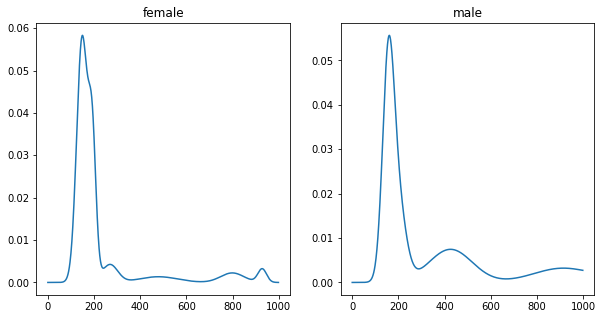

In [32]:
### afficher le modéle pour chaque classe
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot([np.exp(GMM_female.score(x.reshape(-1,1))) for x in np.linspace(-10, 100, 1000)])
plt.title("female")
plt.subplot(1,2,2)
plt.plot([np.exp(GMM_male.score(x.reshape(-1,1))) for x in np.linspace(-10, 100, 1000)])
plt.title("male")
    


### Évaluation

In [33]:
def gauss(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(x - mu)**2/sigma**2)

### vraisemblance par rapport au modéle g

def vraisemblance(x , g):
    v=0
    for k in range(len(g.weights_)):
        v+= g.weights_[k]*gauss(x,g.means_[k] , np.sqrt(g.covariances_[k]))
    return v


In [39]:
#### charger TEST_data et calculer le Log_vraisemblance pour chaque fichier 
models_ll=[]
y_true=[]
fenetre_len=620
directory='./DATA/TEST/'
files=os.listdir(directory)
p_bar = tqdm(range(len(files[0:100]))) 
for i in p_bar:
    p_bar.set_description(f'Working on "{i}"')
    # read wav file     
    values=lire_son(directory+files[i])
    # calculate zcr
    zcrs=[zcr(values[deb:deb+fenetre_len]) for deb in range(0, len(values), fenetre_len)]
    #calculate LL for GMM_male model
    ll_male=GMM_male.score(np.array(zcrs).reshape(-1,1))

    #calculate LL for GMM_female model
    ll_female=GMM_female.score(np.array(zcrs).reshape(-1,1))
    
    #append results
    models_ll.append([ll_male,ll_female])
    if label=="male":
        label=0
    else :
        label=1
    y_true.append(label)

        
        

  0%|          | 0/100 [00:00<?, ?it/s]

In [40]:
## matrice de confusion
print(models_ll)
y_pred=np.argmax(models_ll, axis=1) 
_matrix_confusion=confusion_matrix(y_true, y_pred)
_matrix_confusion

[[-5.73515490892091, -24.58663577104735], [-4.13653477738206, -4.921967476076585], [-4.62069586413026, -5.201653160066942], [-4.7138186225385, -23.83765163422558], [-5.472358249835254, -14.38083448079953], [-4.265996886218078, -11.616722810748493], [-4.151469153049366, -3.8990288732178633], [-4.331882281141817, -14.60865370803281], [-4.630373925659152, -1.612166377885074], [-4.945454814540232, -6.520470697824559], [-5.022295233965238, -5.086315876970397], [-5.291827665967677, -3.480651688395703], [-4.738213416653996, -2.0582602451809446], [-5.032469182749652, -6.6774093199418], [-4.941552316441039, -4.656801327614491], [-4.840984968958505, -21.15807760761149], [-5.401951594451318, -6.768130559444545], [-4.485559734410094, -11.798467902089913], [-5.391852491163037, -10.023785197065752], [-4.567231987198865, -2.0519351757309954], [-4.894428024244124, -8.669587226222234], [-5.833008986042934, -28.203979880608276], [-5.310022160226316, -13.808923602310406], [-4.997229868525608, -19.0235446

array([[ 0,  0],
       [80, 20]])

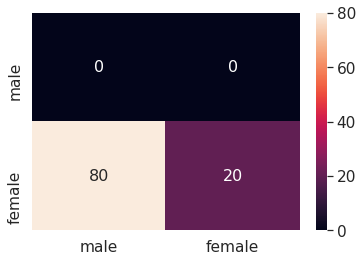

In [41]:

lab=["male","female"]
sn.set(font_scale=1.4) # for label size
sn.heatmap(_matrix_confusion, annot=True, annot_kws={"size": 16},xticklabels=lab, yticklabels=lab) # font size

plt.show()